# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:

-- Which variables are significant in predicting the price of a house, and
-- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [243]:
data = pd.read_csv("train.csv")

In [244]:
data.drop("Id",axis=1, inplace=True)

In [245]:
data.notnull().sum()

MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 80, dtype: int64

In [246]:
percentage = data.isnull().sum()*100/len(data)
percentage.sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
Heating         0.000000
HeatingQC       0.000000
MSZoning        0.000000
1stFlrSF        0.000000
SalePrice       0.000000
Length: 80, dtype: float64

In [247]:
filtered_precentage = percentage.loc[lambda x : x > 0]
type(filtered_precentage)
null_list = filtered_precentage.index.tolist()
null_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Below 14 columns have NA has meaning hence we can not ignore it as missing value, we have to substitute as None


    

Alley: NA No alley access	<br/>
BsmtQual:  NA	No Basement	<br/>
BsmtCond: NA No Basement <br/>
BsmtExposure: NA	No Basement <br/>
BsmtFinType1: NA	No Basement <br/>
BsmtFinType2: NA	No Basement <br/>
FireplaceQu: NA	No Fireplace	 <br/>
GarageType: NA	No Garage	 <br/>
GarageFinish: NA	No Garage <br/>
GarageQual: NA	No Garage	<br/>	
GarageCond: NA	No Garage	<br/>
PoolQC: NA	No Pool		<br/>
Fence: NA	No Fence	<br/>
MiscFeature: NA	None	<br/>
MasVnrType : None None 

In [248]:
NA_Meaningful_Values = [
 'Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [249]:
for i in NA_Meaningful_Values:
    data[i].fillna("none", inplace=True)
percentage = data.isnull().sum()*100/len(data)
percentage.sort_values(ascending = False)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
                  ...    
ExterCond        0.000000
ExterQual        0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [250]:
filtered_precentage = percentage.loc[lambda x : x > 0]
null_list = filtered_precentage.index.tolist()
null_list

['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [251]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [252]:
percentage = data.isnull().sum()*100/len(data)
percentage.sort_values(ascending = False)
filtered_precentage = percentage.loc[lambda x : x > 0]
null_list = filtered_precentage.index.tolist()
null_list

['MasVnrArea', 'Electrical', 'GarageYrBlt']

In [253]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"] .dropna(inplace=True)

In [254]:
data.shape

(1460, 80)

In [255]:
data.dropna(inplace=True)
data.shape

(1459, 80)

In [256]:
#!pip install sweetviz

In [257]:
#import sweetviz as sv
#sweet_report = sv.analyze(data,pairwise_analysis="off")
#sweet_report.show_html('sweet_report.html')

In [258]:
red_features = []
for col in data.columns:
    counts = data[col].value_counts().max()
    print(col, counts)
    if counts > len(data) * 0.95:
        print(col, counts)
        red_features.append(col)
red_features

MSSubClass 536
MSZoning 1150
LotFrontage 152
LotArea 25
Street 1453
Street 1453
Alley 1368
LotShape 924
LandContour 1310
Utilities 1458
Utilities 1458
LotConfig 1051
LandSlope 1381
Neighborhood 225
Condition1 1259
Condition2 1444
Condition2 1444
BldgType 1219
HouseStyle 726
OverallQual 396
OverallCond 820
YearBuilt 66
YearRemodAdd 178
RoofStyle 1140
RoofMatl 1433
RoofMatl 1433
Exterior1st 514
Exterior2nd 503
MasVnrType 871
MasVnrArea 868
ExterQual 905
ExterCond 1281
Foundation 646
BsmtQual 649
BsmtCond 1310
BsmtExposure 952
BsmtFinType1 429
BsmtFinSF1 466
BsmtFinType2 1255
BsmtFinSF2 1292
BsmtUnfSF 118
TotalBsmtSF 37
Heating 1427
Heating 1427
HeatingQC 741
CentralAir 1364
Electrical 1334
1stFlrSF 25
2ndFlrSF 829
LowQualFinSF 1433
LowQualFinSF 1433
GrLivArea 22
BsmtFullBath 855
BsmtHalfBath 1377
FullBath 767
HalfBath 913
BedroomAbvGr 803
KitchenAbvGr 1391
KitchenAbvGr 1391
KitchenQual 735
TotRmsAbvGrd 402
Functional 1359
Fireplaces 689
FireplaceQu 689
GarageType 870
GarageYrBlt 96
Garag

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

In [259]:
for i in red_features:
    data = data.drop([i], axis = 1)

In [260]:
MSSubClass_dict = {
        20:"1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}

OverallQual_dict = {
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
}

OverallCond_dict = {
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
}

data['MSSubClass'] = data['MSSubClass'].apply(lambda x: MSSubClass_dict[x])

In [261]:
data['Age'] = data['YrSold'] - data['YearBuilt']

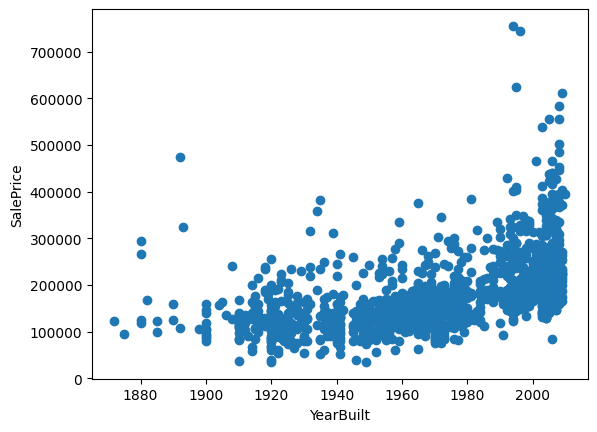

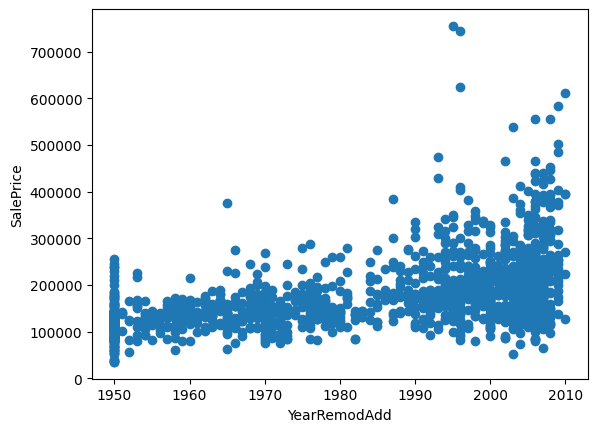

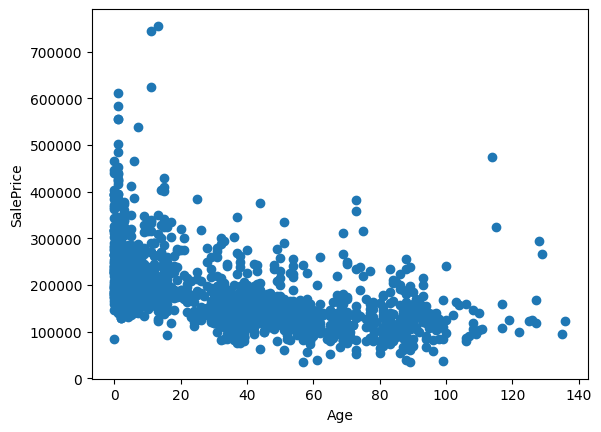

In [262]:
years_columns = ['YearBuilt', 'YearRemodAdd', 'Age']
   
for i in years_columns:
    plt.scatter(data[i], data['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

In [263]:
data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  OverallCond    1459 non-null   int64  
 15  YearRemodAdd   1459 non-null   int64  
 16  RoofStyle      1459 non-null   object 
 17  Exterior1st    1459 non-null   object 
 18  Exterior2nd  

<Axes: xlabel='SalePrice', ylabel='Density'>

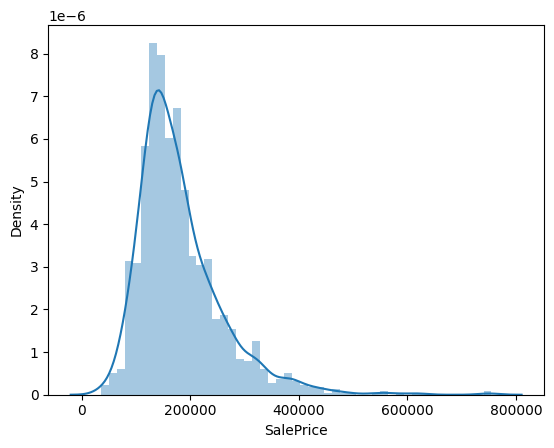

In [265]:
sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

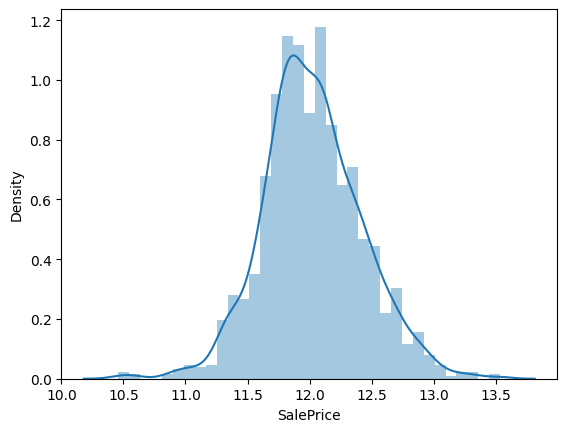

In [266]:
sns.distplot(np.log(data["SalePrice"]))

In [267]:
data["TransformedPrice"] = np.log(data["SalePrice"])

In [268]:
data_cat = data.select_dtypes(include='object')
data_num = data.select_dtypes(include=['int64', 'float64'])

print(len(data_cat.columns.tolist()))
print(len(data_num.columns.tolist()))

37
31


In [269]:
data_cat.head()
data_cat.notnull().sum()

MSSubClass       1459
MSZoning         1459
Alley            1459
LotShape         1459
LandContour      1459
LotConfig        1459
LandSlope        1459
Neighborhood     1459
Condition1       1459
BldgType         1459
HouseStyle       1459
RoofStyle        1459
Exterior1st      1459
Exterior2nd      1459
MasVnrType       1459
ExterQual        1459
ExterCond        1459
Foundation       1459
BsmtQual         1459
BsmtCond         1459
BsmtExposure     1459
BsmtFinType1     1459
BsmtFinType2     1459
HeatingQC        1459
CentralAir       1459
Electrical       1459
KitchenQual      1459
Functional       1459
FireplaceQu      1459
GarageType       1459
GarageFinish     1459
GarageQual       1459
GarageCond       1459
PavedDrive       1459
Fence            1459
SaleType         1459
SaleCondition    1459
dtype: int64

In [270]:
data_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,Age,TransformedPrice
0,65.0,8450,7,5,2003,196.0,706,0,150,856,...,2,548,0,61,0,0,2,208500,5,12.247694
1,80.0,9600,6,8,1976,0.0,978,0,284,1262,...,2,460,298,0,0,0,5,181500,31,12.109011
2,68.0,11250,7,5,2002,162.0,486,0,434,920,...,2,608,0,42,0,0,9,223500,7,12.317167
3,60.0,9550,7,5,1970,0.0,216,0,540,756,...,3,642,0,35,272,0,2,140000,91,11.849398
4,84.0,14260,8,5,2000,350.0,655,0,490,1145,...,3,836,192,84,0,0,12,250000,8,12.429216


In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
data_num_columns = data_num.columns
num_list = data_num_columns.tolist()
num_list

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'SalePrice',
 'Age',
 'TransformedPrice']

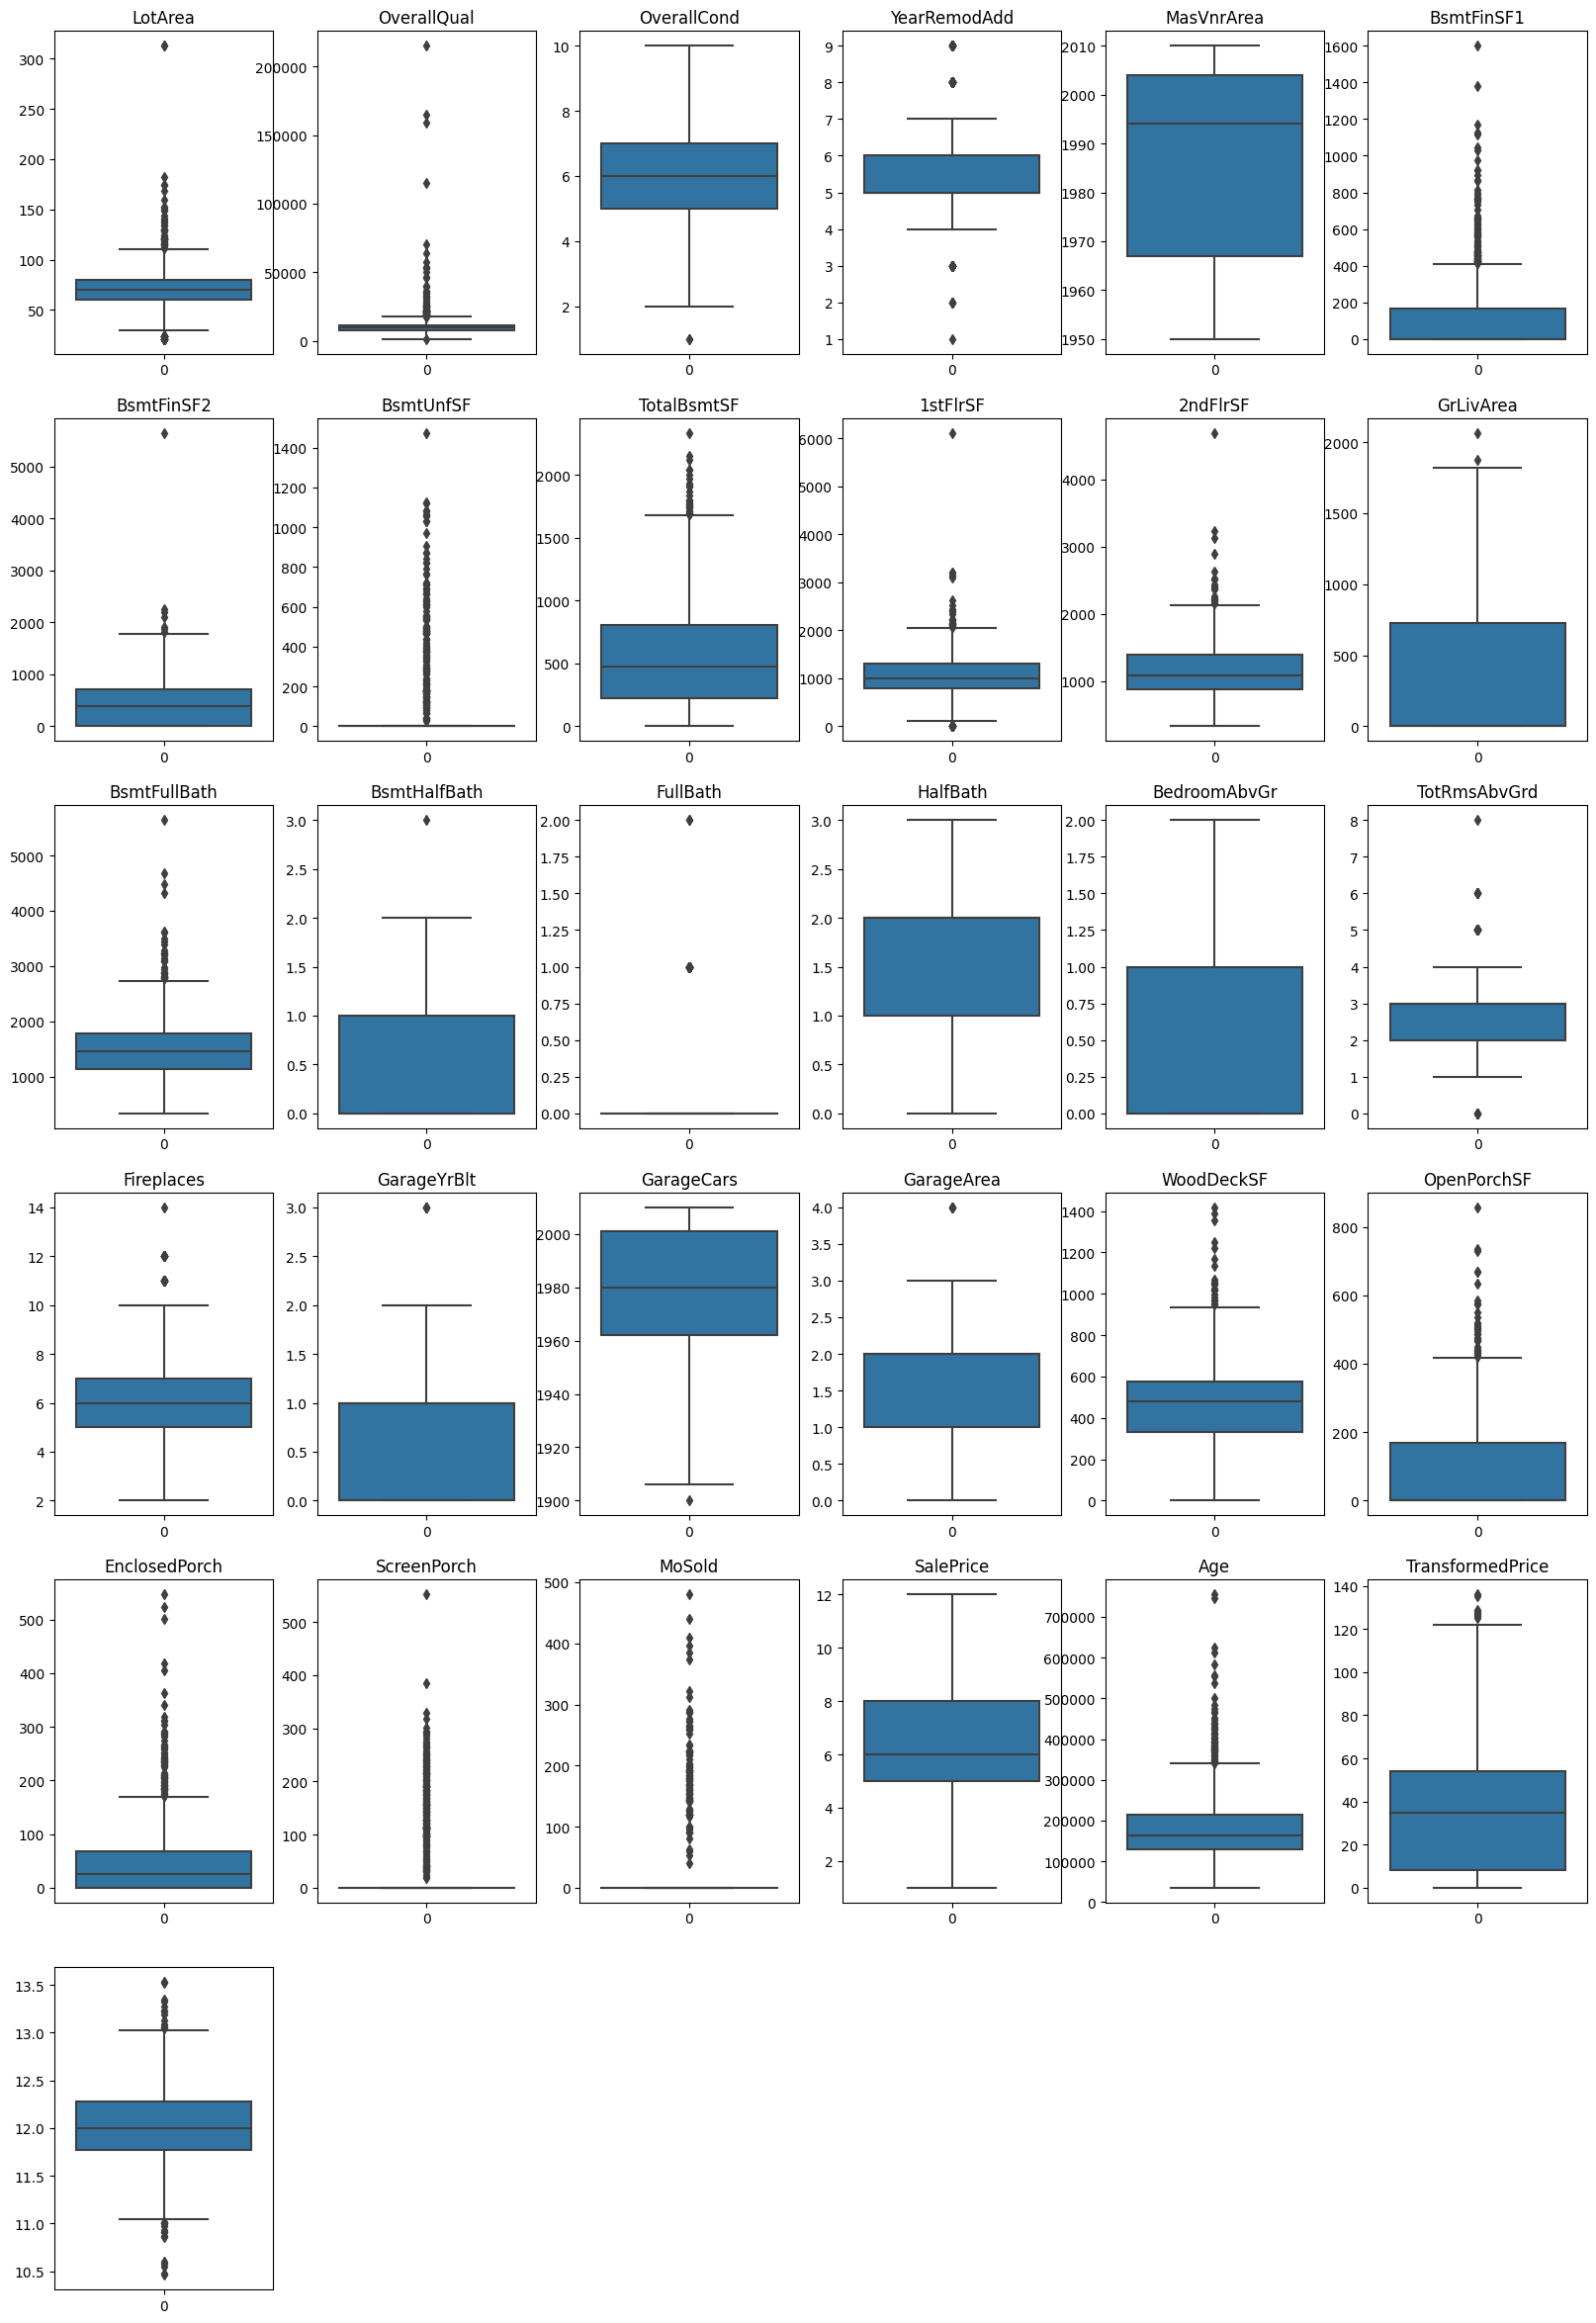

In [272]:
plt.figure(figsize=(20,50))
for i in range(len(num_list)):
    plt.title(num_list[i])
    plt.subplot(10,6,i+1)
    sns.boxplot(data[num_list[i]])

In [273]:
data_cat_columns = data_cat.columns
cat_list = data_cat_columns.tolist()
cat_list

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

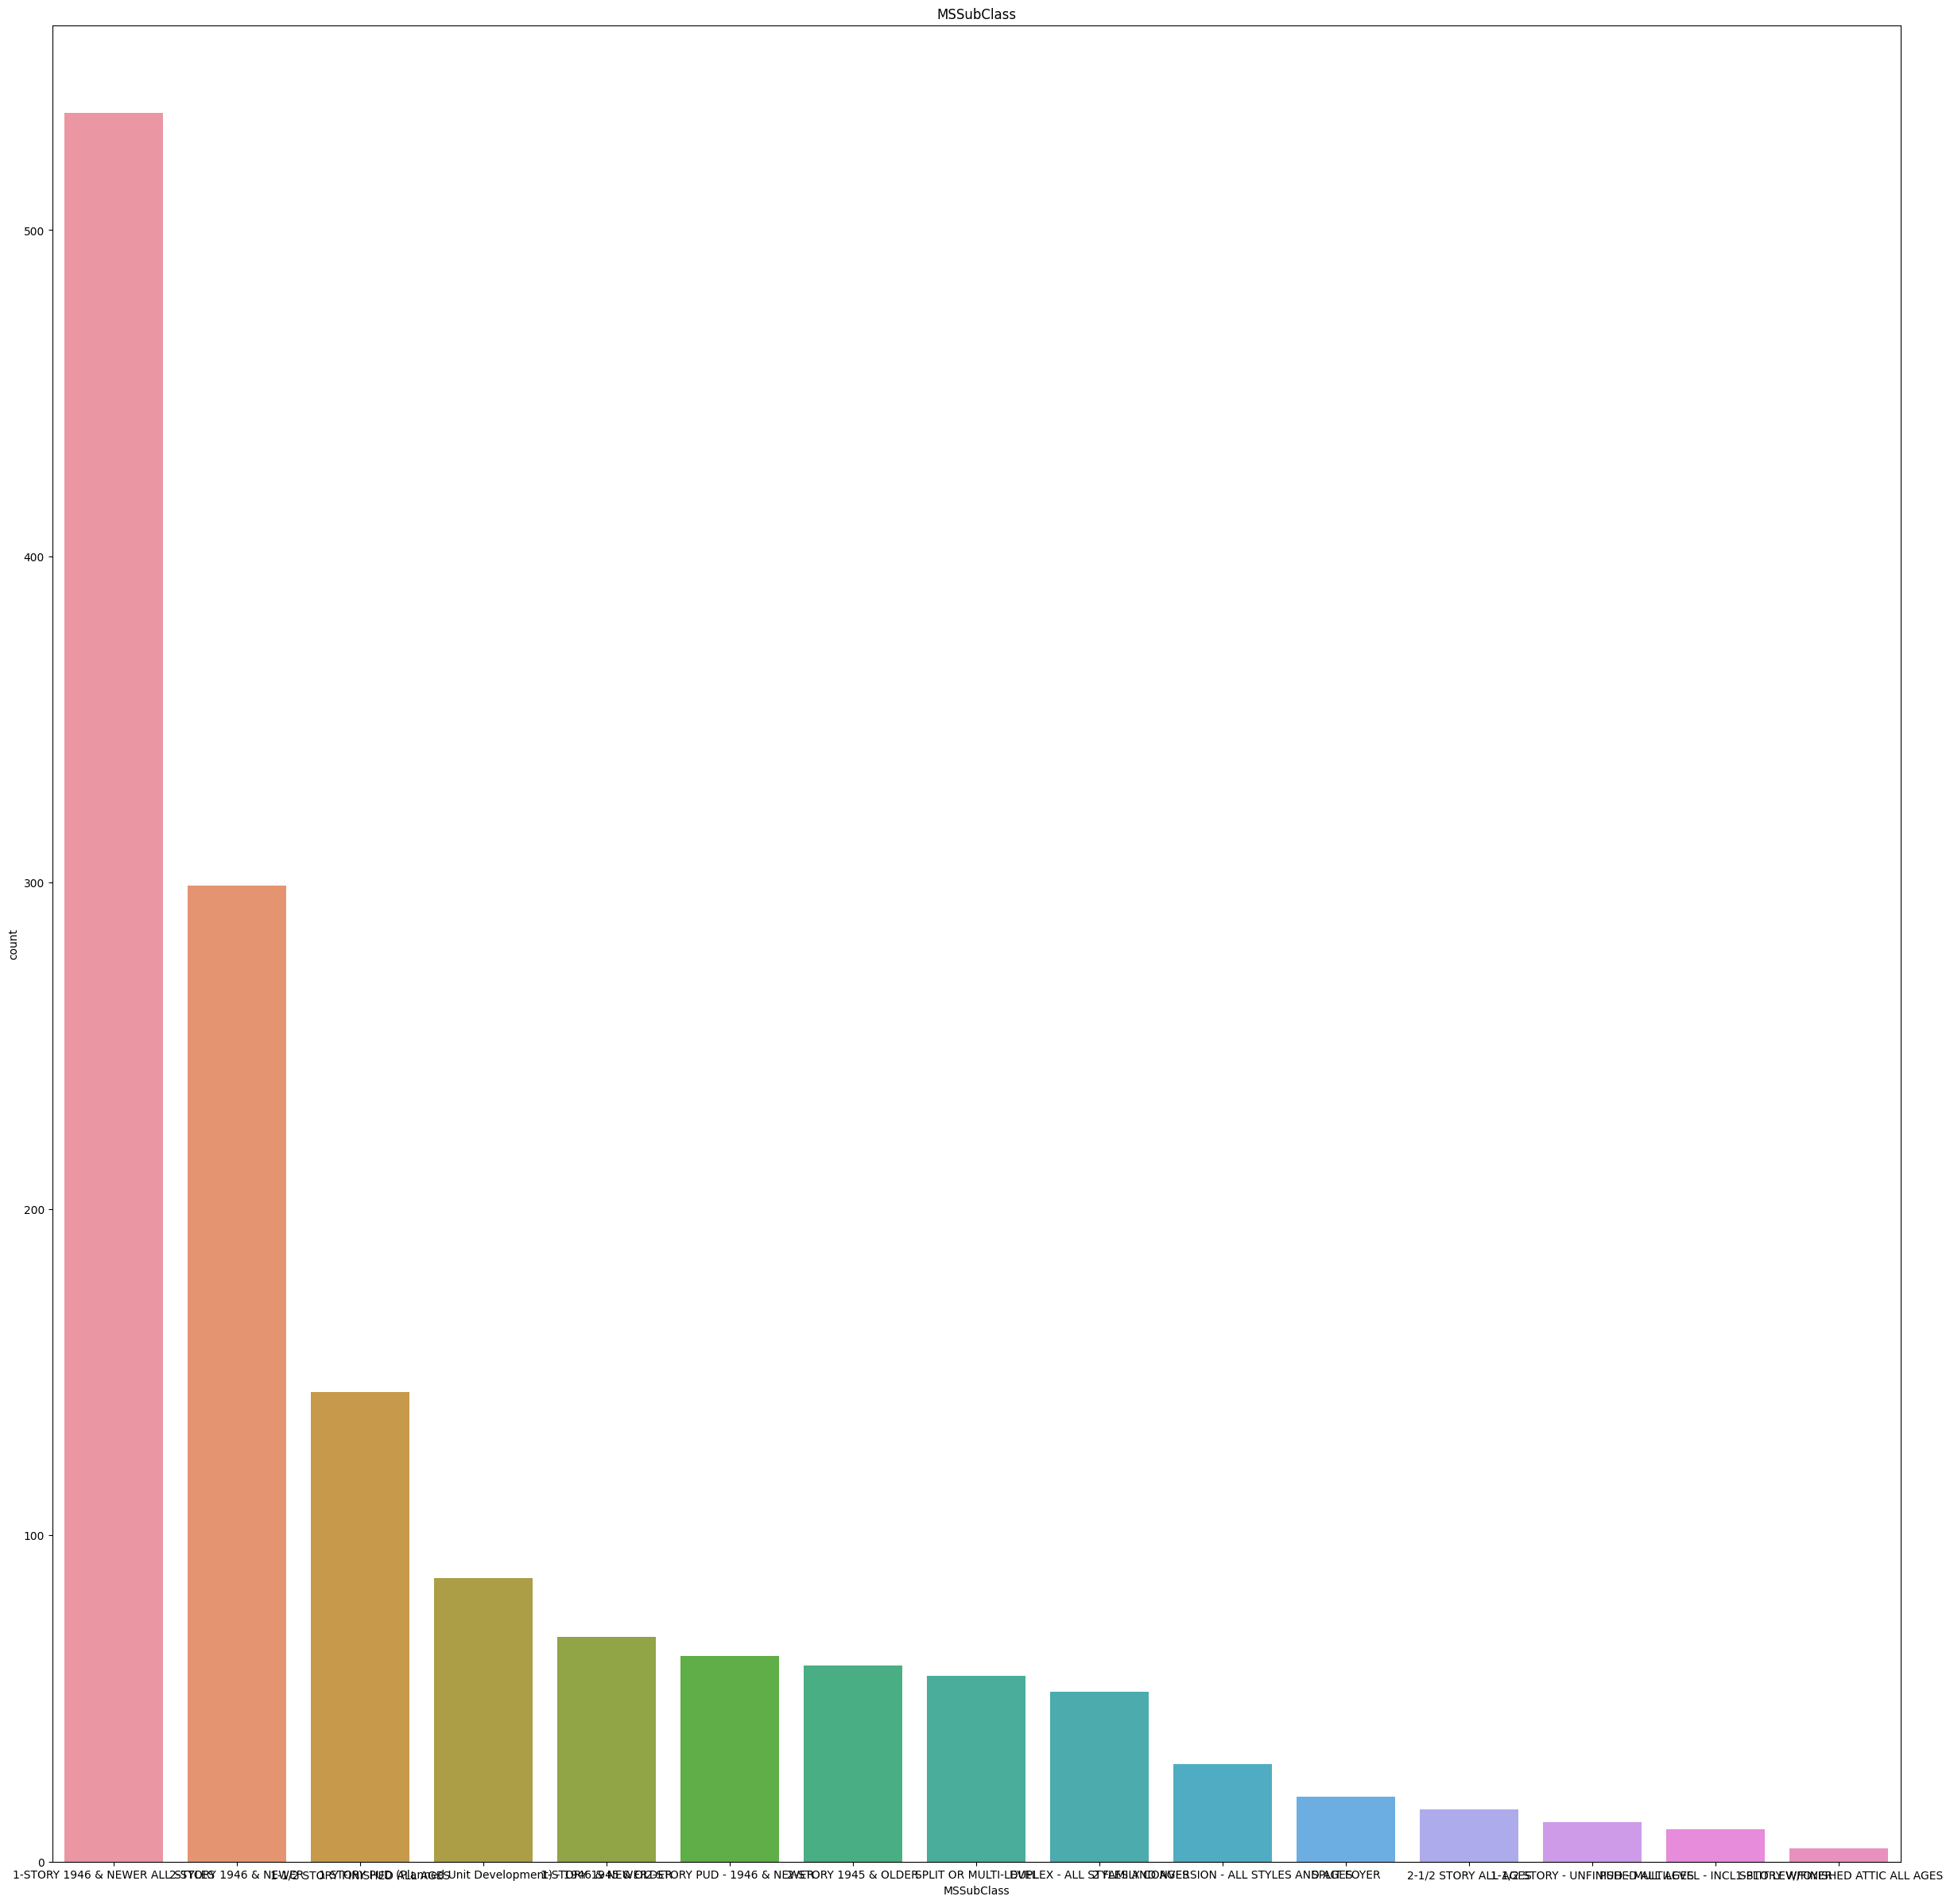

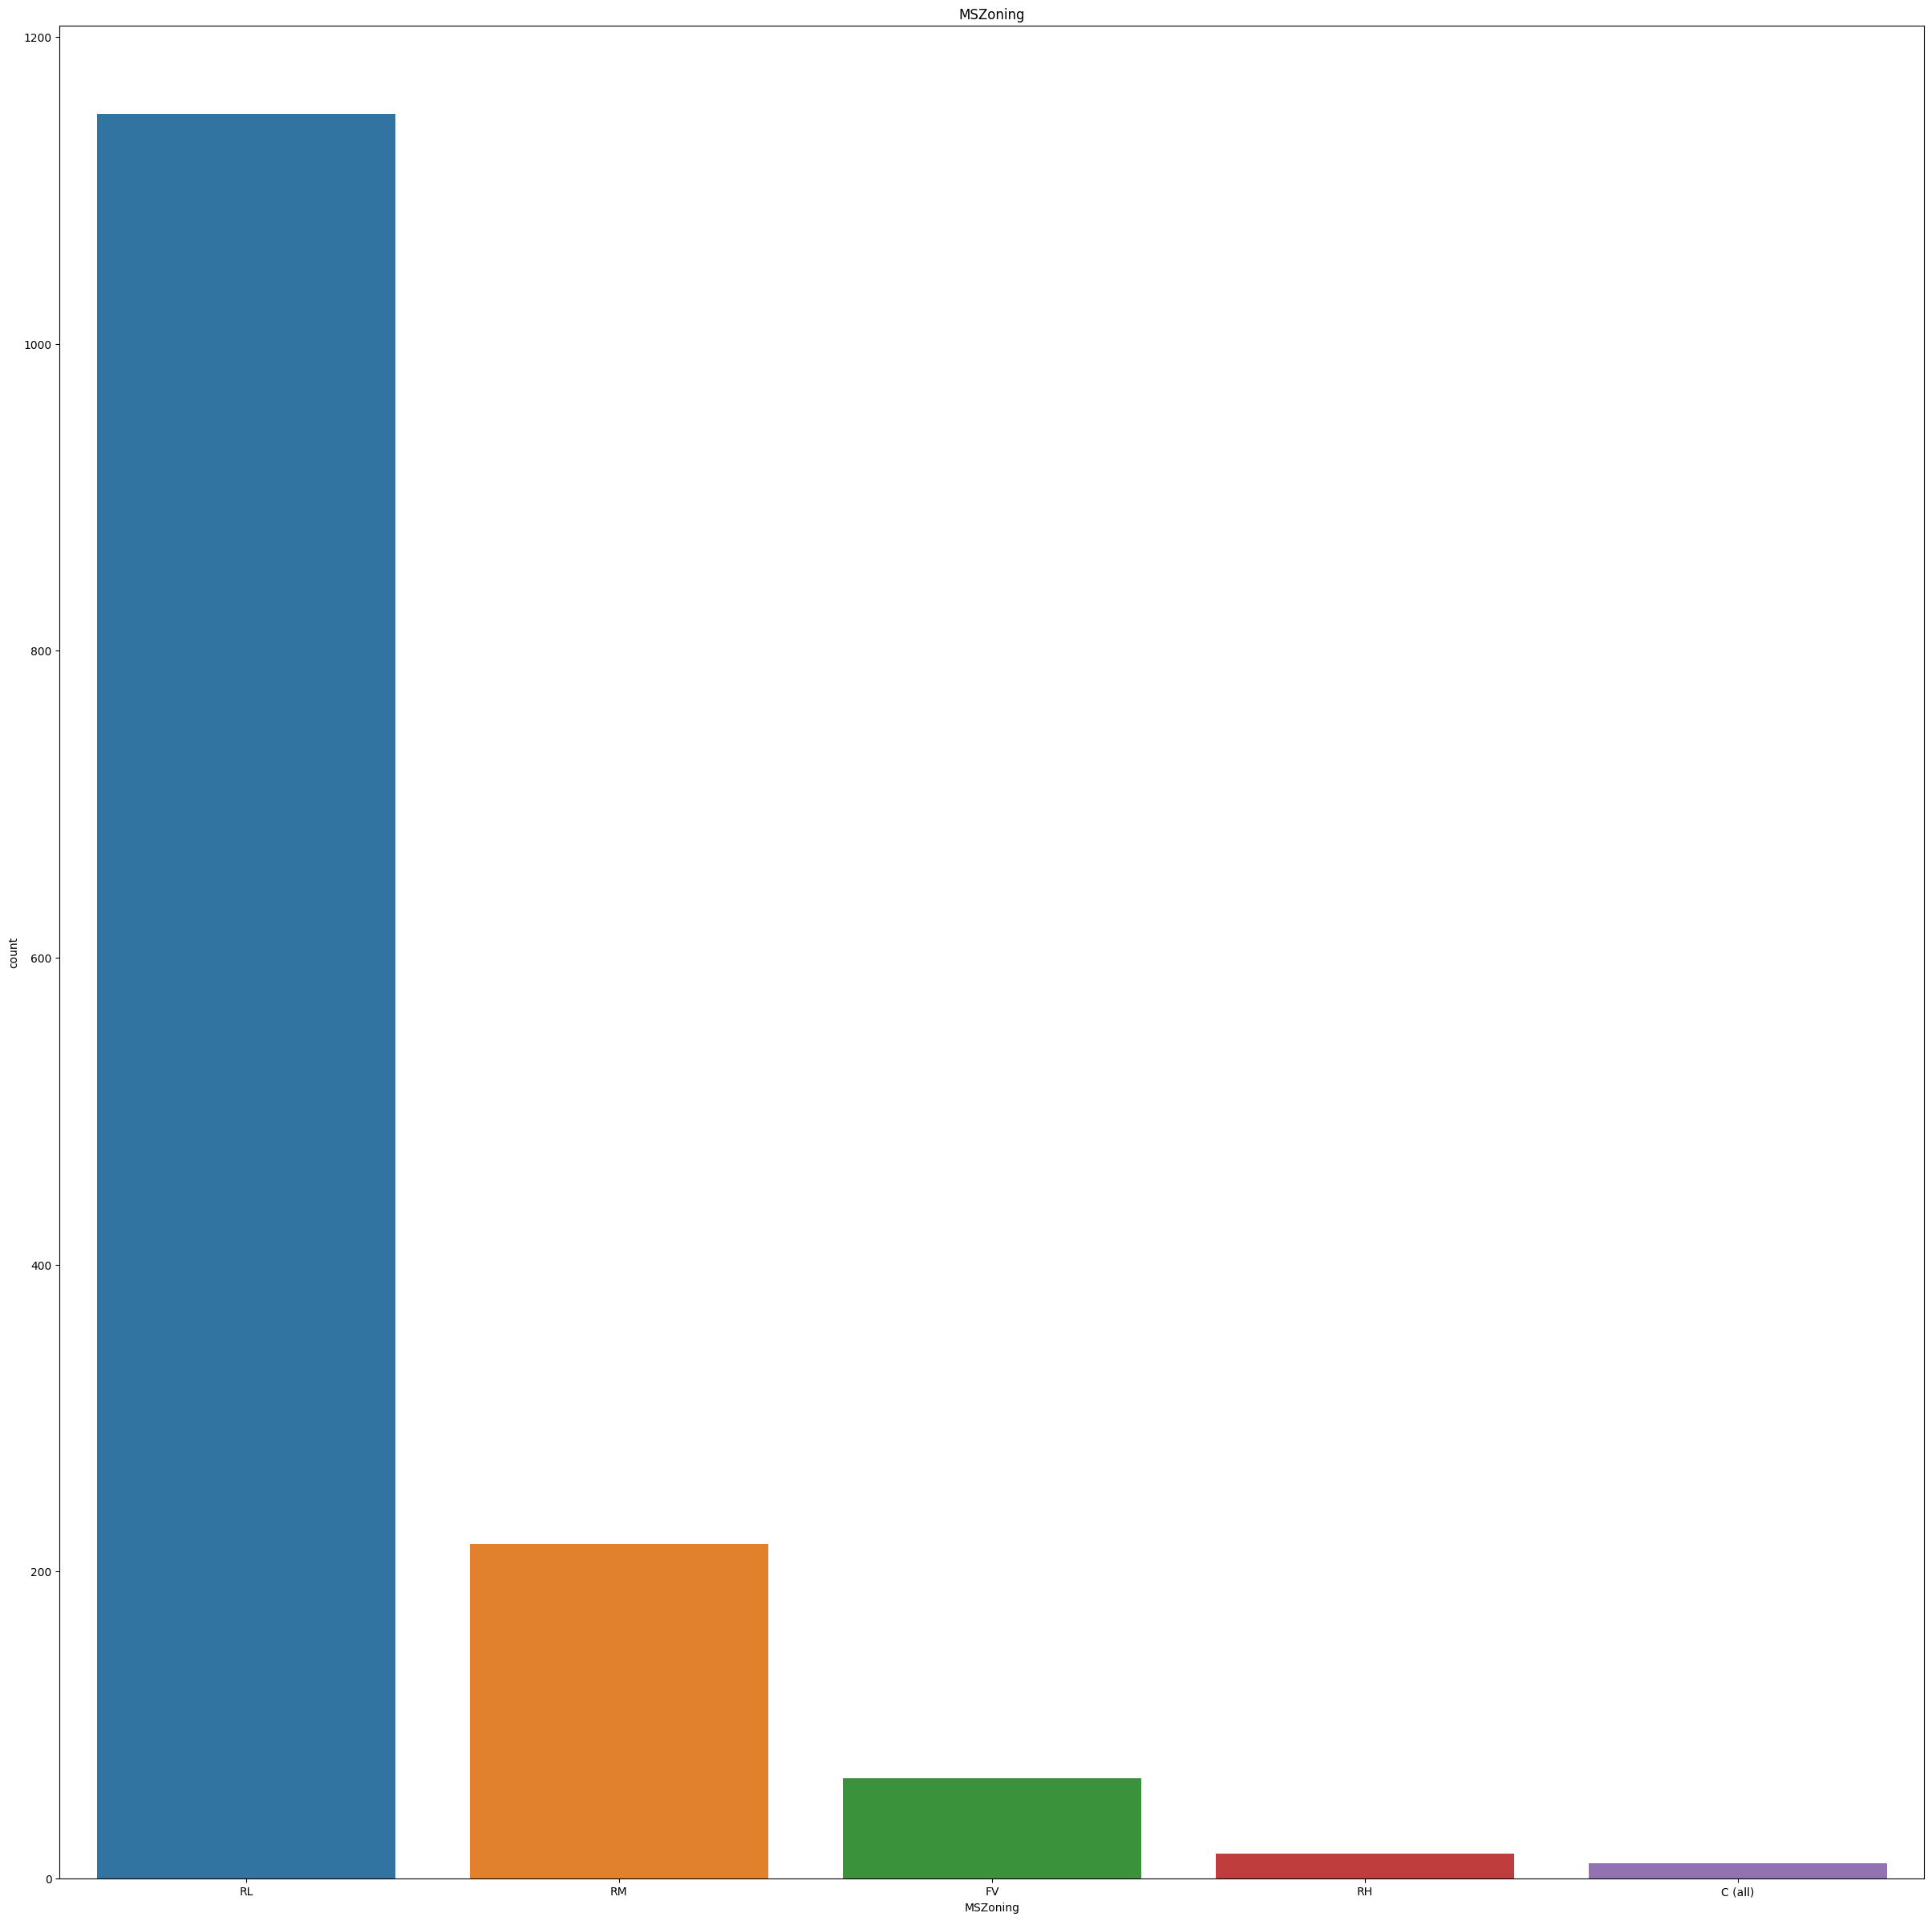

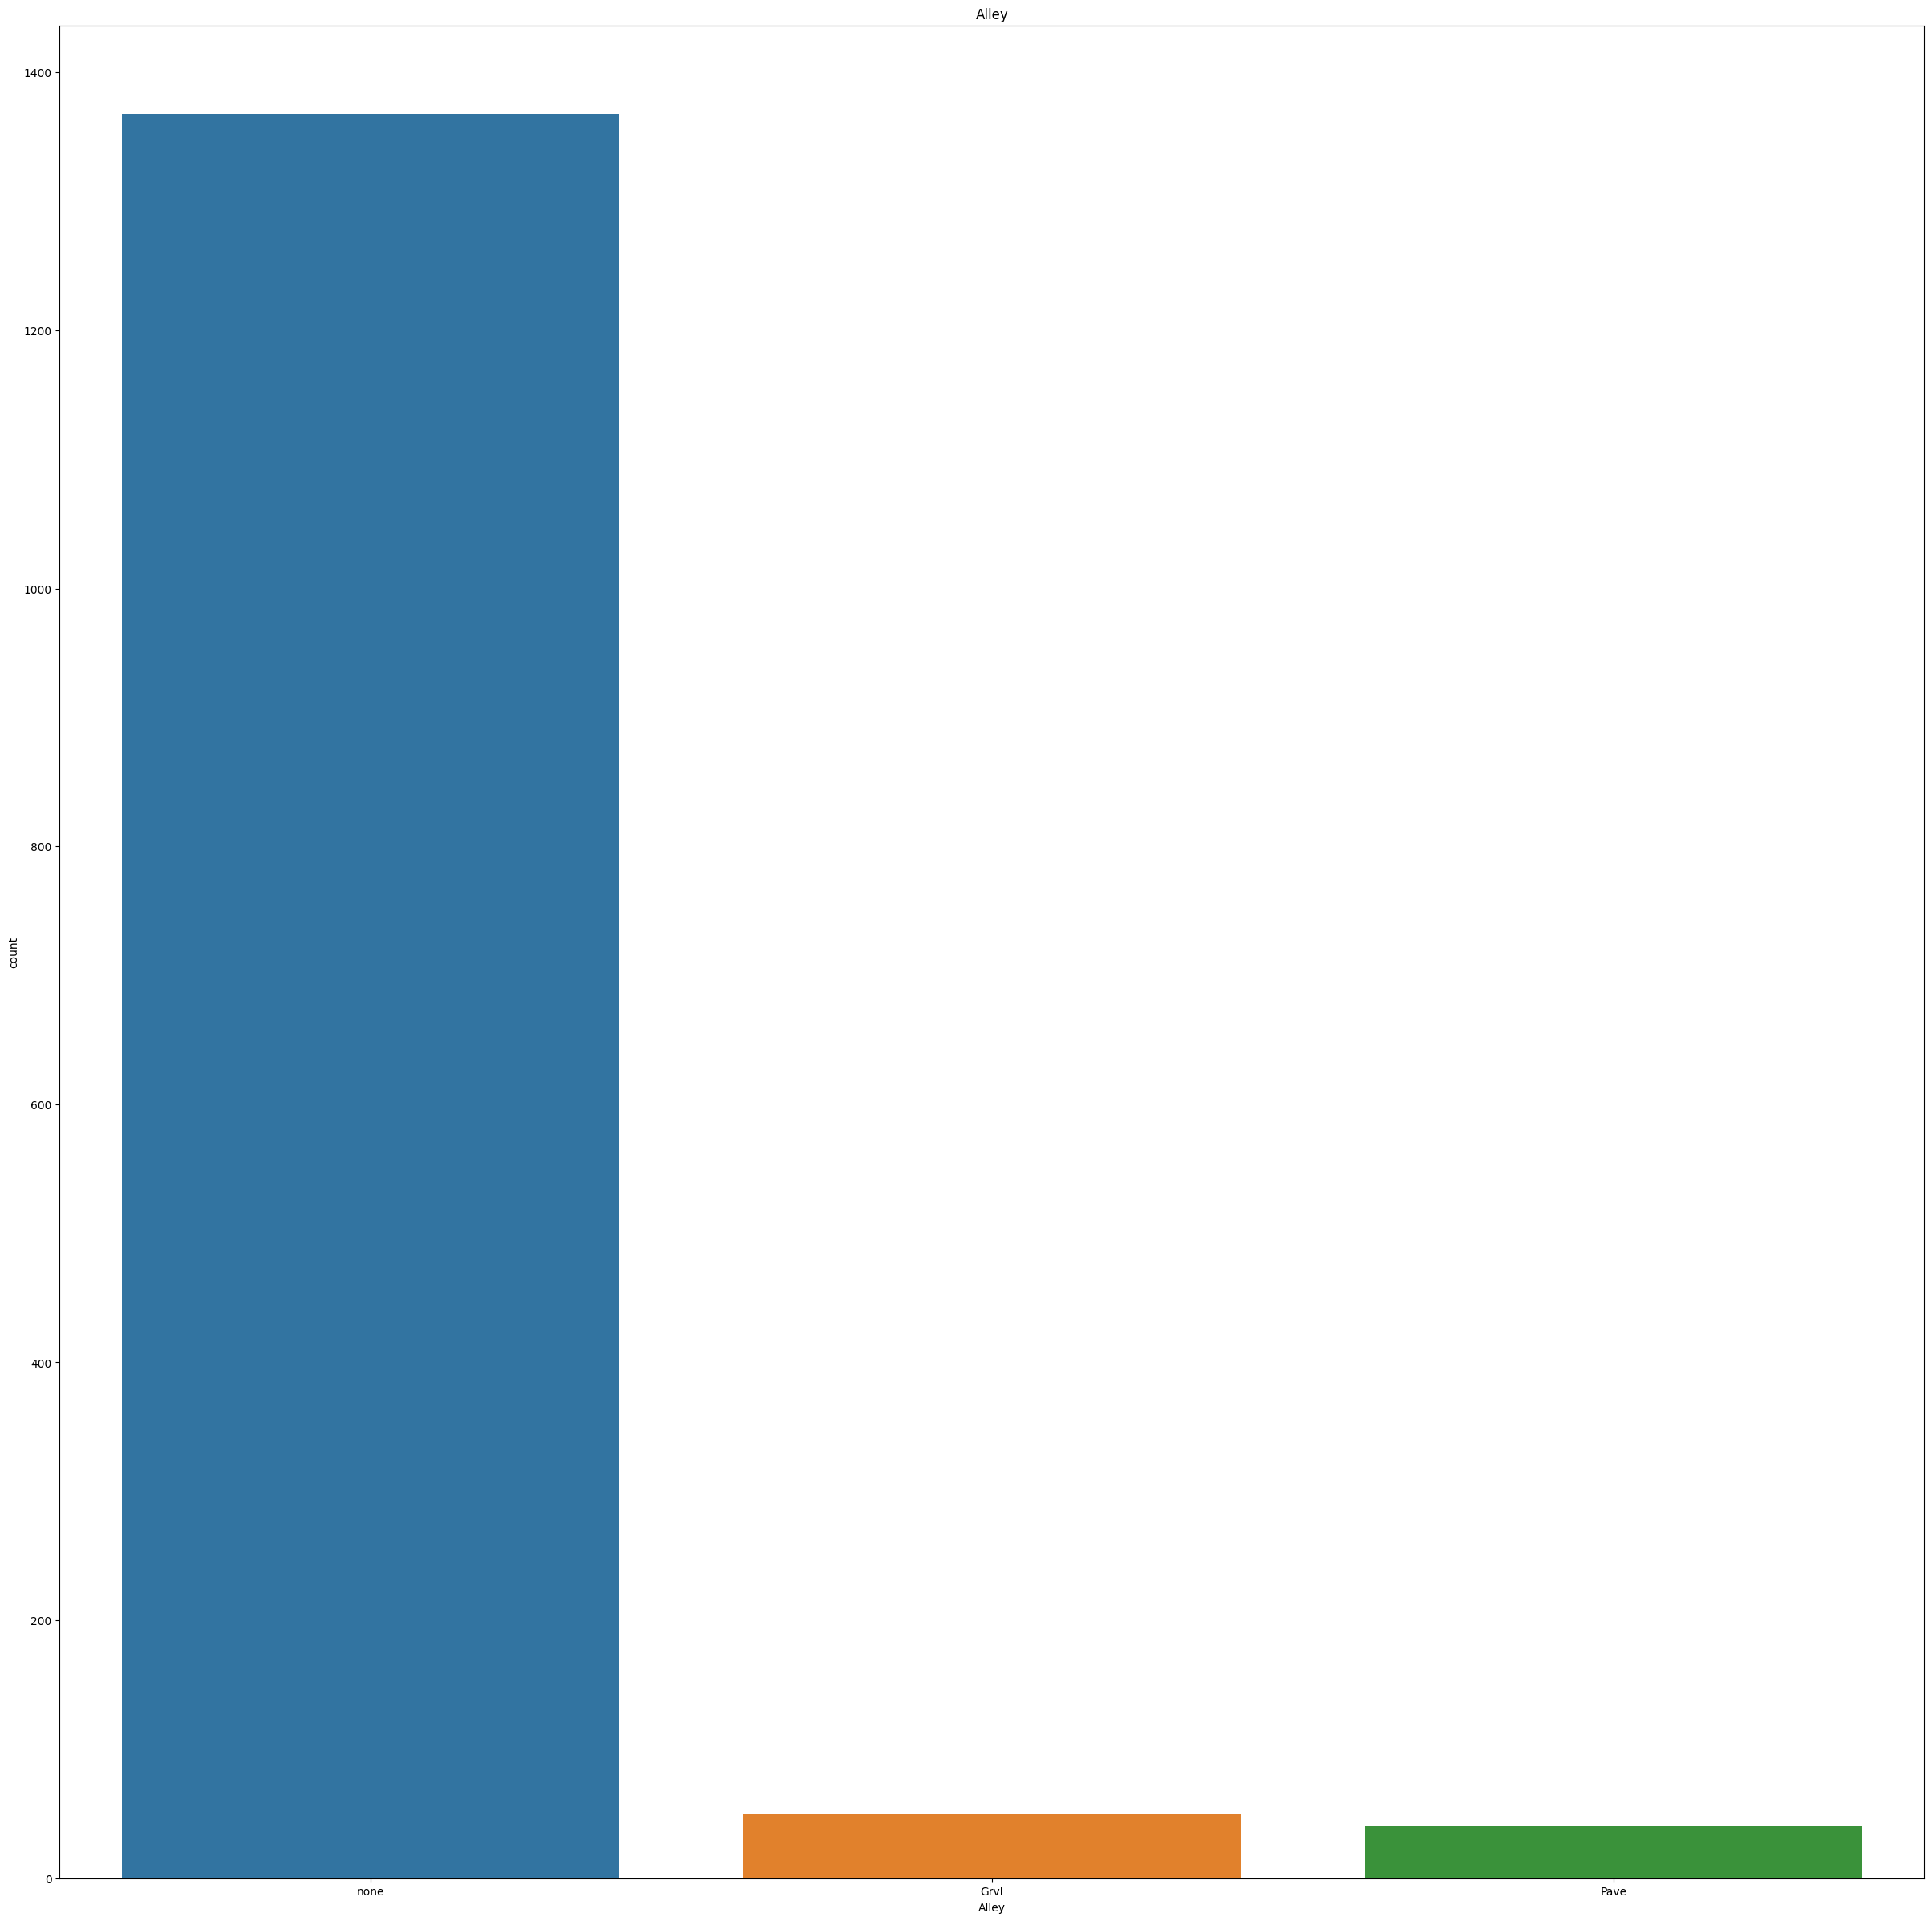

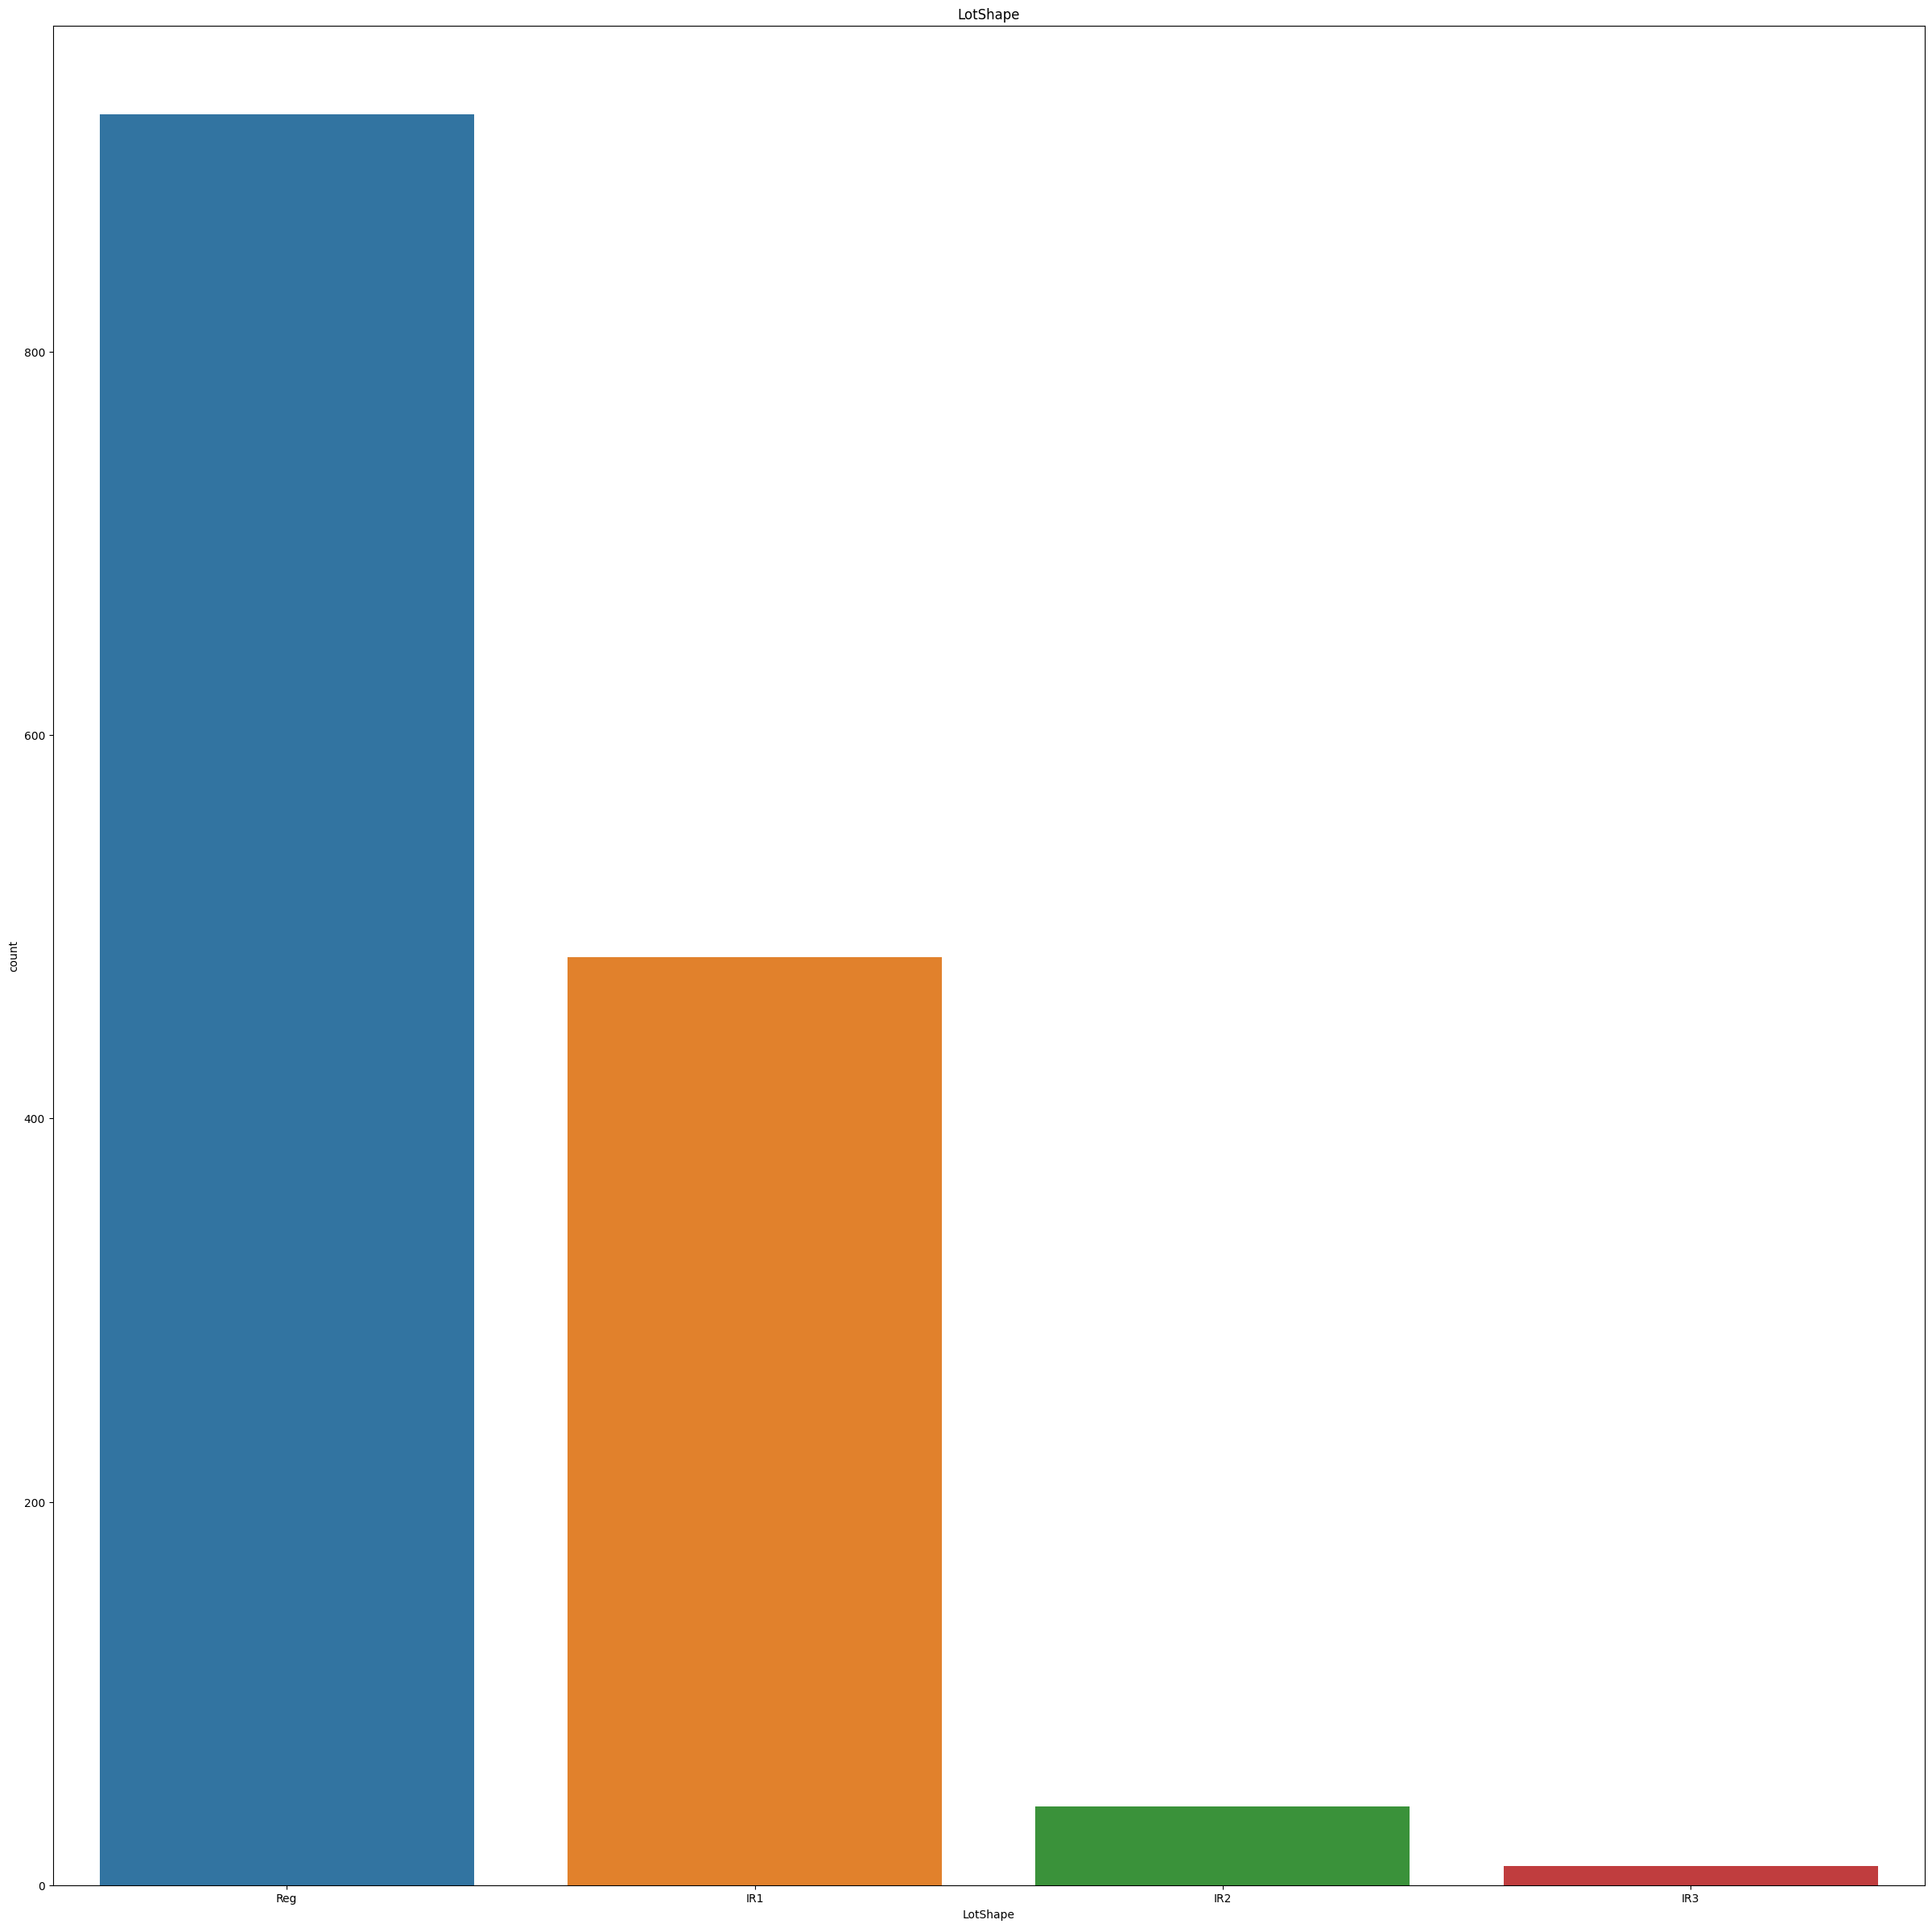

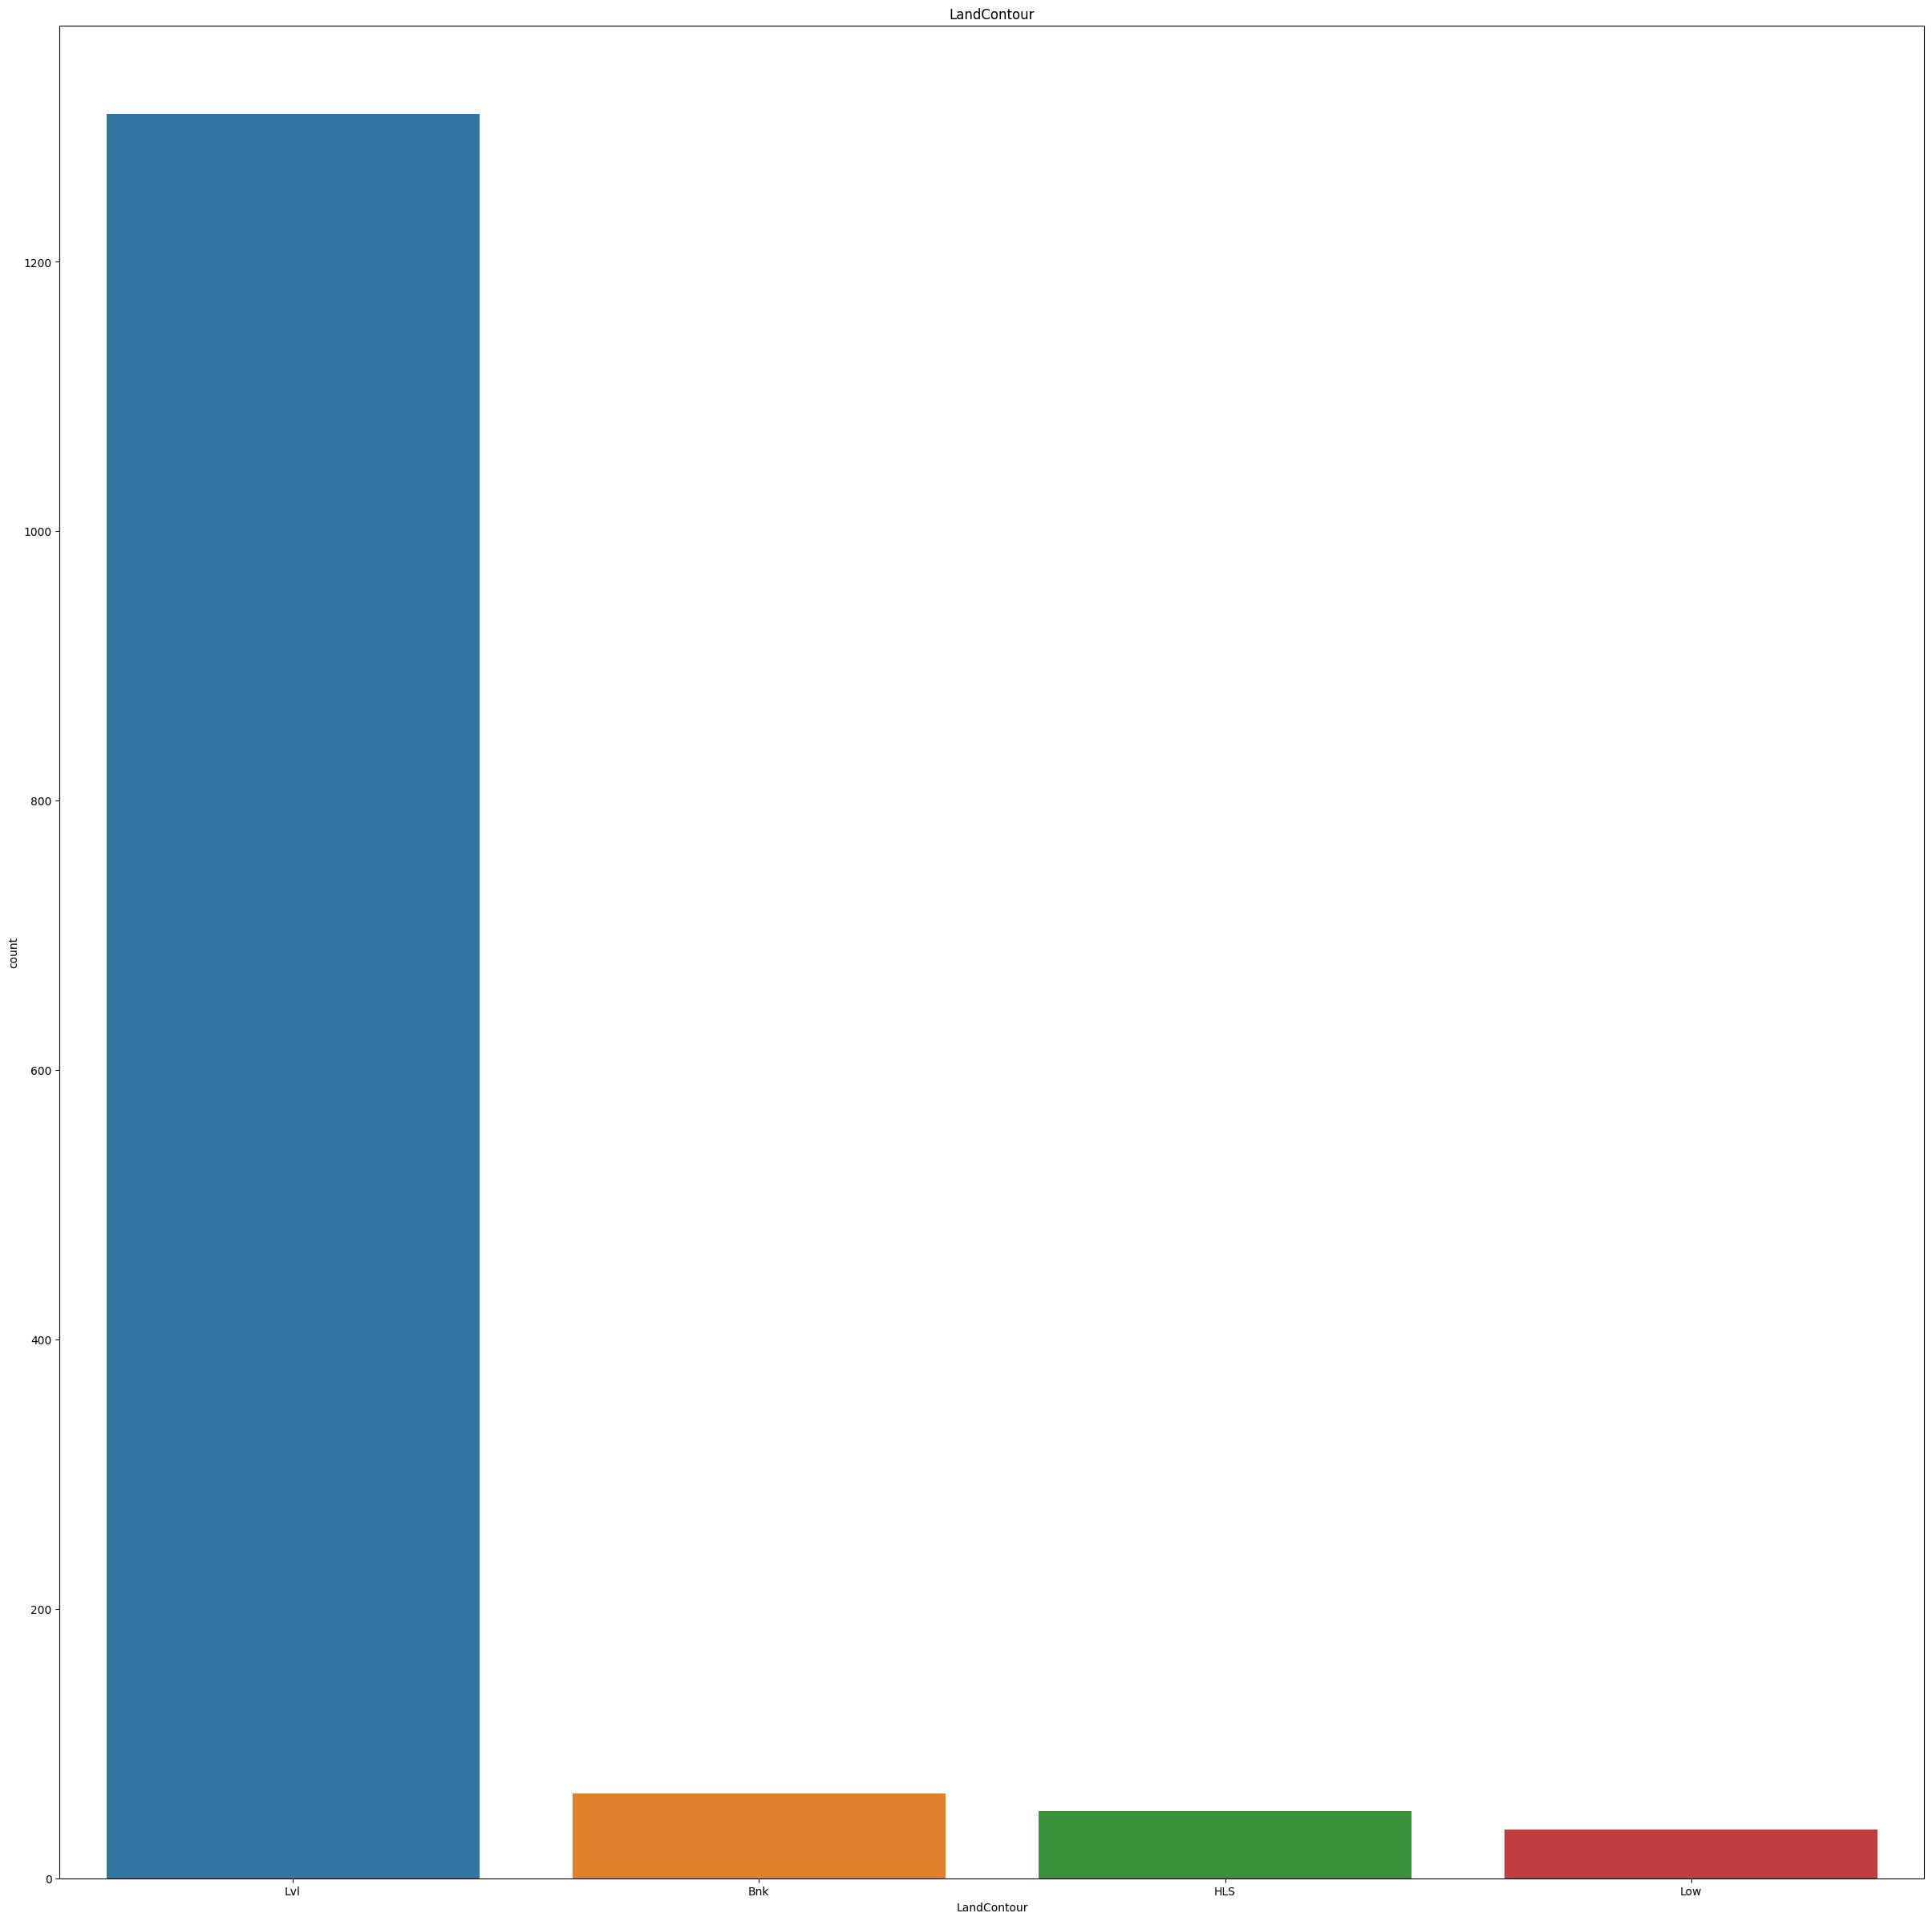

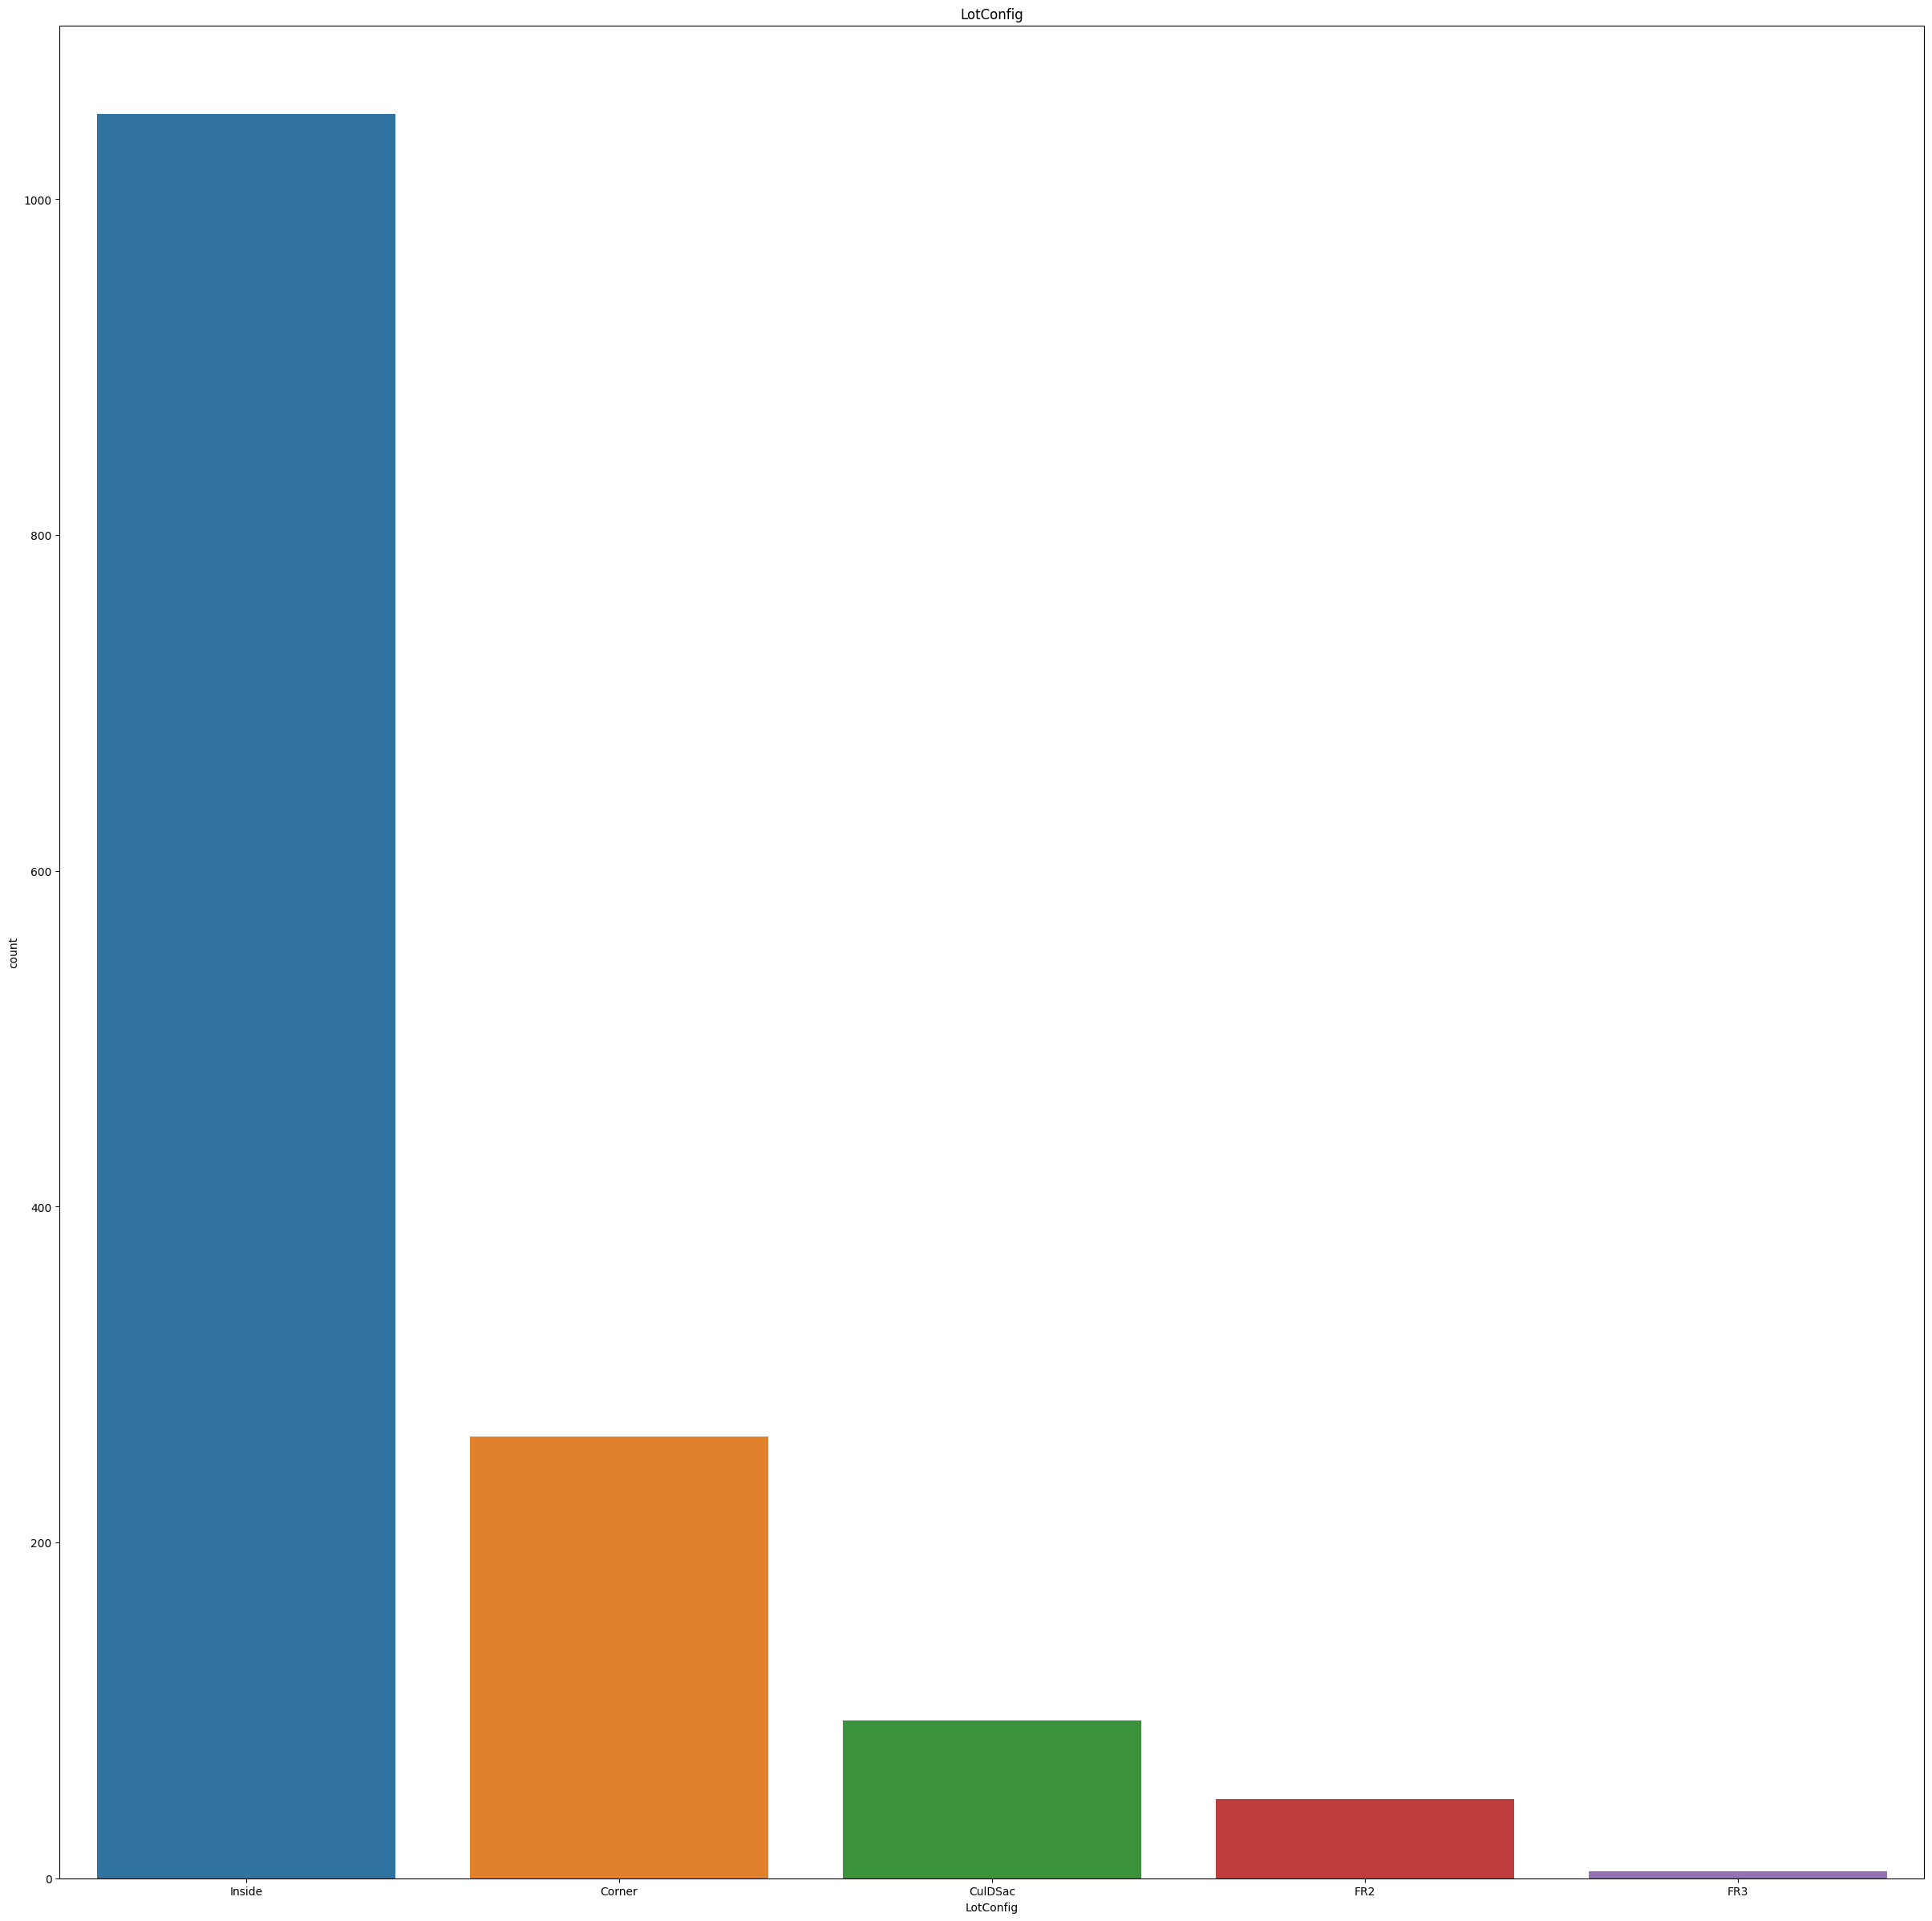

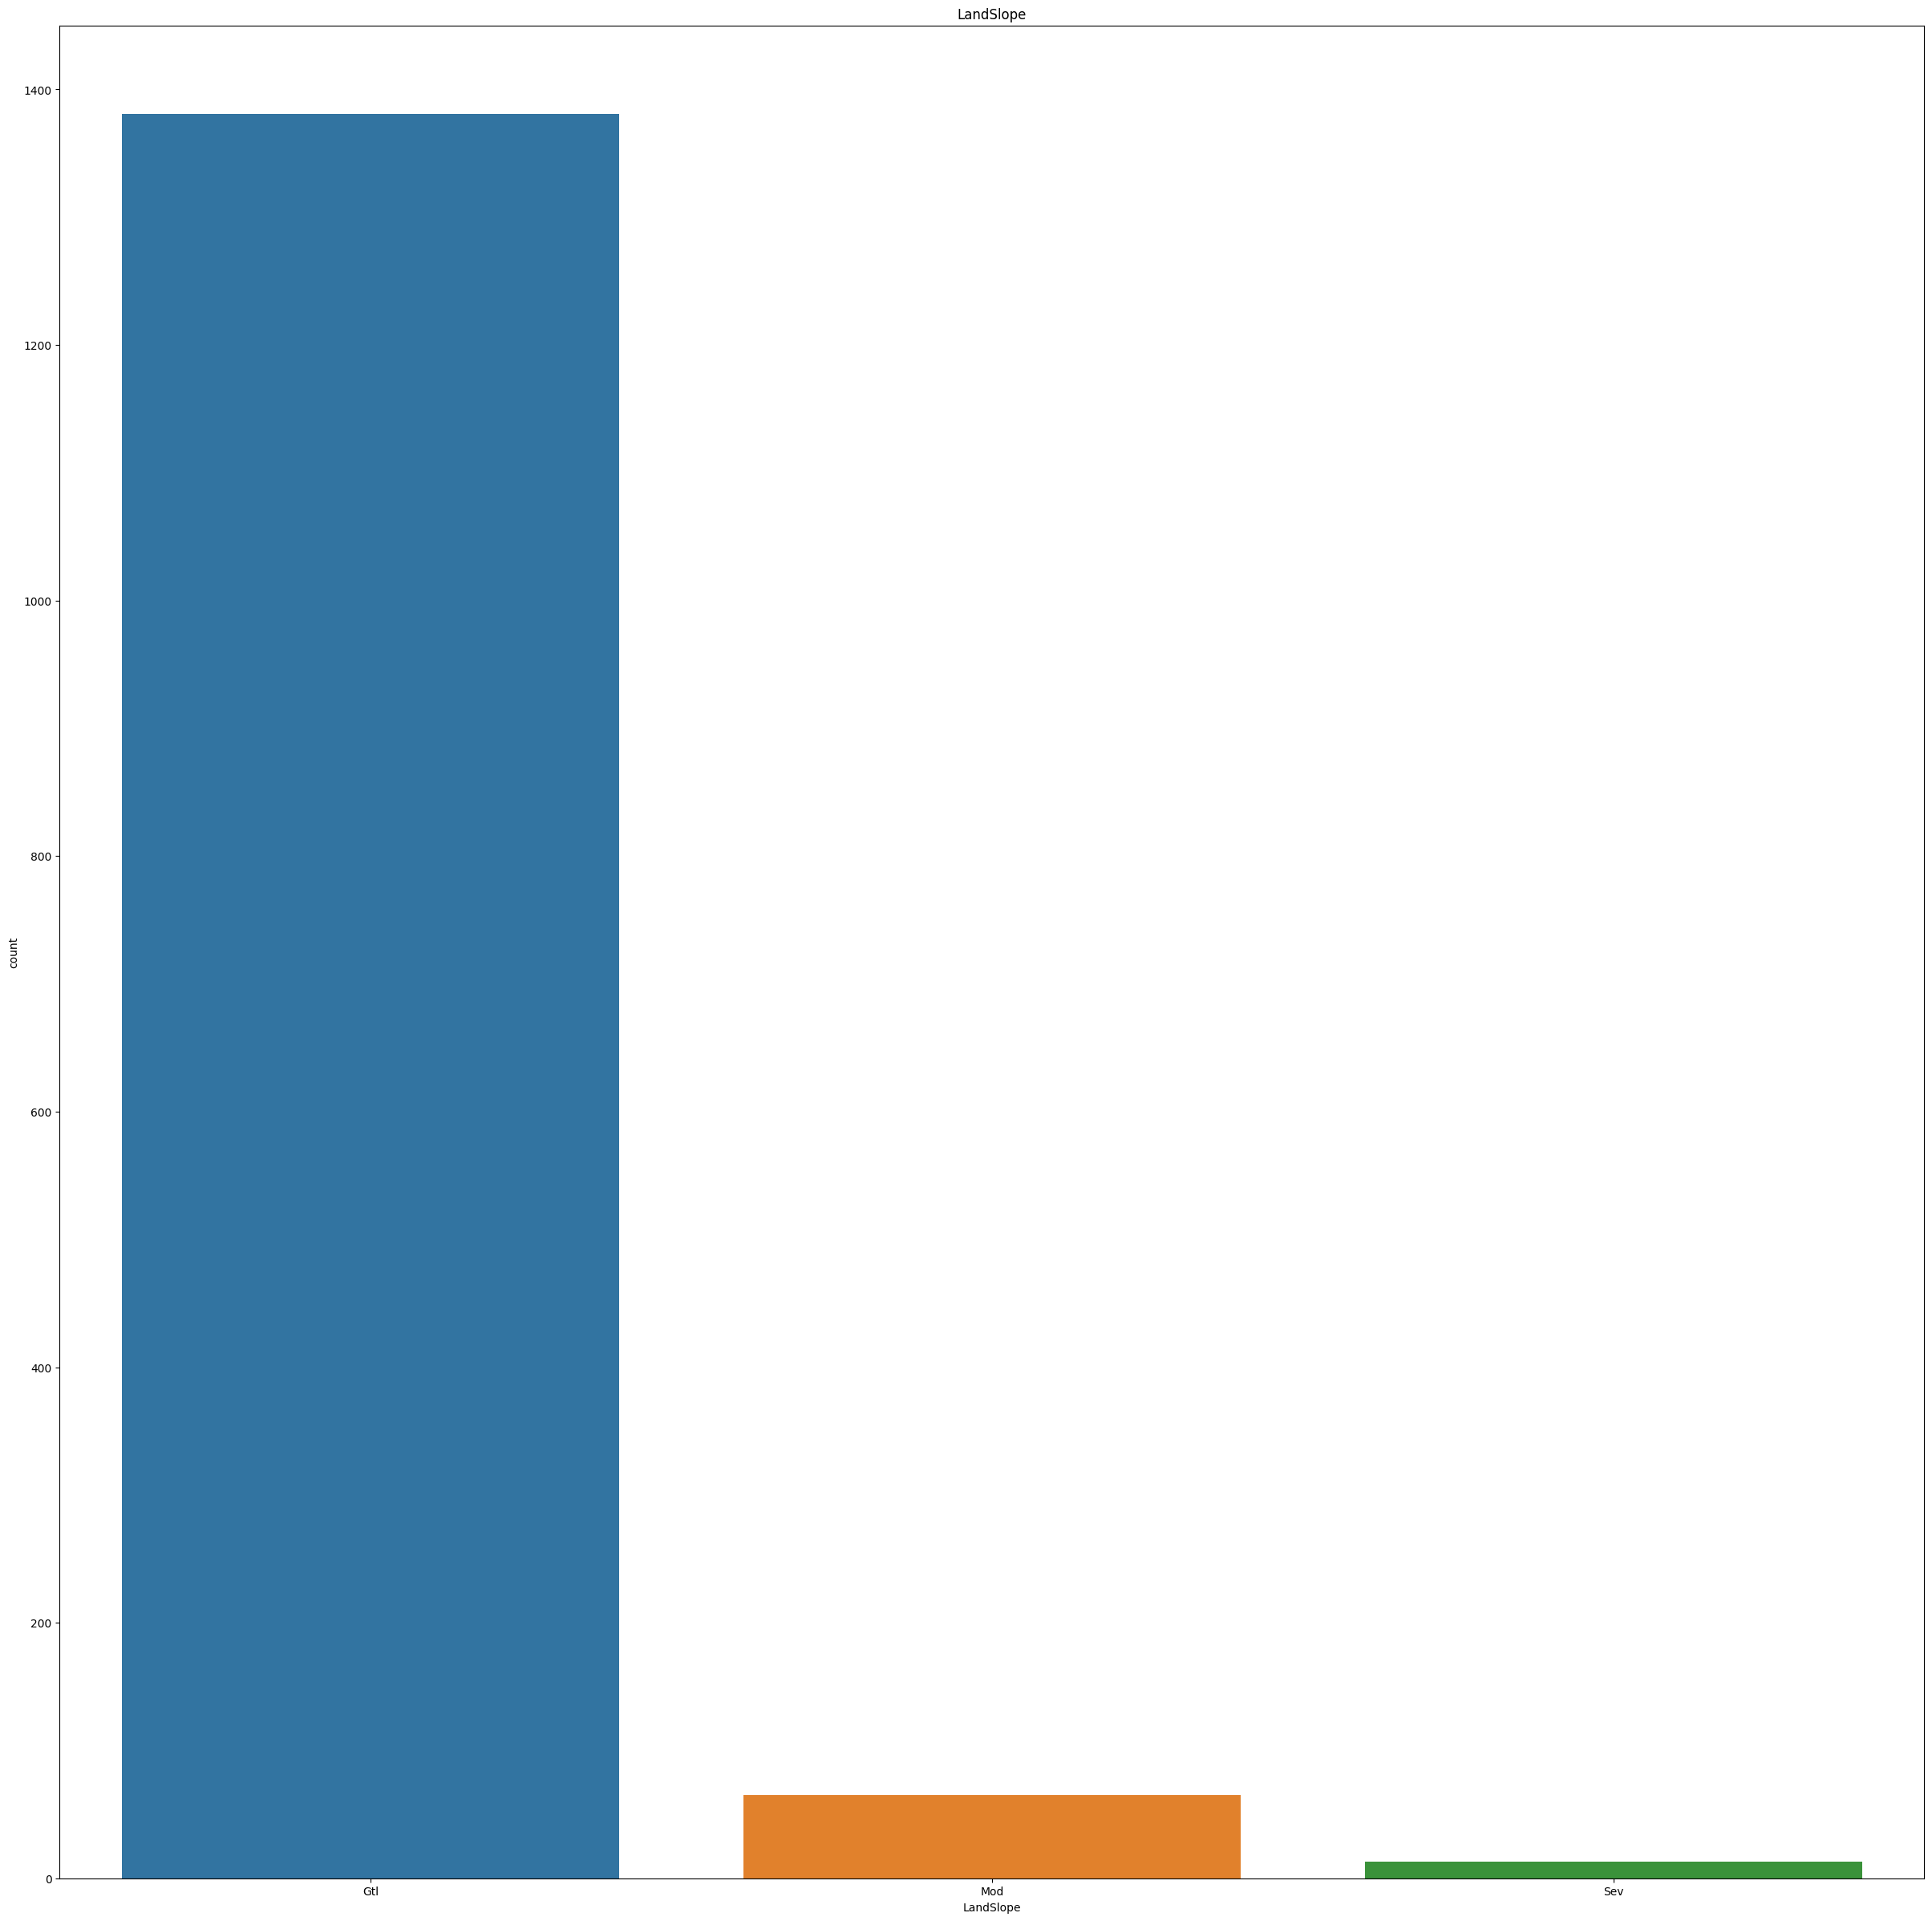

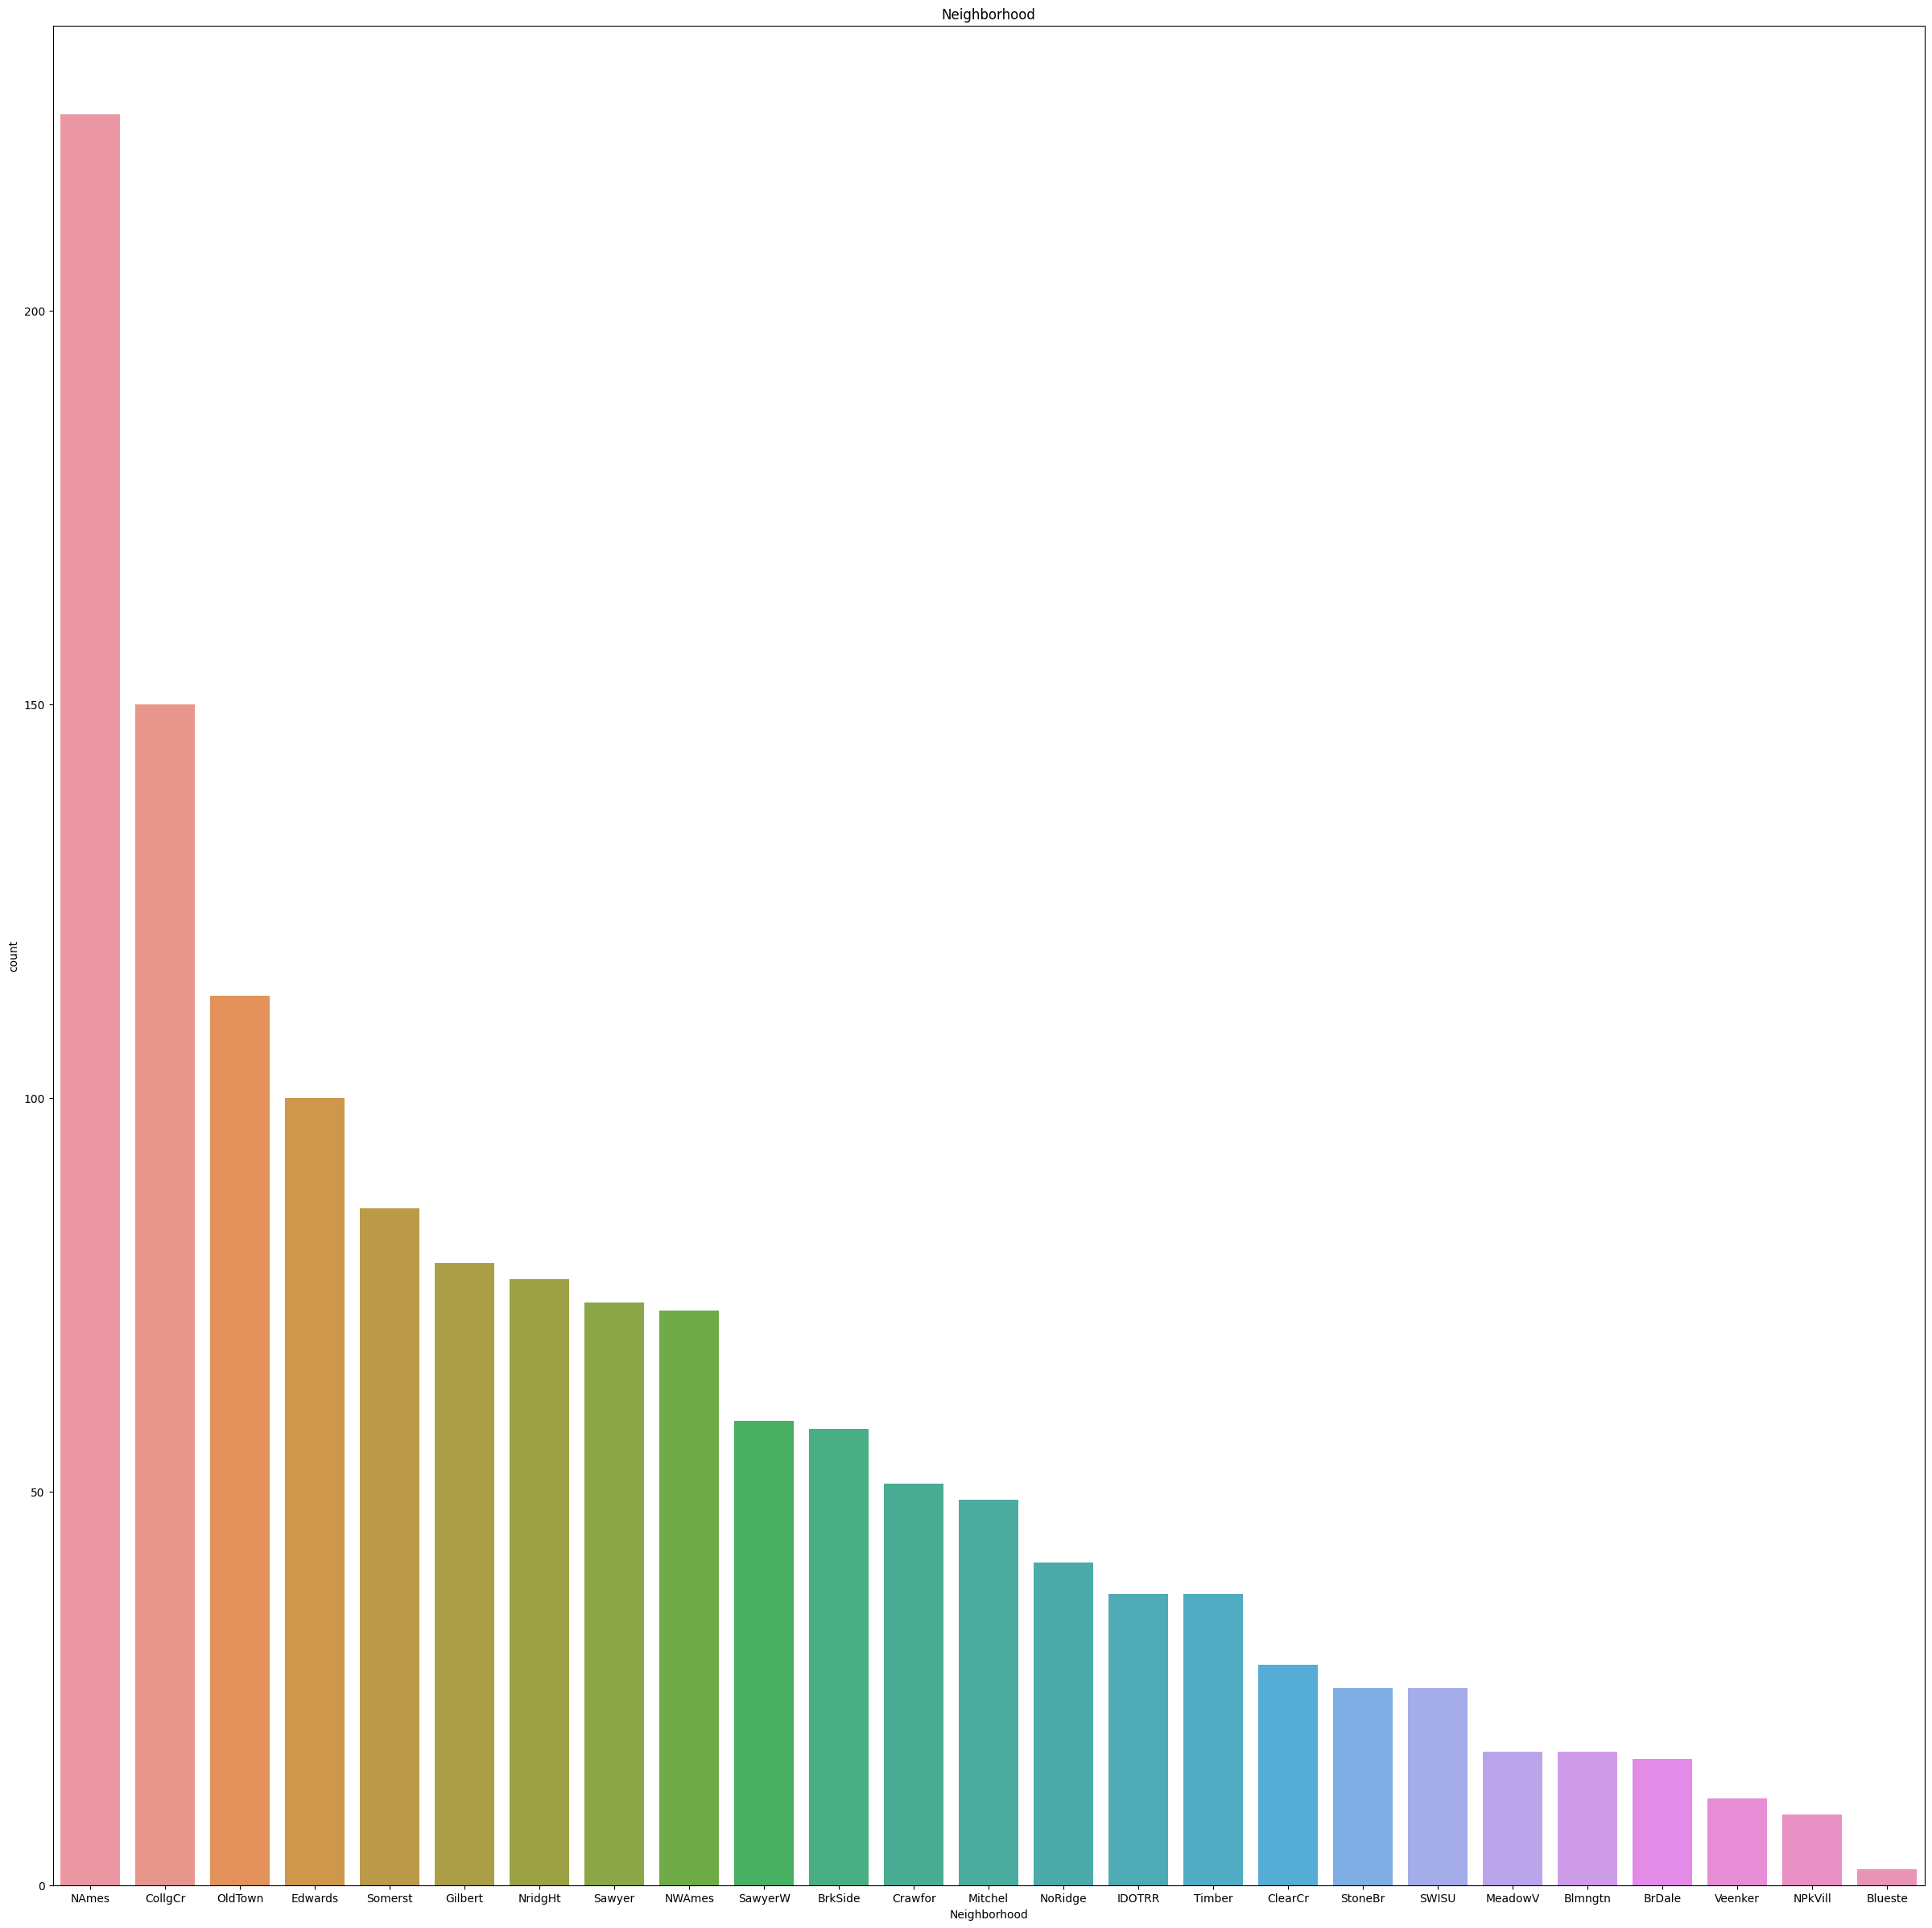

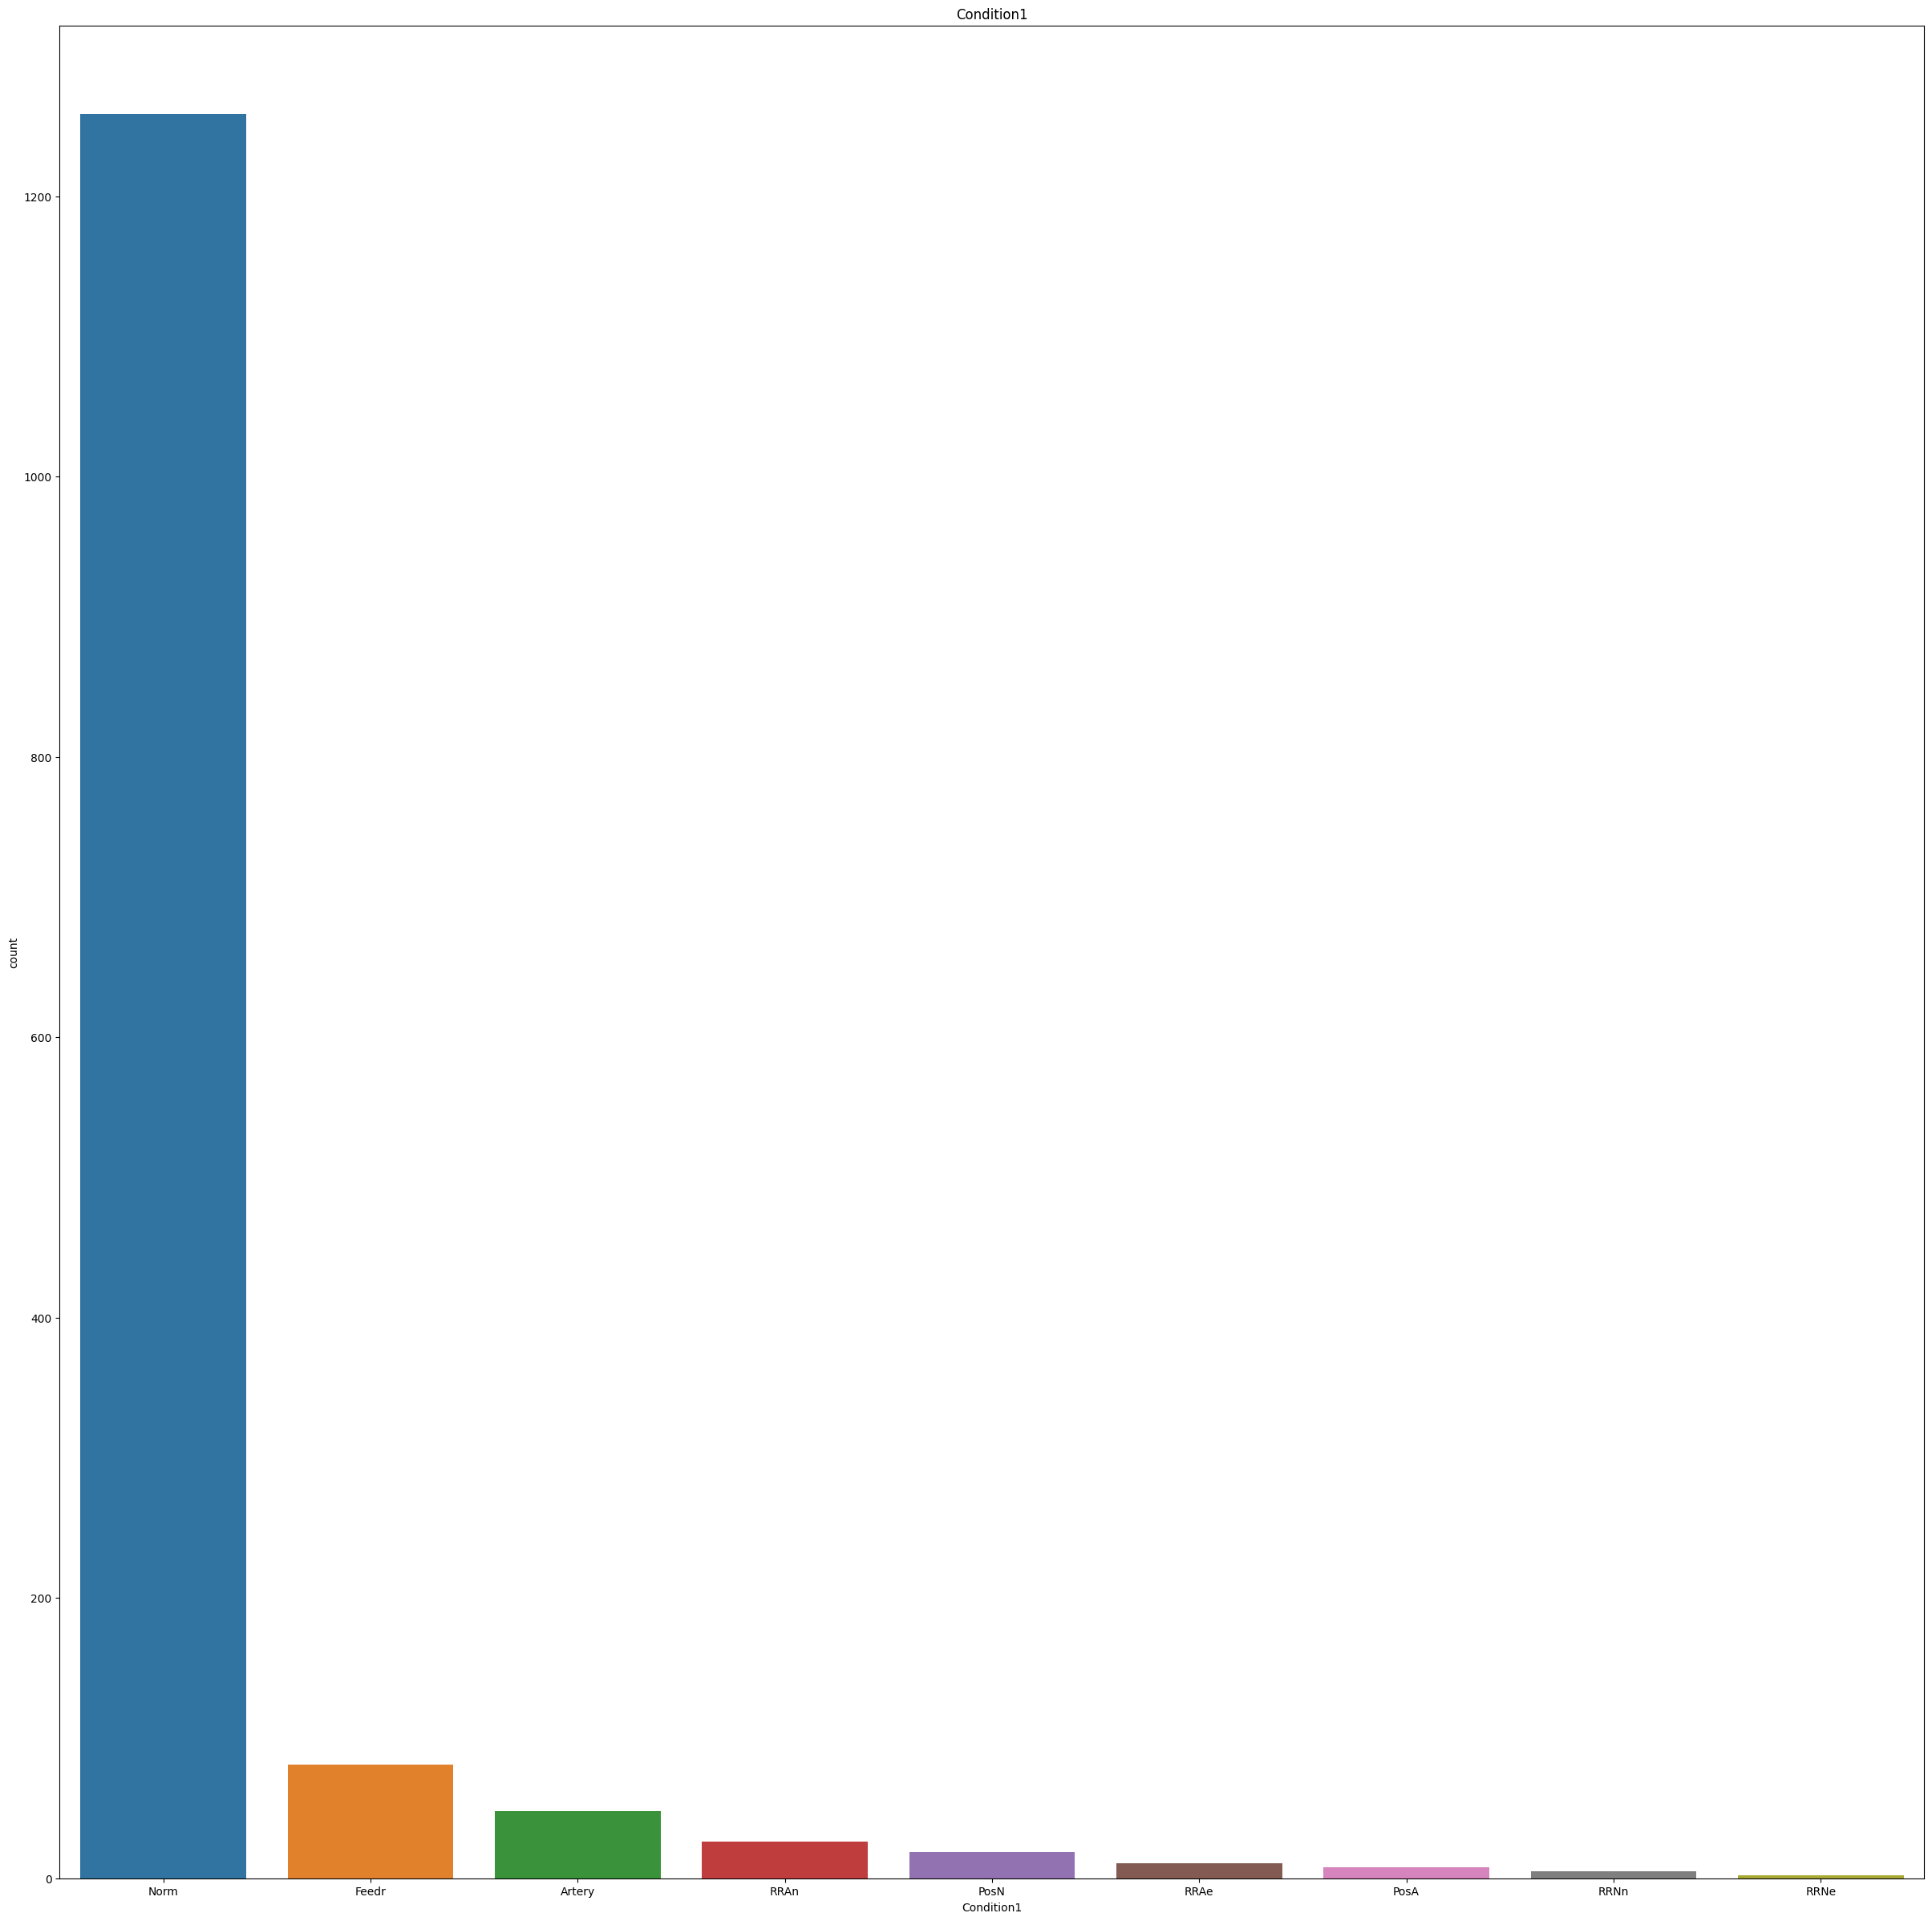

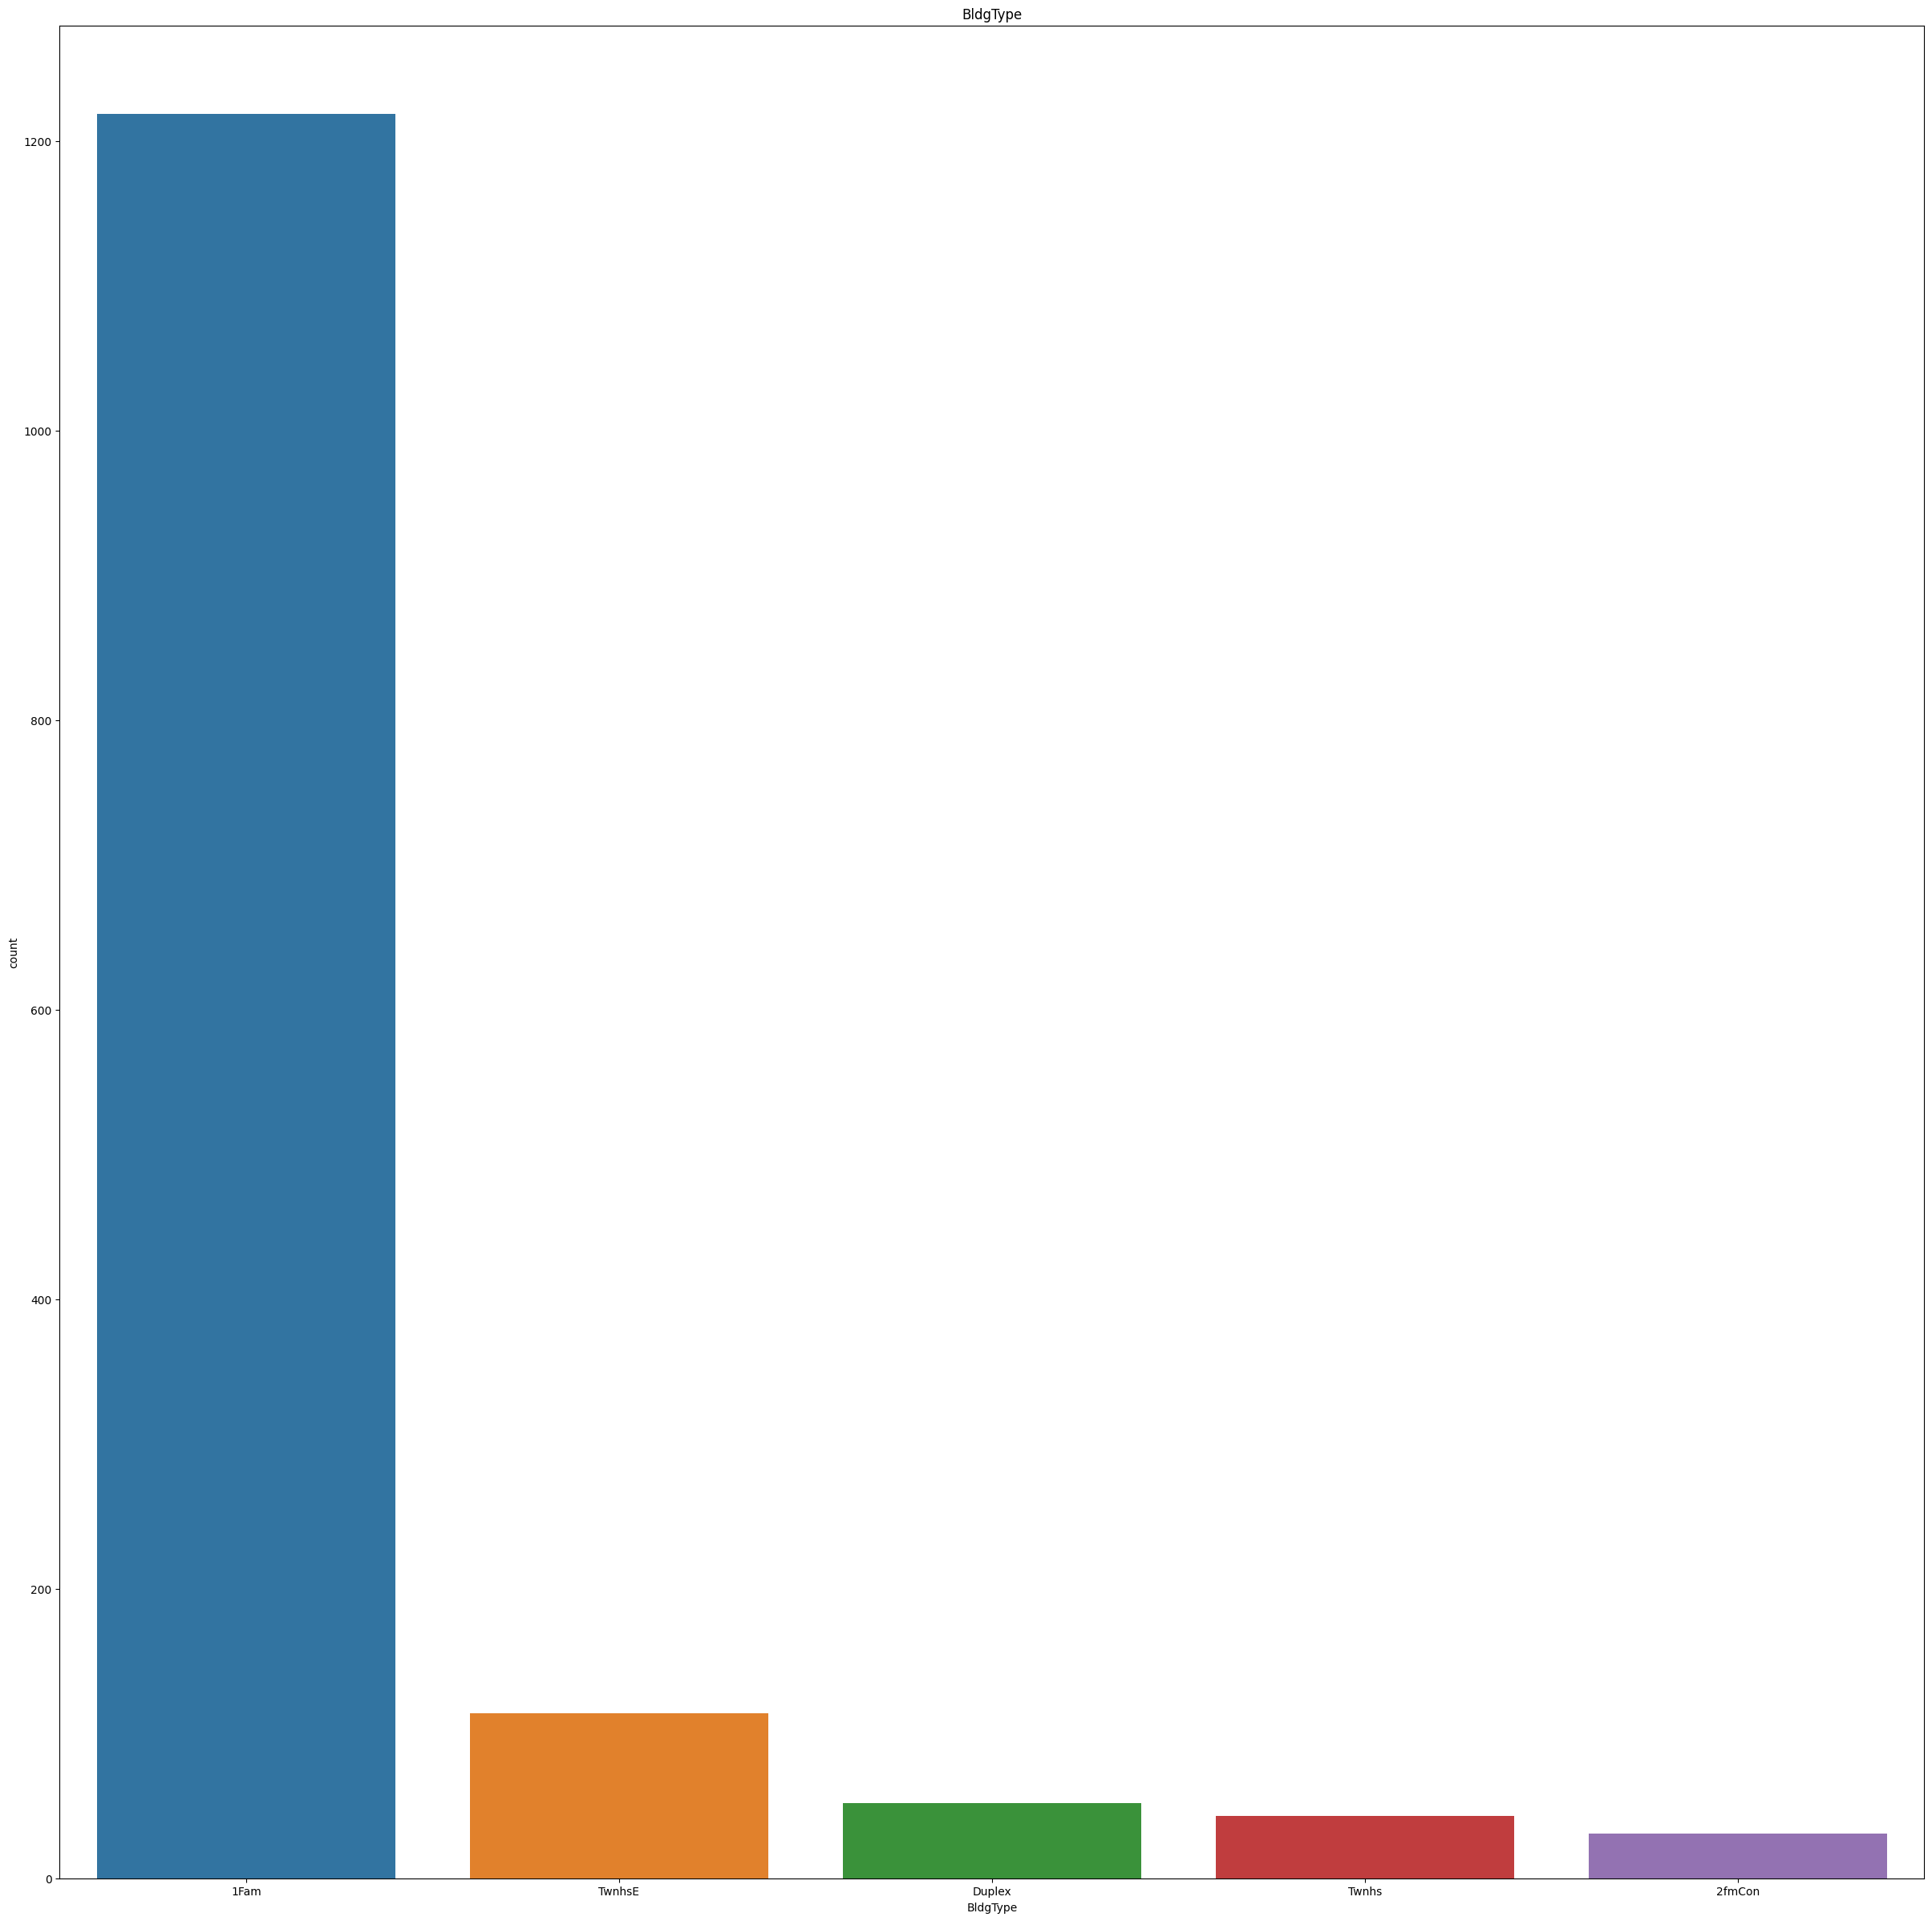

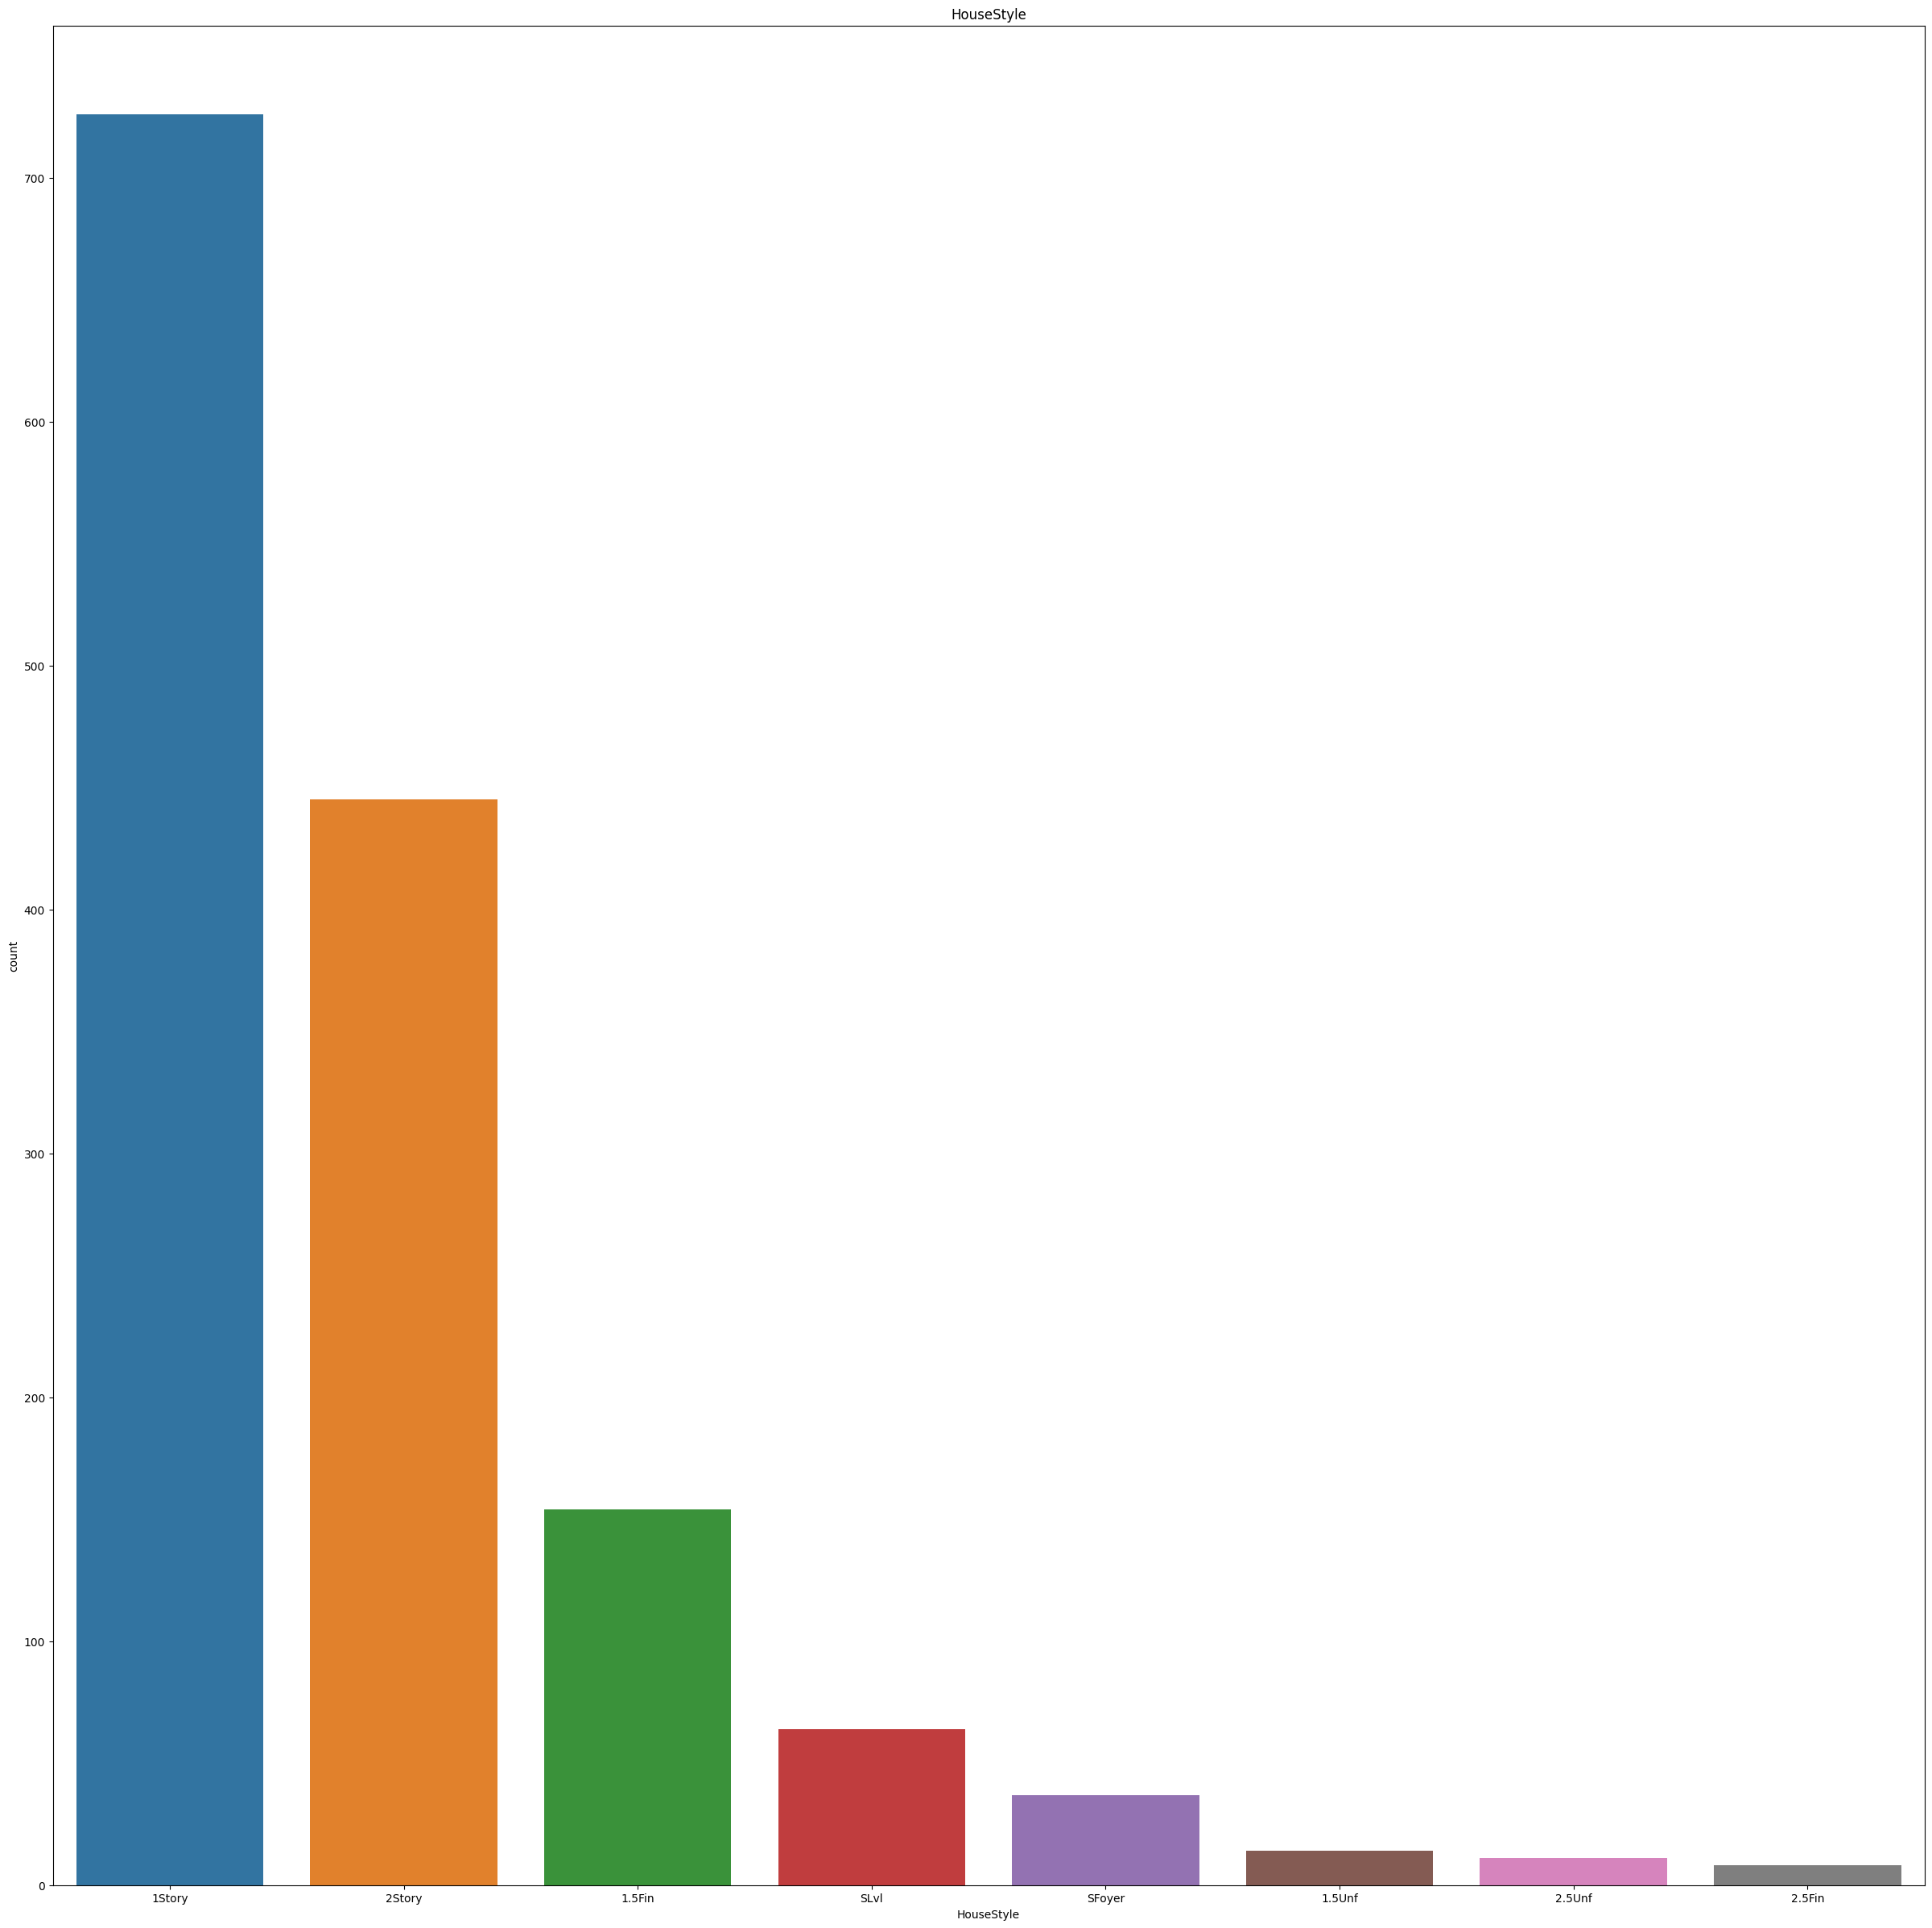

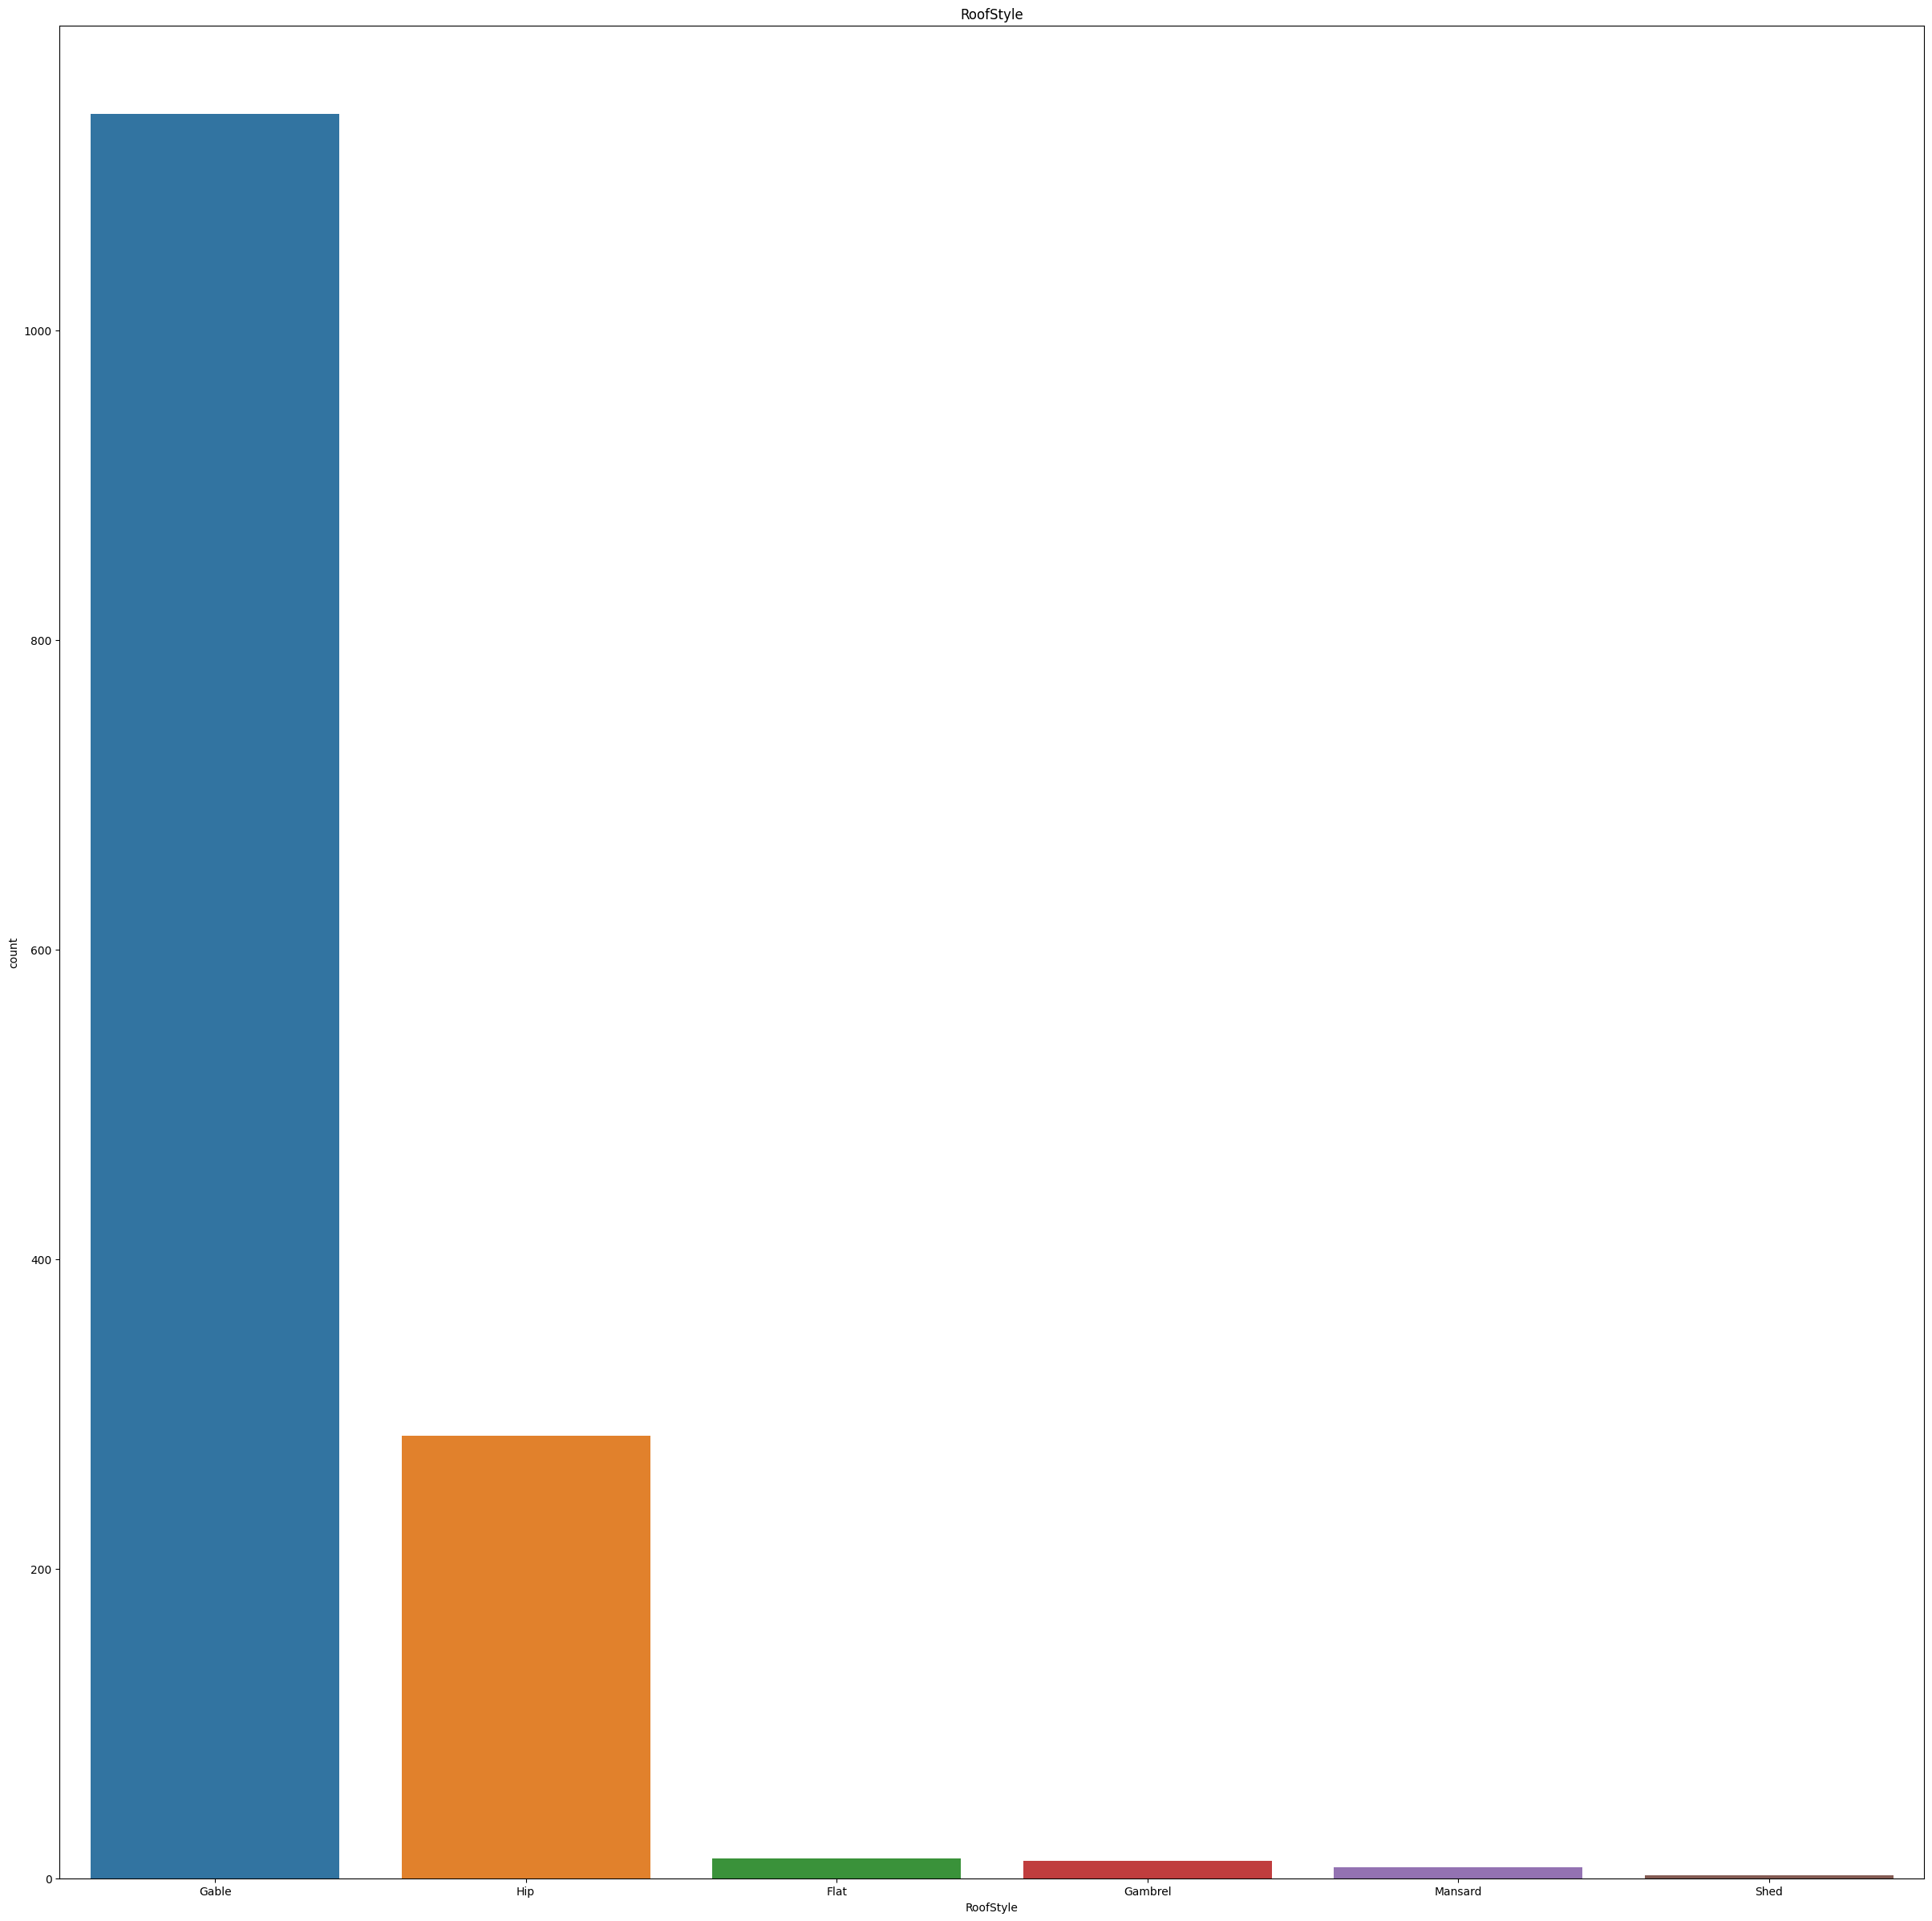

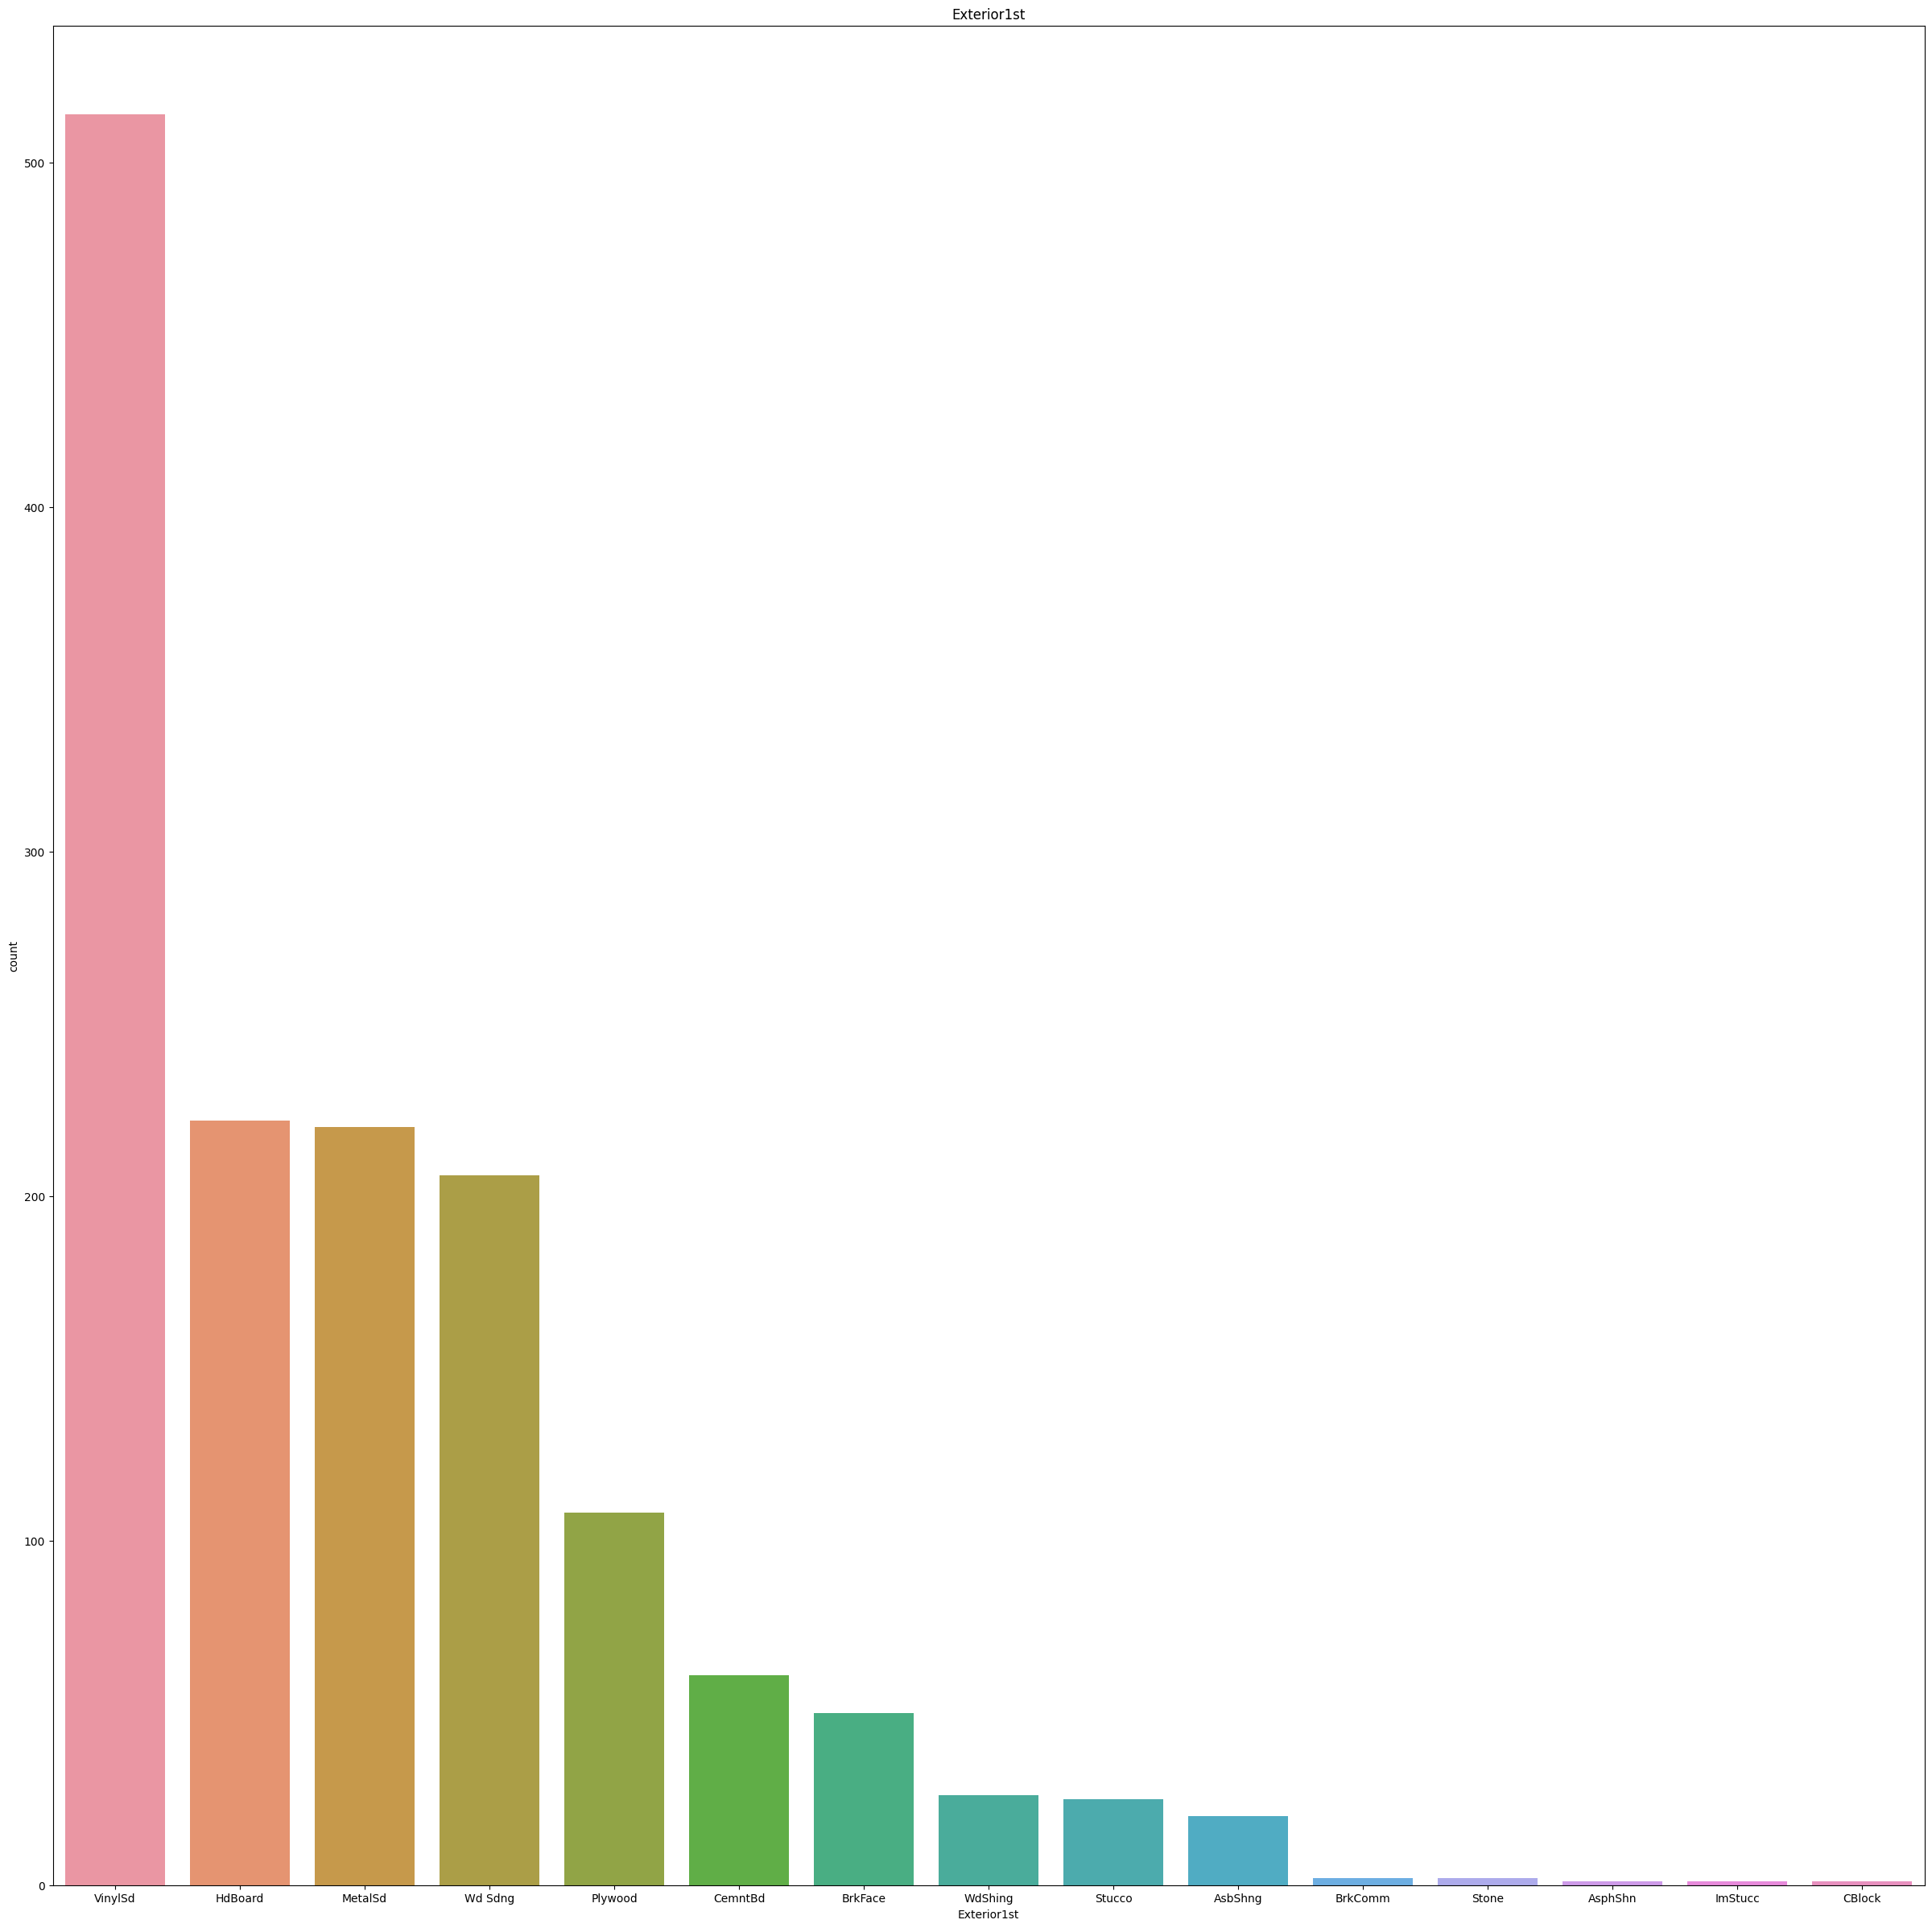

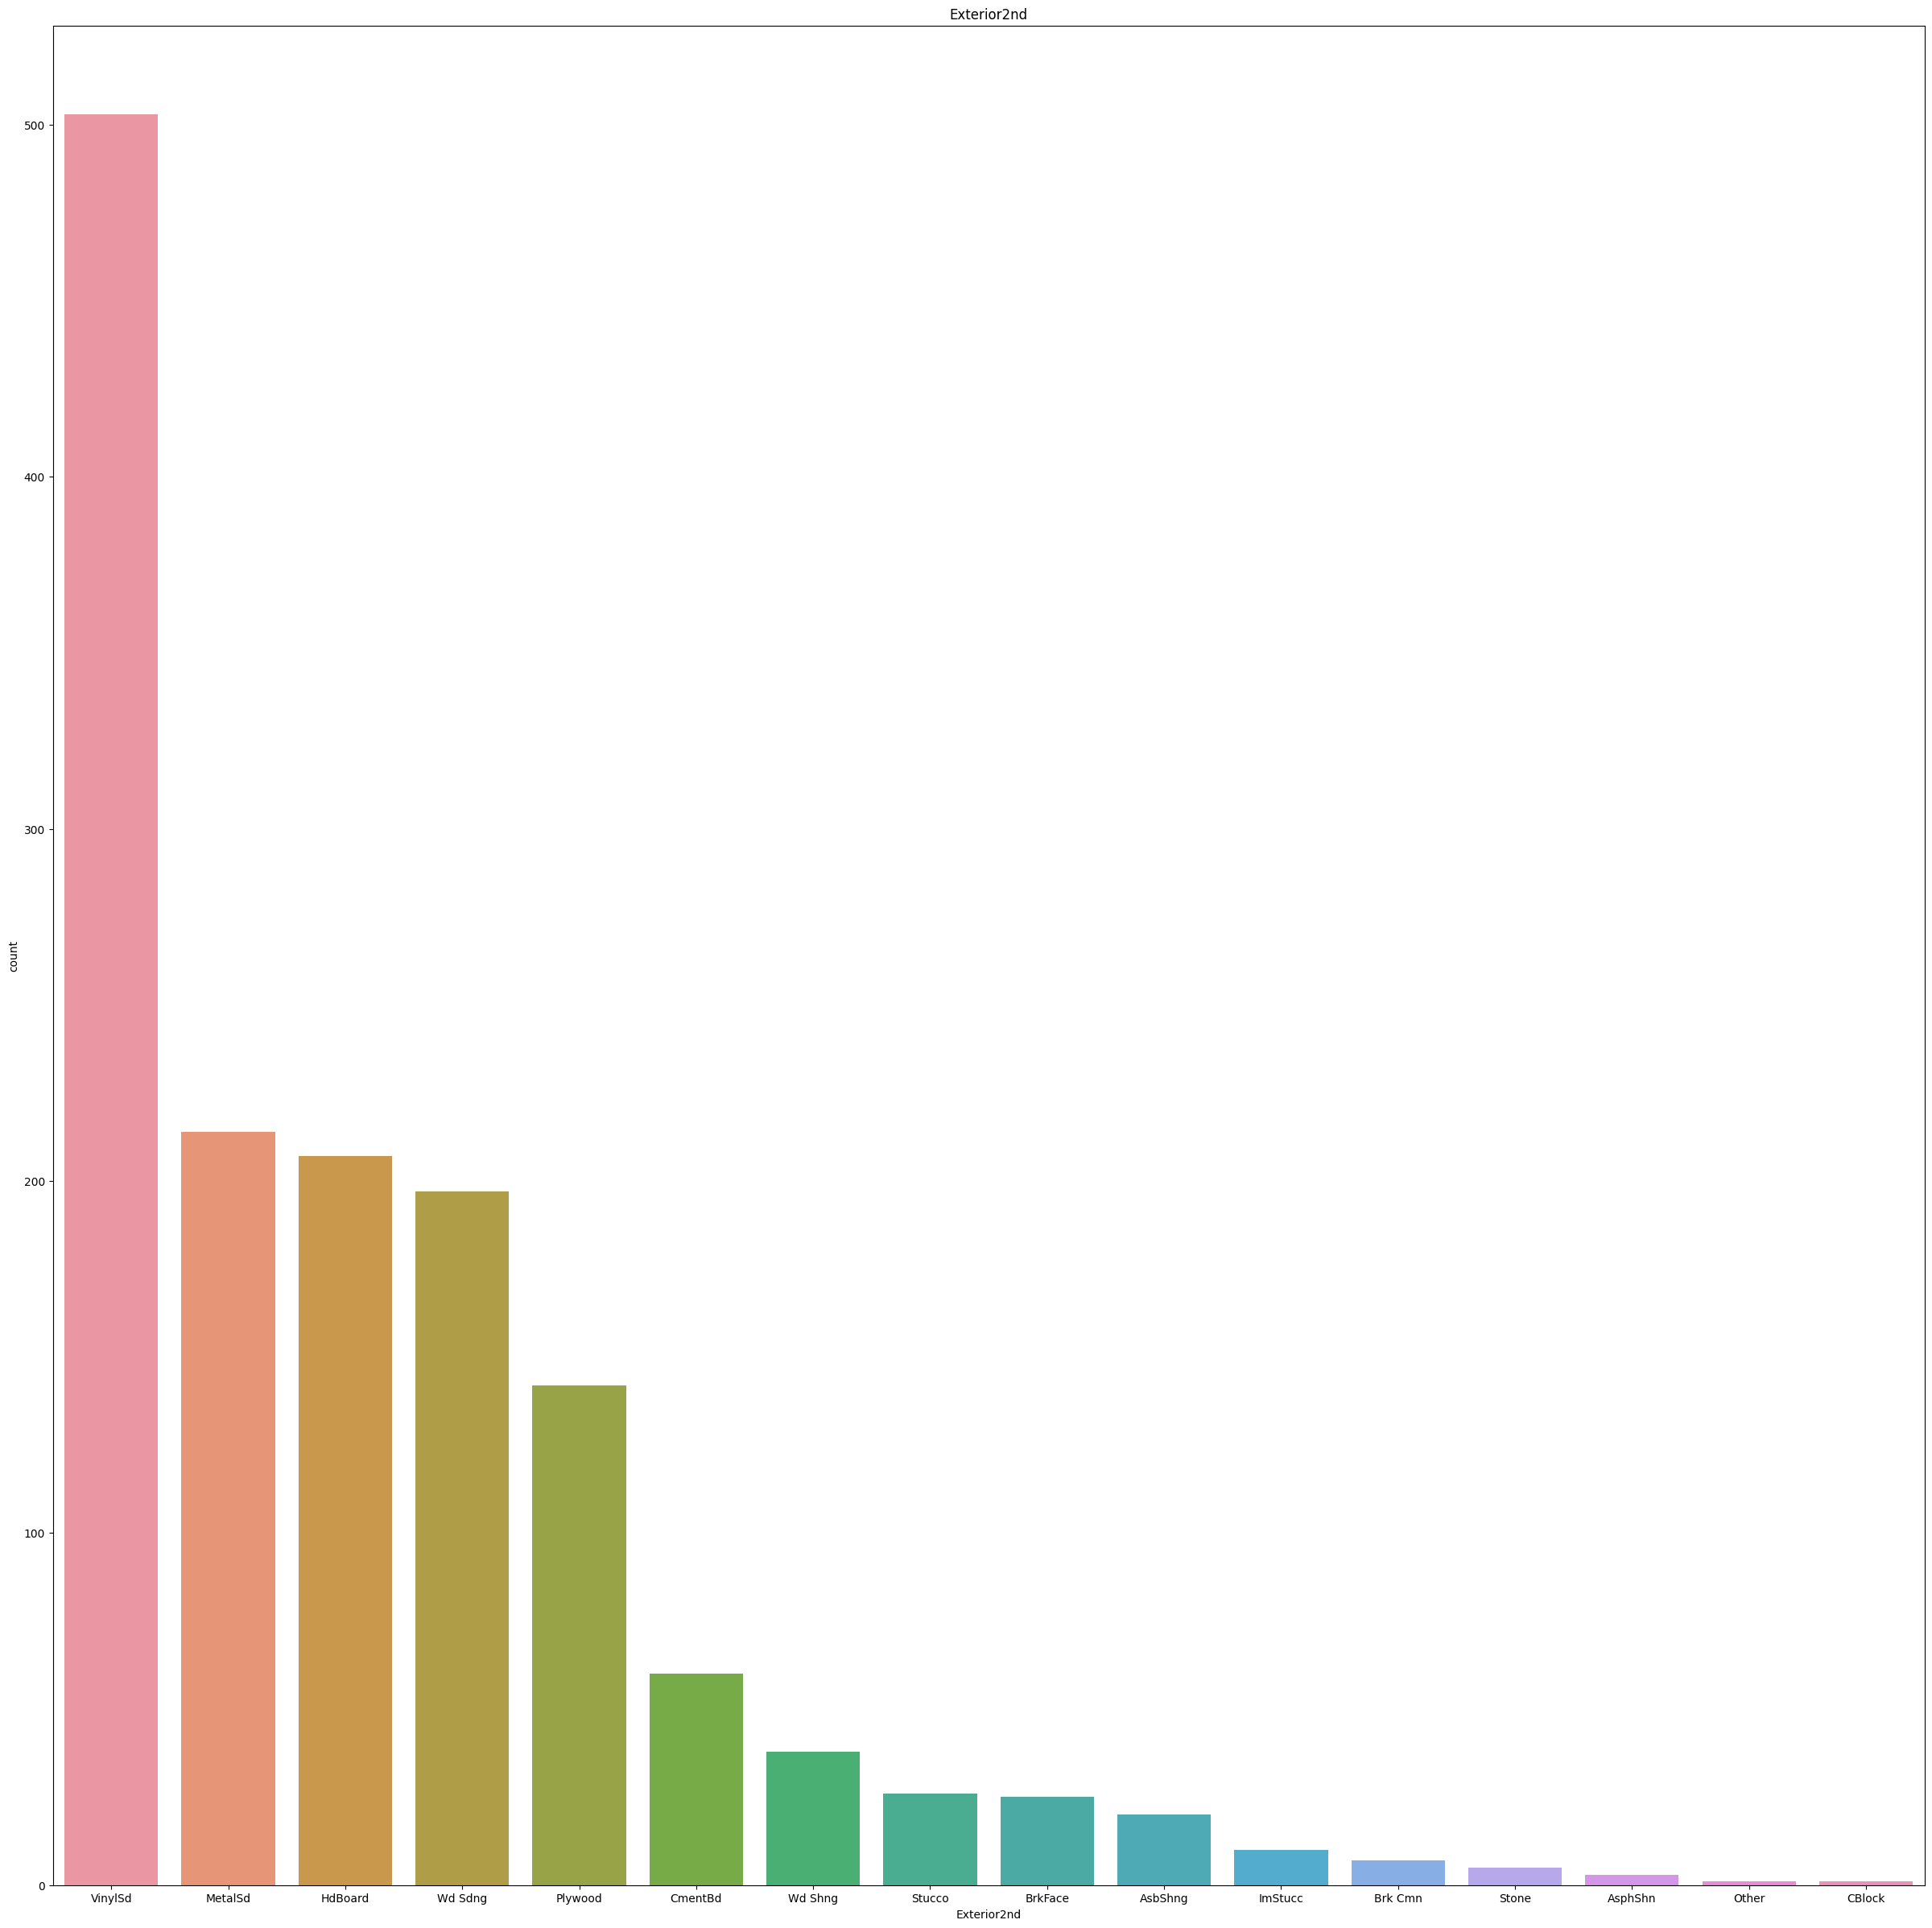

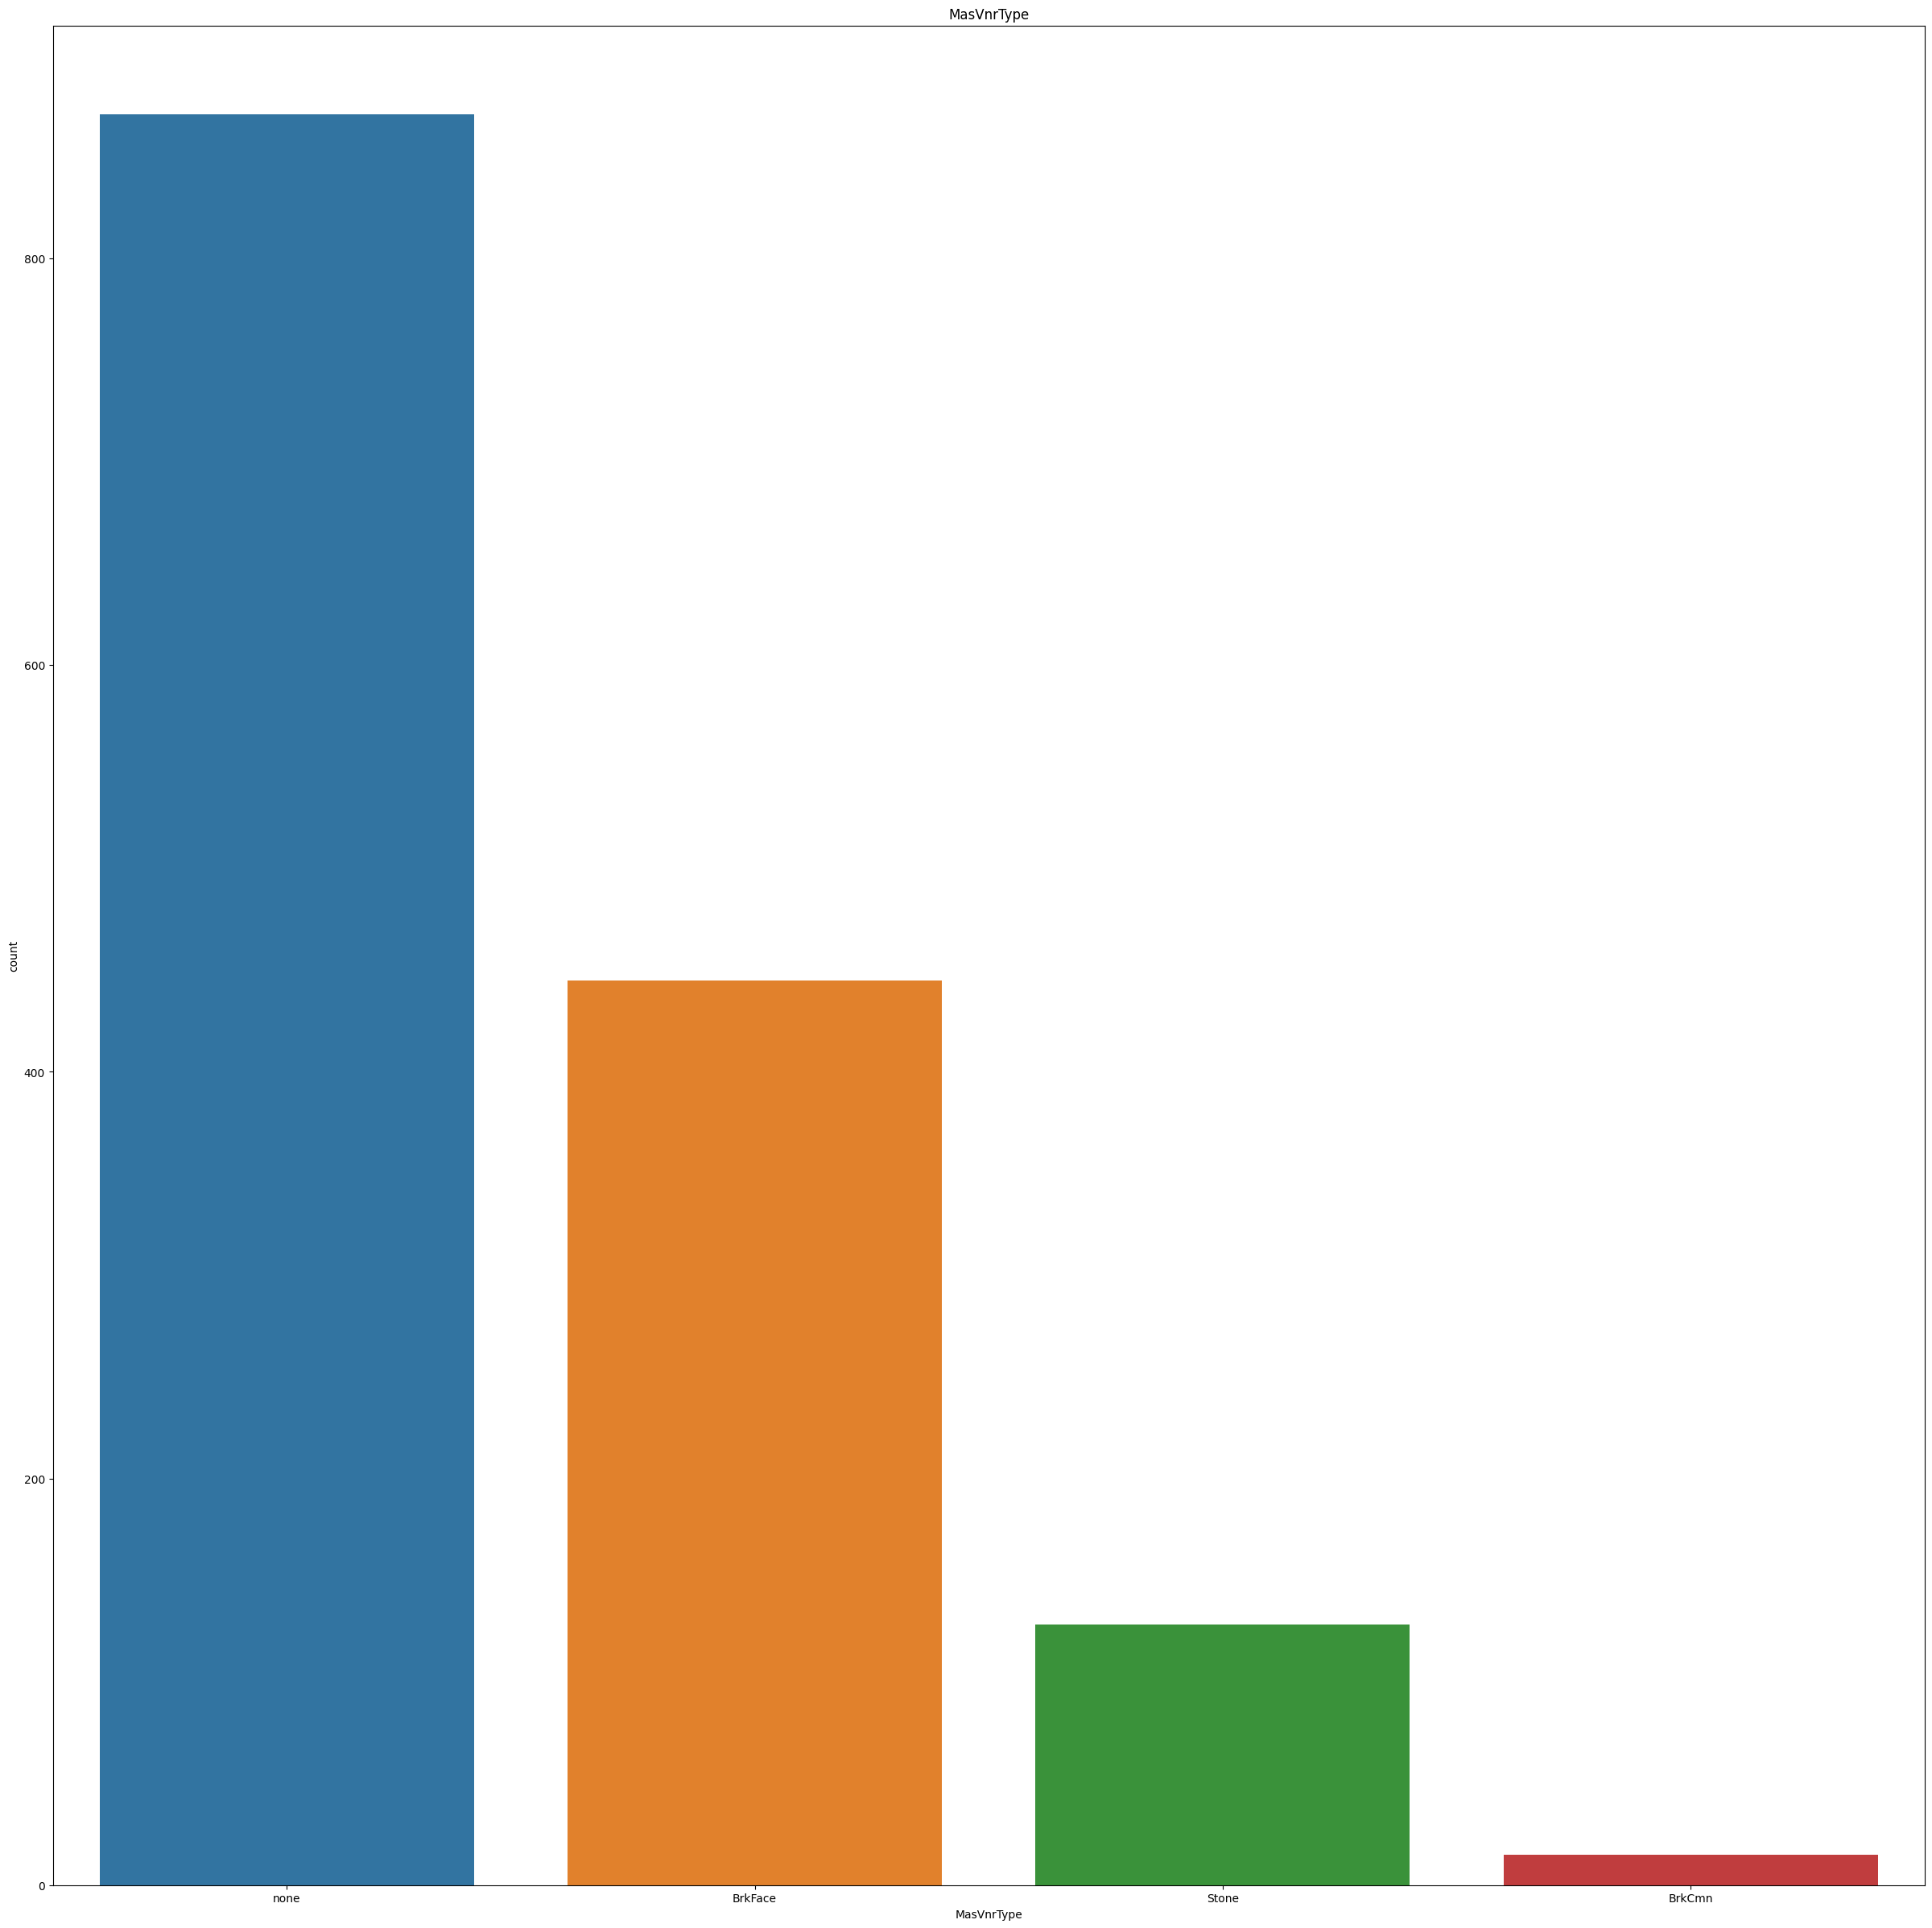

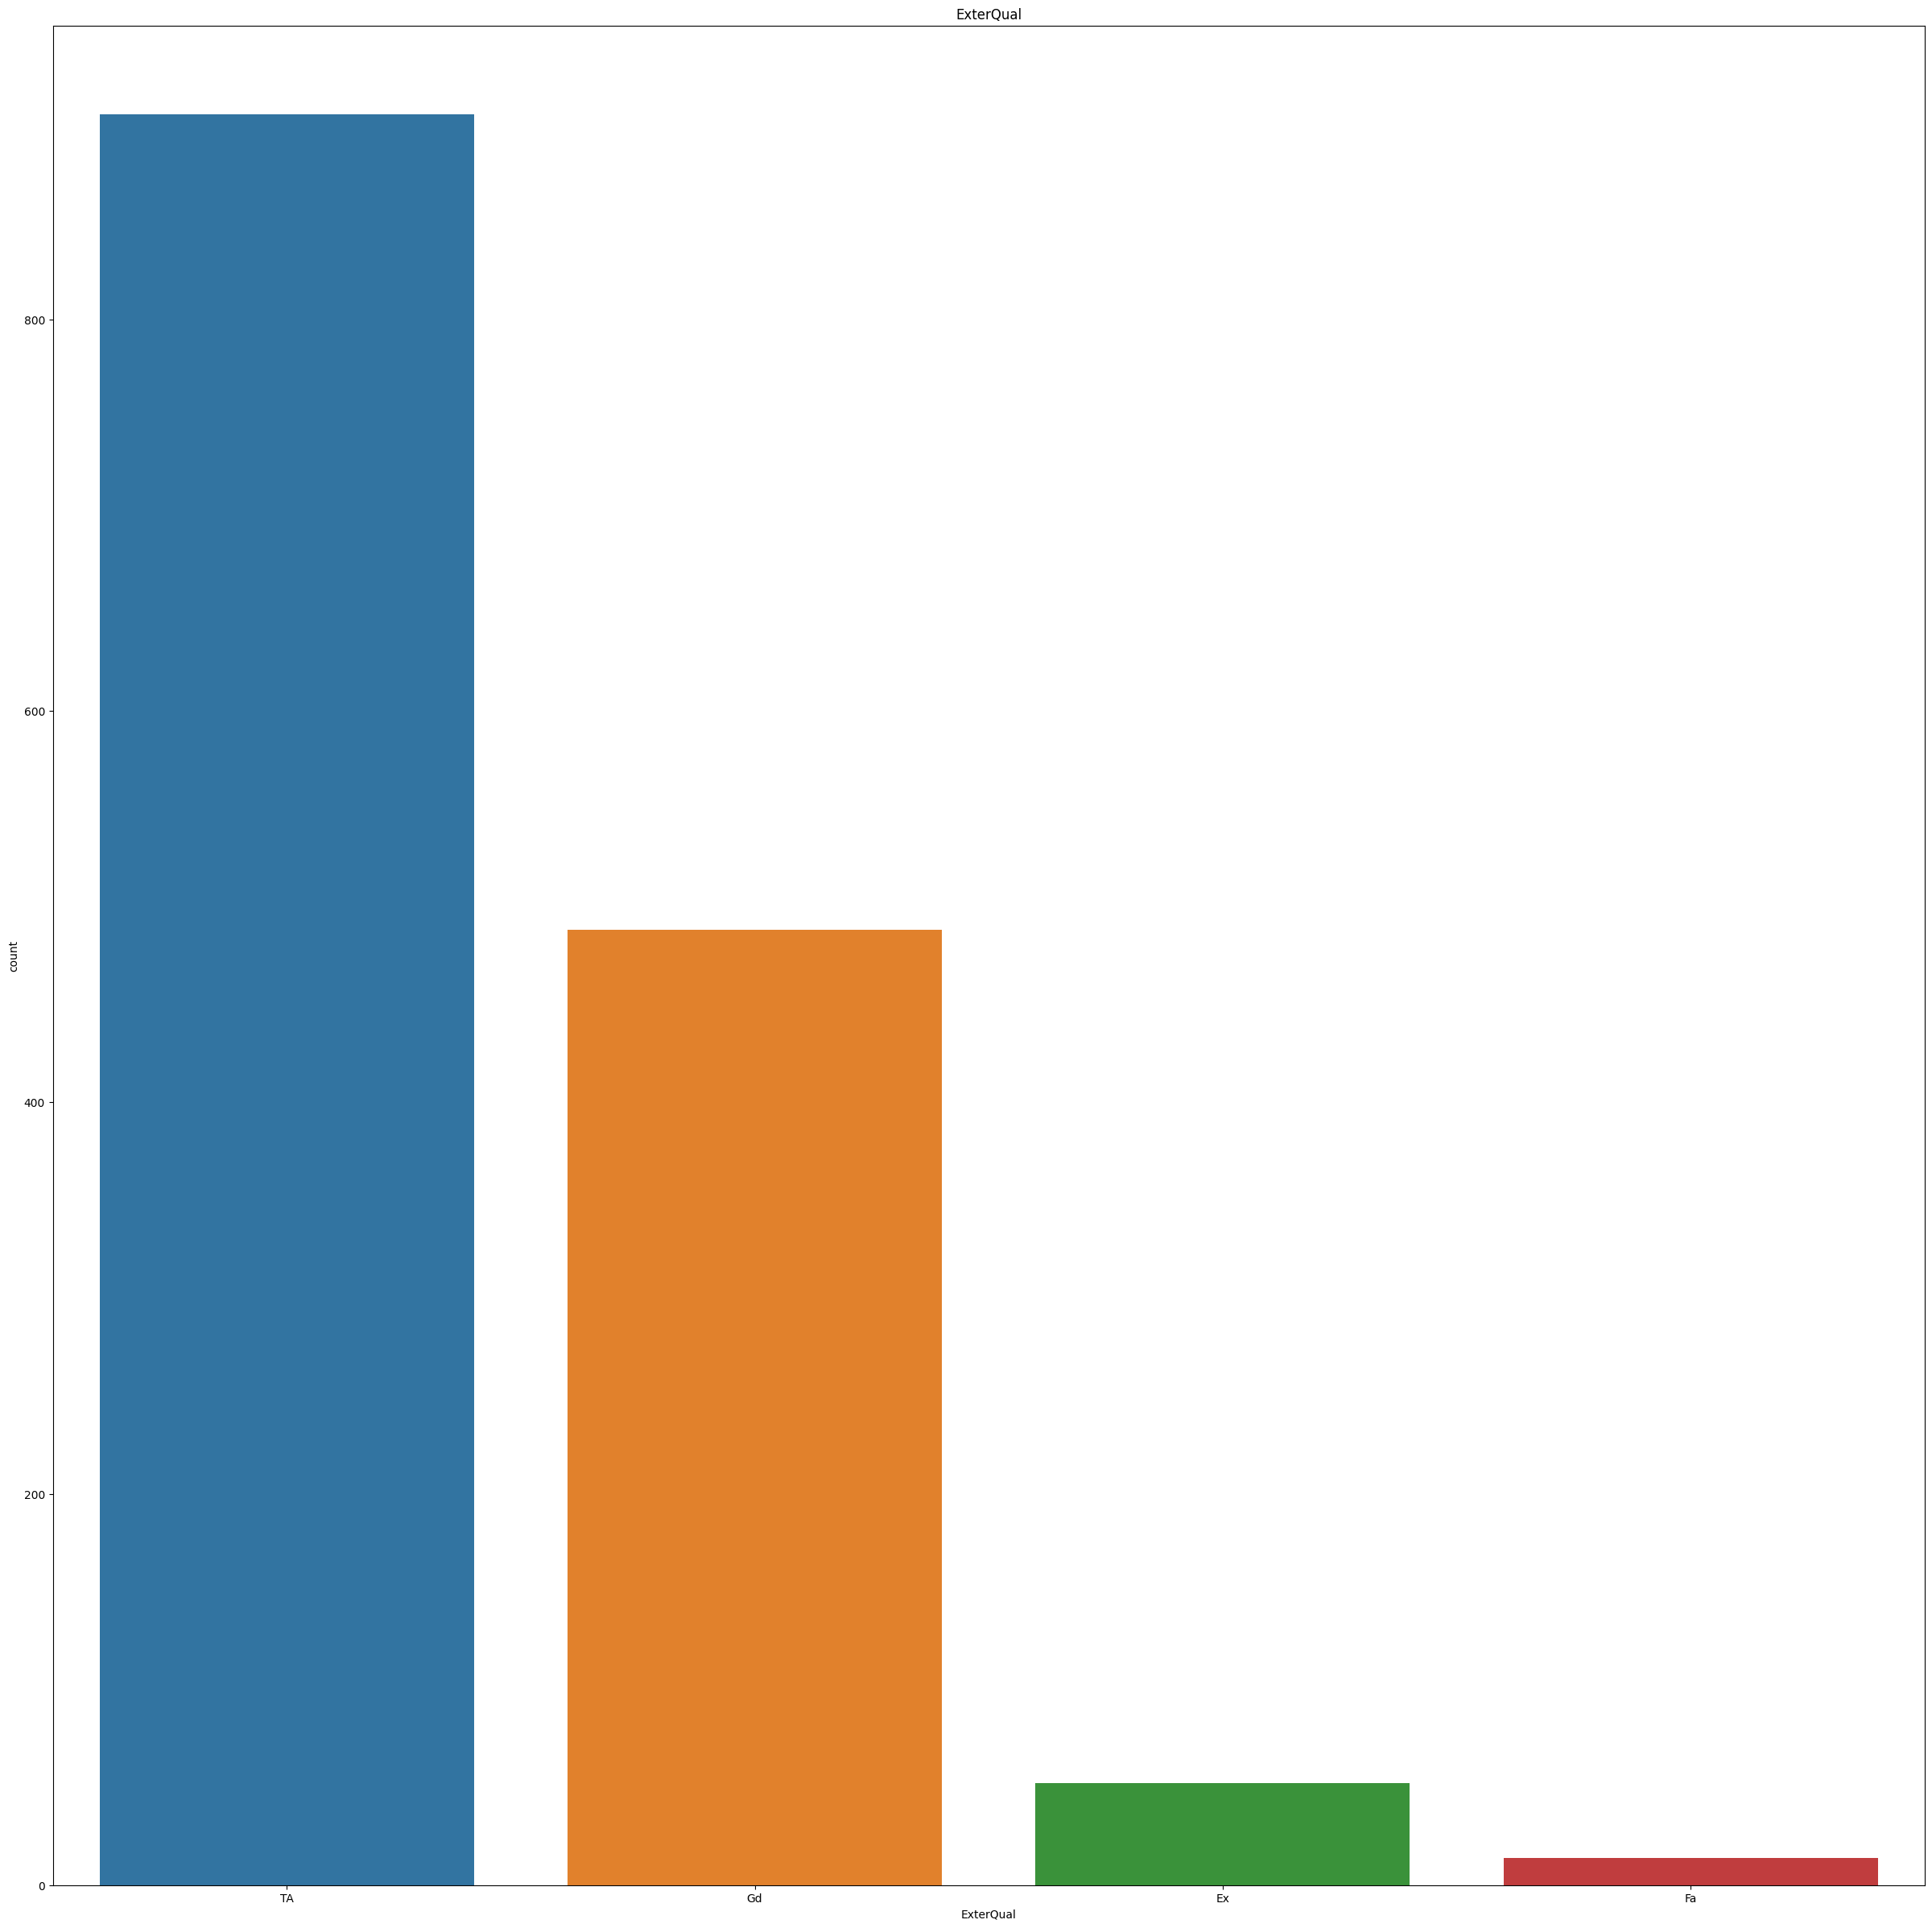

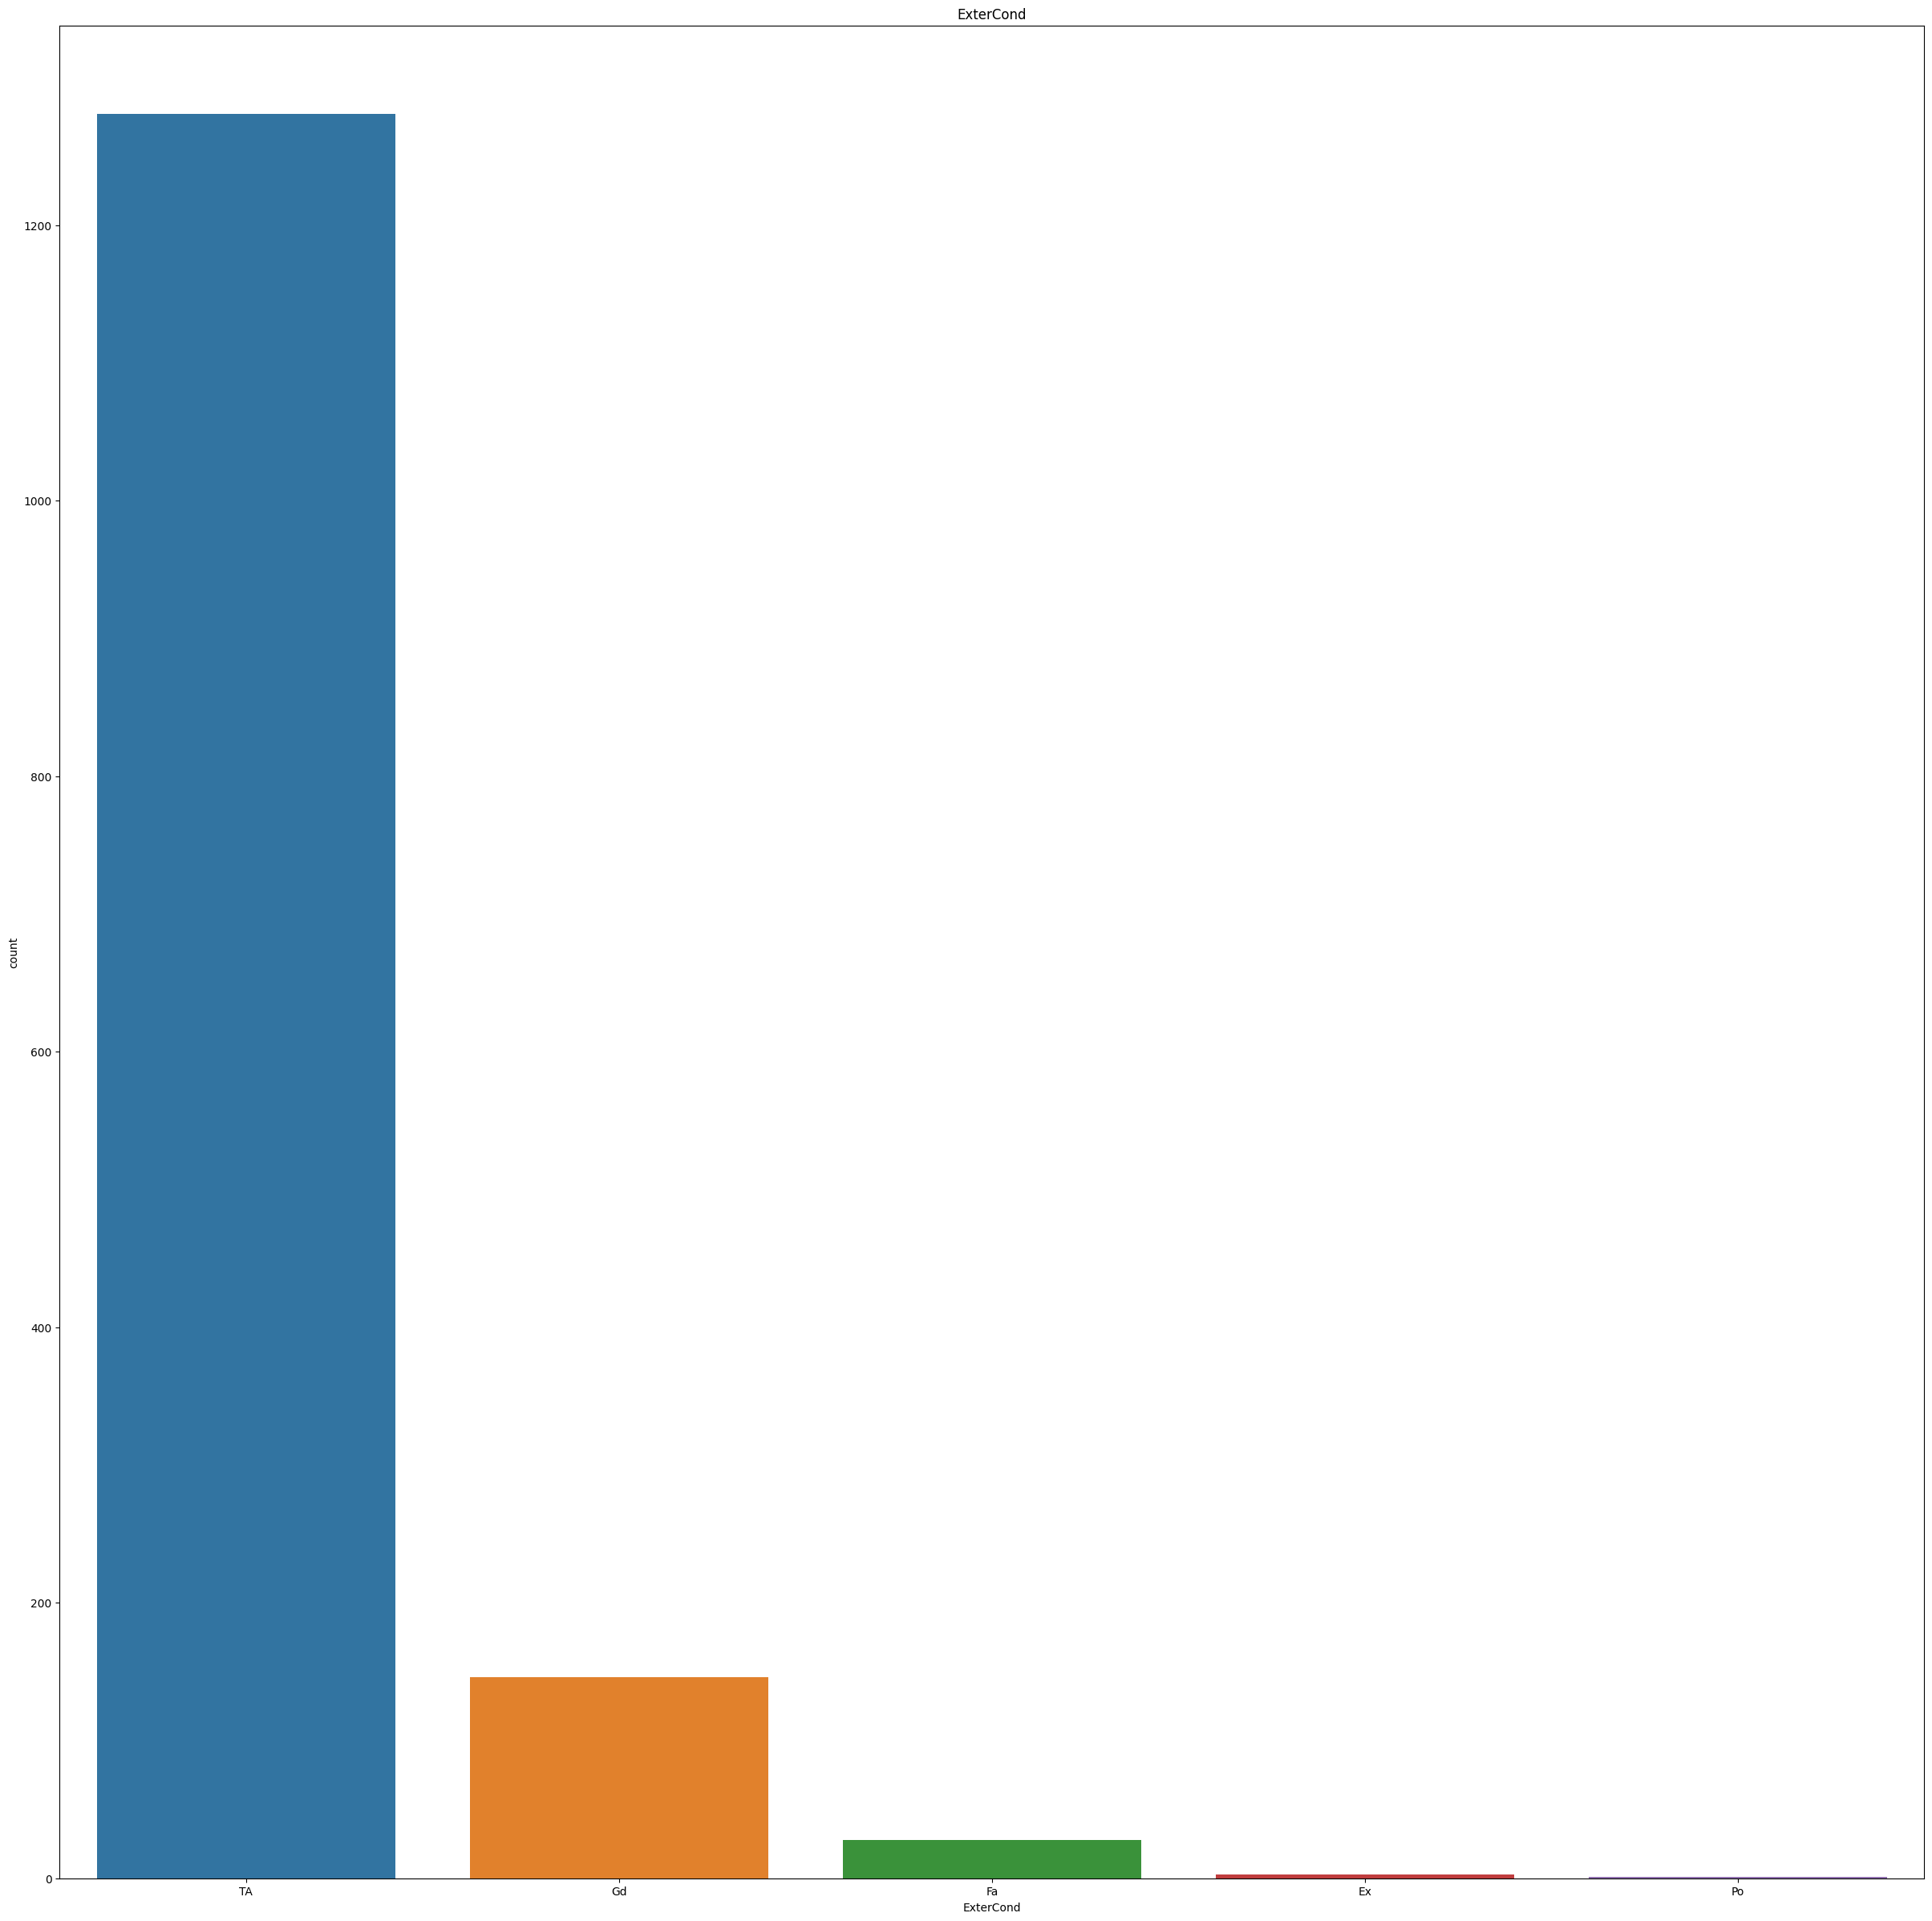

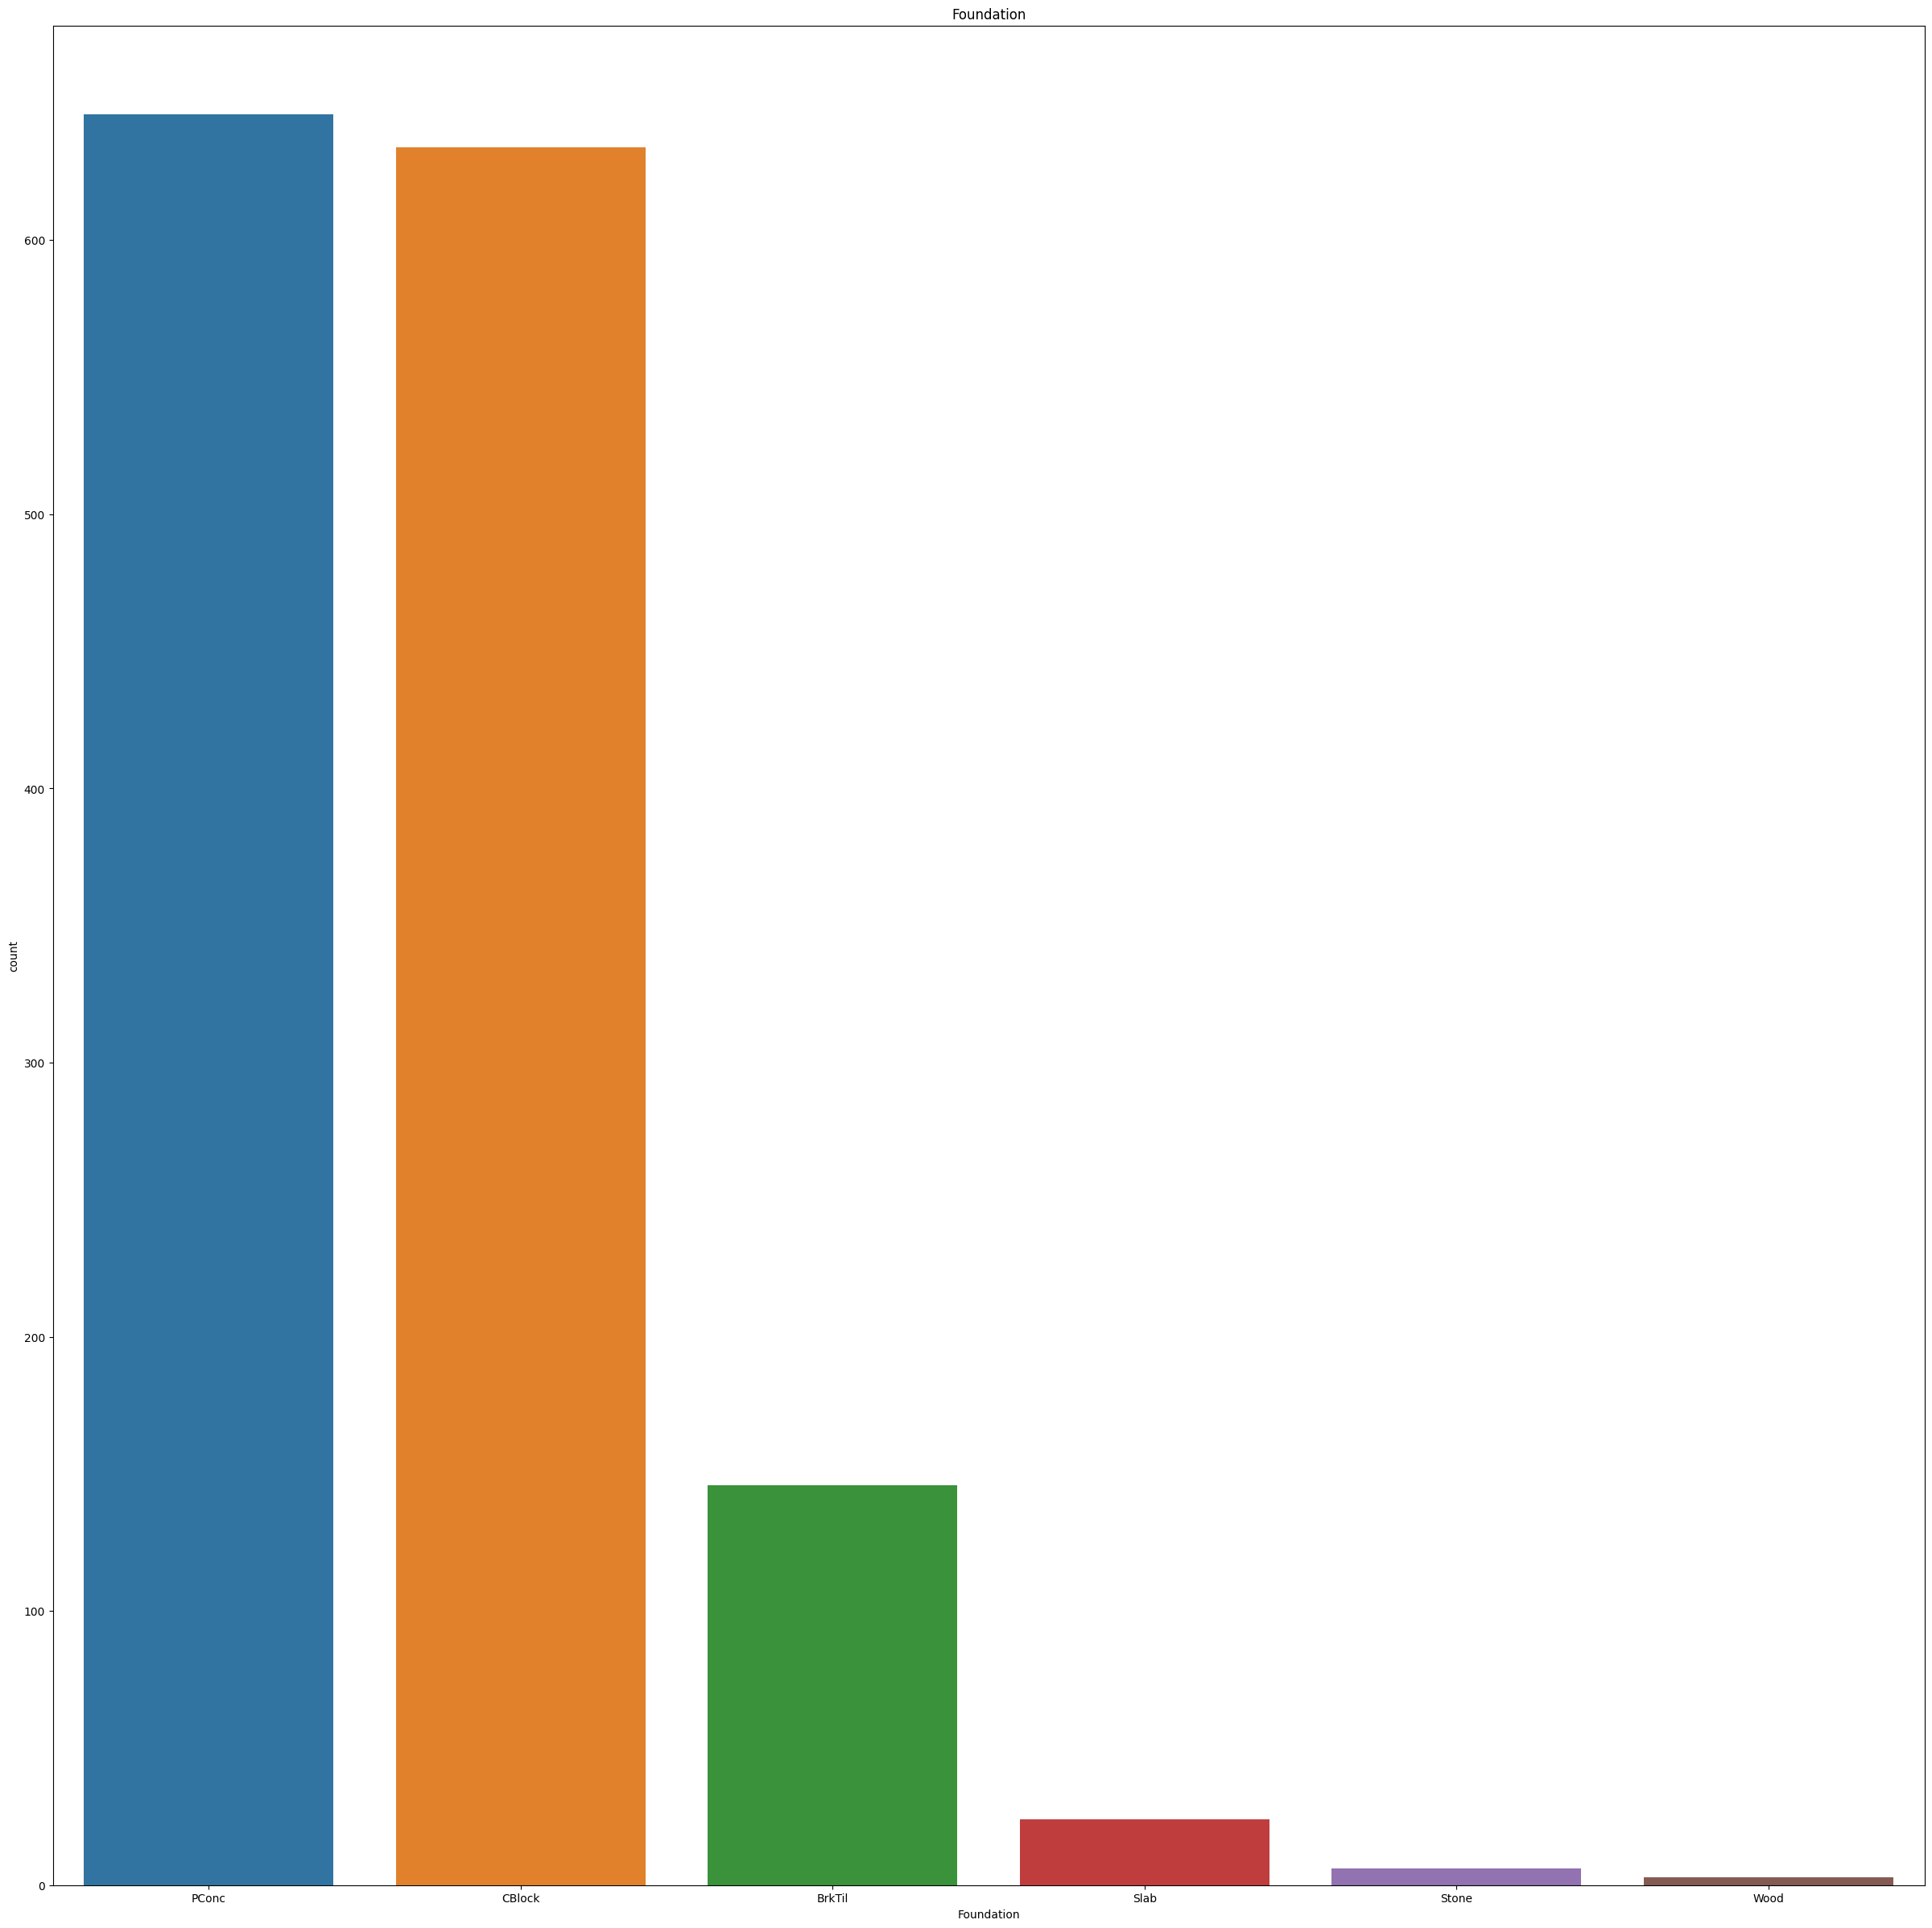

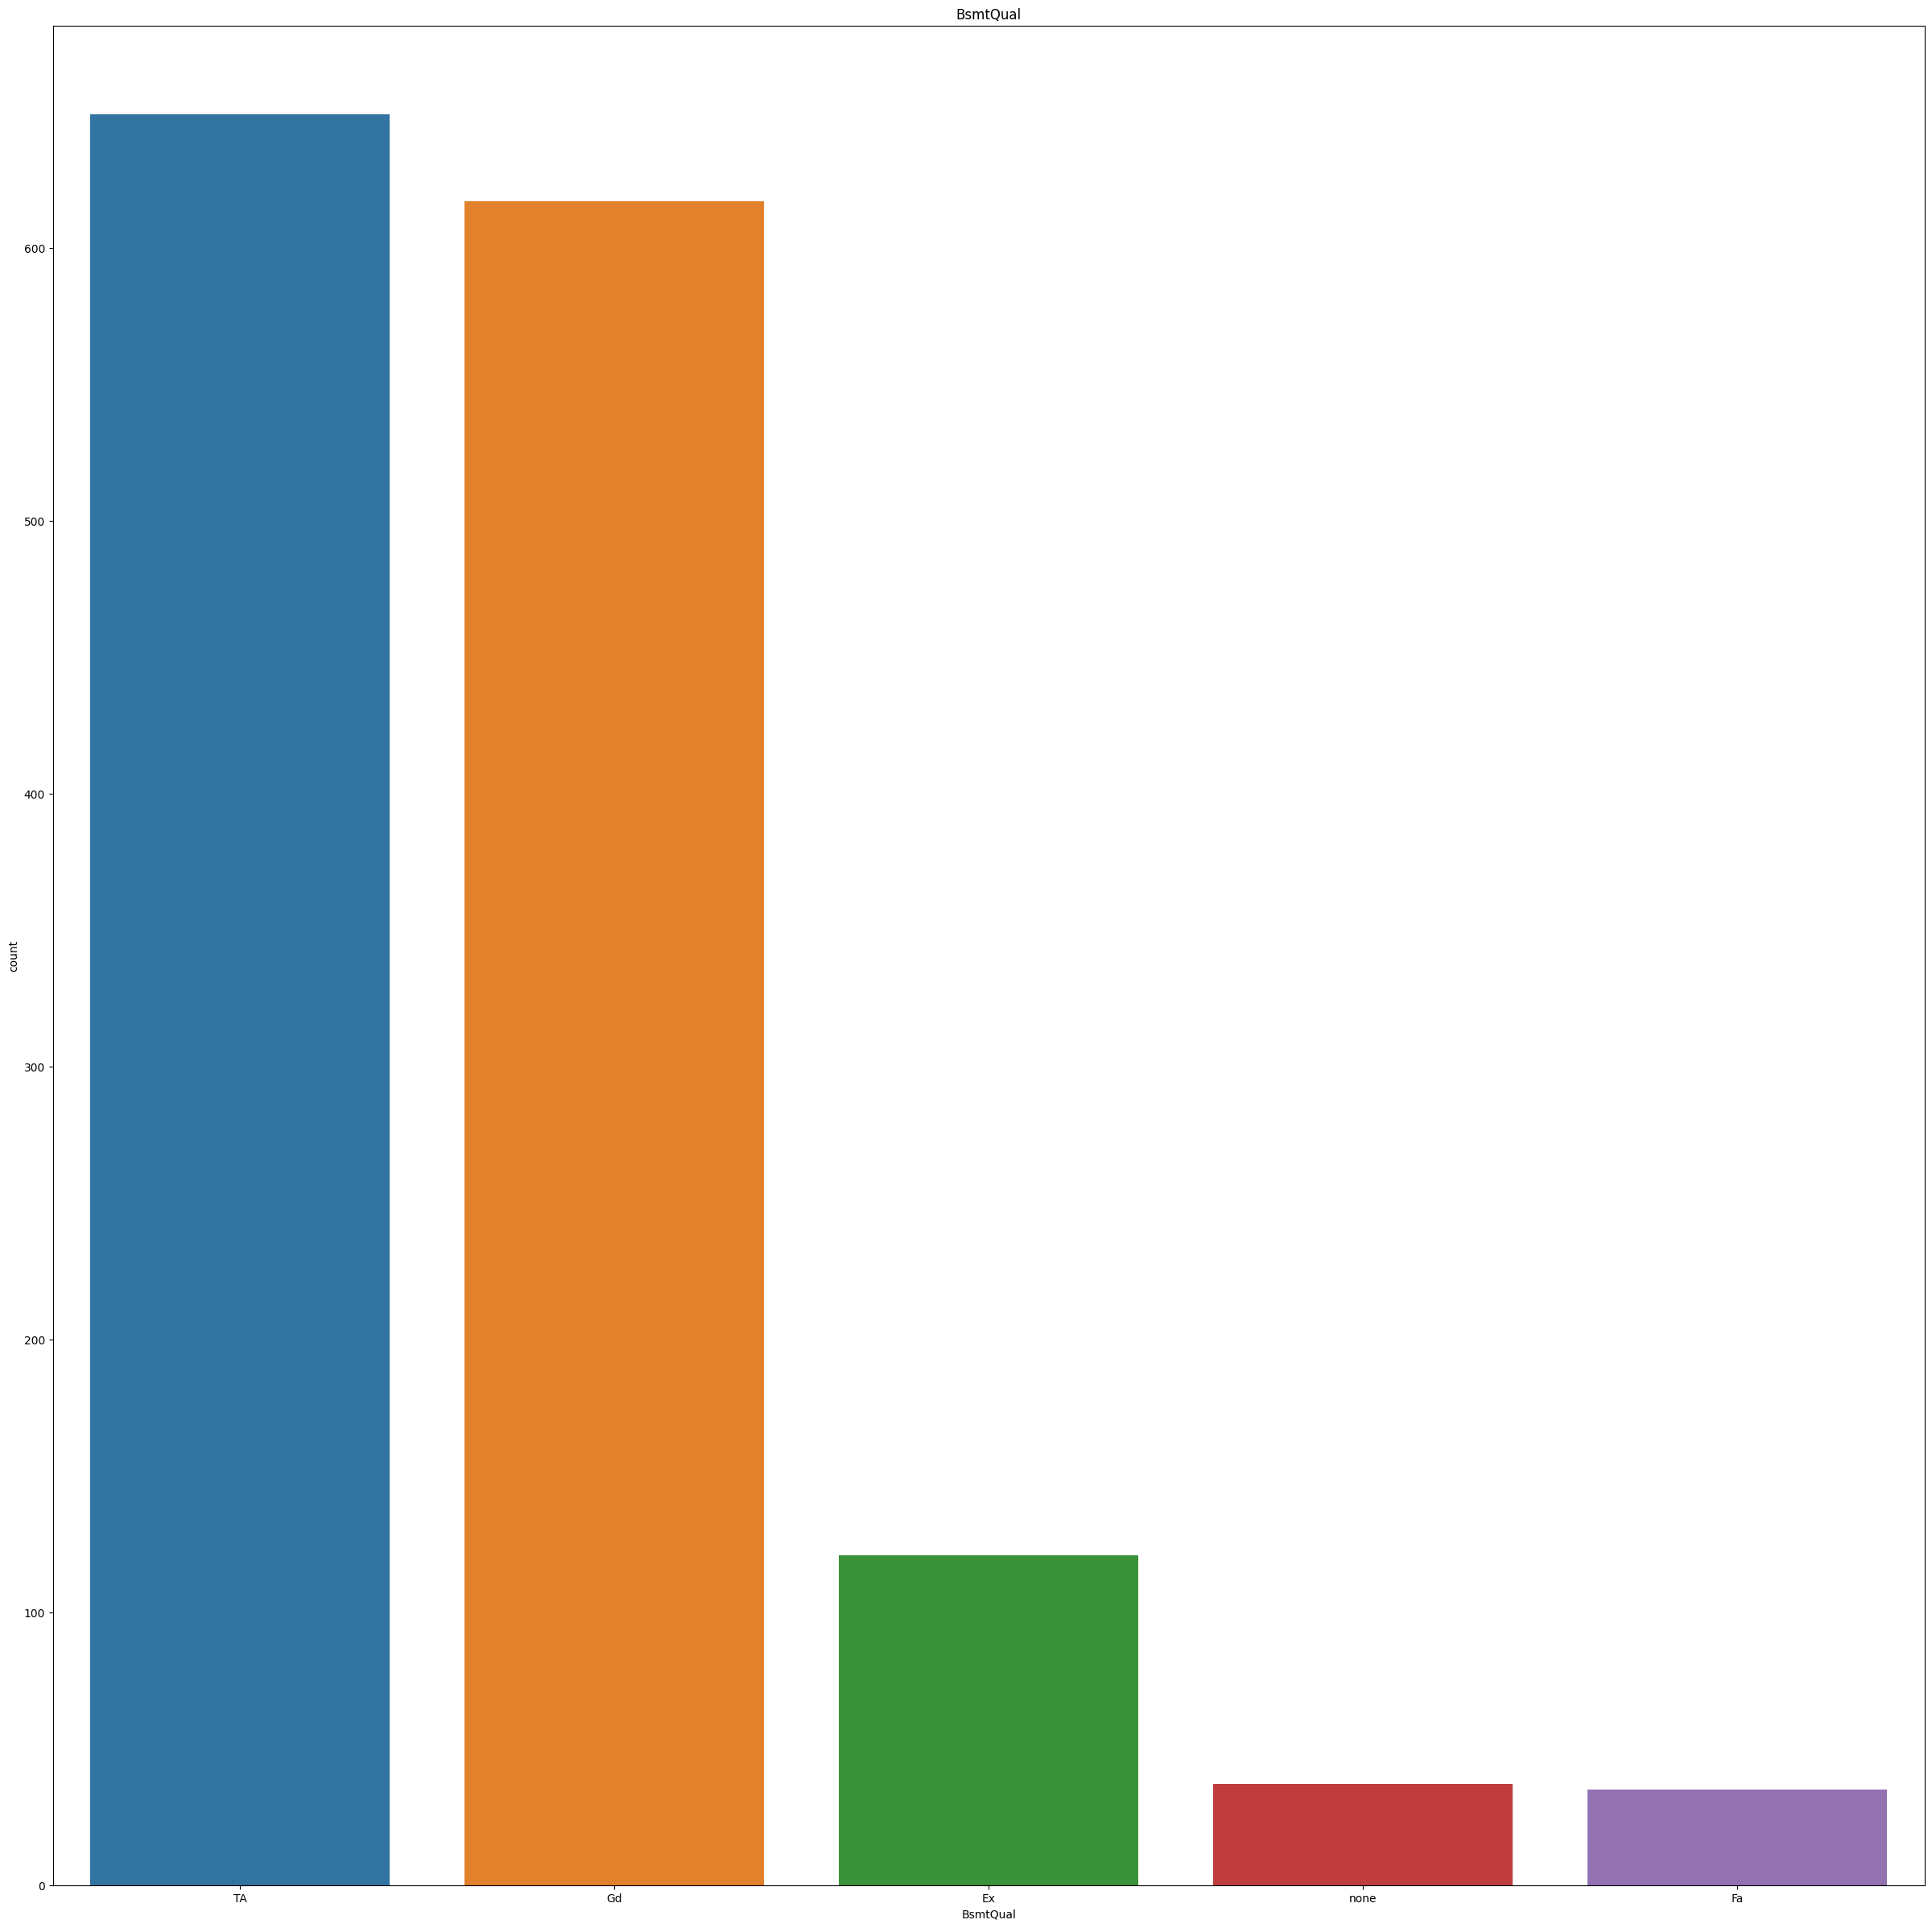

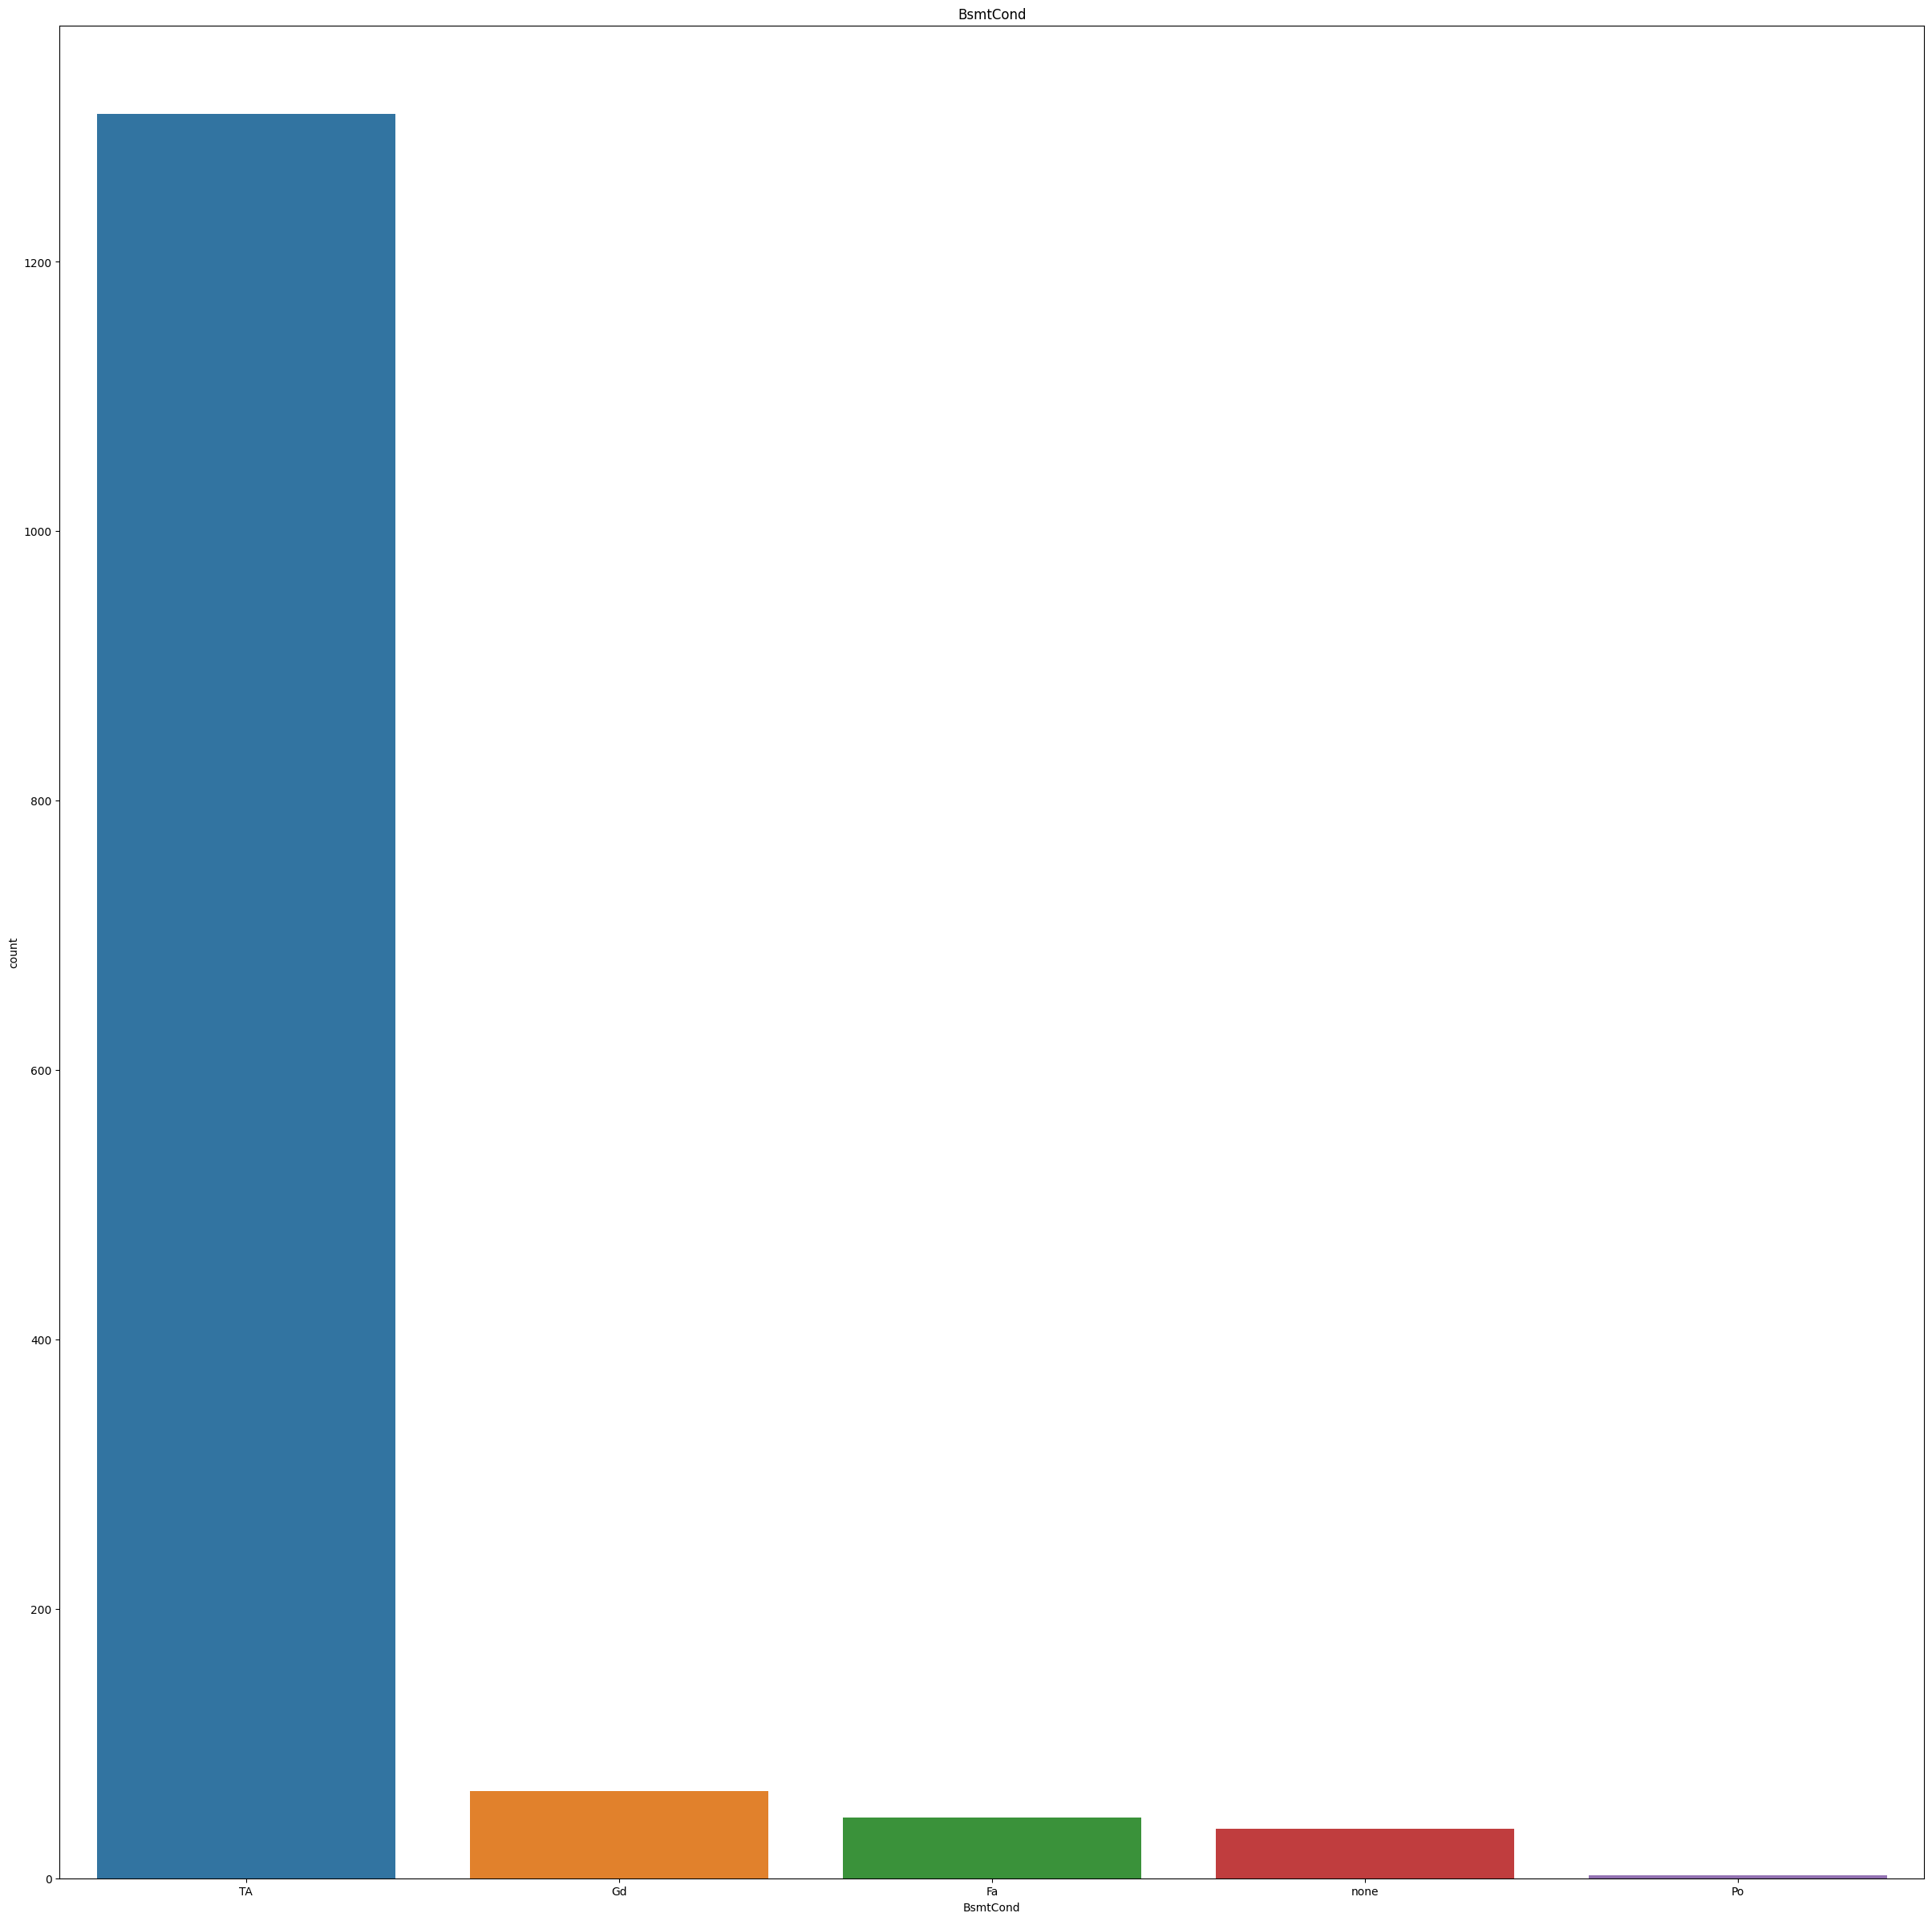

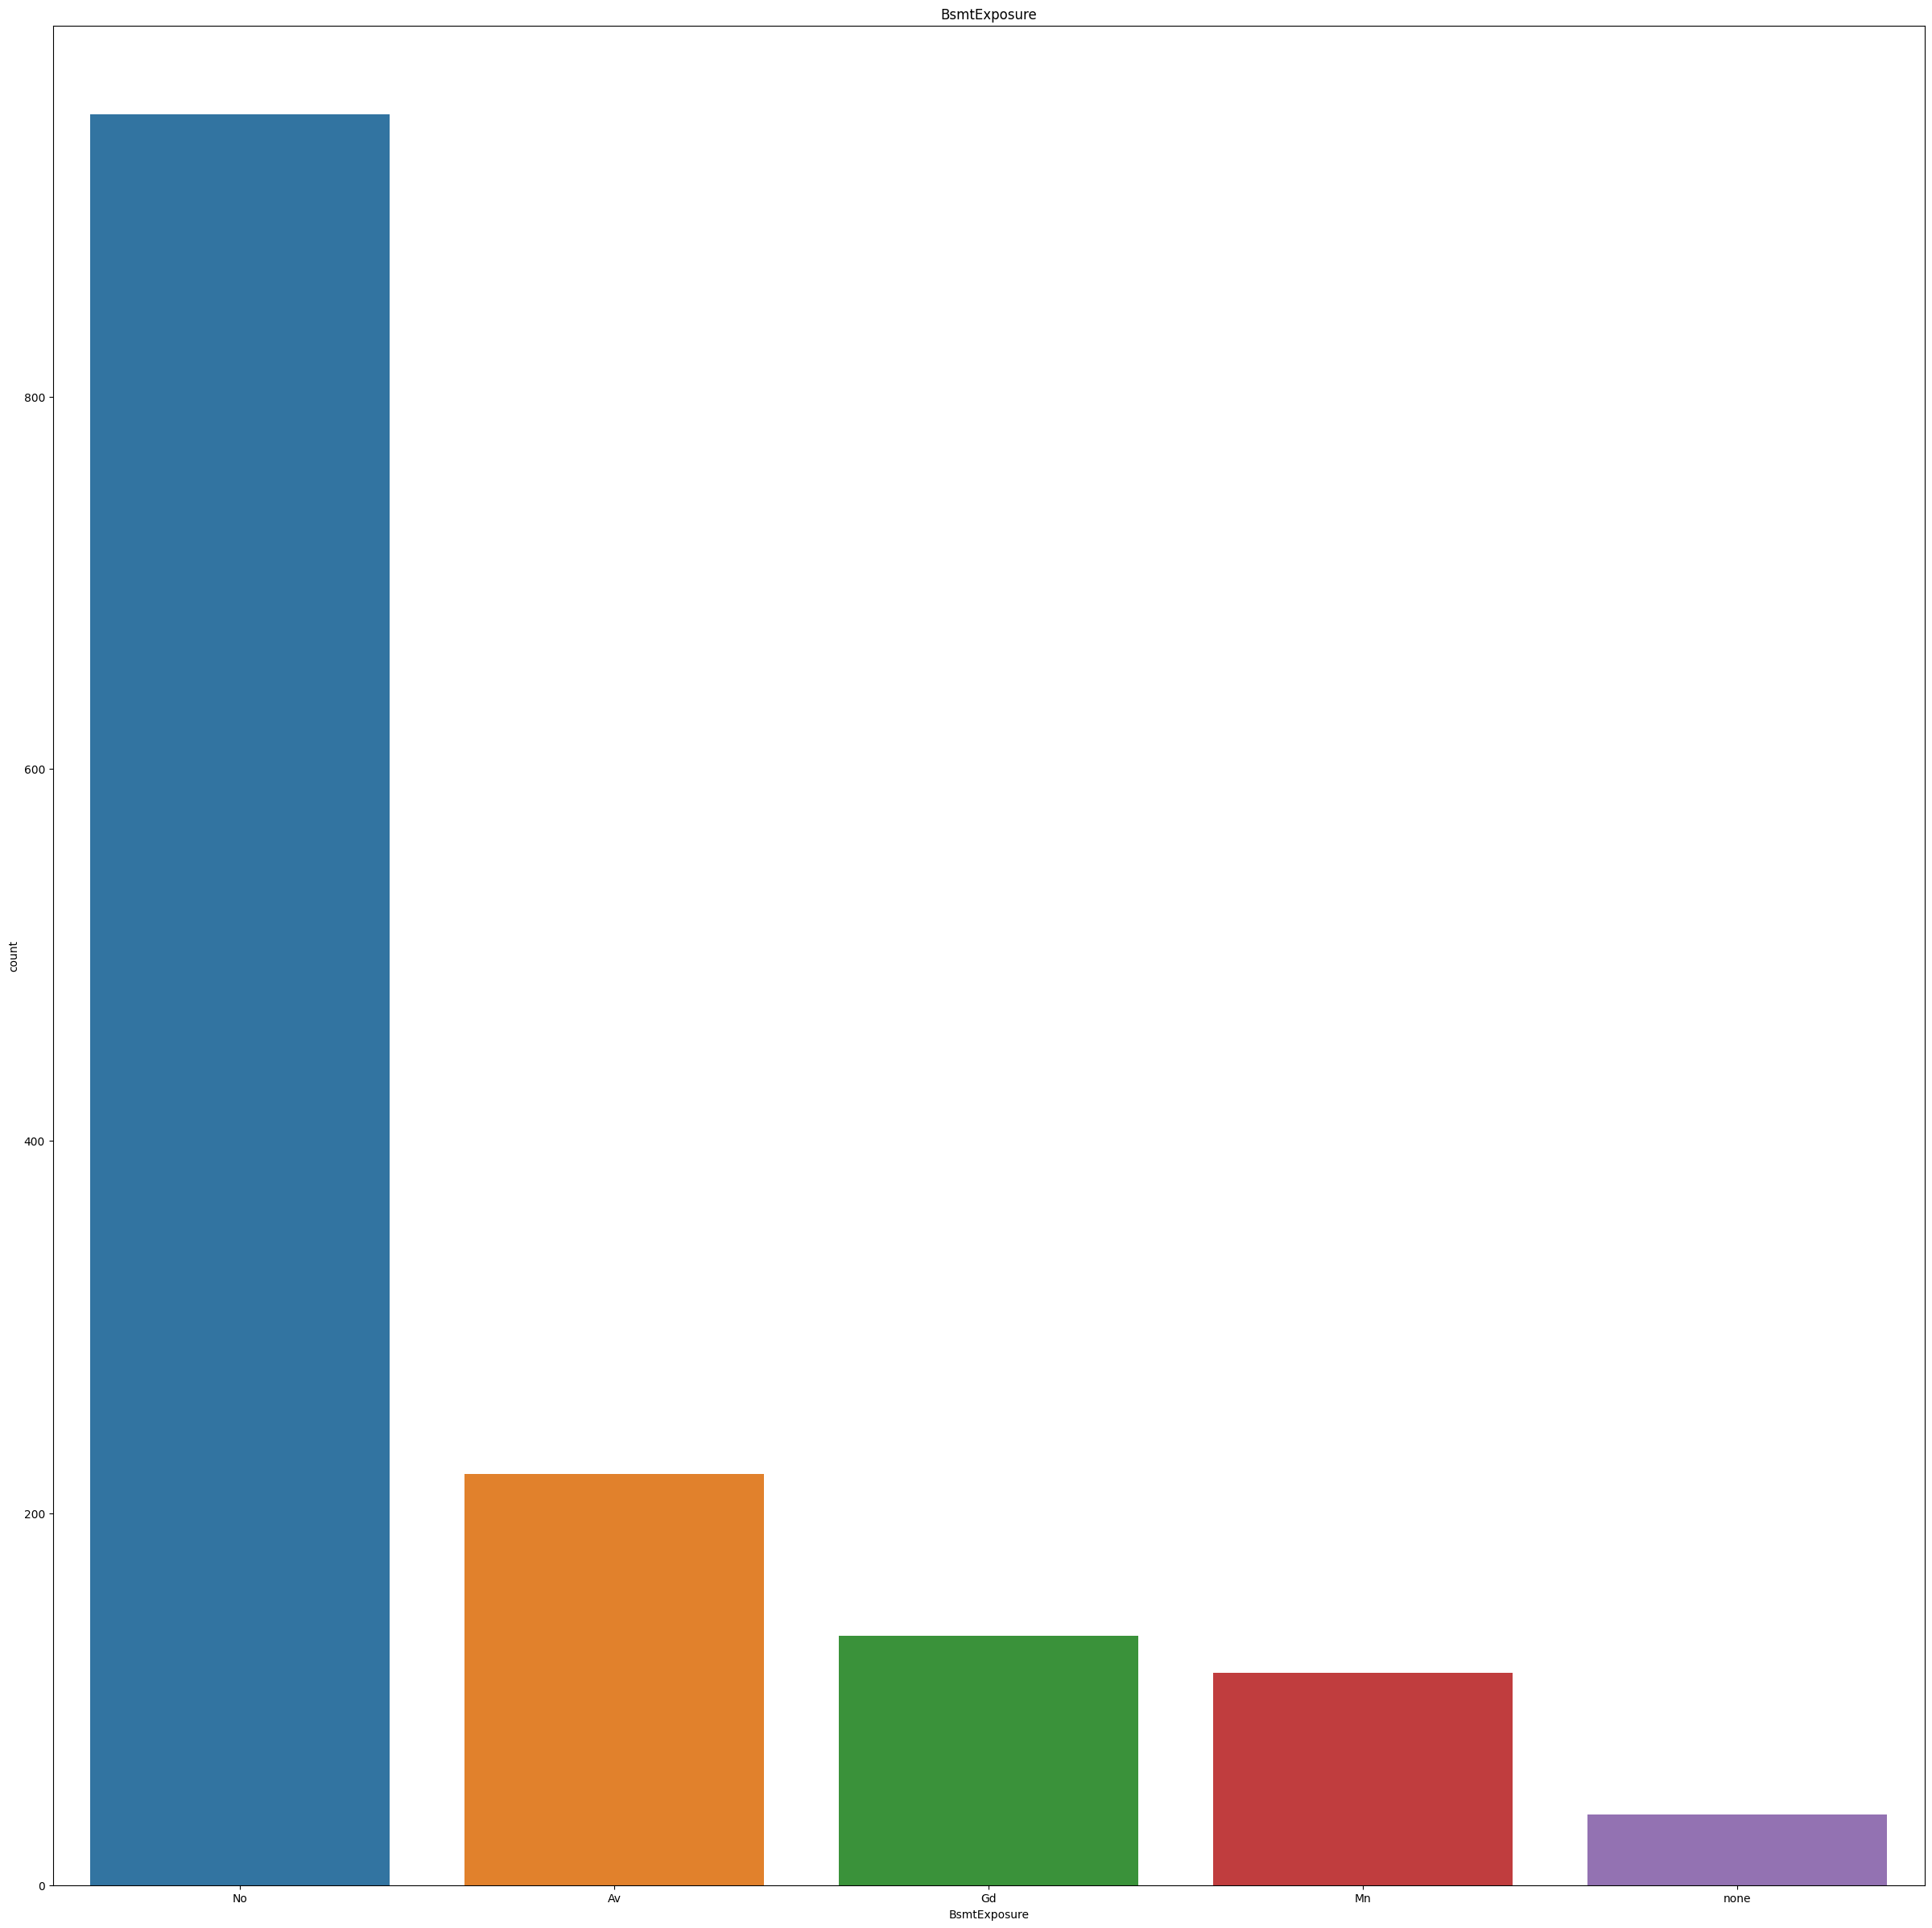

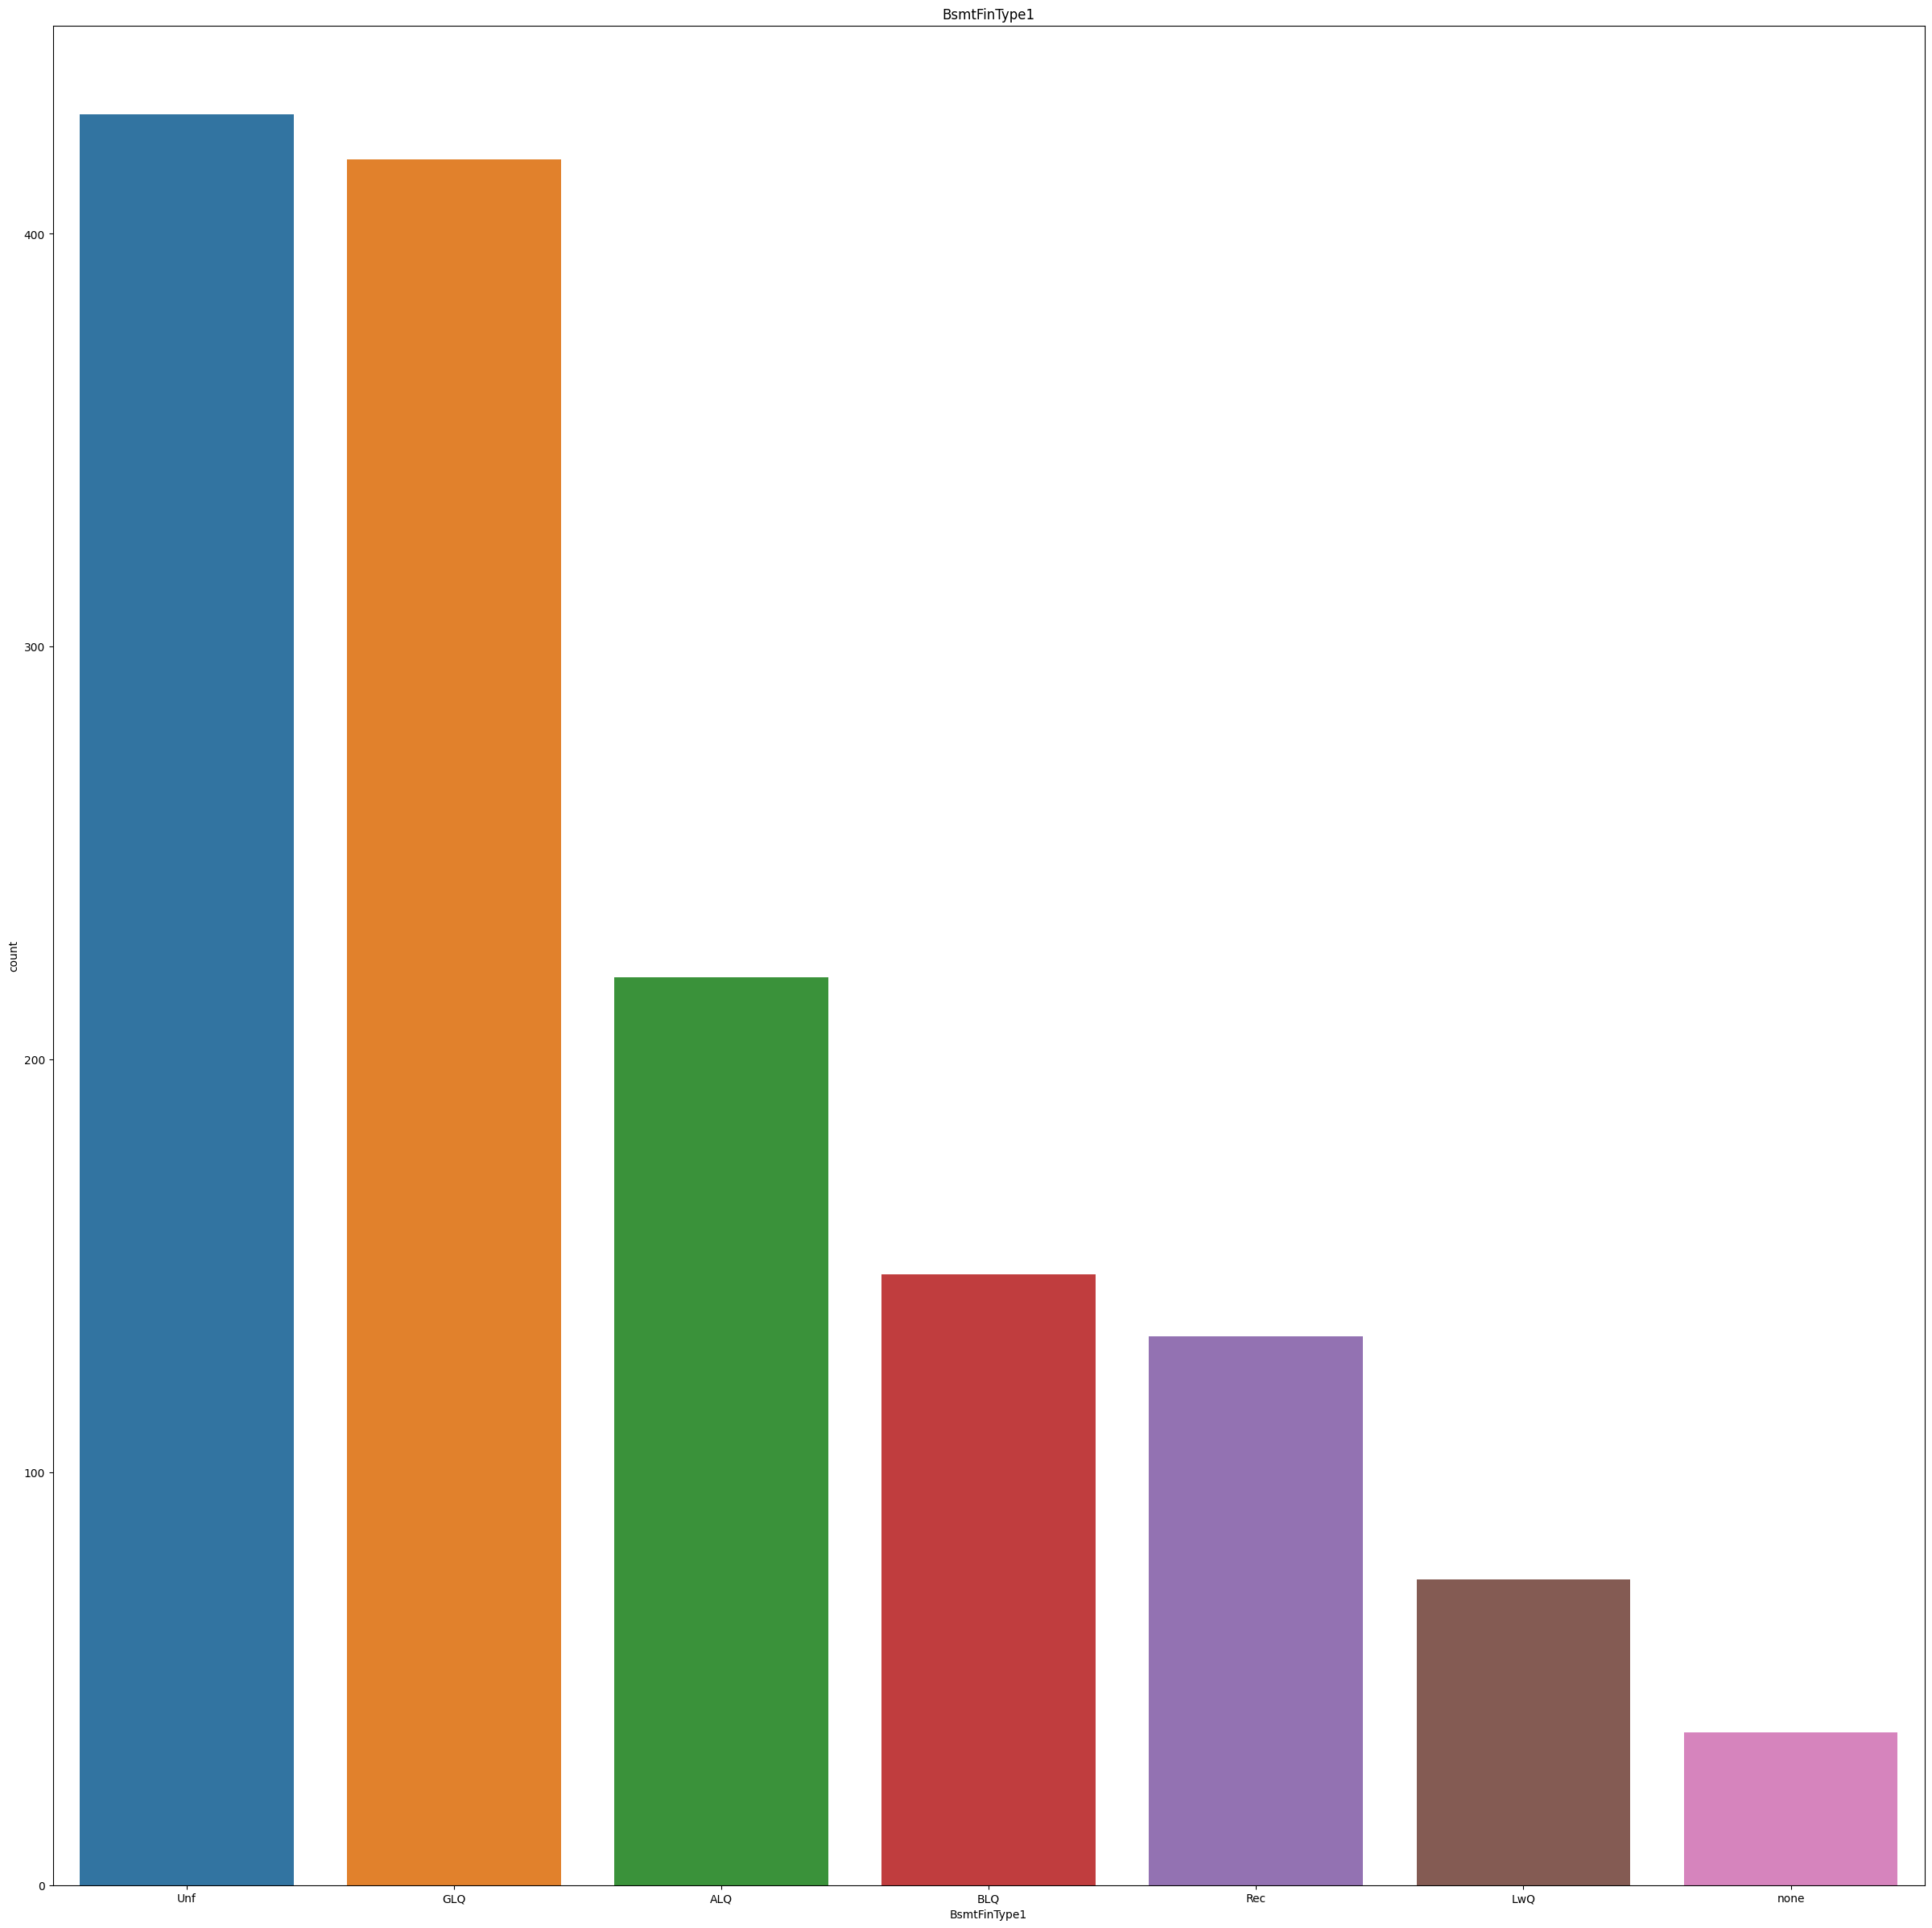

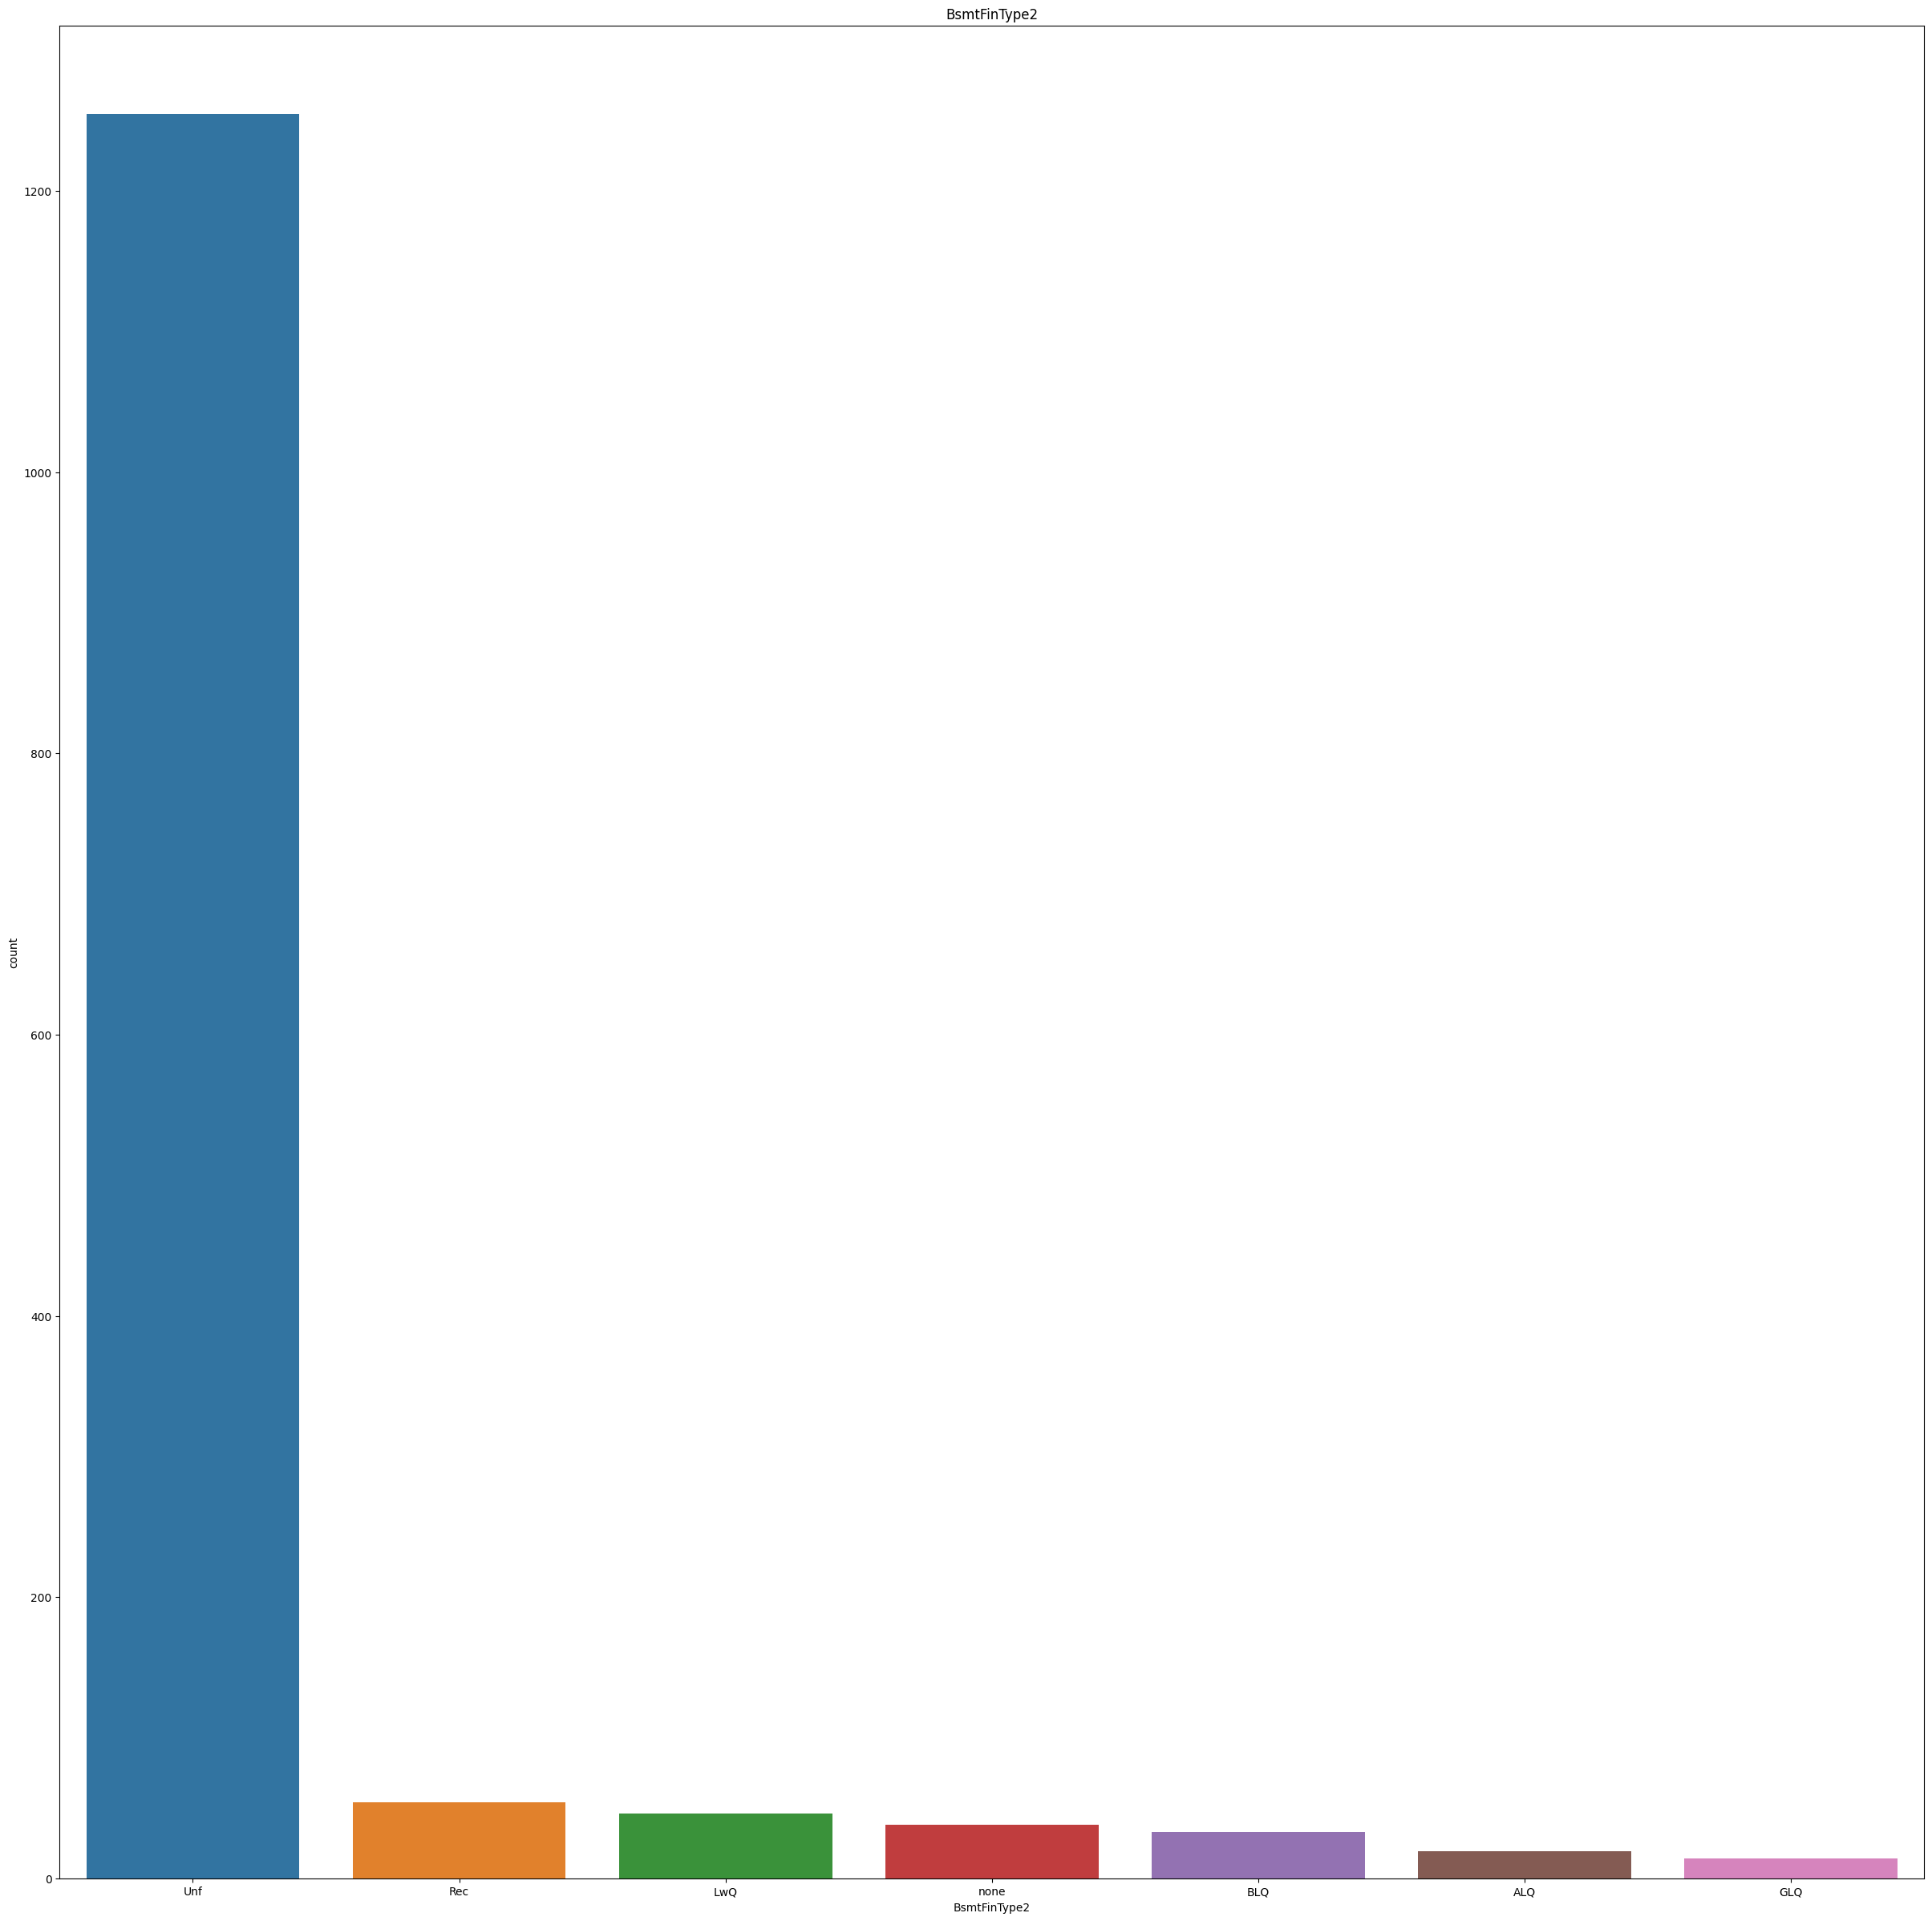

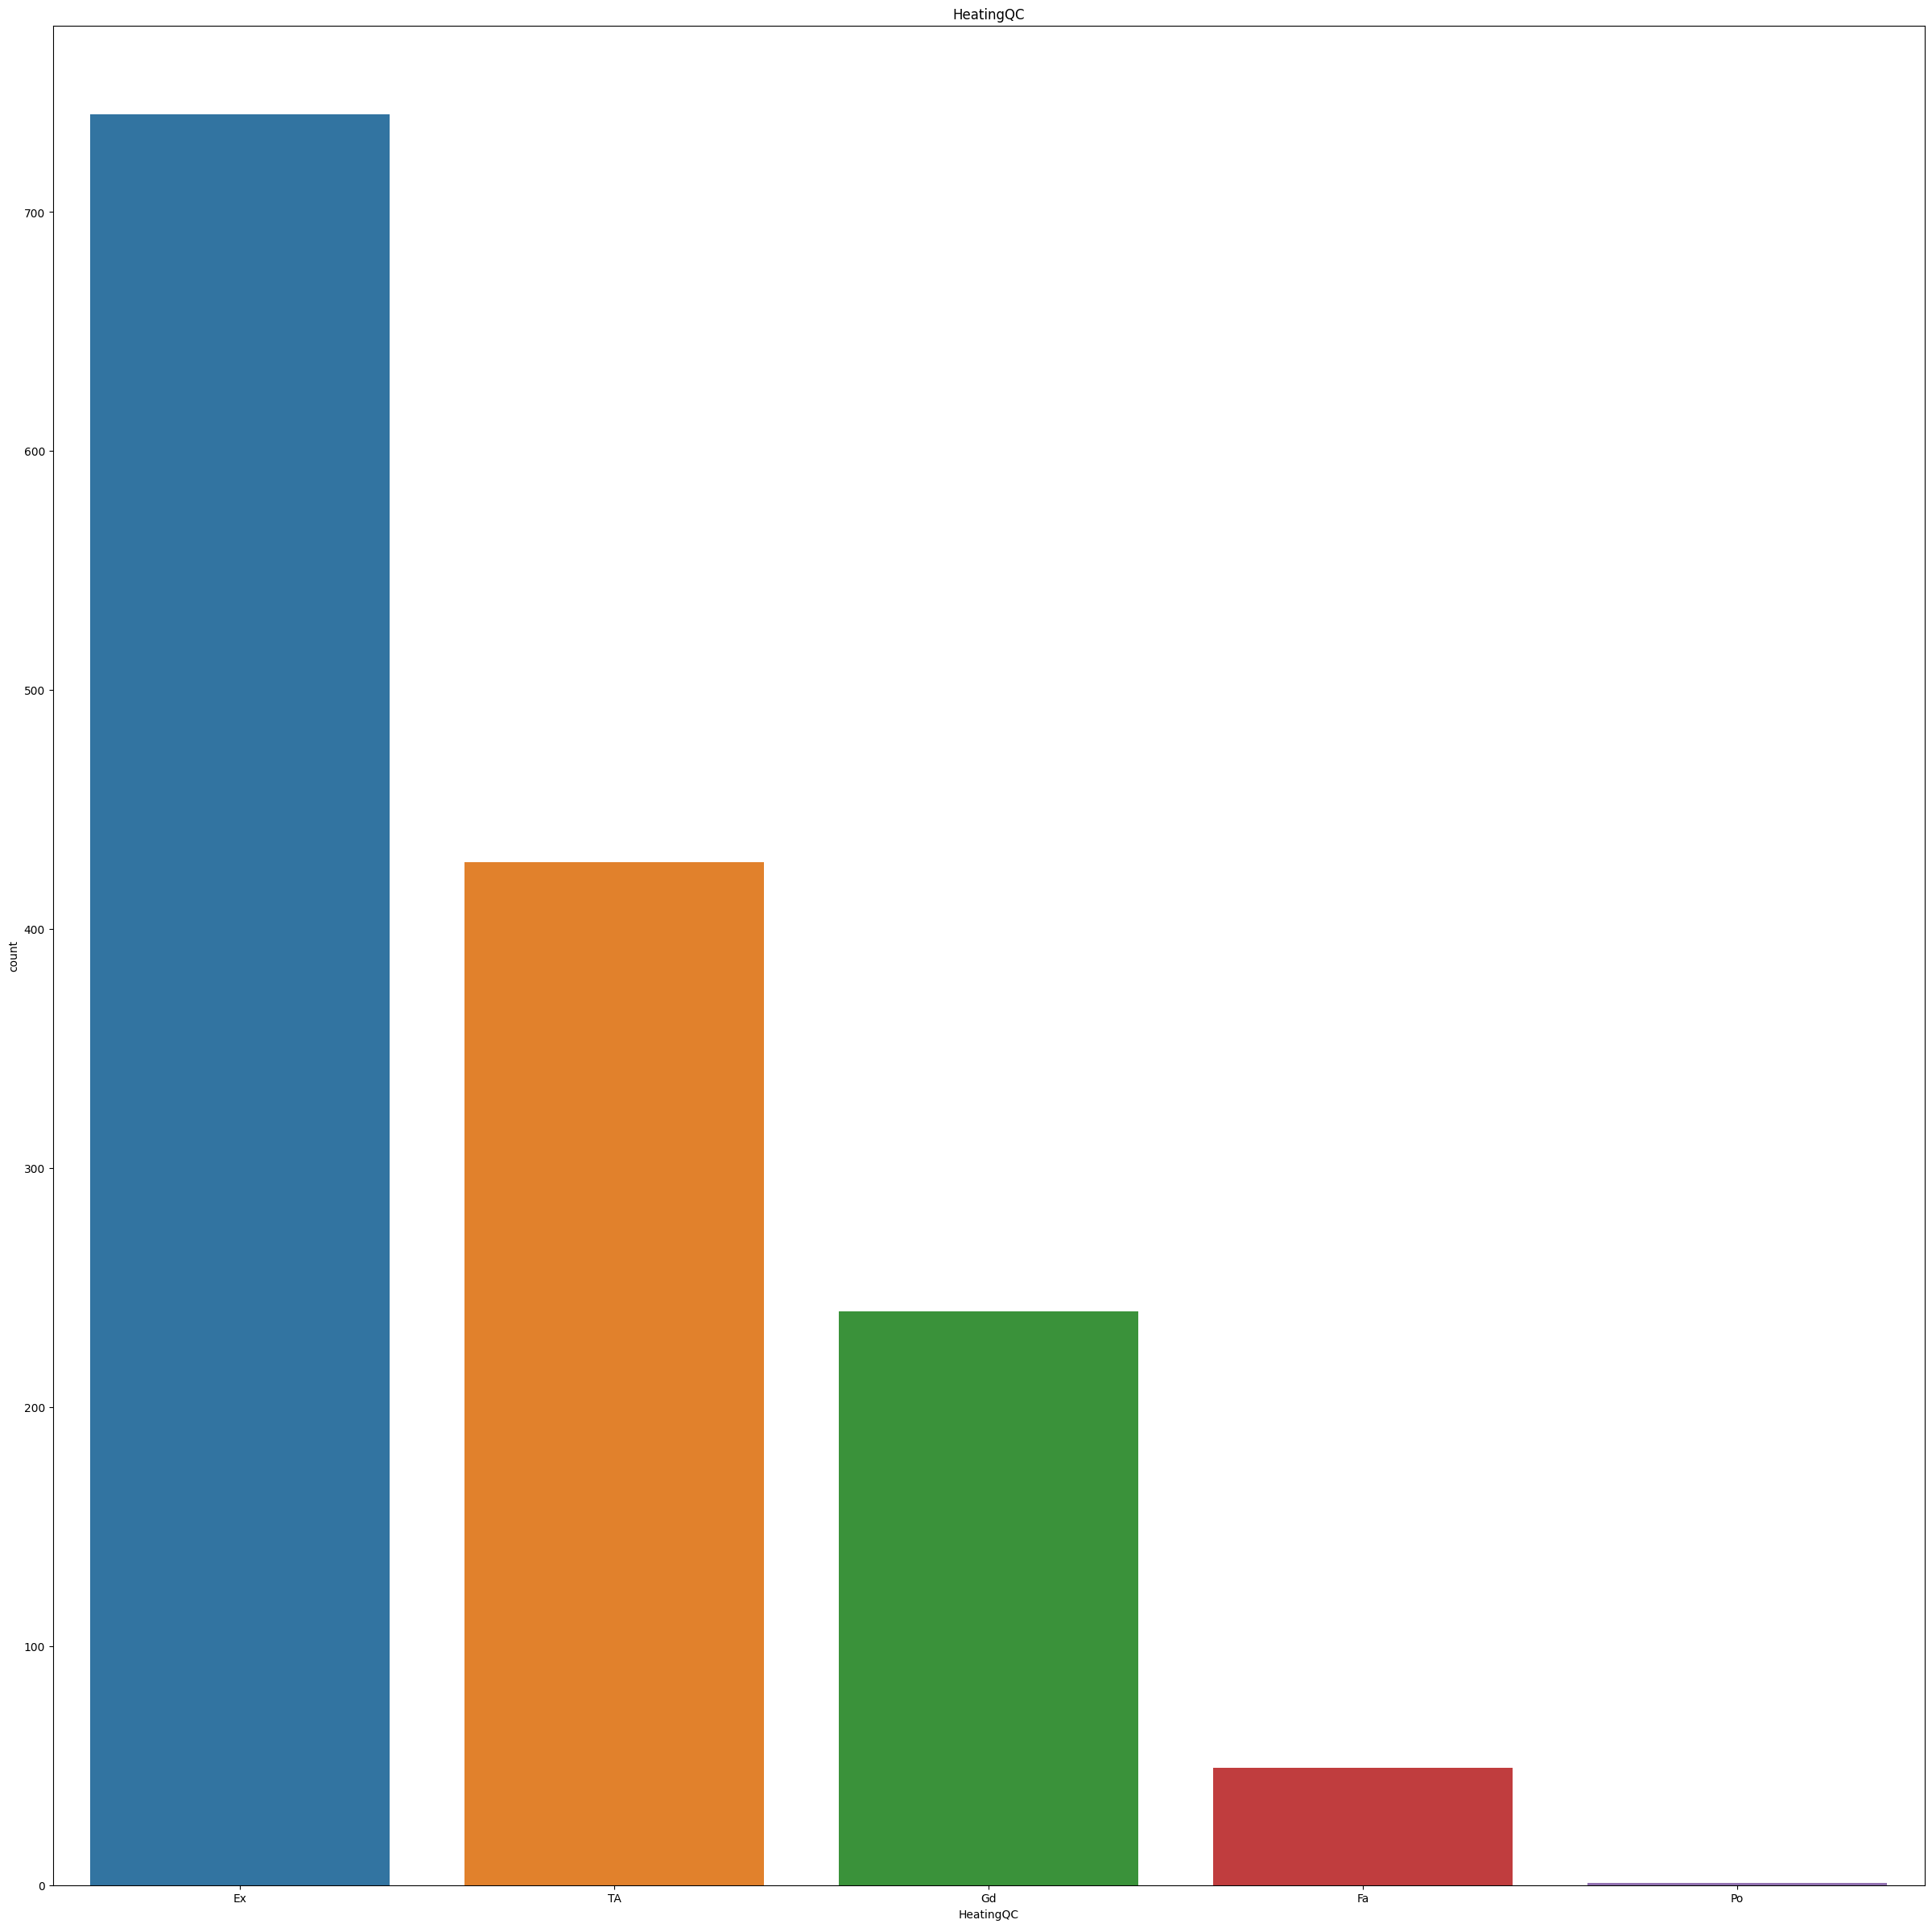

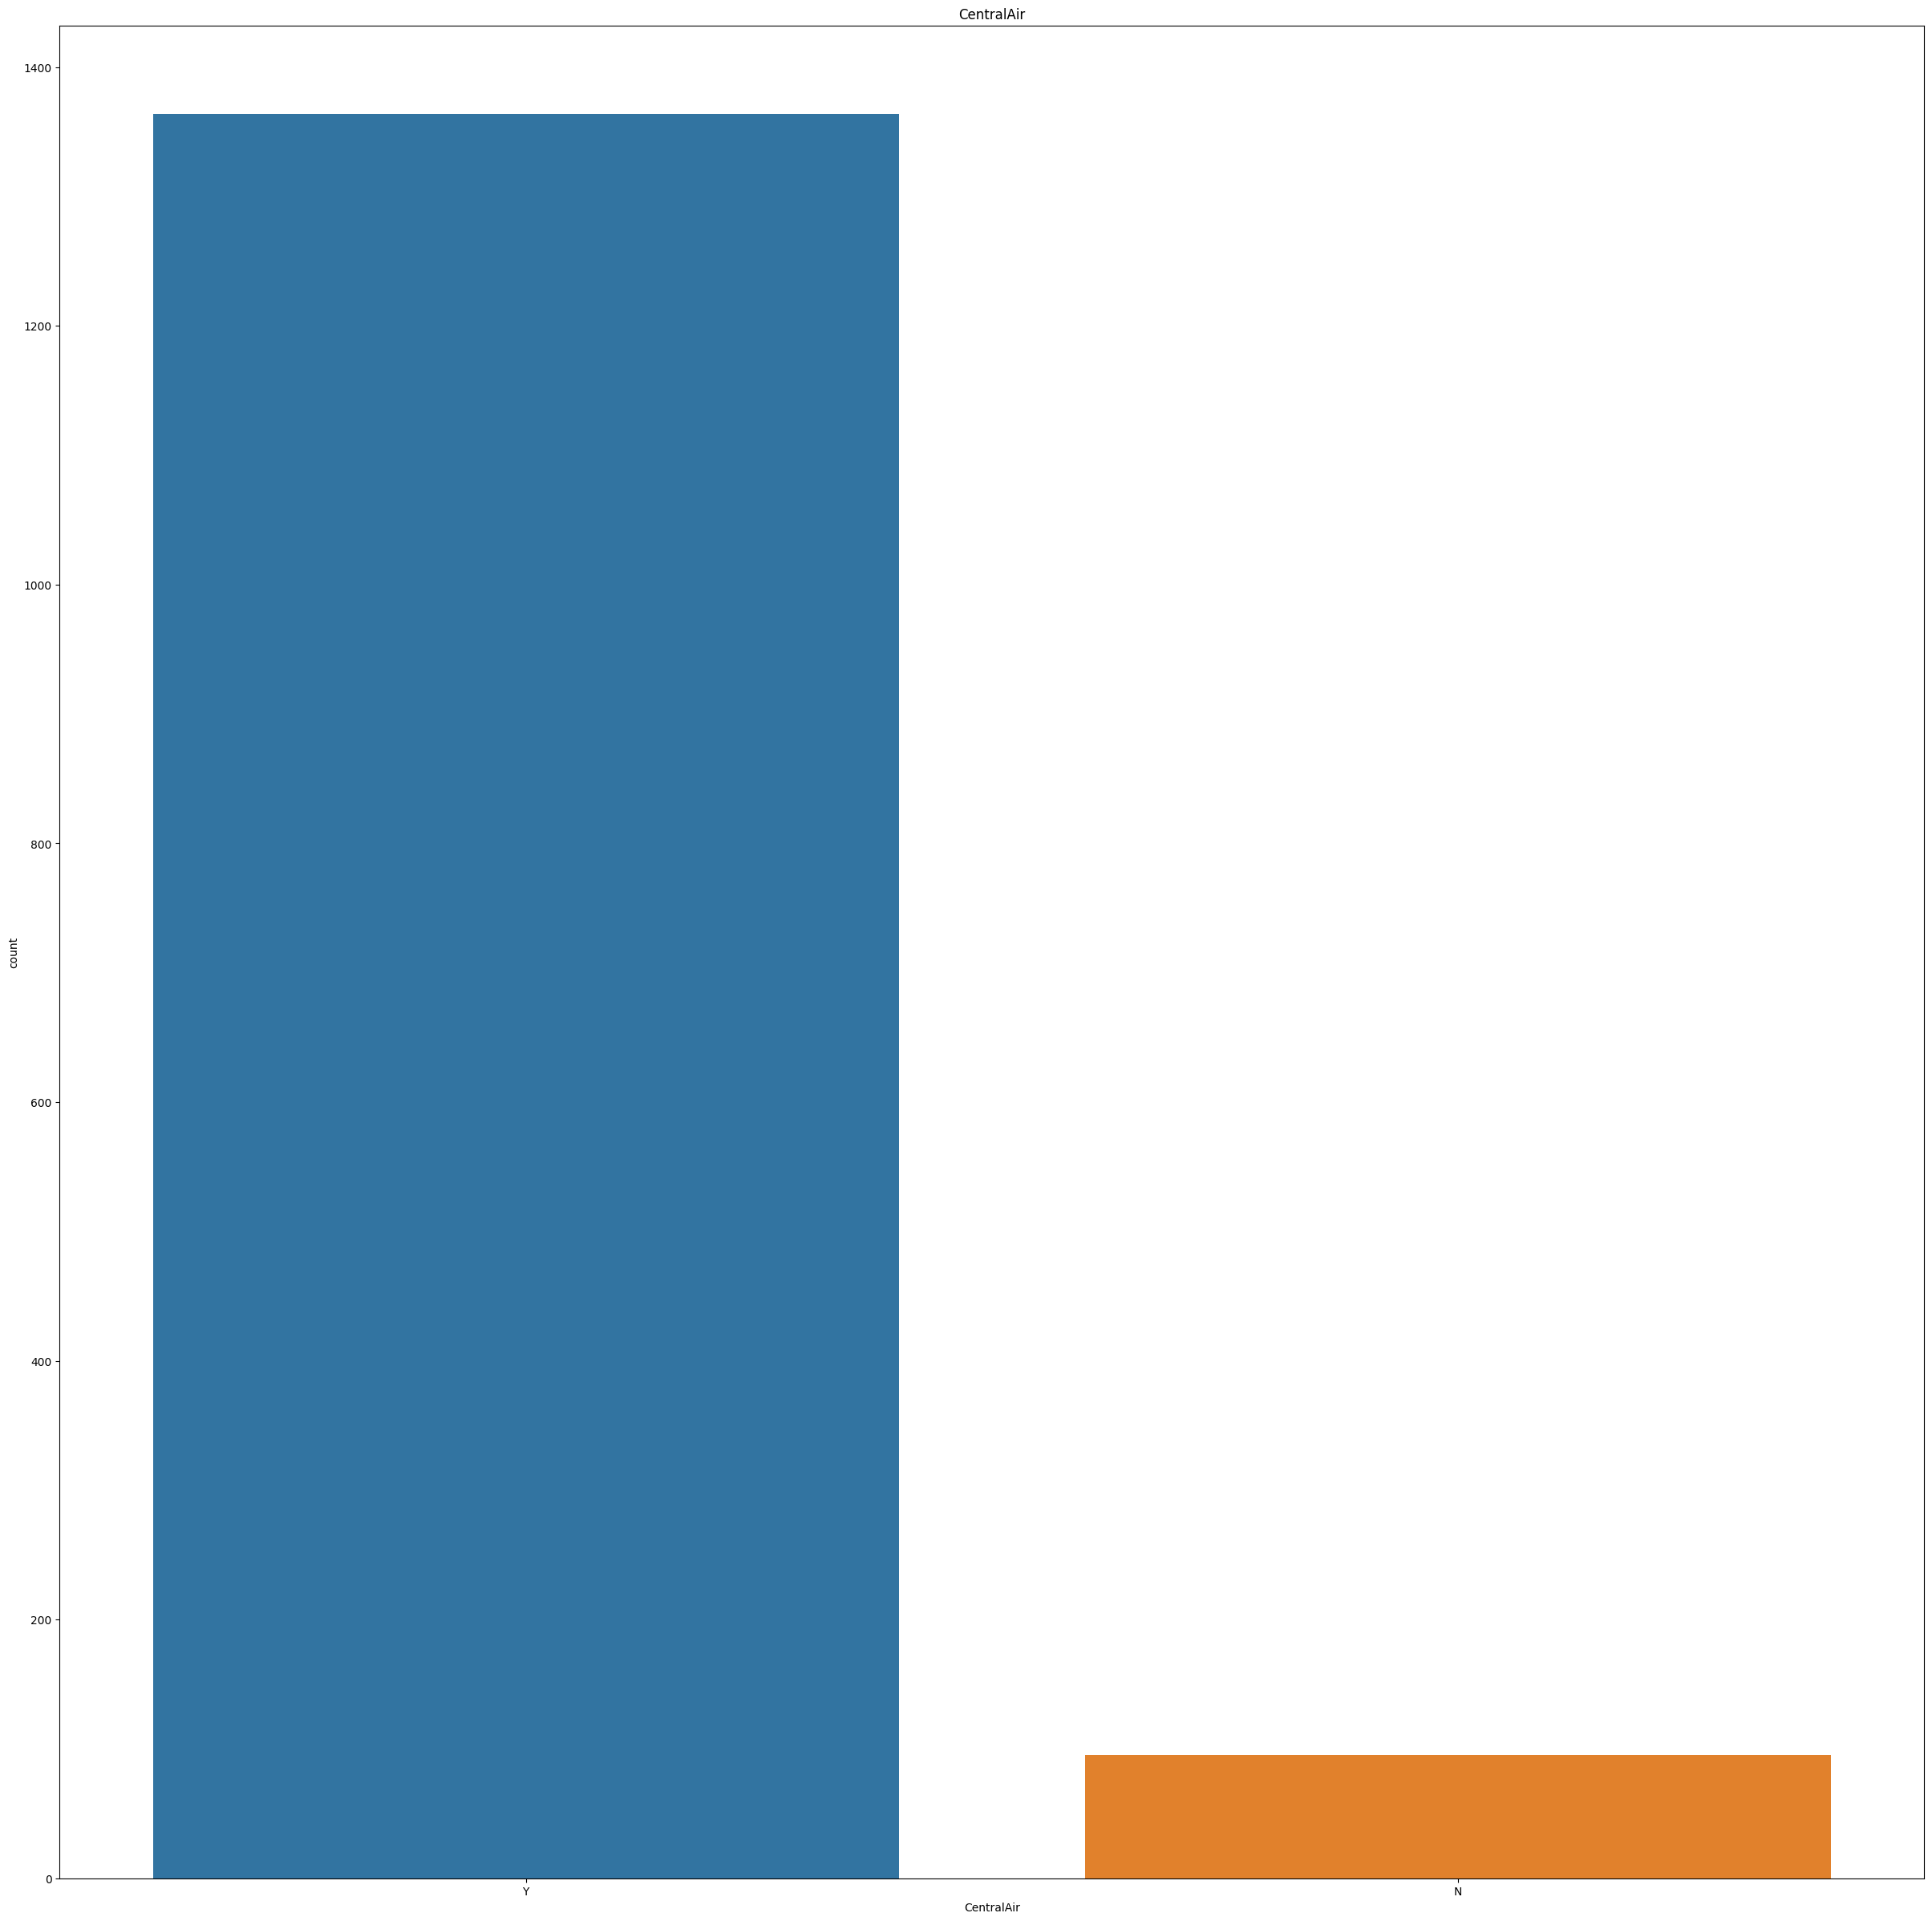

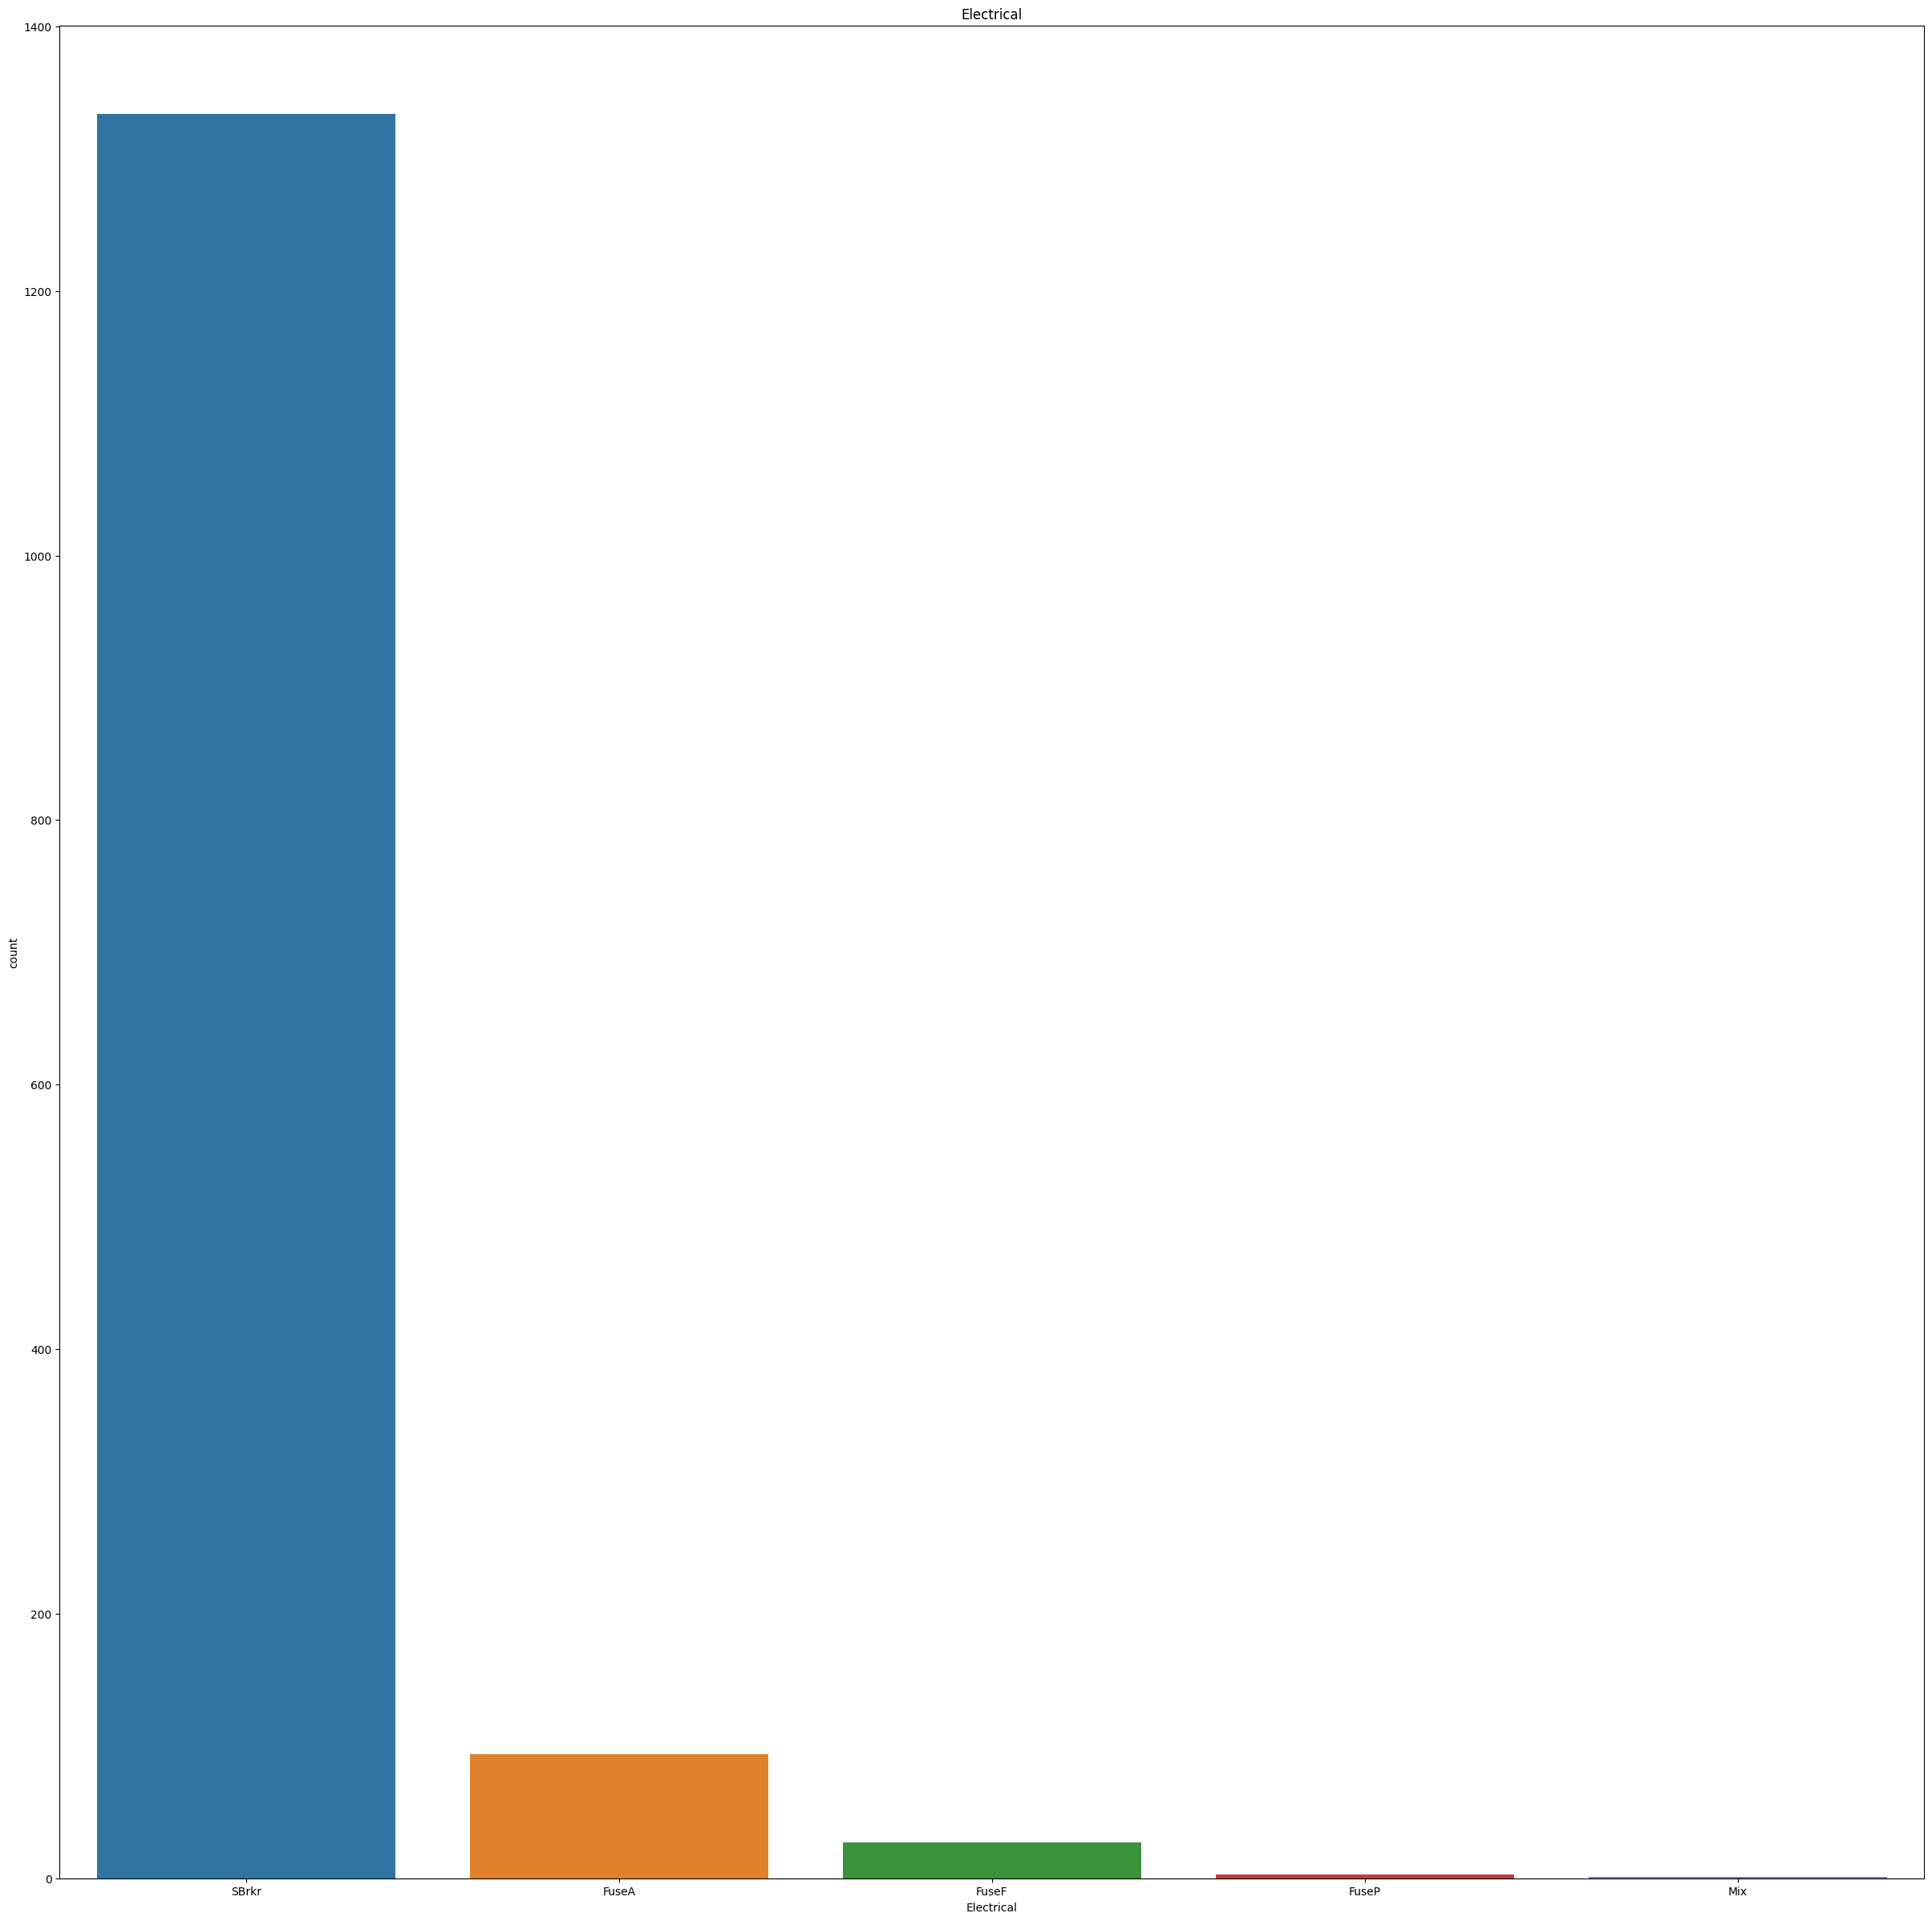

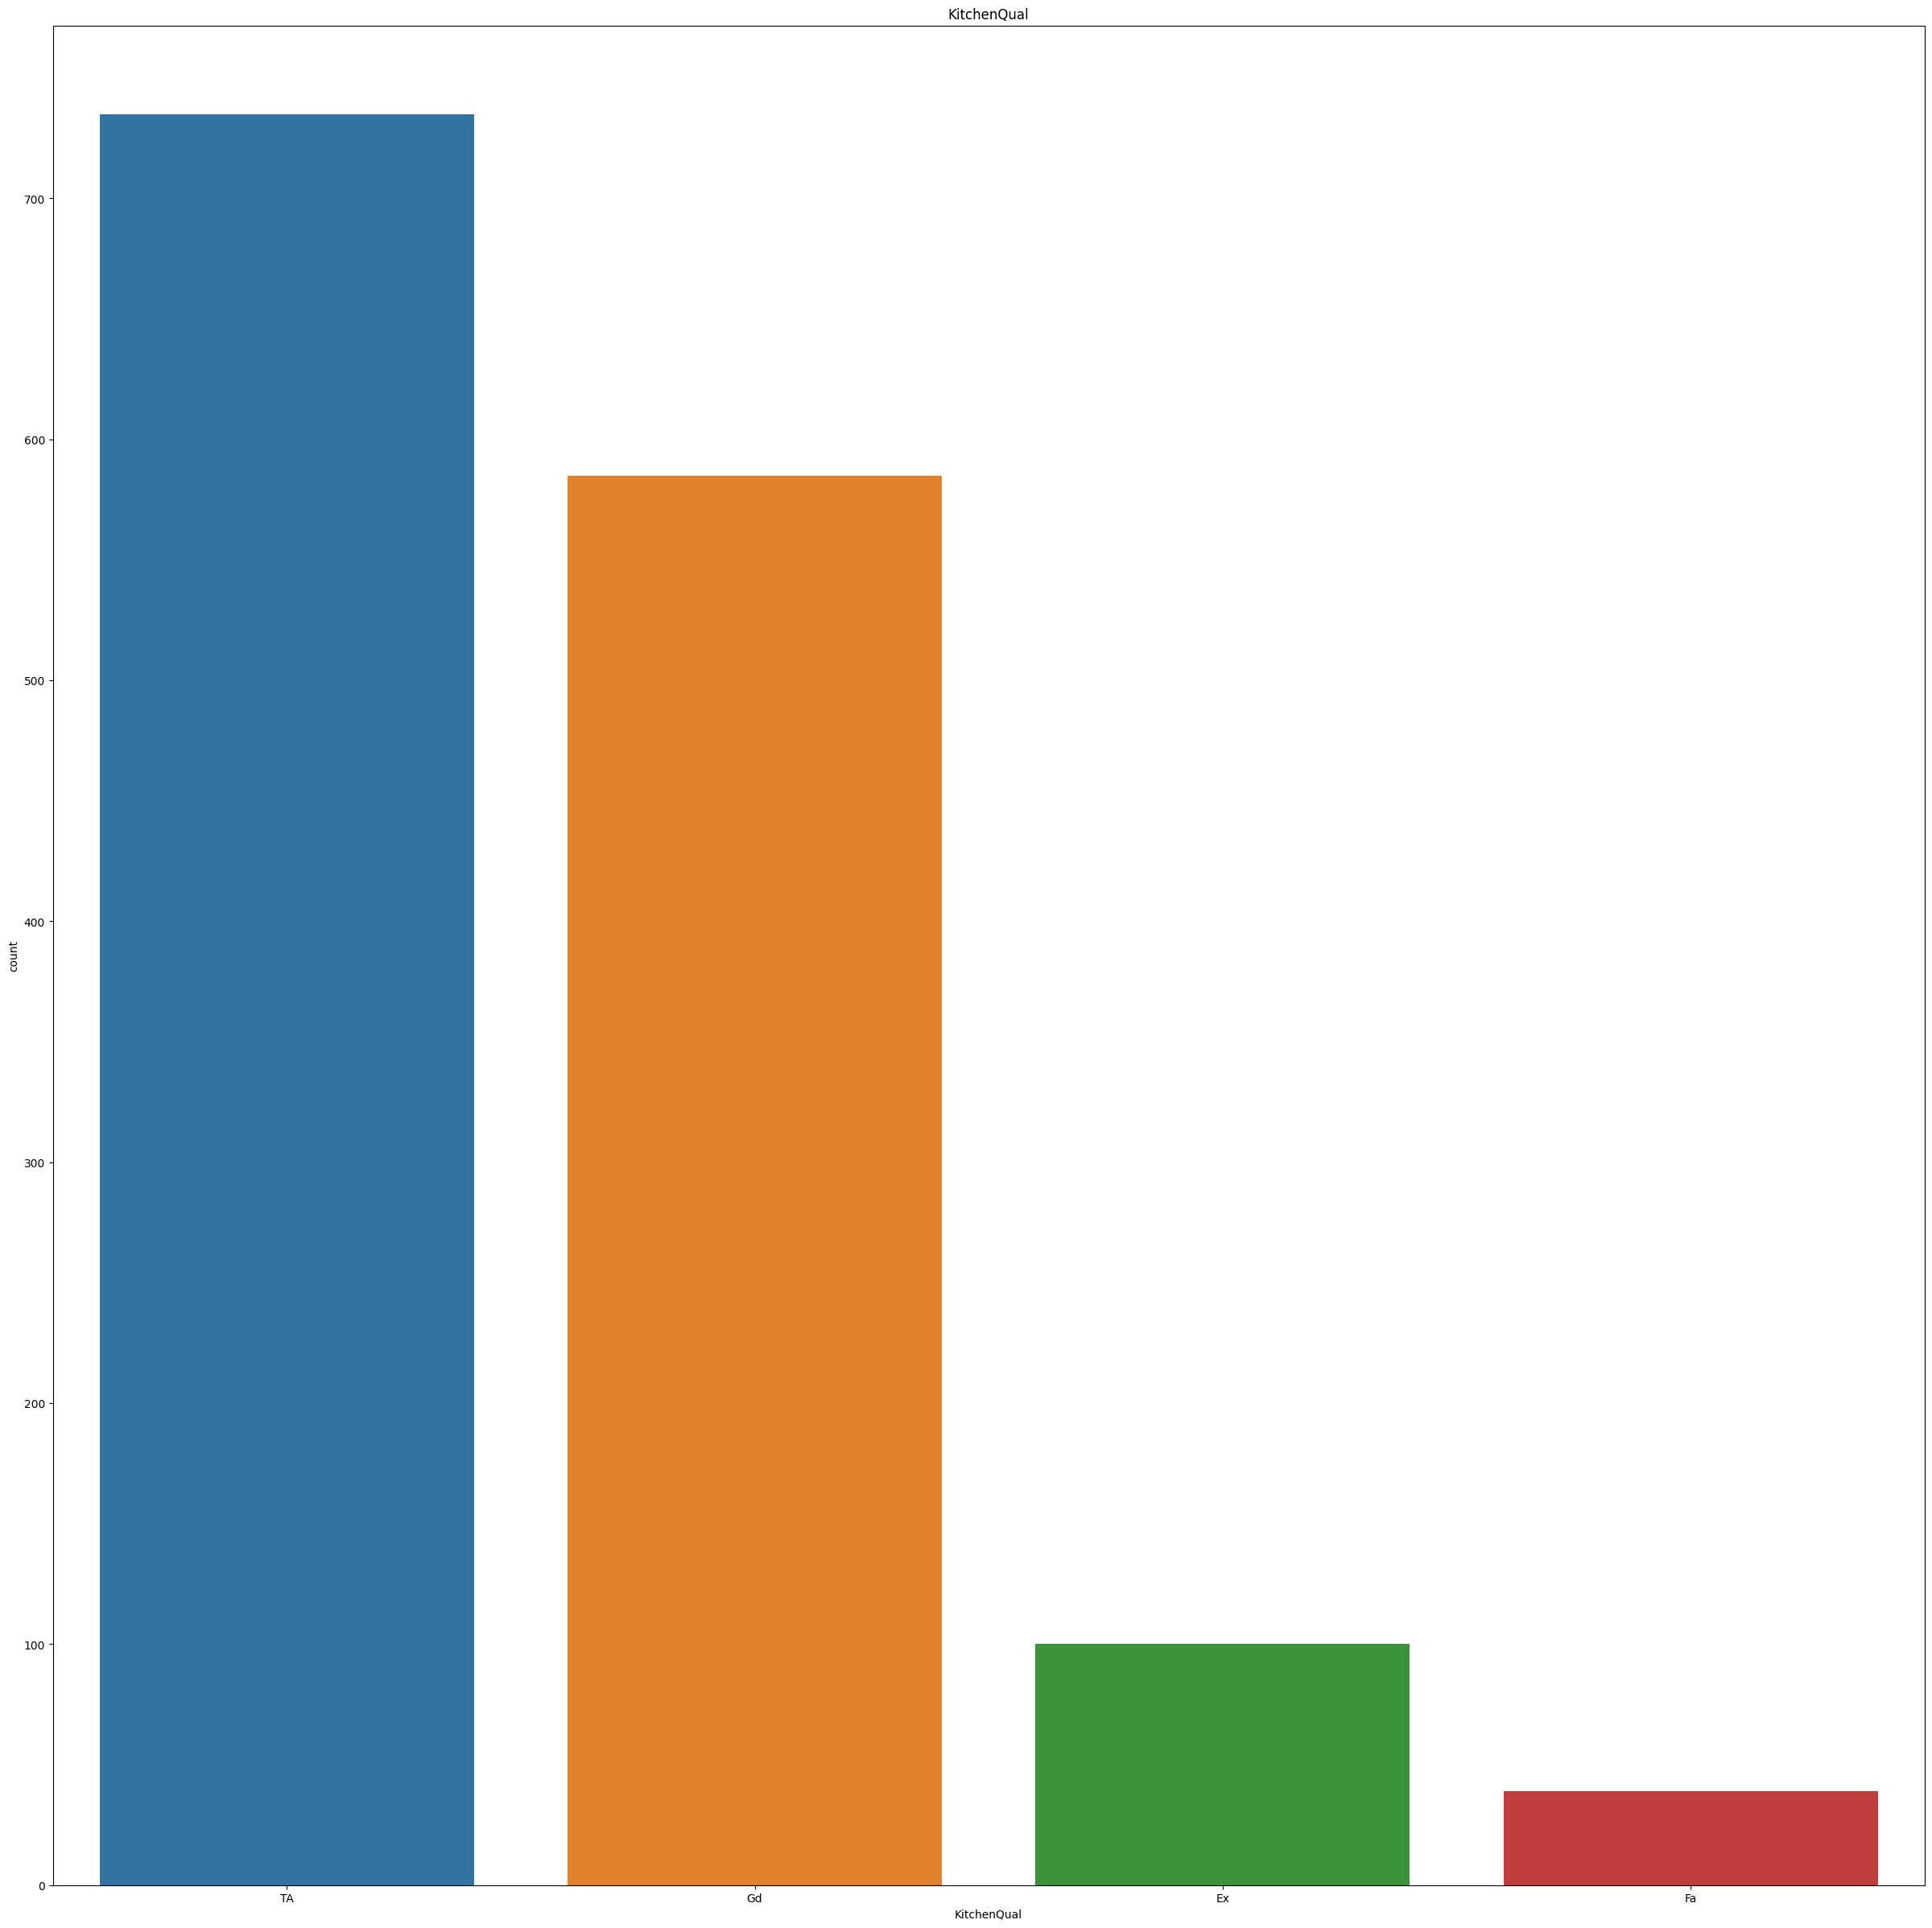

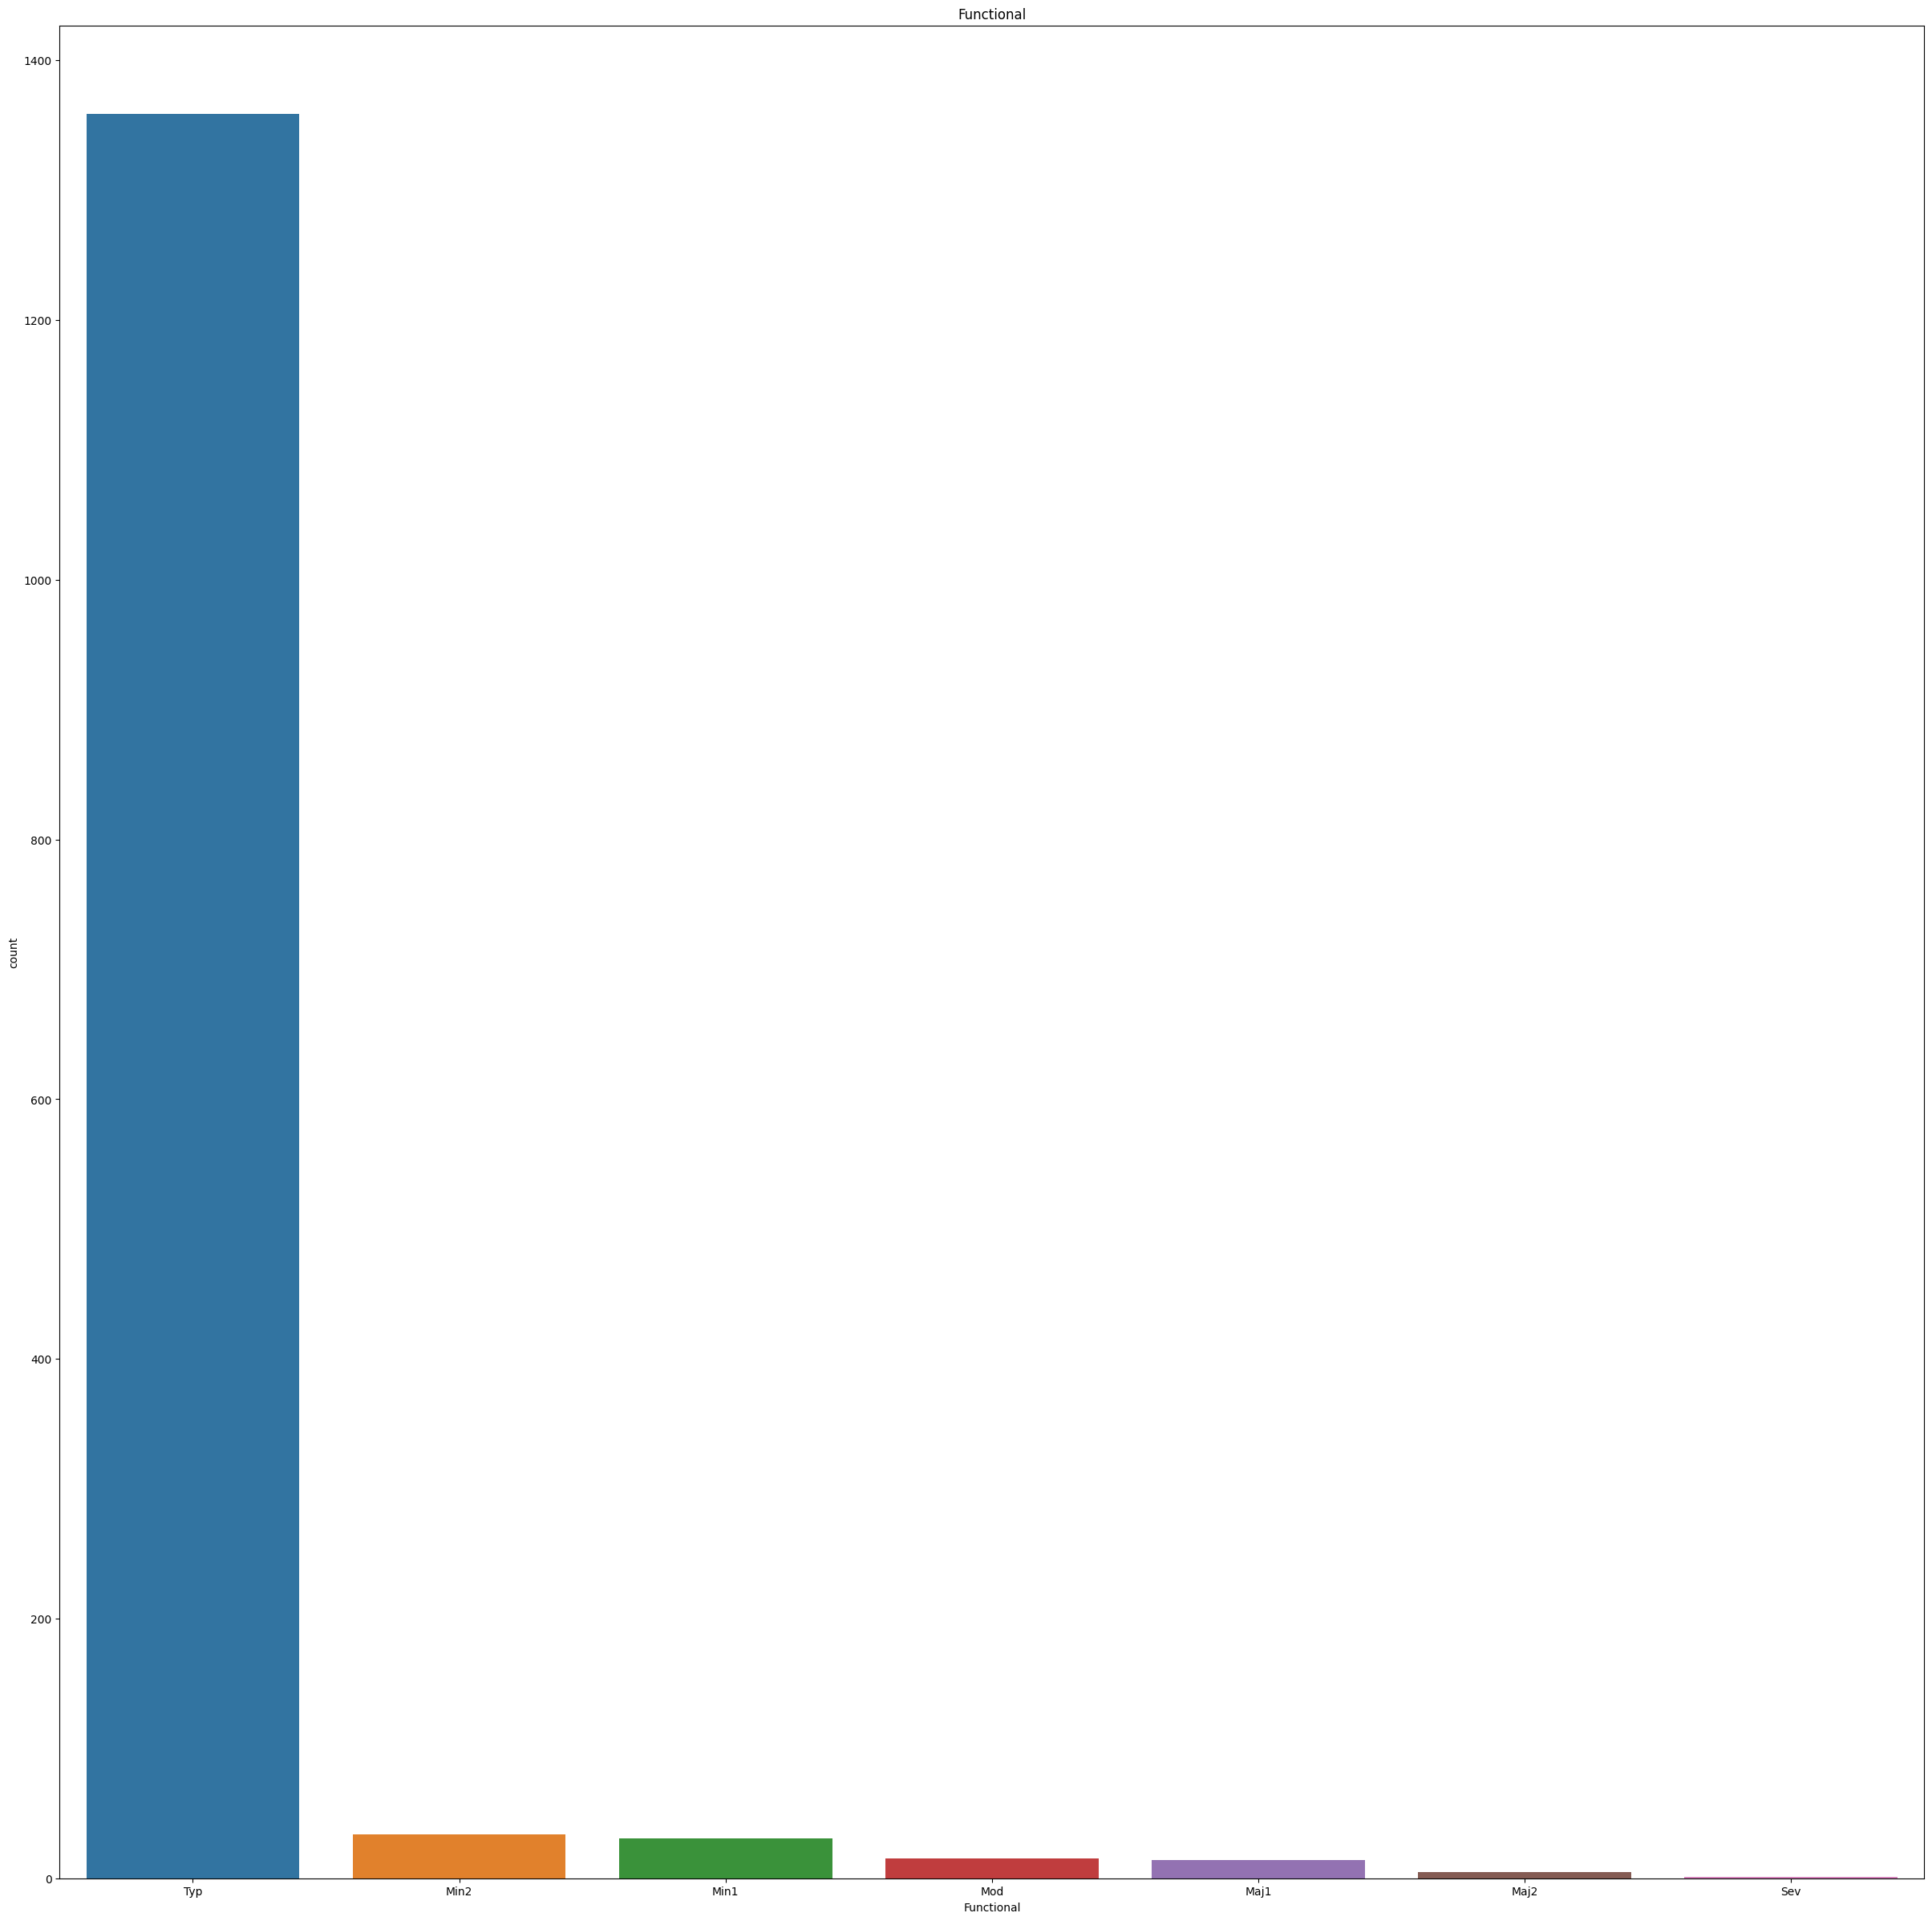

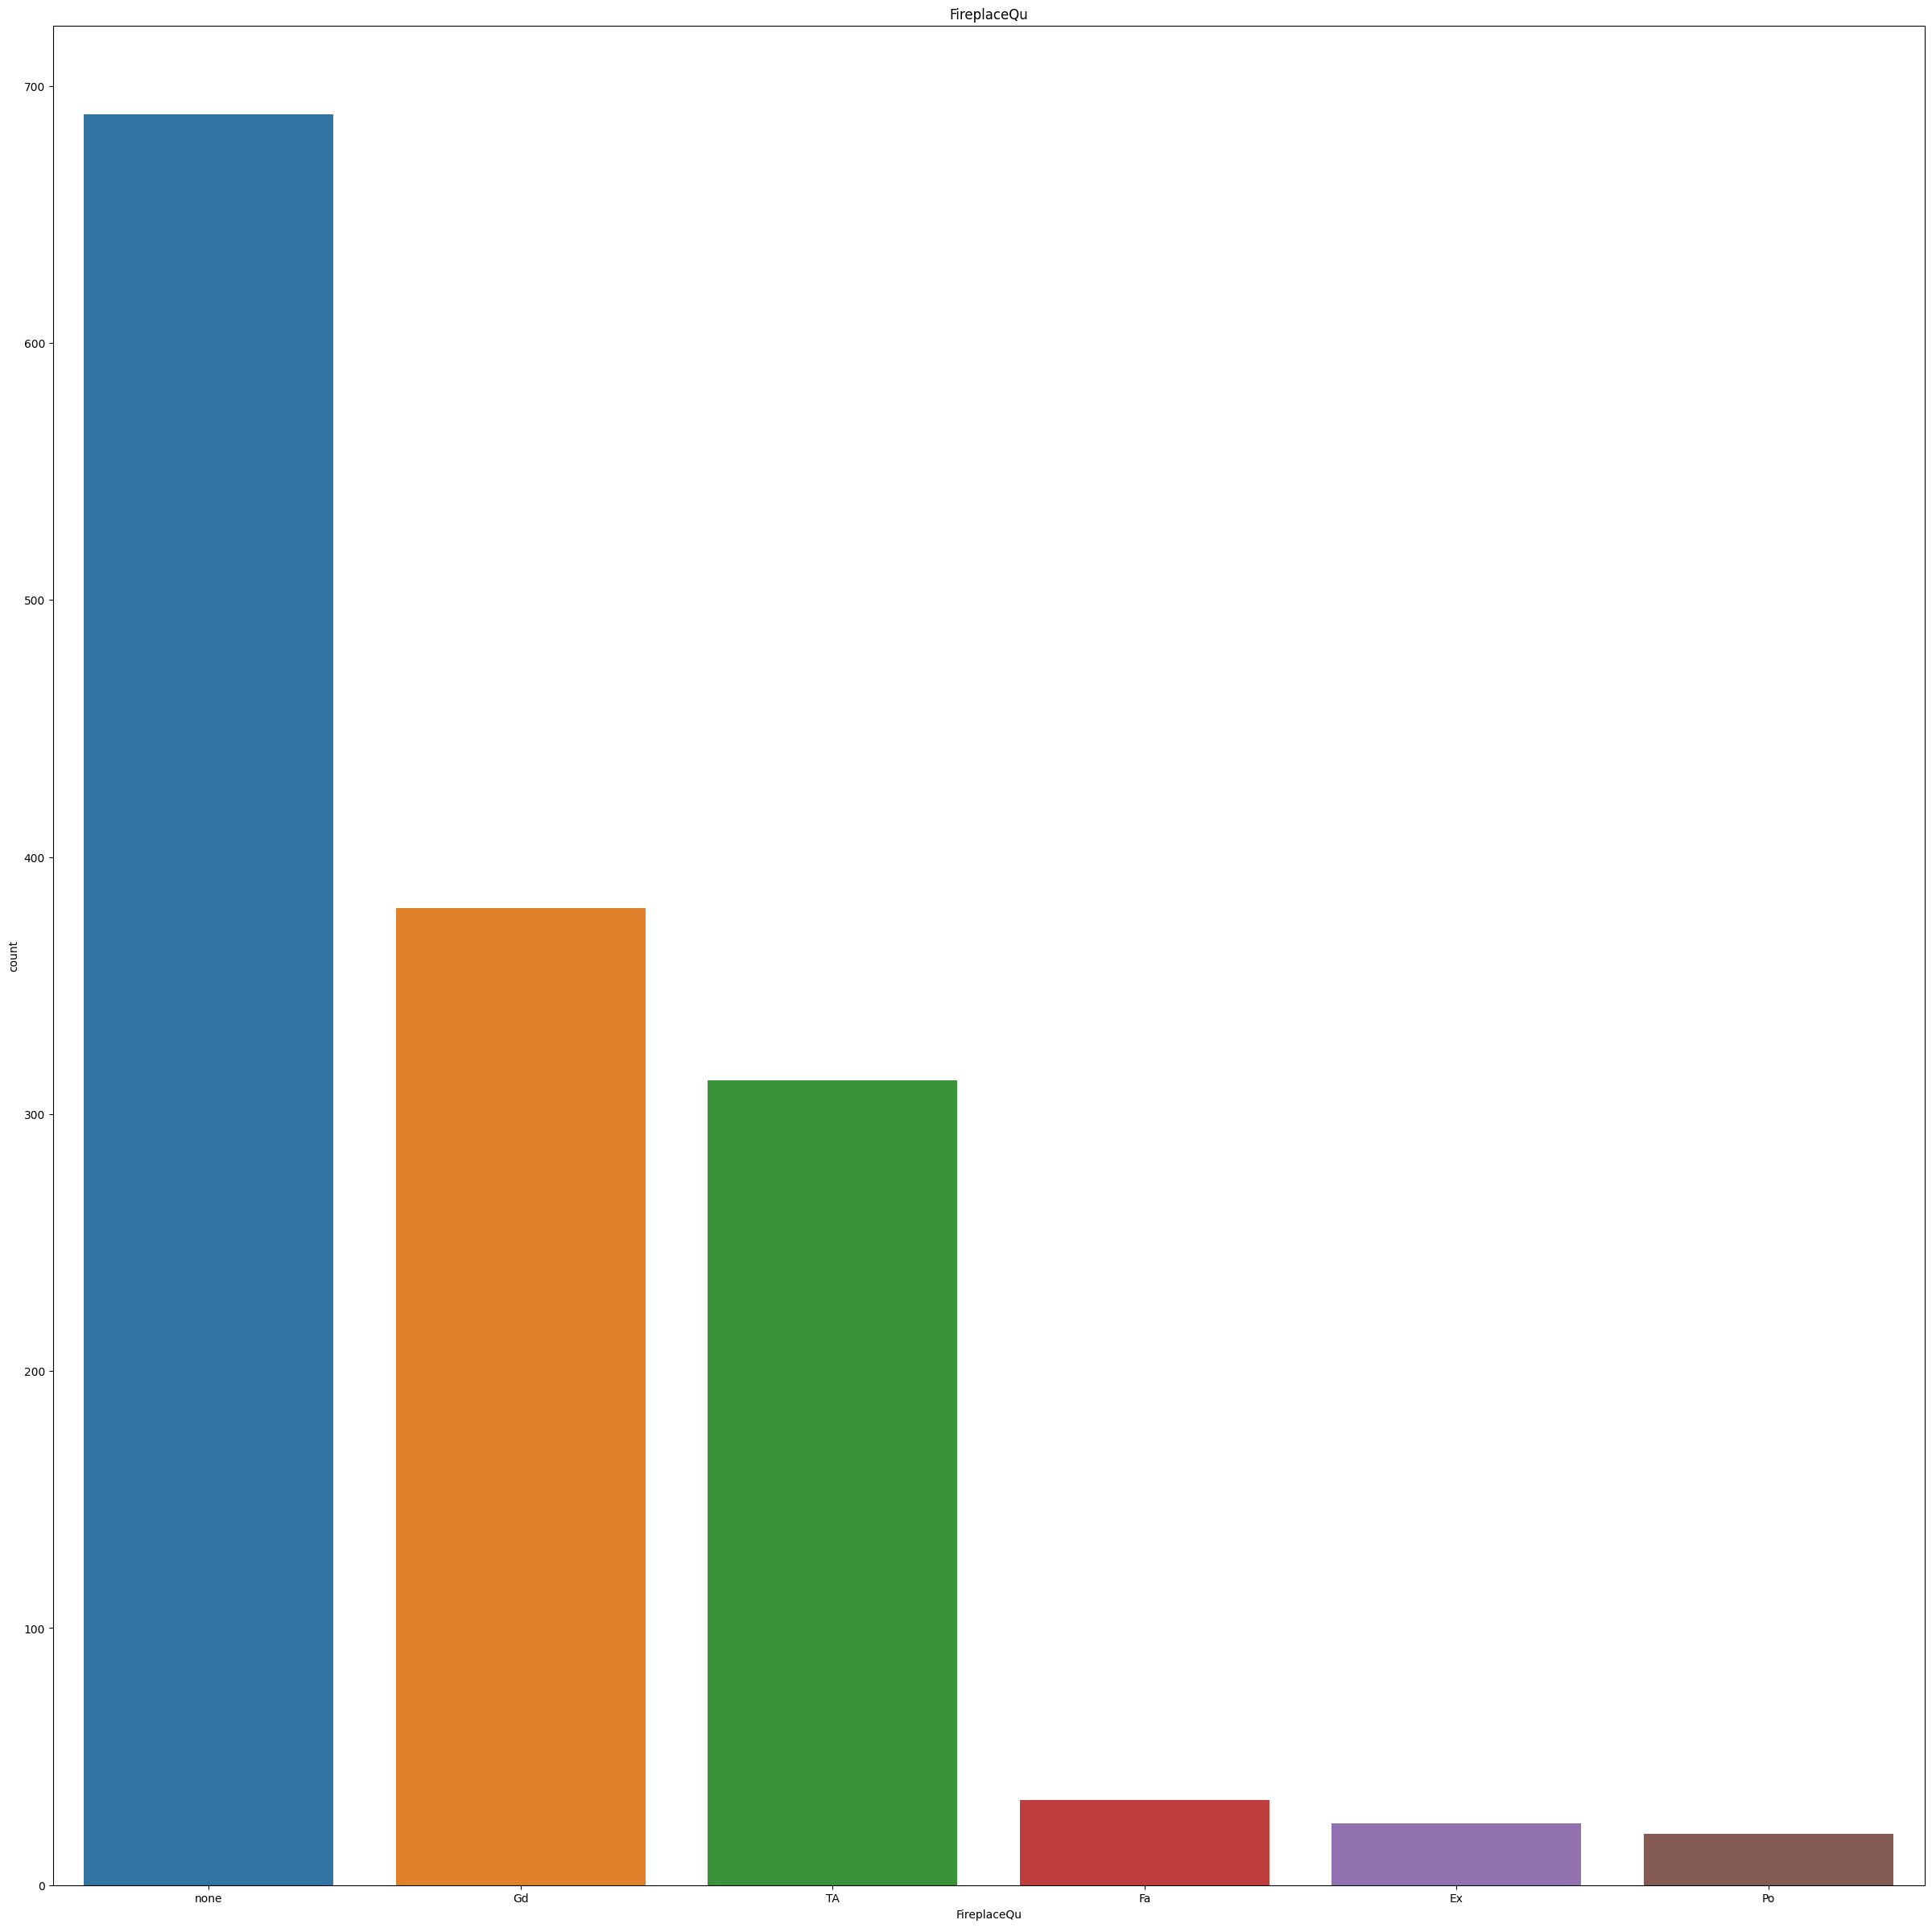

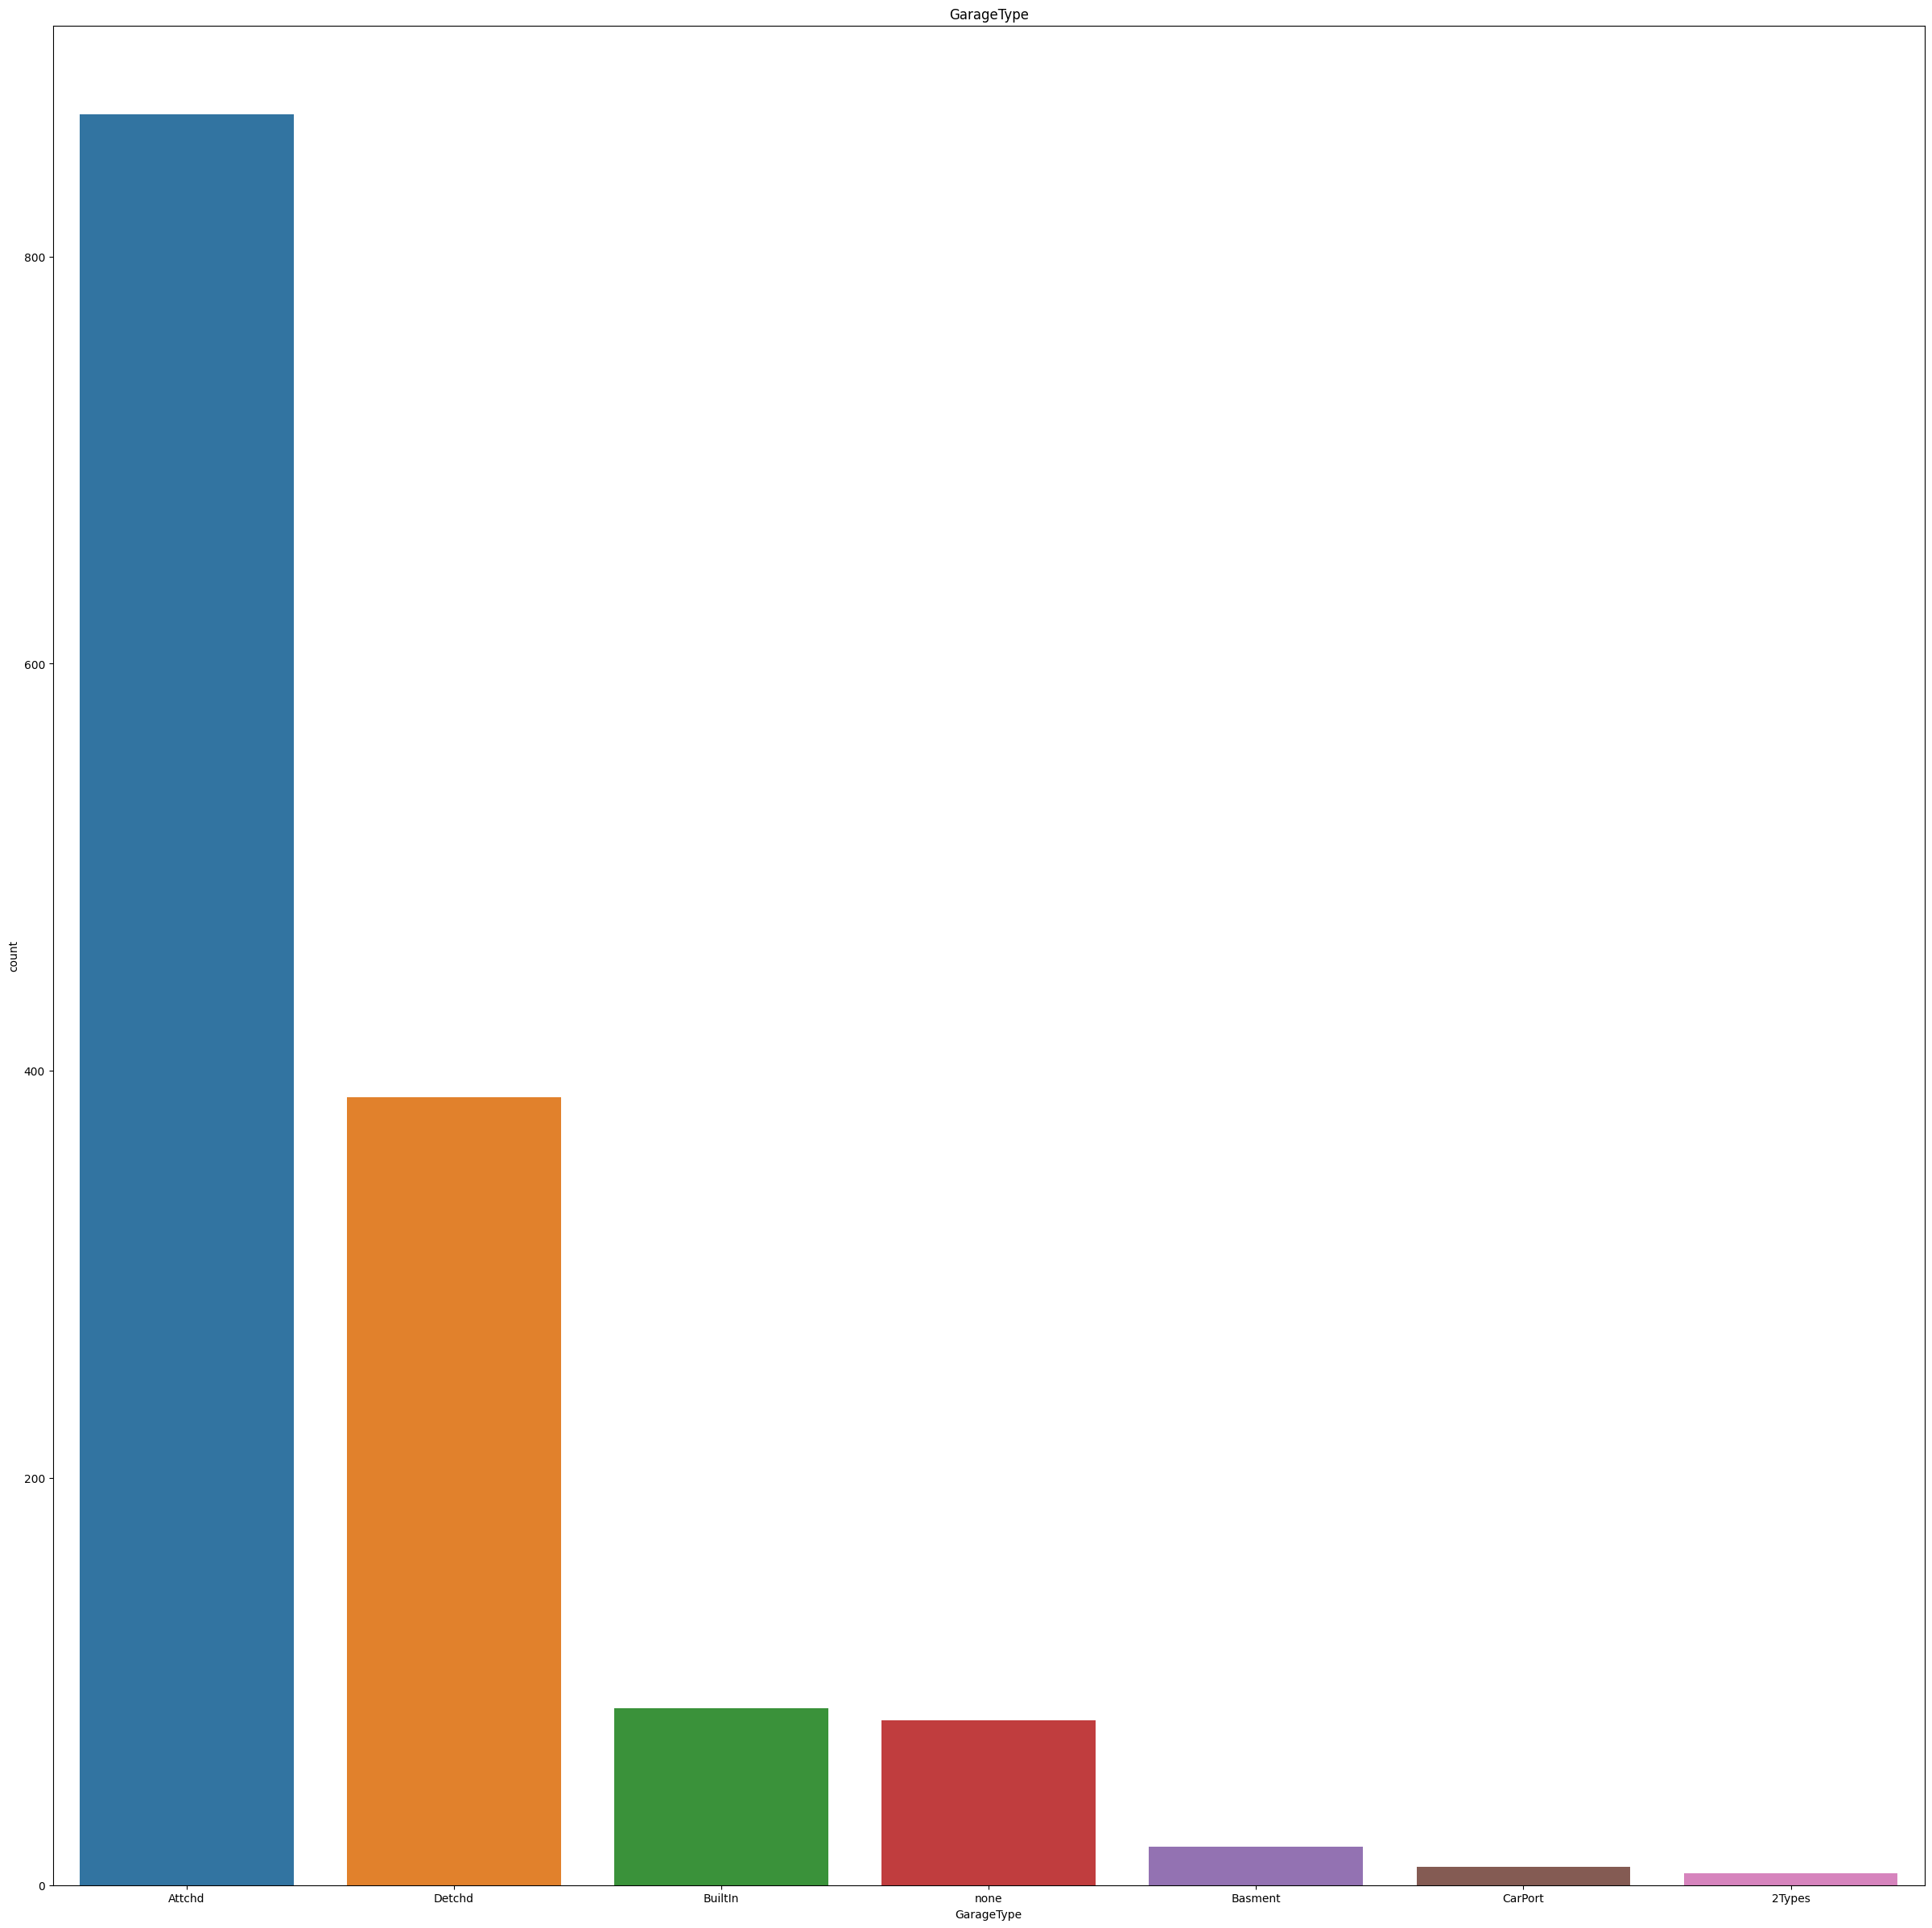

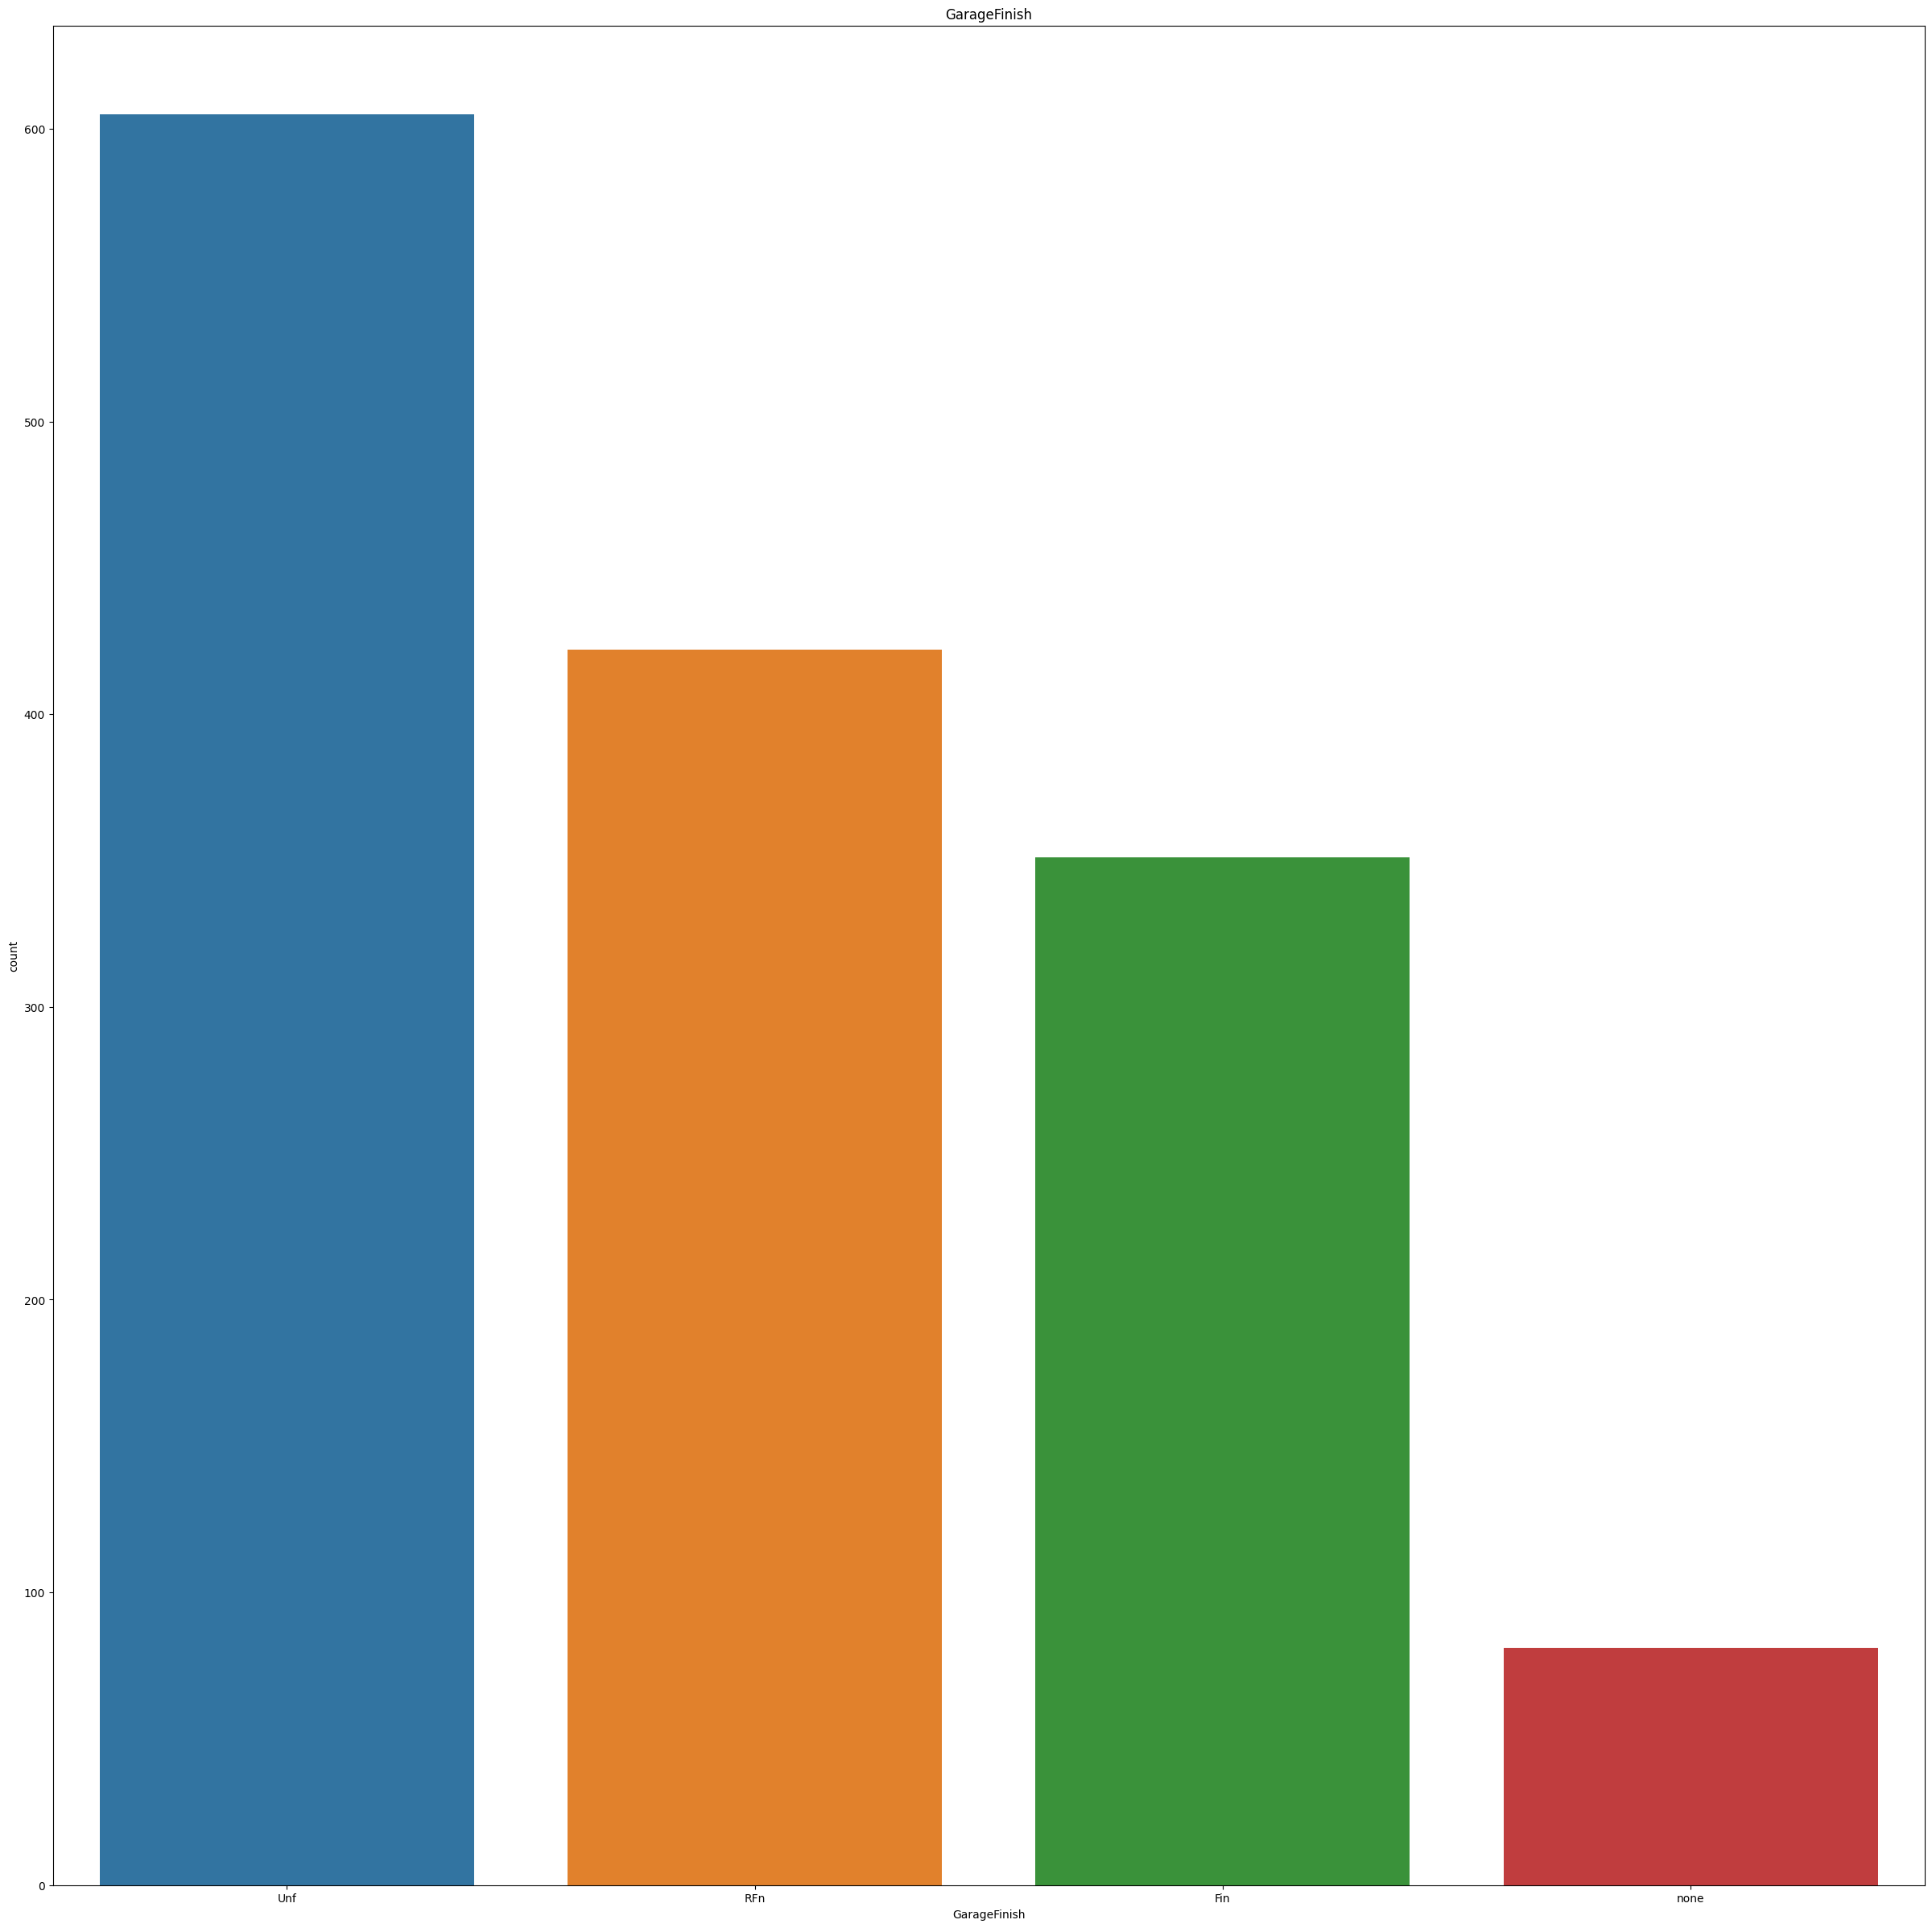

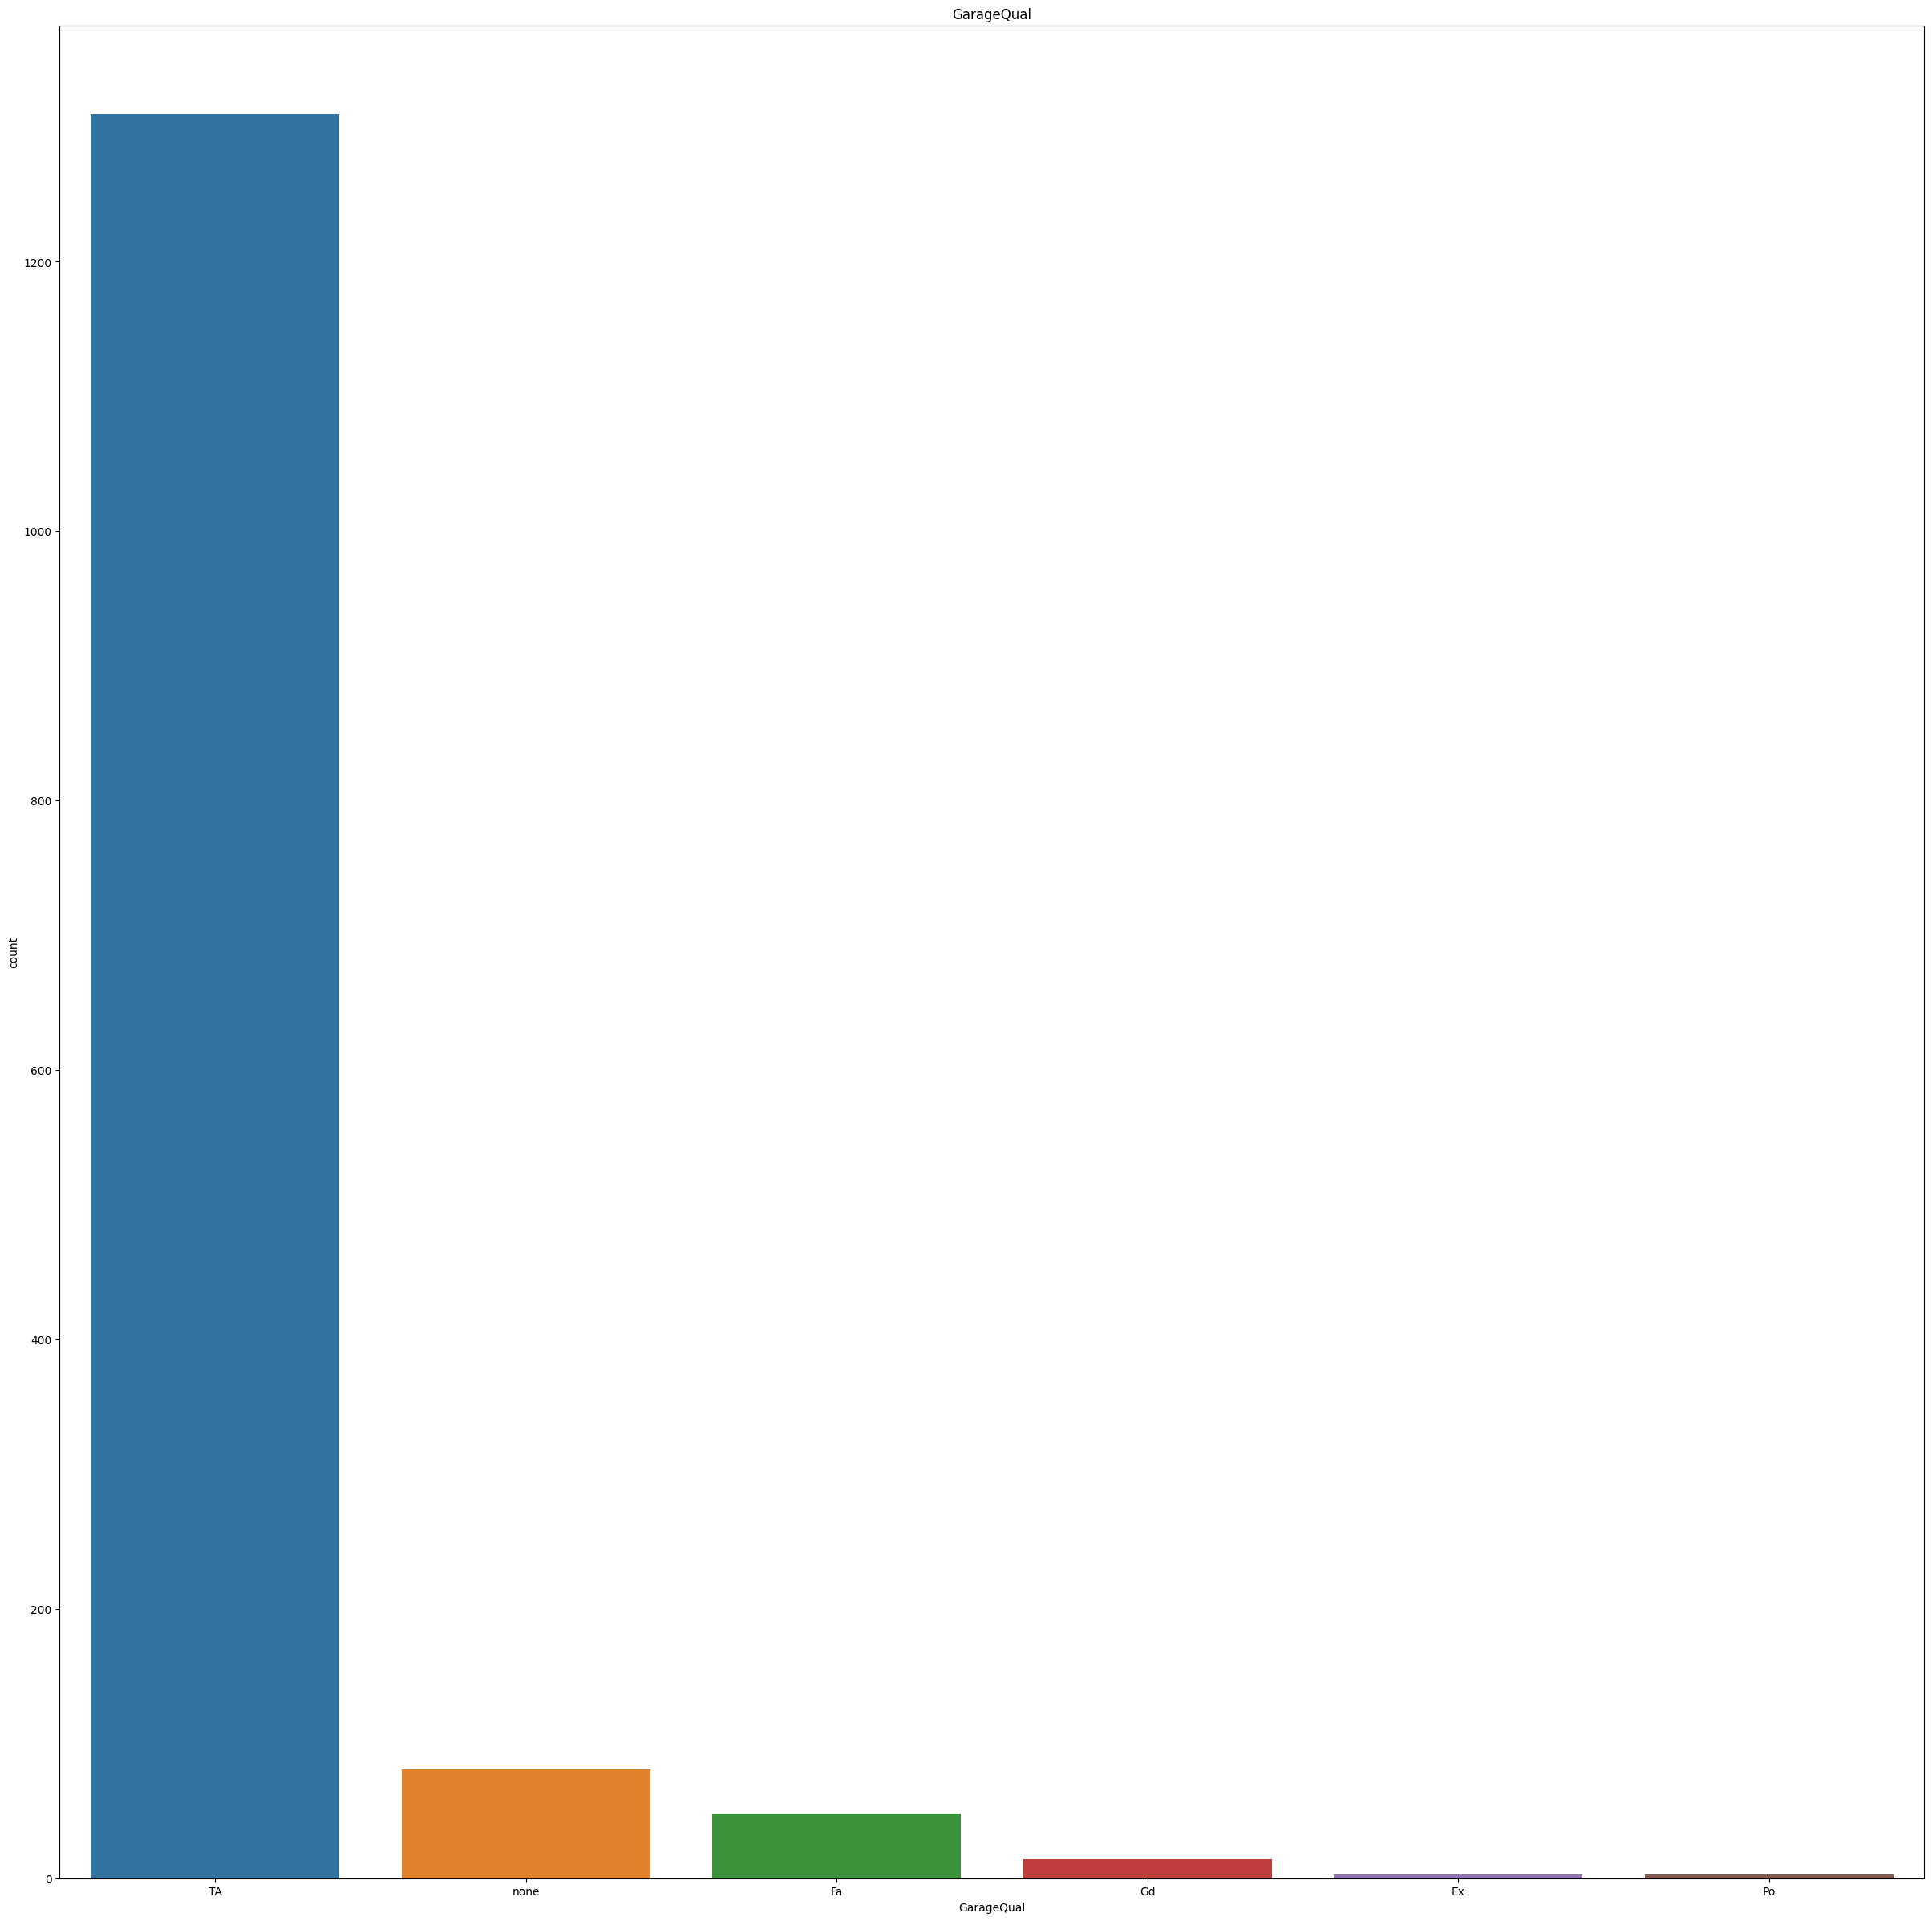

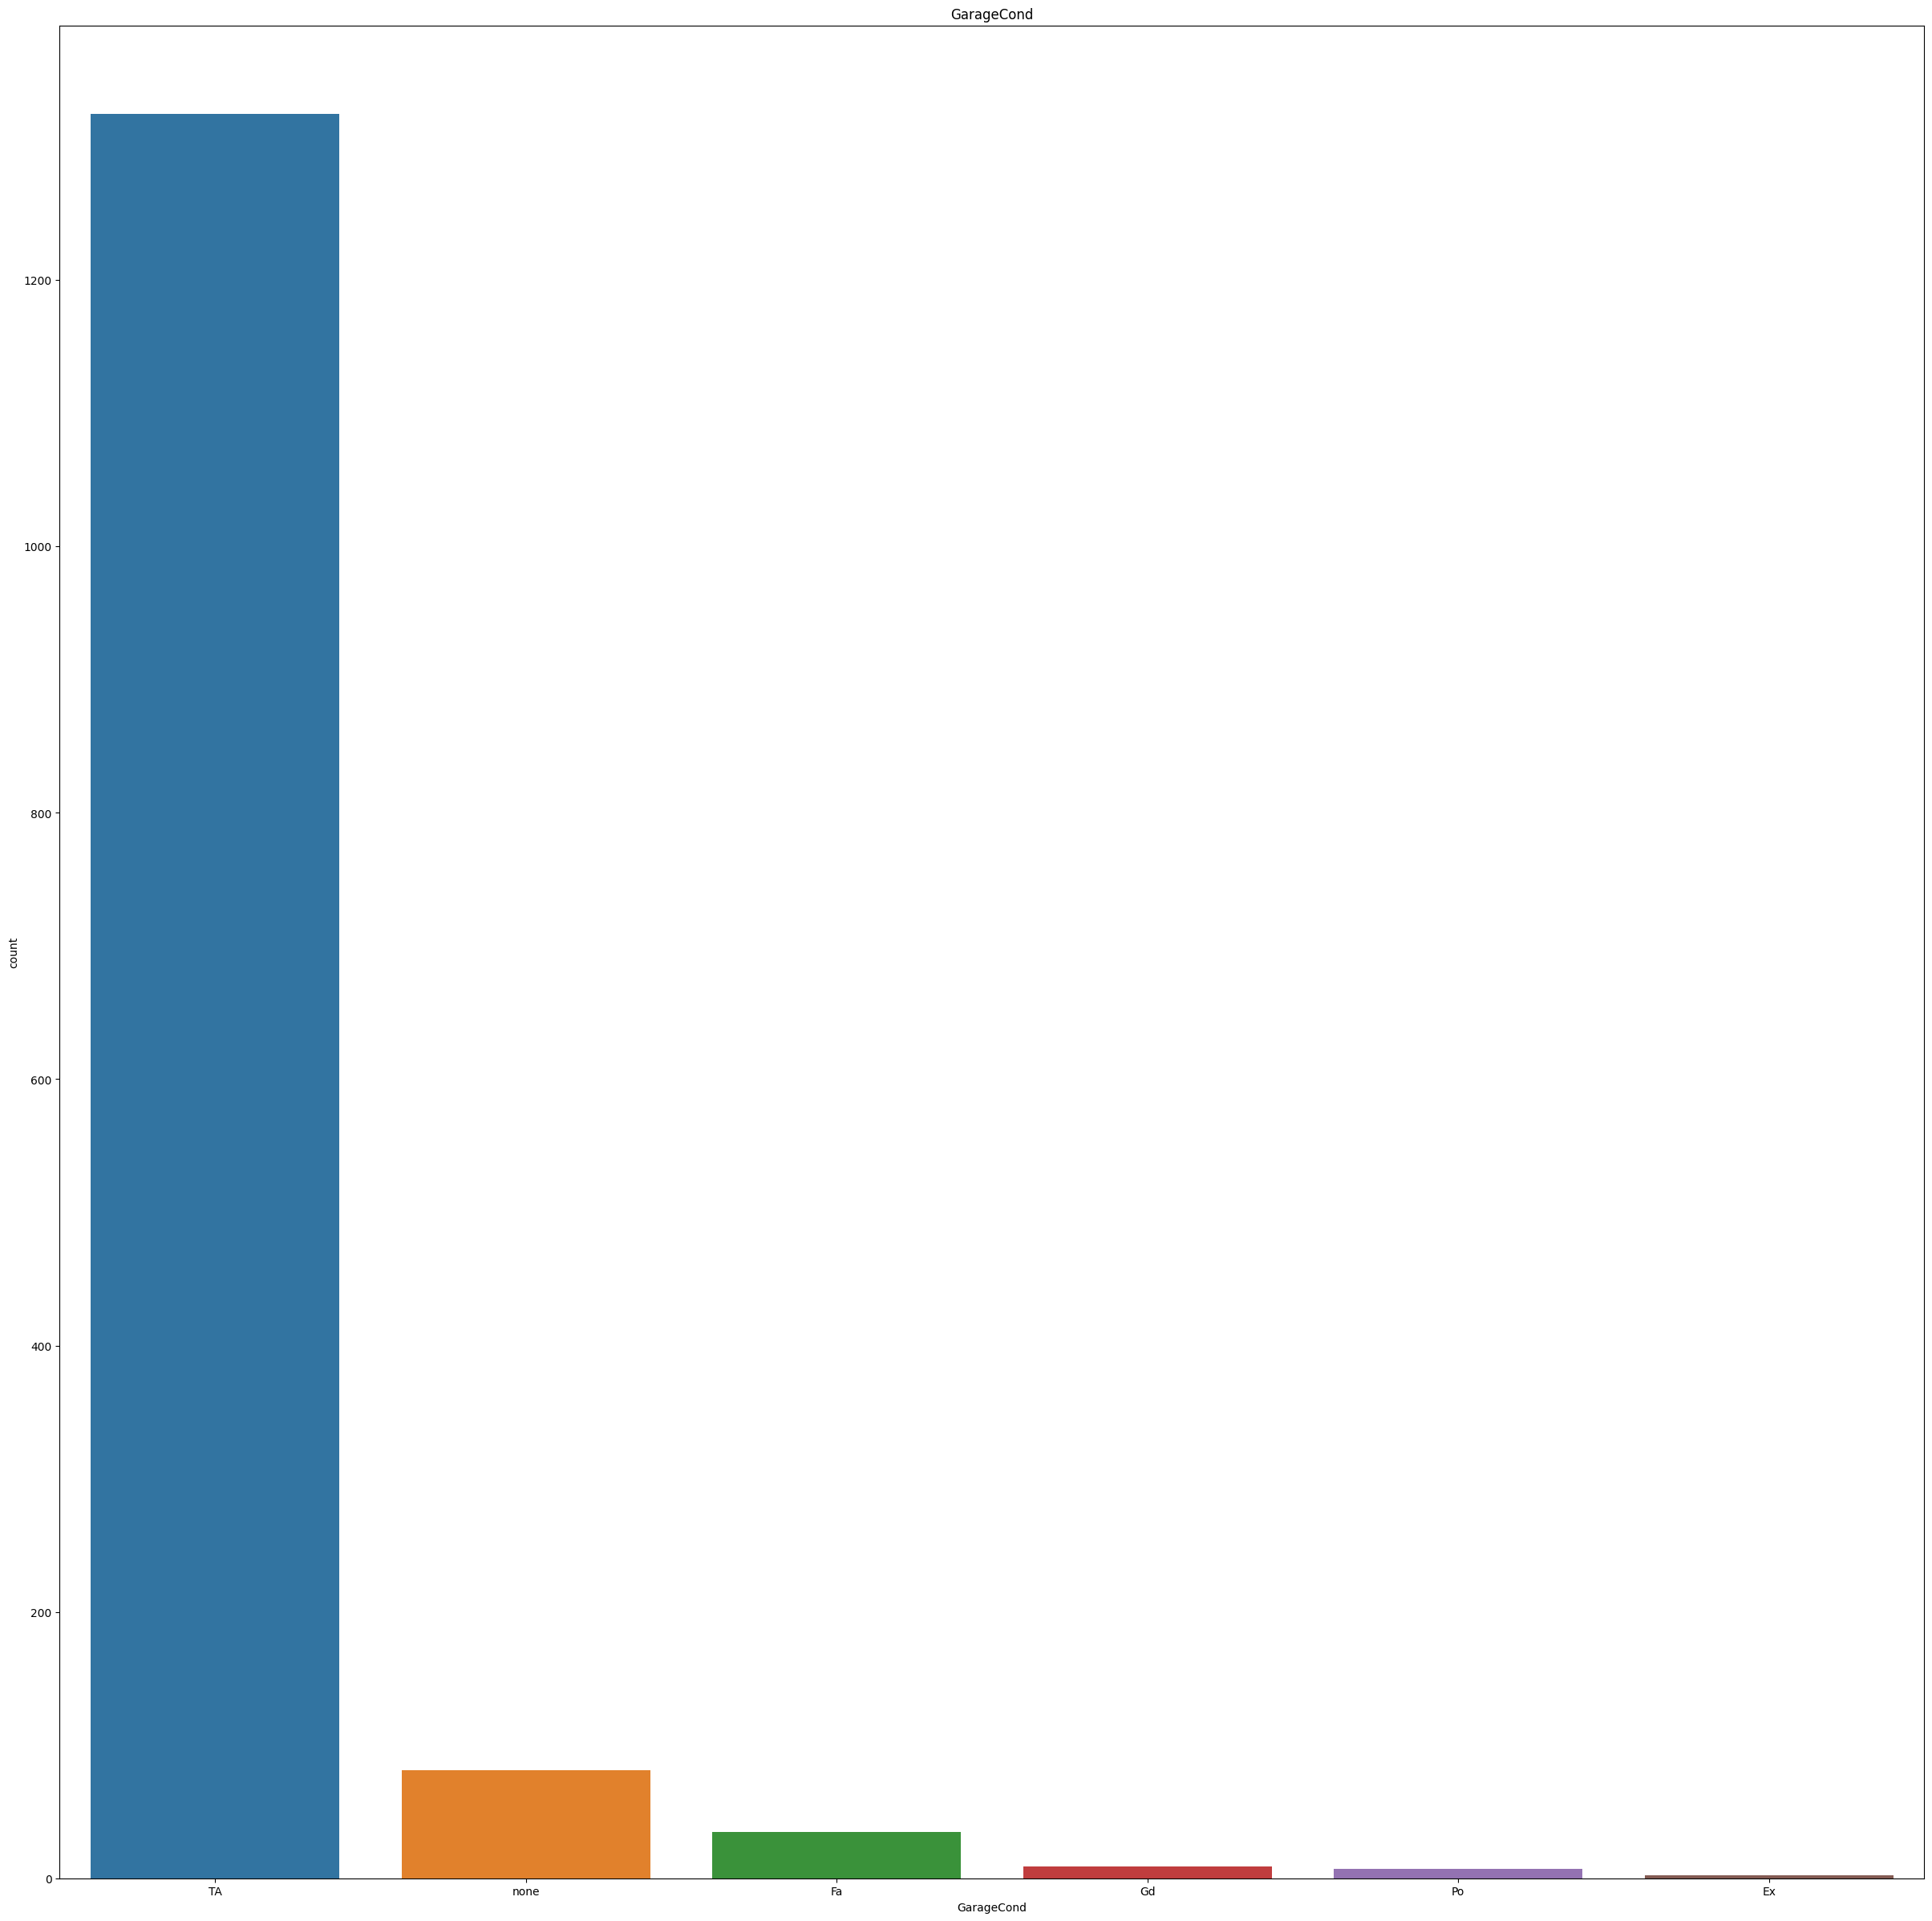

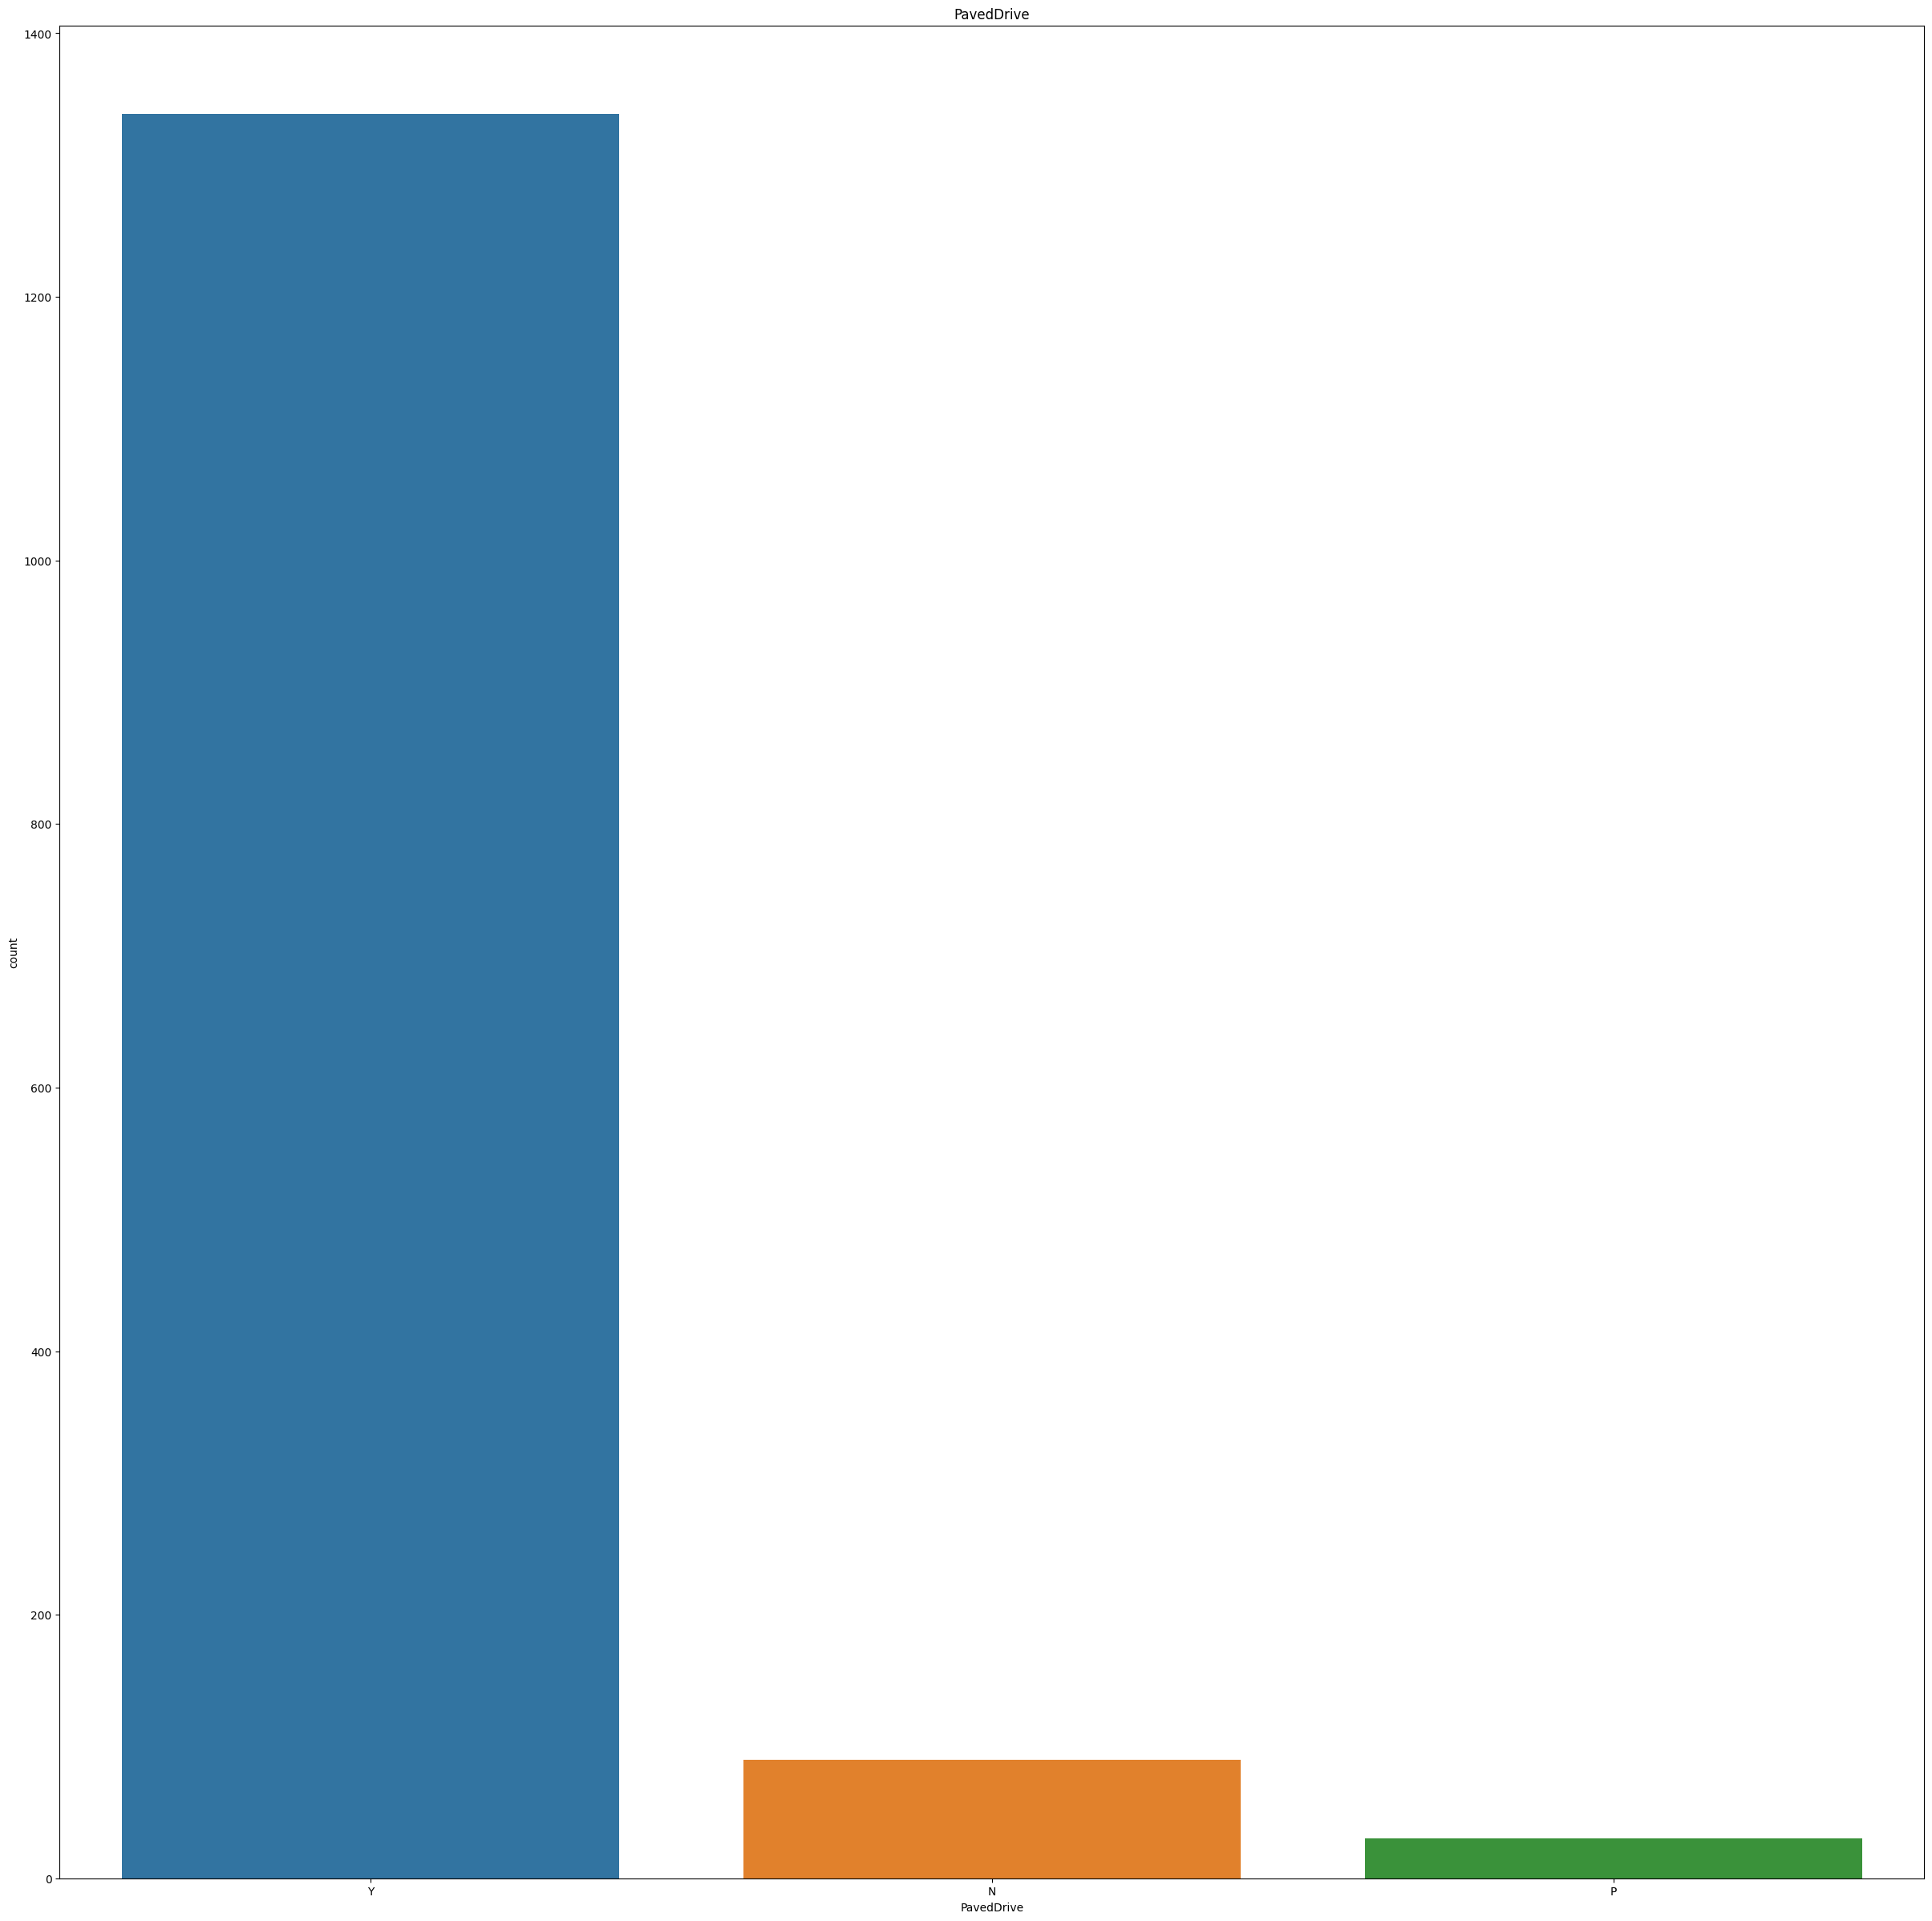

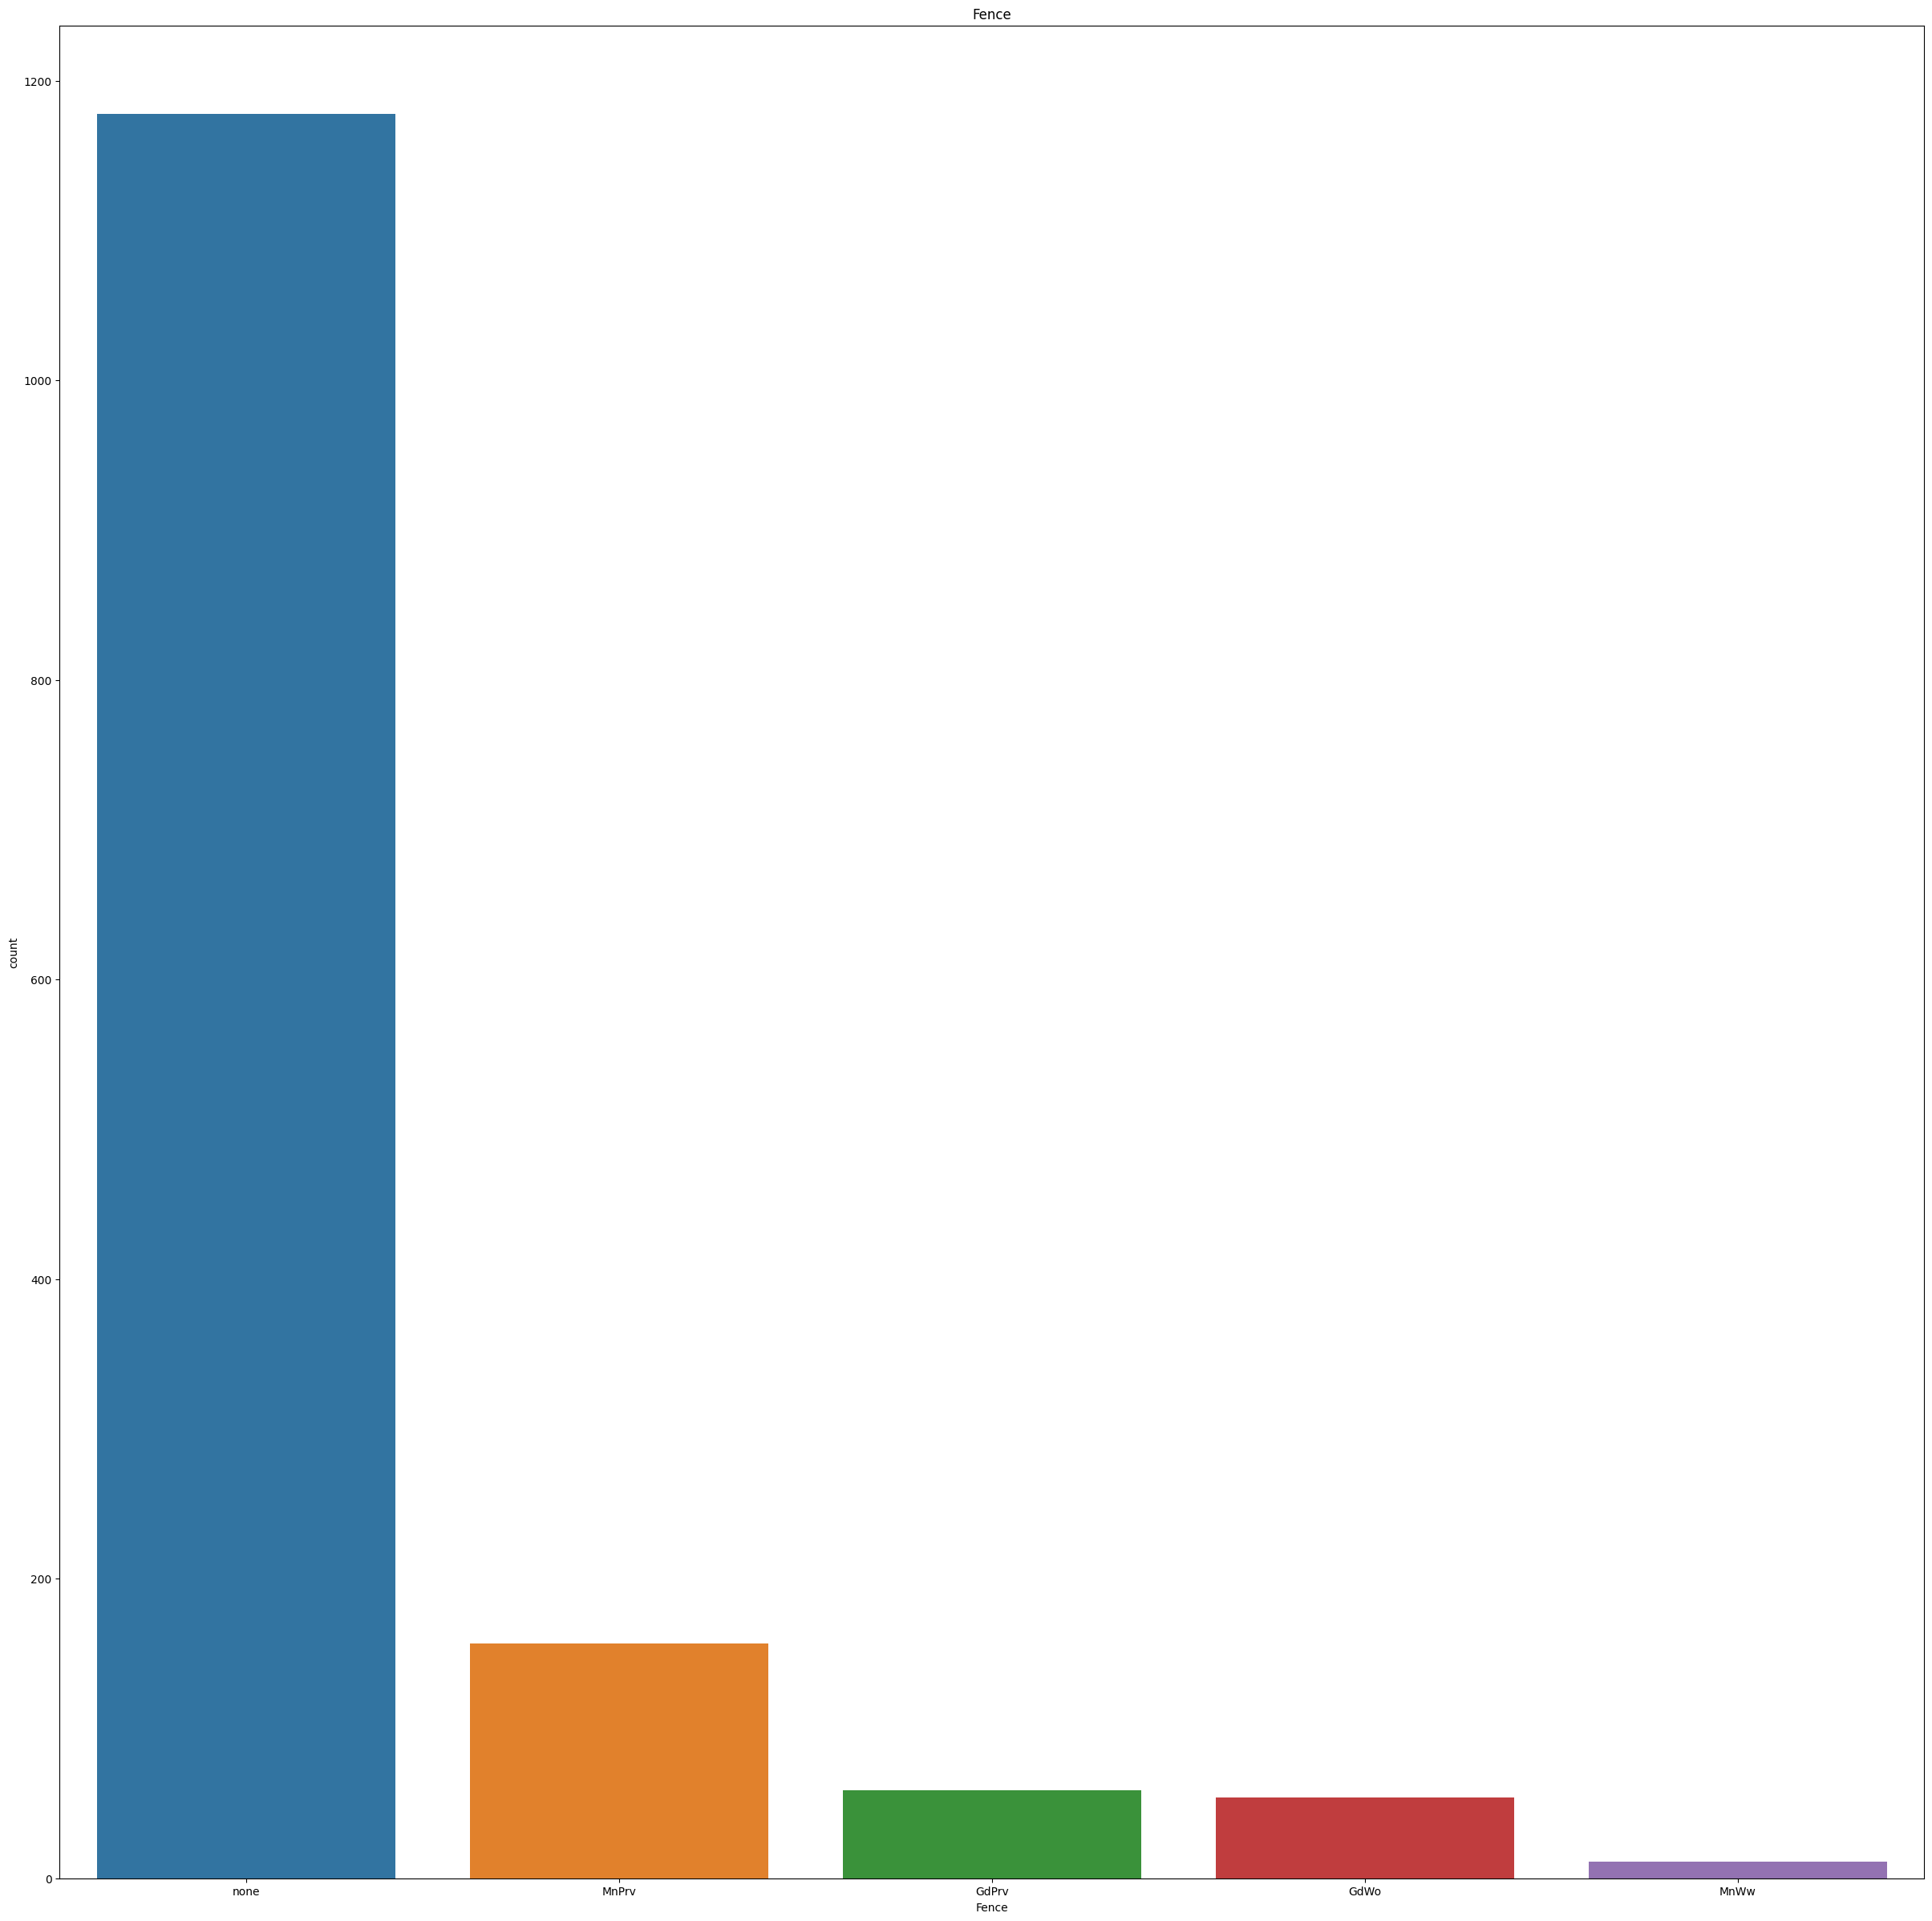

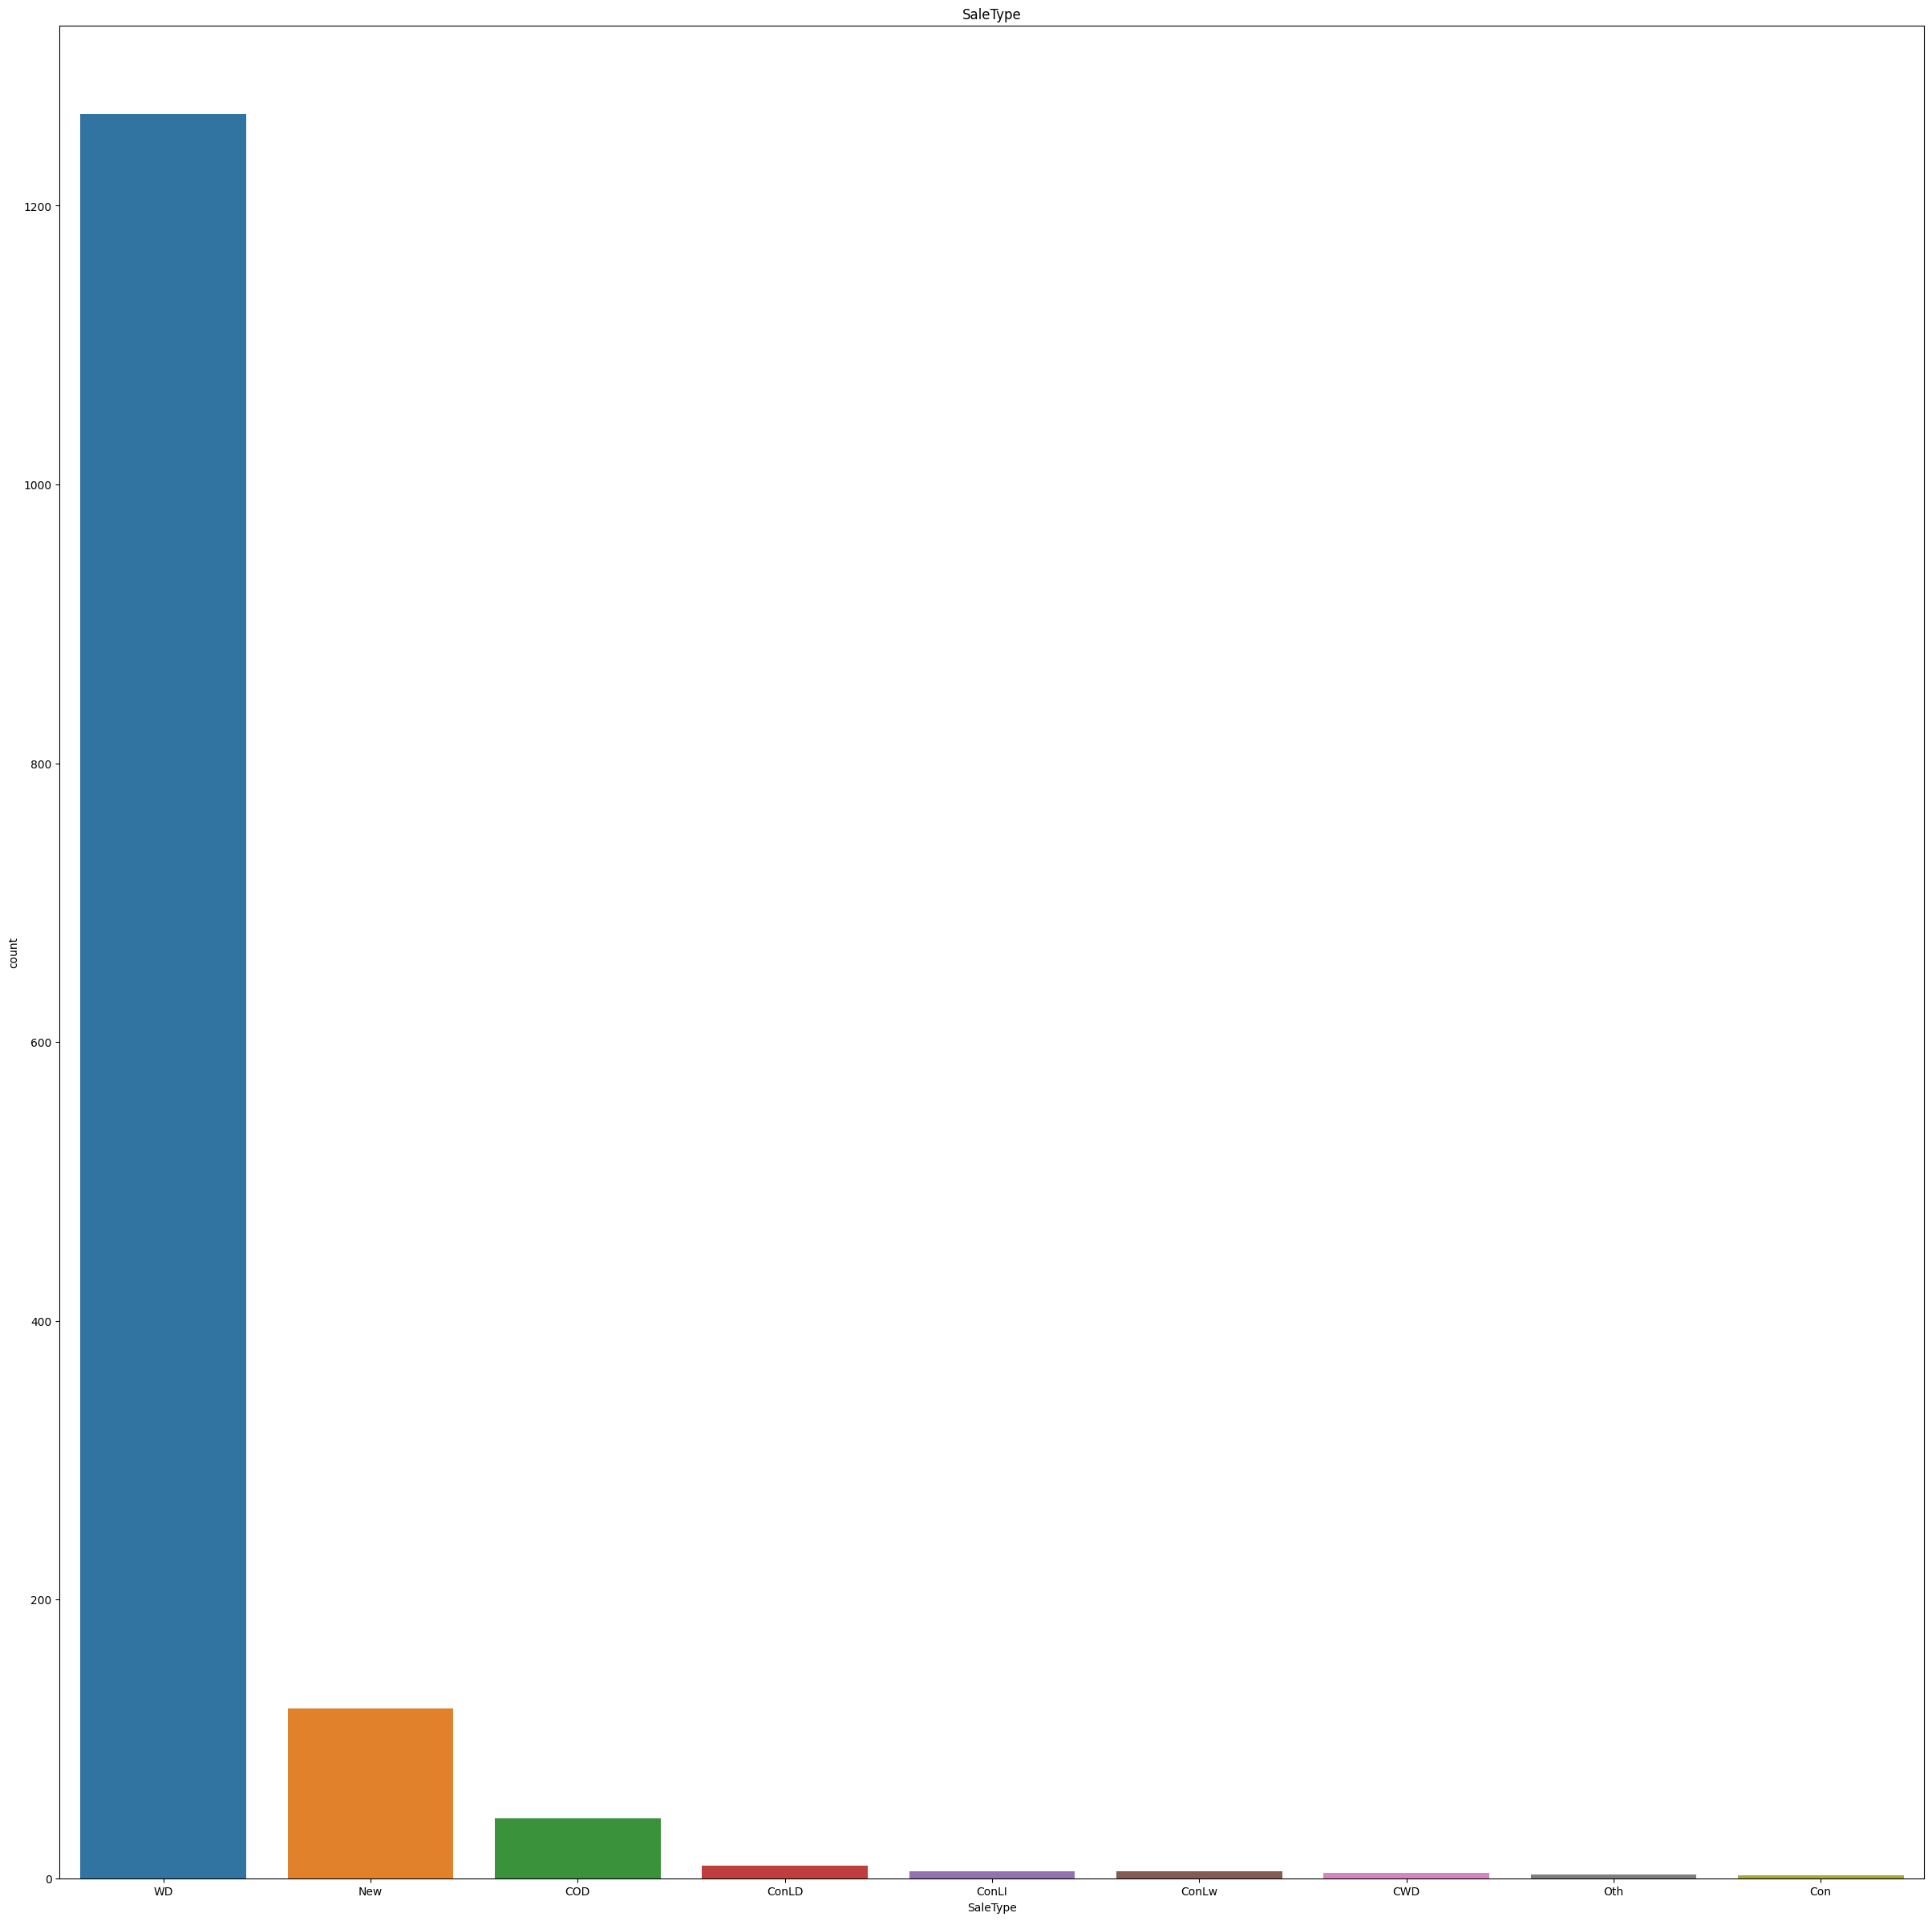

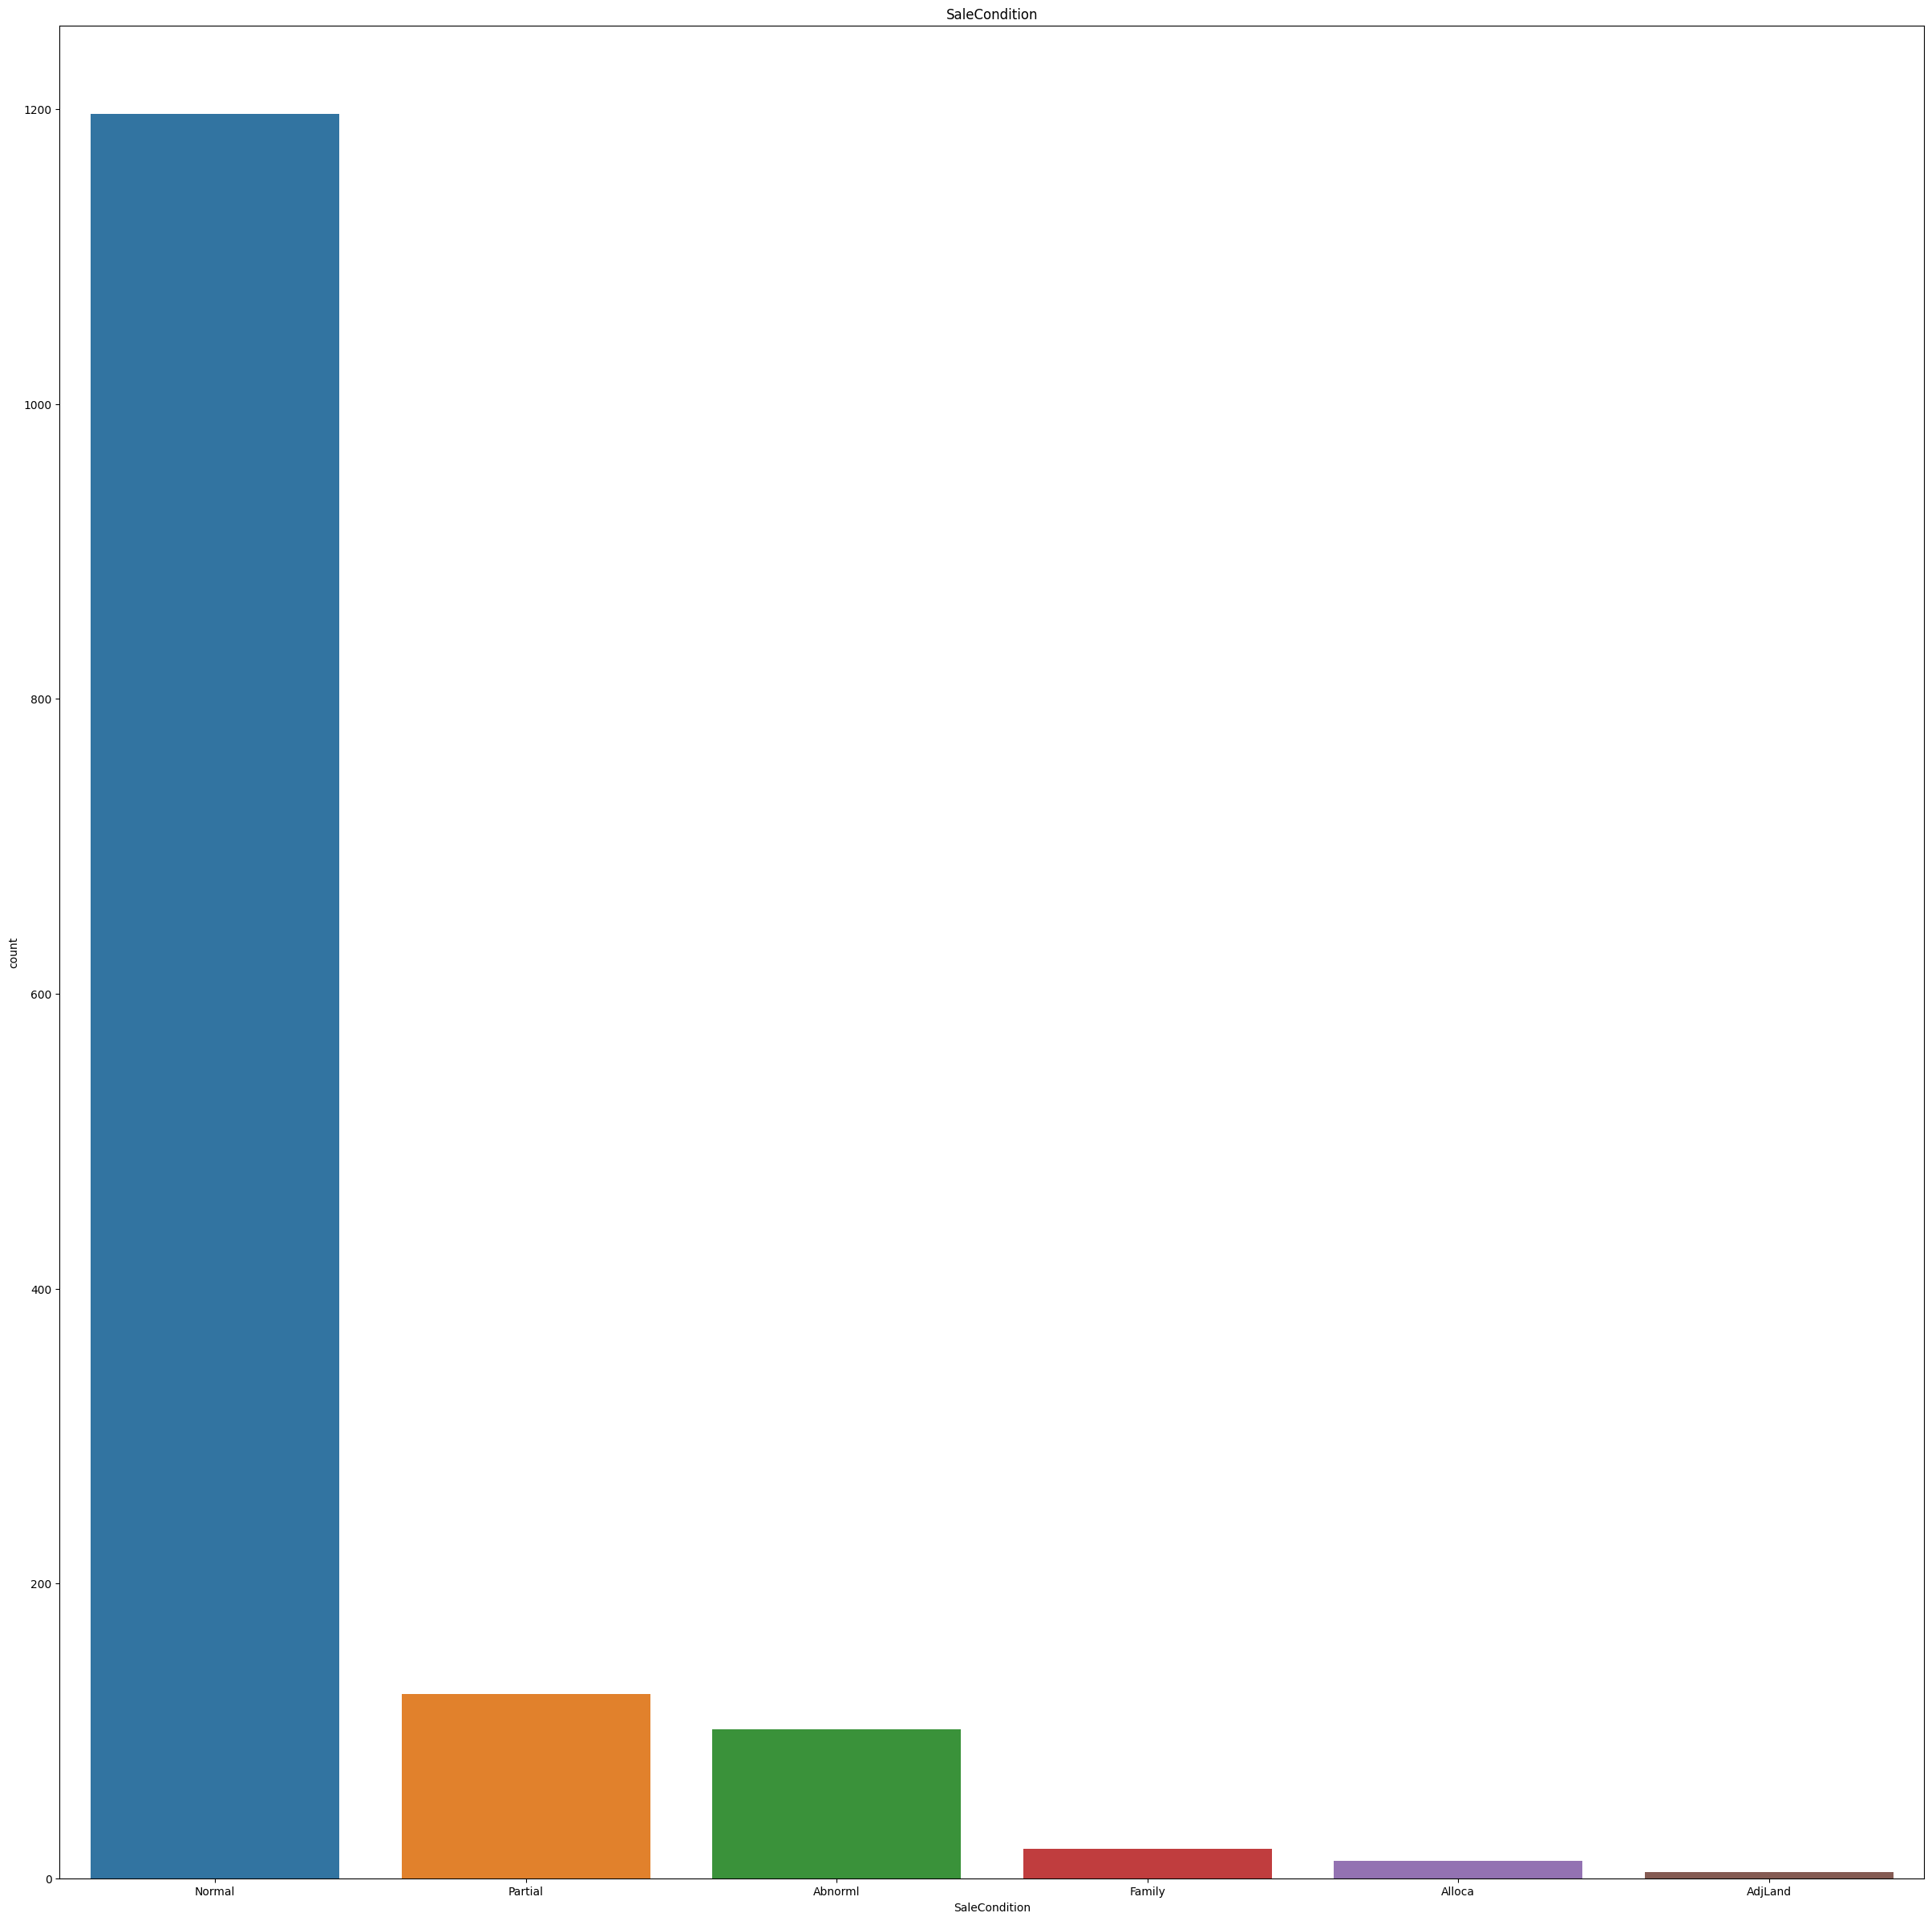

In [274]:
for i in range(len(cat_list)):
    plt.figure(figsize=(30,30))
    plt.title(cat_list[i])
    sns.barplot(x= data[cat_list[i]].value_counts().index, y = data[cat_list[i]].value_counts())
    plt.show()

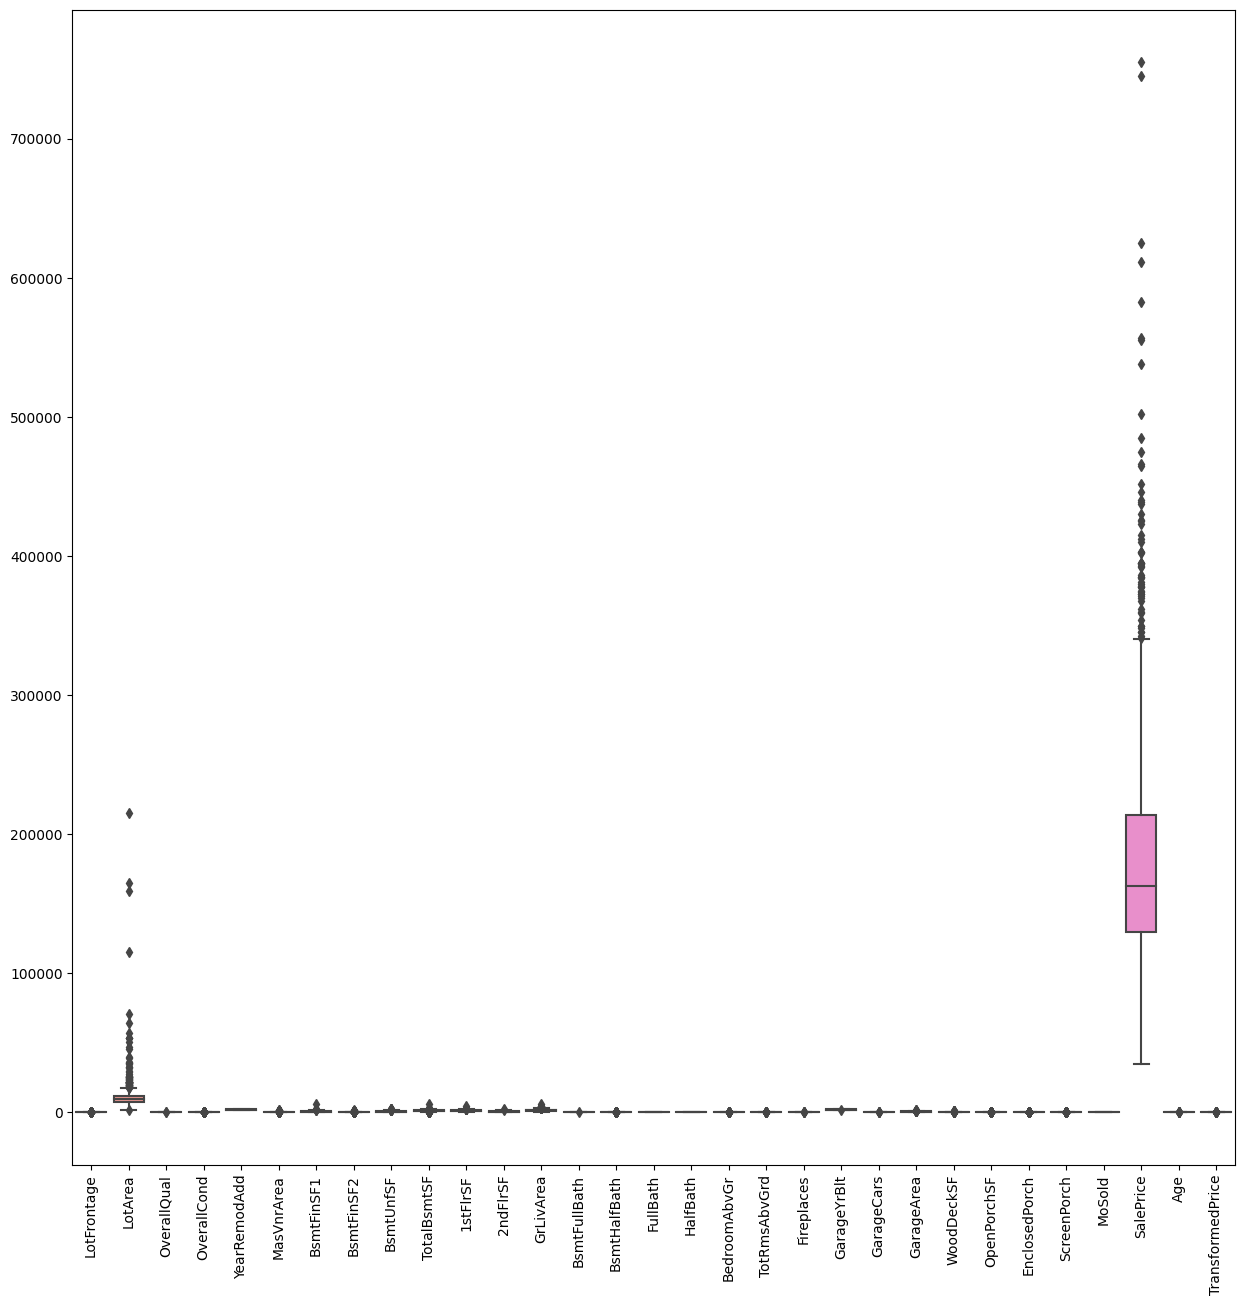

In [275]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data_num);

In [276]:
for col in data_num.columns:
    data_num[col][data_num[col] <= data_num[col].quantile(0.05)] = data_num[col].quantile(0.05)
    data_num[col][data_num[col] >= data_num[col].quantile(0.95)] = data_num[col].quantile(0.95)

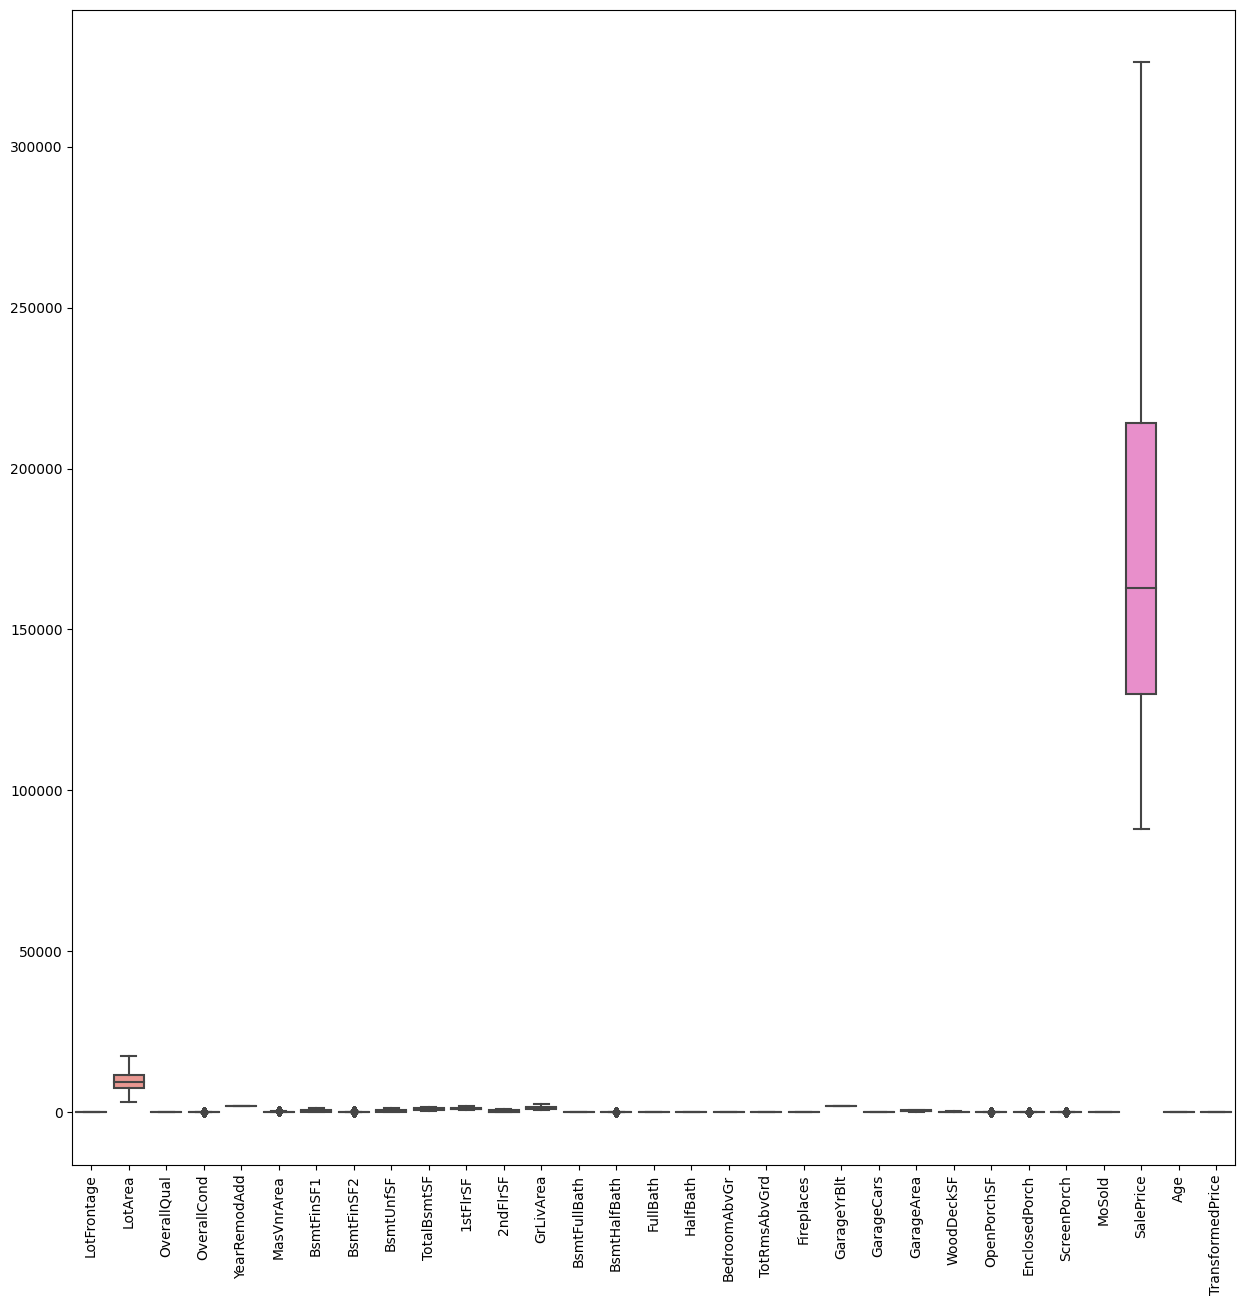

In [277]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data_num);

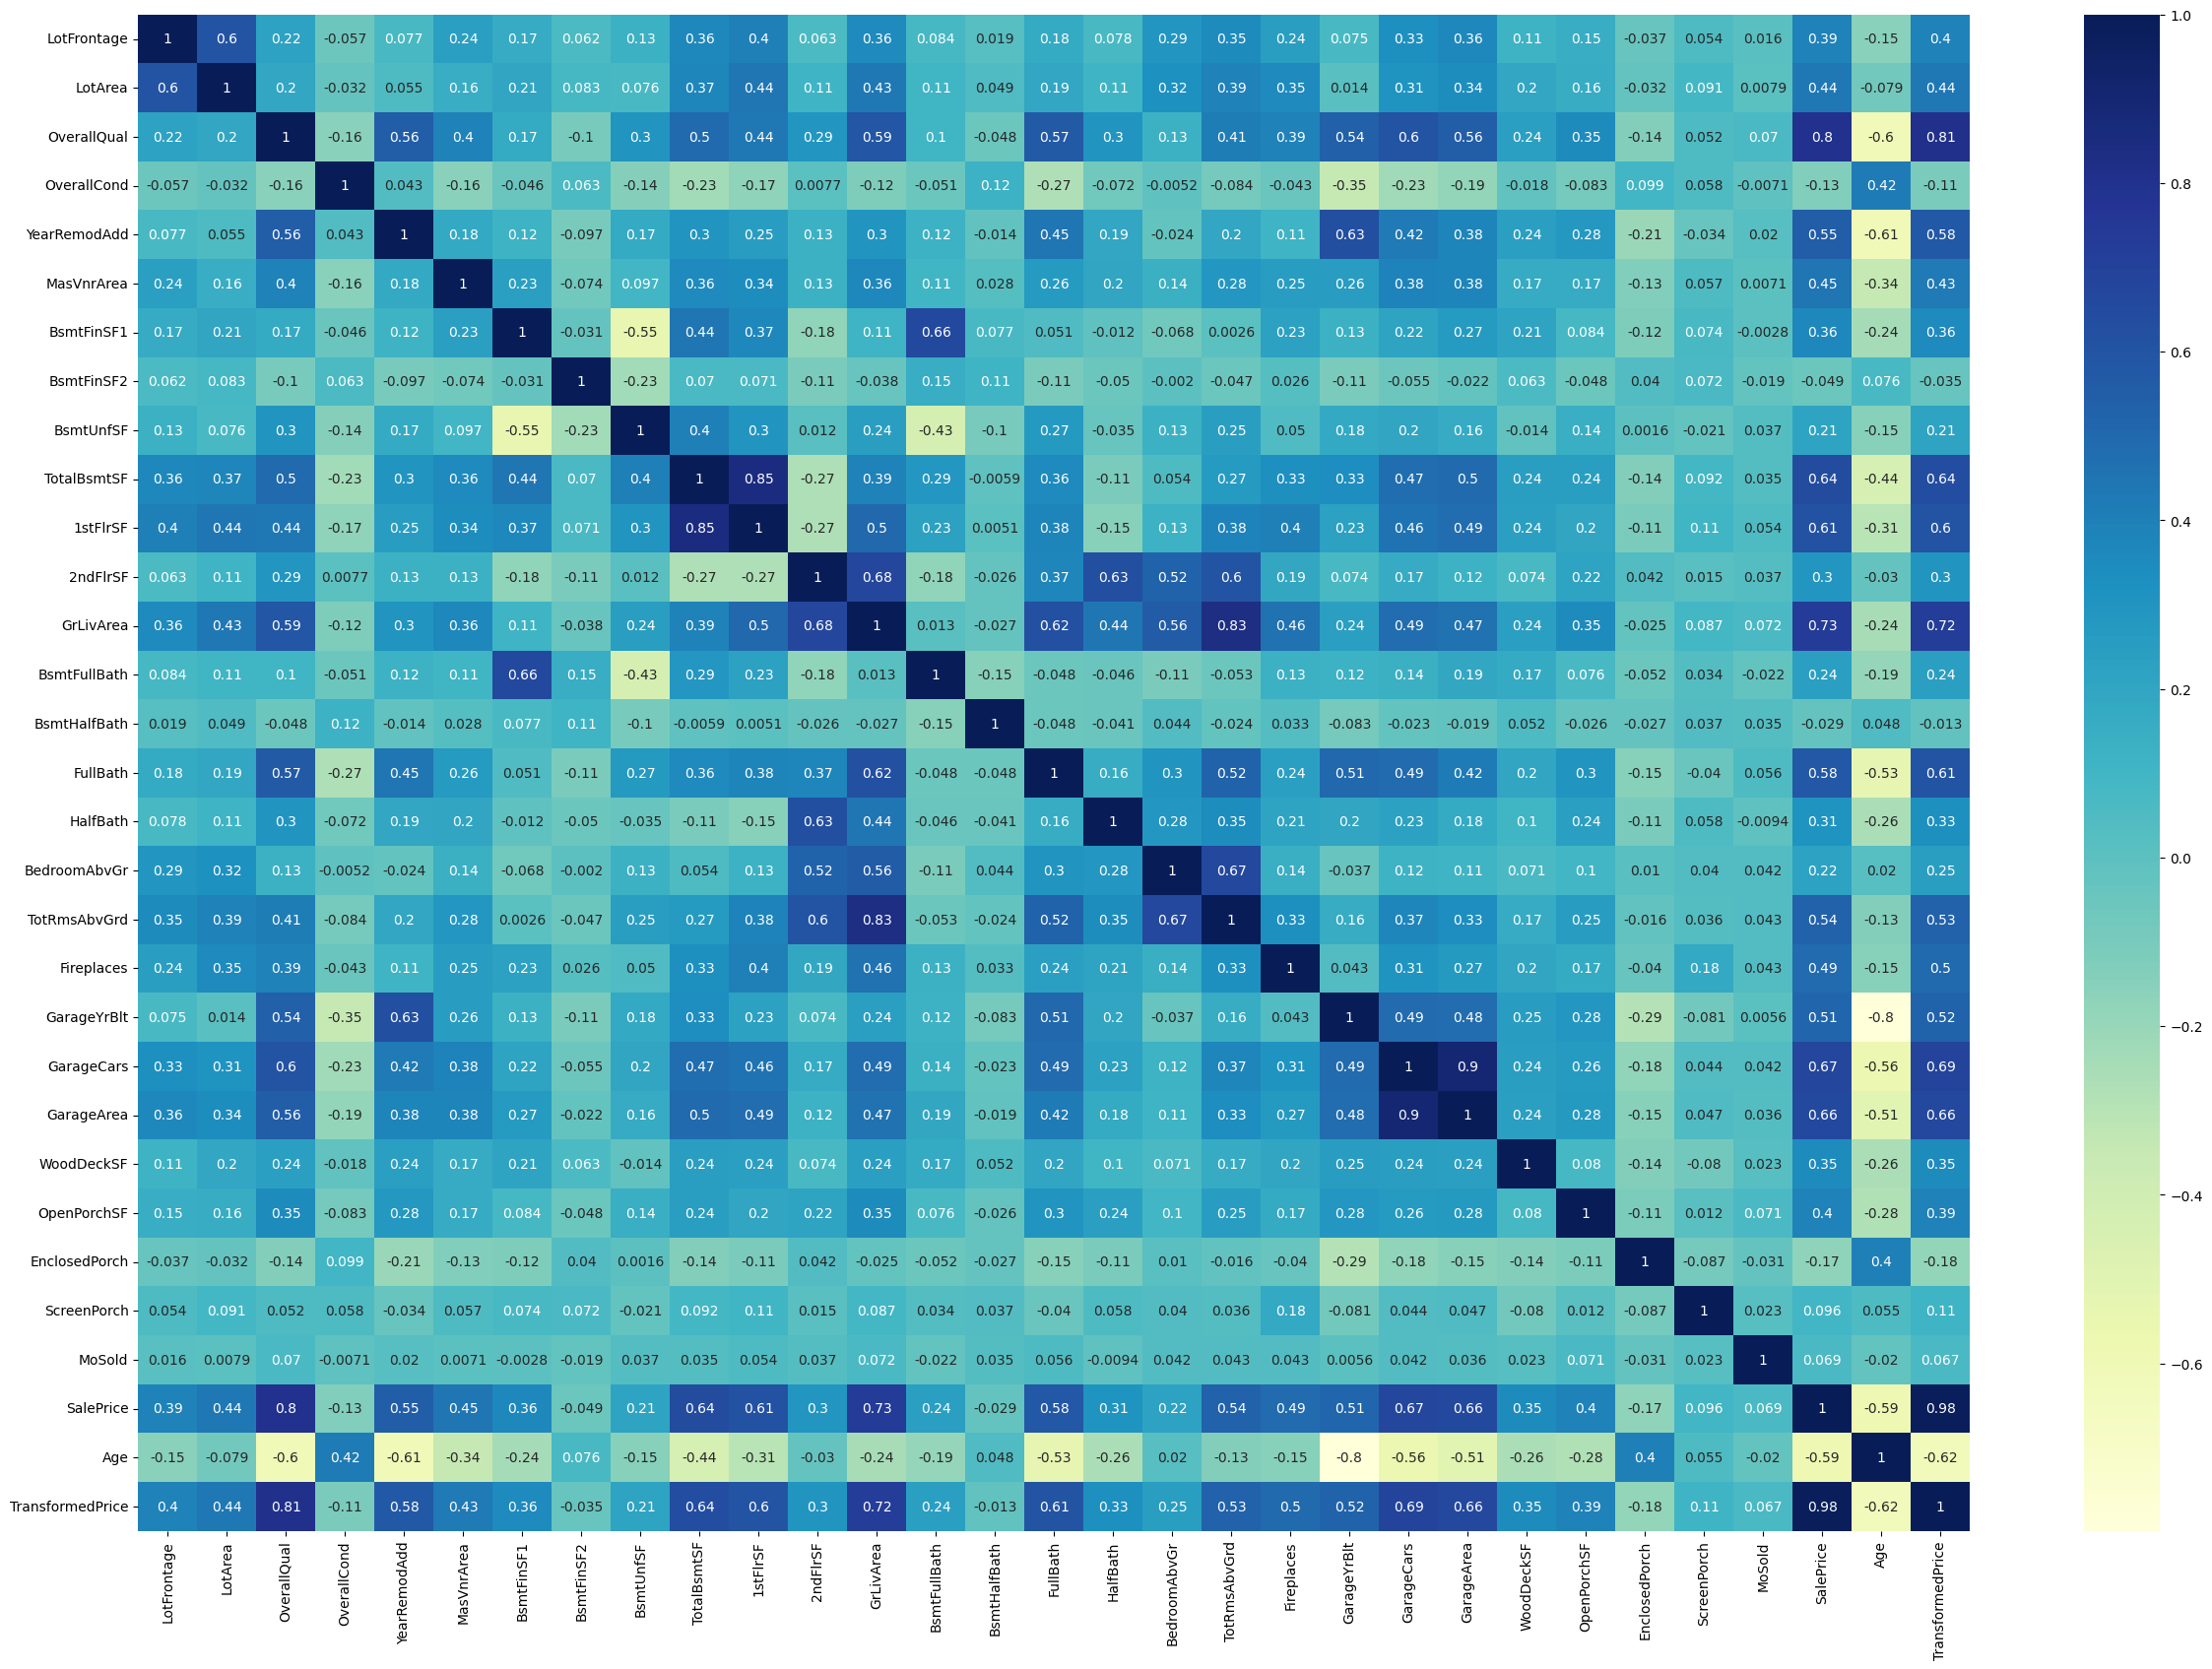

In [278]:
plt.figure(figsize=(30,20))
sns.heatmap(data_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [279]:
data_num = data_num.drop(['GarageCars'], axis = 1)
data_num = data_num.drop(['BsmtUnfSF'], axis = 1)
data_num = data_num.drop(['TotRmsAbvGrd'], axis = 1)
data_num = data_num.drop(['GarageYrBlt'], axis = 1)  

In [280]:
data_cat_encoded = pd.get_dummies(data_cat, drop_first=True, dtype='int')
data_cat_encoded.head()


,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [281]:
data_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,Age,TransformedPrice
0,65.0,8450.0,7,5,2003,196.0,706,0.0,856,856.0,...,0,548.0,0,61.0,0.0,0,2,208500.0,5,12.247694
1,80.0,9600.0,6,8,1976,0.0,978,0.0,1262,1262.0,...,1,460.0,298,0.0,0.0,0,5,181500.0,31,12.109011
2,68.0,11250.0,7,5,2002,162.0,486,0.0,920,920.0,...,1,608.0,0,42.0,0.0,0,9,223500.0,7,12.317167
3,60.0,9550.0,7,5,1970,0.0,216,0.0,756,961.0,...,1,642.0,0,35.0,180.3,0,2,140000.0,91,11.849398
4,84.0,14260.0,8,5,2000,350.0,655,0.0,1145,1145.0,...,1,836.0,192,84.0,0.0,0,11,250000.0,8,12.429216


In [282]:
data = pd.concat([data_num, data_cat_encoded], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 236 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int32(209), int64(15)
memory usage: 1.5 MB


In [283]:
for i in data_cat_encoded.columns:
    print(i)

MSSubClass_1-1/2 STORY FINISHED ALL AGES
MSSubClass_1-STORY 1945 & OLDER
MSSubClass_1-STORY 1946 & NEWER ALL STYLES
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES
MSSubClass_2-1/2 STORY ALL AGES
MSSubClass_2-STORY 1945 & OLDER
MSSubClass_2-STORY 1946 & NEWER
MSSubClass_2-STORY PUD - 1946 & NEWER
MSSubClass_DUPLEX - ALL STYLES AND AGES
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
MSSubClass_SPLIT FOYER
MSSubClass_SPLIT OR MULTI-LEVEL
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Alley_Pave
Alley_none
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighb

In [284]:
data.columns.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'SalePrice',
 'Age',
 'TransformedPrice',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLI

In [285]:
X = data.drop(["SalePrice", "TransformedPrice"], axis=1)
y = data["TransformedPrice"]

In [286]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7,5,2003,196.0,706,0.0,856,856.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,6,8,1976,0.0,978,0.0,1262,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7,5,2002,162.0,486,0.0,920,920.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,7,5,1970,0.0,216,0.0,756,961.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,8,5,2000,350.0,655,0.0,1145,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [287]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7, random_state=42)

In [288]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'Age']

In [289]:
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [290]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9405312013328821
Testing R2
-5.879601272153105e+19


# Regularization

## Ridge Regularization

In [291]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

alpha_dict = {}
ridge = Ridge()

In [292]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [293]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [294]:
model_cv.best_params_

{'alpha': 20}

In [295]:
best_alpha = model_cv.best_params_['alpha']
best_alpha

20

In [296]:
ridge = Ridge(alpha= best_alpha)

In [297]:
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [337]:
betas_alpha_opt = pd.DataFrame(index=X.columns)
betas_alpha_opt.rows = X.columns
betas_alpha_opt['Ridge'] = ridge.coef_
alpha_dict['Ridge'] = betas_alpha_opt['Ridge']
print(len(betas_alpha_opt['Ridge']))
betas_alpha_opt['Ridge'].sort_values(ascending=False)[:10]


234


GrLivArea               0.069823
OverallQual             0.061949
Neighborhood_Crawfor    0.047989
Functional_Typ          0.040070
OverallCond             0.038911
TotalBsmtSF             0.038895
Exterior1st_BrkFace     0.038327
Condition1_Norm         0.037751
2ndFlrSF                0.031930
SaleCondition_Normal    0.030011
Name: Ridge, dtype: float64

In [299]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [300]:
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.10
RSS (Test) = 3.84
MSE (Train) = 0.01
MSE (Test) = 0.01


In [301]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014397,0.002054,0.006199,0.001165,0.0001,{'alpha': 0.0001},-0.091862,-0.093306,-0.078548,-0.086028,...,-0.087578,0.005205,26,-0.057466,-0.054043,-0.059915,-0.058912,-0.059439,-0.057955,0.002121
1,0.015599,0.001618,0.006597,0.000802,0.001,{'alpha': 0.001},-0.091806,-0.093283,-0.078563,-0.086011,...,-0.087551,0.005185,25,-0.057476,-0.054048,-0.059919,-0.058921,-0.059445,-0.057962,0.002121
2,0.013611,0.002579,0.005391,0.001190,0.01,{'alpha': 0.01},-0.091312,-0.093077,-0.078661,-0.085890,...,-0.087324,0.005024,24,-0.057569,-0.054118,-0.059952,-0.059006,-0.059496,-0.058028,0.002112
3,0.014210,0.001164,0.005831,0.000714,0.05,{'alpha': 0.05},-0.089957,-0.092474,-0.078574,-0.085613,...,-0.086636,0.004715,23,-0.057819,-0.054346,-0.060064,-0.059315,-0.059657,-0.058240,0.002090
4,0.012592,0.000996,0.005603,0.000813,0.1,{'alpha': 0.1},-0.088988,-0.091993,-0.078246,-0.085196,...,-0.085994,0.004600,22,-0.057986,-0.054526,-0.060185,-0.059524,-0.059782,-0.058400,0.002075


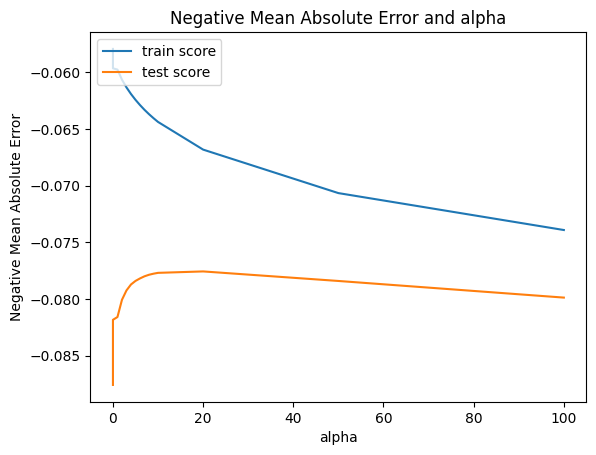

In [302]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [303]:
ridge = Ridge(alpha= 2 * best_alpha)

In [304]:
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [305]:
betas_alpha_opt_double = pd.DataFrame(index=X.columns)
betas_alpha_opt_double.rows = X.columns
betas_alpha_opt_double['Ridge'] = ridge.coef_
betas_alpha_opt_double['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.069823
OverallQual             0.061949
Neighborhood_Crawfor    0.047989
Functional_Typ          0.040070
OverallCond             0.038911
TotalBsmtSF             0.038895
Exterior1st_BrkFace     0.038327
Condition1_Norm         0.037751
2ndFlrSF                0.031930
SaleCondition_Normal    0.030011
Name: Ridge, dtype: float64

In [306]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [307]:
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 9.78
RSS (Test) = 3.89
MSE (Train) = 0.01
MSE (Test) = 0.01


## Lasso Regularization

In [308]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [309]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [310]:
model_cv.best_params_

{'alpha': 0.001}

In [311]:
best_alpha = model_cv.best_params_['alpha']
best_alpha

0.001

In [312]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047405,0.008120,0.006197,0.000977,0.0001,{'alpha': 0.0001},-0.082277,-0.089486,-0.072843,-0.080433,...,-0.080536,0.005490,2,-0.060062,-0.057071,-0.062124,-0.061809,-0.061875,-0.060588,0.001905
1,0.019795,0.002212,0.005408,0.001012,0.001,{'alpha': 0.001},-0.076496,-0.091143,-0.070963,-0.079048,...,-0.078066,0.007126,1,-0.070451,-0.067012,-0.072272,-0.071114,-0.071475,-0.070465,0.001824
2,0.013002,0.002281,0.004600,0.001200,0.01,{'alpha': 0.01},-0.088020,-0.101686,-0.083123,-0.087394,...,-0.087915,0.007566,3,-0.086643,-0.081331,-0.088116,-0.086502,-0.088857,-0.086290,0.002634
3,0.014783,0.003182,0.006002,0.001095,0.05,{'alpha': 0.05},-0.119966,-0.124918,-0.117653,-0.112040,...,-0.115699,0.007200,4,-0.114414,-0.110283,-0.116323,-0.114985,-0.115716,-0.114344,0.002131
4,0.017193,0.001763,0.006226,0.001187,0.1,{'alpha': 0.1},-0.163487,-0.165889,-0.163083,-0.148817,...,-0.157411,0.008368,5,-0.157580,-0.152712,-0.157616,-0.156720,-0.157110,-0.156348,0.001848


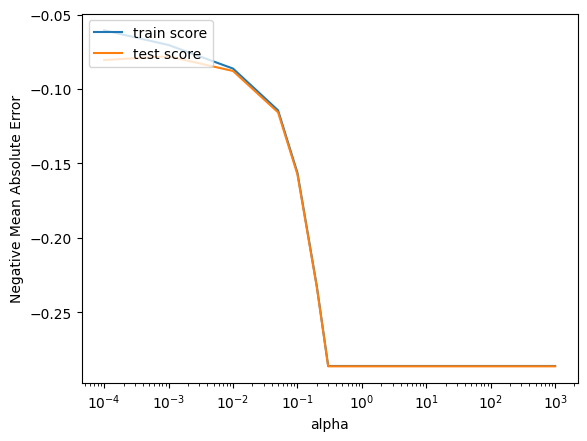

In [313]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [314]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [315]:
betas_alpha_opt = pd.DataFrame(index=X.columns)
betas_alpha_opt.rows = X.columns
betas_alpha_opt['lasso'] = lasso.coef_
betas_alpha_opt['lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.101727
Neighborhood_Crawfor    0.087335
Exterior1st_BrkFace     0.070340
OverallQual             0.069625
Functional_Typ          0.057950
Condition1_Norm         0.046680
TotalBsmtSF             0.043827
OverallCond             0.041983
Neighborhood_Somerst    0.037256
Neighborhood_NridgHt    0.037215
Name: lasso, dtype: float64

In [316]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [317]:
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 10.37
RSS (Test) = 4.03
MSE (Train) = 0.01
MSE (Test) = 0.01


In [318]:
lasso = Lasso(alpha = 2 * best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [319]:
betas_alpha_opt = pd.DataFrame(index=X.columns)
betas_alpha_opt.rows = X.columns
betas_alpha_opt['lasso'] = lasso.coef_
betas_alpha_opt['lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.100275
OverallQual             0.080562
Neighborhood_Crawfor    0.061374
TotalBsmtSF             0.043759
OverallCond             0.041183
Condition1_Norm         0.040549
Foundation_PConc        0.038430
Functional_Typ          0.037674
Exterior1st_BrkFace     0.037360
GarageArea              0.033237
Name: lasso, dtype: float64

In [320]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [321]:
rss_train = np.sum(np.square(y_train - y_train_pred))
rss_test = np.sum(np.square(y_test - y_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 11.68
RSS (Test) = 4.36
MSE (Train) = 0.01
MSE (Test) = 0.01


In [323]:
alpha_dict['Lasso'] = betas_alpha_opt['lasso']
alpha_dict

{'Ridge': LotFrontage              0.006467
 LotArea                  0.021892
 OverallQual              0.058660
 OverallCond              0.039211
 YearRemodAdd             0.018772
                            ...   
 SaleCondition_AdjLand    0.011332
 SaleCondition_Alloca     0.039788
 SaleCondition_Family    -0.011434
 SaleCondition_Normal     0.039353
 SaleCondition_Partial    0.021141
 Name: Ridge, Length: 234, dtype: float64,
 'Lasso': LotFrontage              0.002308
 LotArea                  0.024174
 OverallQual              0.080562
 OverallCond              0.041183
 YearRemodAdd             0.021261
                            ...   
 SaleCondition_AdjLand    0.000000
 SaleCondition_Alloca     0.000000
 SaleCondition_Family    -0.000000
 SaleCondition_Normal     0.007909
 SaleCondition_Partial    0.005083
 Name: lasso, Length: 234, dtype: float64}

In [346]:
x = alpha_dict['Ridge'][alpha_dict['Ridge'] != 0.0]
len(x)

232

In [344]:
x = alpha_dict['Lasso'][alpha_dict['Lasso'] != 0.0]
len(x)

47

### 5 most important variables in Lasso

In [347]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [349]:
betas_alpha_opt = pd.DataFrame(index=X.columns)
betas_alpha_opt.rows = X.columns
betas_alpha_opt['lasso'] = lasso.coef_
betas_alpha_opt['lasso'].sort_values(ascending=False)[:5]

GrLivArea               0.101727
Neighborhood_Crawfor    0.087335
Exterior1st_BrkFace     0.070340
OverallQual             0.069625
Functional_Typ          0.057950
Name: lasso, dtype: float64

In [350]:
type(betas_alpha_opt['lasso'].sort_values(ascending=False)[:5])

pandas.core.series.Series

In [355]:
top_5_lasso_coeff = betas_alpha_opt['lasso'].sort_values(ascending=False)[:5].index.tolist()

In [356]:
top_5_lasso_coeff

['GrLivArea',
 'Neighborhood_Crawfor',
 'Exterior1st_BrkFace',
 'OverallQual',
 'Functional_Typ']

In [357]:
X_drop = ["SalePrice", "TransformedPrice"]
for i in top_5_lasso_coeff:
    X_drop.append(i)
X_drop

['SalePrice',
 'TransformedPrice',
 'GrLivArea',
 'Neighborhood_Crawfor',
 'Exterior1st_BrkFace',
 'OverallQual',
 'Functional_Typ']

In [358]:
X_lasso_drop = data.drop(X_drop, axis=1)

y_lasso_drop = data["TransformedPrice"]

In [360]:
X_lasso_drop.shape

(1459, 229)

In [362]:
# split into train and test
from sklearn.model_selection import train_test_split
X_lasso_drop_train, X_lasso_drop_test, y_lasso_drop_train, y_lasso_drop_test = train_test_split(X_lasso_drop, y_lasso_drop,
                                                    train_size=0.7, random_state=42)

In [363]:
X_lasso_drop_train.shape

(1021, 229)

In [364]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_lasso_drop_train, y_lasso_drop_train)

Lasso(alpha=0.001)

In [369]:
betas_alpha_opt_drop = pd.DataFrame(index=X_lasso_drop.columns)
betas_alpha_opt_drop.rows = X.columns
betas_alpha_opt_drop['lasso'] = lasso.coef_
betas_alpha_opt_drop['lasso'].sort_values(ascending=False)[:5]

MSSubClass_2-STORY 1945 & OLDER    0.101344
OverallCond                        0.053088
Neighborhood_StoneBr               0.050055
Neighborhood_NridgHt               0.047641
Condition1_Norm                    0.045779
Name: lasso, dtype: float64